In [1]:
from tqdm import tqdm
import numpy as np
from mutinfo.distributions.base import CorrelatedNormal, CorrelatedUniform, CorrelatedStudent, SmoothedUniform

def run_tests(distribution_factory, estimator, MI_grid, n_samples, n_runs):
    estimated_MI = []

    for mutual_information in tqdm(MI_grid):
        current_run_estimates = []
        for run in range(n_runs):
            random_variable = distribution_factory(mutual_information)
            x, y = random_variable.rvs(n_samples)
        
            current_run_estimates.append(estimator(x, y))
        
        current_run_estimates = np.array(current_run_estimates)
        mean = np.mean(current_run_estimates)
        std = np.std(current_run_estimates) / np.sqrt(n_runs)
        
        estimated_MI.append([mean, 3*std])
    
    estimated_MI = np.array(estimated_MI)
    return estimated_MI

In [2]:
import jax
jax.config.update('jax_platforms', 'cpu')
import bmi
from minde.minde import MINDE
from minde.scripts.helper import get_data_loader, get_default_config

args = get_default_config()
args.type ="j"
args.importance_sampling = True
args.use_ema = True
args.checkpoint_dir = r"/home/foresti/minde/checkpoints"

/home/foresti/miniconda3/envs/minde/lib/python3.12/site-packages/jaxtyping/__init__.py:244: UserWarning: jaxtyping version >=0.2.23 should be used with Equinox version >=0.11.1
  warnings.warn(


In [3]:
MI_grid = np.linspace(0.0, 10.0, 11)
# MI_grid = np.array([2.0])
print(MI_grid)
n_samples = 1000
n_runs = 10

X_dimension = 10
Y_dimension = 10

var_list = {"x": X_dimension, "y": Y_dimension}
estimator = MINDE(args, var_list=var_list)

dimension = max(X_dimension, Y_dimension)

estimated_MI = run_tests(
    lambda mutual_information : CorrelatedNormal(mutual_information, X_dimension, Y_dimension),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


  0%|          | 0/11 [00:00<?, ?it/s]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/foresti/miniconda3/envs/minde/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=63` in the `DataLoader` to improve performance.
/home/foresti/miniconda3/envs/minde/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=63` in the `DataLoader` to improve performance.
/home/foresti/miniconda3/envs/minde/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (4) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  -0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  -0.004
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  -0.007
Epoch:  4  GT:  Not given MINDE_estimate:  0.008 MINDE_sigma_estimate:  -0.02
Epoch:  5  GT:  Not given MINDE_estimate:  0.013 MINDE_sigma_estimate:  -0.013
Epoch:  6  GT:  Not given MINDE_estimate:  0.02 MINDE_sigma_estimate:  -0.017
Epoch:  7  GT:  Not given MINDE_estimate:  0.027 MINDE_sigma_estimate:  -0.04
Epoch:  8  GT:  Not given MINDE_estimate:  0.035 MINDE_sigma_estimate:  -0.016
Epoch:  9  GT:  Not given MINDE_estimate:  0.046 MINDE_sigma_estimate:  -0.031
Epoch:  10  GT:  Not given MINDE_estimate:  0.058 MINDE_sigma_estimate:  -0.005
Epoch:  11  GT:  Not given MINDE_estimate:  0.071 MINDE_sigma_estimate:  -0.031
Epoch:  12  GT:  Not given MINDE_estimate:  0.085 MINDE_sigma_estimate:  -0.006
Epoch:  13  GT:  Not given MINDE_estimate:  0.1 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  0.997 MINDE_sigma_estimate:  5.766
Epoch:  50  GT:  Not given MINDE_estimate:  1.019 MINDE_sigma_estimate:  5.838
Epoch:  51  GT:  Not given MINDE_estimate:  1.074 MINDE_sigma_estimate:  6.106
Epoch:  52  GT:  Not given MINDE_estimate:  1.109 MINDE_sigma_estimate:  6.229
Epoch:  53  GT:  Not given MINDE_estimate:  1.116 MINDE_sigma_estimate:  6.217
Epoch:  54  GT:  Not given MINDE_estimate:  1.195 MINDE_sigma_estimate:  6.565
Epoch:  55  GT:  Not given MINDE_estimate:  1.218 MINDE_sigma_estimate:  6.575
Epoch:  56  GT:  Not given MINDE_estimate:  1.234 MINDE_sigma_estimate:  6.591
Epoch:  57  GT:  Not given MINDE_estimate:  1.28 MINDE_sigma_estimate:  6.752
Epoch:  58  GT:  Not given MINDE_estimate:  1.307 MINDE_sigma_estimate:  6.852
Epoch:  59  GT:  Not given MINDE_estimate:  1.373 MINDE_sigma_estimate:  7.001
Epoch:  60  GT:  Not given MINDE_estimate:  1.371 MINDE_sigma_estimate:  6.992
Epoch:  61  GT:  Not given MINDE_estimate:  1.394 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  2.15 MINDE_sigma_estimate:  7.045
Epoch:  100  GT:  Not given MINDE_estimate:  2.244 MINDE_sigma_estimate:  7.083
Epoch:  101  GT:  Not given MINDE_estimate:  2.232 MINDE_sigma_estimate:  6.824
Epoch:  102  GT:  Not given MINDE_estimate:  2.189 MINDE_sigma_estimate:  6.876
Epoch:  103  GT:  Not given MINDE_estimate:  2.226 MINDE_sigma_estimate:  6.812
Epoch:  104  GT:  Not given MINDE_estimate:  2.23 MINDE_sigma_estimate:  6.814
Epoch:  105  GT:  Not given MINDE_estimate:  2.223 MINDE_sigma_estimate:  6.691
Epoch:  106  GT:  Not given MINDE_estimate:  2.215 MINDE_sigma_estimate:  6.607
Epoch:  107  GT:  Not given MINDE_estimate:  2.291 MINDE_sigma_estimate:  6.755
Epoch:  108  GT:  Not given MINDE_estimate:  2.291 MINDE_sigma_estimate:  6.724
Epoch:  109  GT:  Not given MINDE_estimate:  2.297 MINDE_sigma_estimate:  6.591
Epoch:  110  GT:  Not given MINDE_estimate:  2.264 MINDE_sigma_estimate:  6.521
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  2.23 MINDE_sigma_estimate:  4.591
Epoch:  150  GT:  Not given MINDE_estimate:  2.247 MINDE_sigma_estimate:  4.53
Epoch:  151  GT:  Not given MINDE_estimate:  2.235 MINDE_sigma_estimate:  4.379
Epoch:  152  GT:  Not given MINDE_estimate:  2.185 MINDE_sigma_estimate:  4.379
Epoch:  153  GT:  Not given MINDE_estimate:  2.199 MINDE_sigma_estimate:  4.302
Epoch:  154  GT:  Not given MINDE_estimate:  2.161 MINDE_sigma_estimate:  4.195
Epoch:  155  GT:  Not given MINDE_estimate:  2.177 MINDE_sigma_estimate:  4.212
Epoch:  156  GT:  Not given MINDE_estimate:  2.199 MINDE_sigma_estimate:  4.209
Epoch:  157  GT:  Not given MINDE_estimate:  2.138 MINDE_sigma_estimate:  4.153
Epoch:  158  GT:  Not given MINDE_estimate:  2.171 MINDE_sigma_estimate:  4.218
Epoch:  159  GT:  Not given MINDE_estimate:  2.131 MINDE_sigma_estimate:  4.0
Epoch:  160  GT:  Not given MINDE_estimate:  2.15 MINDE_sigma_estimate:  4.074
Epoch:  161  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  1.916 MINDE_sigma_estimate:  2.858
Epoch:  200  GT:  Not given MINDE_estimate:  1.901 MINDE_sigma_estimate:  2.908
Epoch:  201  GT:  Not given MINDE_estimate:  1.876 MINDE_sigma_estimate:  2.818
Epoch:  202  GT:  Not given MINDE_estimate:  1.866 MINDE_sigma_estimate:  2.785
Epoch:  203  GT:  Not given MINDE_estimate:  1.873 MINDE_sigma_estimate:  2.841
Epoch:  204  GT:  Not given MINDE_estimate:  1.896 MINDE_sigma_estimate:  2.786
Epoch:  205  GT:  Not given MINDE_estimate:  1.884 MINDE_sigma_estimate:  2.655
Epoch:  206  GT:  Not given MINDE_estimate:  1.848 MINDE_sigma_estimate:  2.669
Epoch:  207  GT:  Not given MINDE_estimate:  1.849 MINDE_sigma_estimate:  2.708
Epoch:  208  GT:  Not given MINDE_estimate:  1.813 MINDE_sigma_estimate:  2.627
Epoch:  209  GT:  Not given MINDE_estimate:  1.817 MINDE_sigma_estimate:  2.61
Epoch:  210  GT:  Not given MINDE_estimate:  1.828 MINDE_sigma_estimate:  2.599
Epoch:  211  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  1.538 MINDE_sigma_estimate:  1.782
Estimated MI: 1.5696713328361511 ± 0.03206109359318713
Estimated MI (σ): 1.7920191287994385 ± 0.06479218973939344


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  -0.002
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.003
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.002
Epoch:  5  GT:  Not given MINDE_estimate:  0.015 MINDE_sigma_estimate:  0.01
Epoch:  6  GT:  Not given MINDE_estimate:  0.022 MINDE_sigma_estimate:  -0.003
Epoch:  7  GT:  Not given MINDE_estimate:  0.03 MINDE_sigma_estimate:  -0.003
Epoch:  8  GT:  Not given MINDE_estimate:  0.04 MINDE_sigma_estimate:  0.003
Epoch:  9  GT:  Not given MINDE_estimate:  0.05 MINDE_sigma_estimate:  0.011
Epoch:  10  GT:  Not given MINDE_estimate:  0.065 MINDE_sigma_estimate:  0.01
Epoch:  11  GT:  Not given MINDE_estimate:  0.08 MINDE_sigma_estimate:  0.024
Epoch:  12  GT:  Not given MINDE_estimate:  0.095 MINDE_sigma_estimate:  0.012
Epoch:  13  GT:  Not given MINDE_estimate:  0.113 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.105 MINDE_sigma_estimate:  4.034
Epoch:  50  GT:  Not given MINDE_estimate:  1.157 MINDE_sigma_estimate:  4.061
Epoch:  51  GT:  Not given MINDE_estimate:  1.158 MINDE_sigma_estimate:  4.077
Epoch:  52  GT:  Not given MINDE_estimate:  1.182 MINDE_sigma_estimate:  4.076
Epoch:  53  GT:  Not given MINDE_estimate:  1.227 MINDE_sigma_estimate:  4.286
Epoch:  54  GT:  Not given MINDE_estimate:  1.264 MINDE_sigma_estimate:  4.491
Epoch:  55  GT:  Not given MINDE_estimate:  1.289 MINDE_sigma_estimate:  4.361
Epoch:  56  GT:  Not given MINDE_estimate:  1.319 MINDE_sigma_estimate:  4.456
Epoch:  57  GT:  Not given MINDE_estimate:  1.351 MINDE_sigma_estimate:  4.45
Epoch:  58  GT:  Not given MINDE_estimate:  1.375 MINDE_sigma_estimate:  4.576
Epoch:  59  GT:  Not given MINDE_estimate:  1.41 MINDE_sigma_estimate:  4.615
Epoch:  60  GT:  Not given MINDE_estimate:  1.447 MINDE_sigma_estimate:  4.759
Epoch:  61  GT:  Not given MINDE_estimate:  1.453 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  2.039 MINDE_sigma_estimate:  4.267
Epoch:  100  GT:  Not given MINDE_estimate:  2.02 MINDE_sigma_estimate:  4.269
Epoch:  101  GT:  Not given MINDE_estimate:  2.087 MINDE_sigma_estimate:  4.465
Epoch:  102  GT:  Not given MINDE_estimate:  2.074 MINDE_sigma_estimate:  4.395
Epoch:  103  GT:  Not given MINDE_estimate:  2.064 MINDE_sigma_estimate:  4.434
Epoch:  104  GT:  Not given MINDE_estimate:  2.046 MINDE_sigma_estimate:  4.22
Epoch:  105  GT:  Not given MINDE_estimate:  2.033 MINDE_sigma_estimate:  4.247
Epoch:  106  GT:  Not given MINDE_estimate:  2.087 MINDE_sigma_estimate:  4.323
Epoch:  107  GT:  Not given MINDE_estimate:  2.08 MINDE_sigma_estimate:  4.178
Epoch:  108  GT:  Not given MINDE_estimate:  2.062 MINDE_sigma_estimate:  4.213
Epoch:  109  GT:  Not given MINDE_estimate:  2.064 MINDE_sigma_estimate:  4.105
Epoch:  110  GT:  Not given MINDE_estimate:  2.082 MINDE_sigma_estimate:  4.053
Epoch:  111  GT:  Not given MINDE_estimate: 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  1.912 MINDE_sigma_estimate:  2.957
Epoch:  150  GT:  Not given MINDE_estimate:  1.954 MINDE_sigma_estimate:  2.956
Epoch:  151  GT:  Not given MINDE_estimate:  1.978 MINDE_sigma_estimate:  3.071
Epoch:  152  GT:  Not given MINDE_estimate:  1.934 MINDE_sigma_estimate:  2.897
Epoch:  153  GT:  Not given MINDE_estimate:  1.927 MINDE_sigma_estimate:  2.876
Epoch:  154  GT:  Not given MINDE_estimate:  1.928 MINDE_sigma_estimate:  2.847
Epoch:  155  GT:  Not given MINDE_estimate:  1.914 MINDE_sigma_estimate:  2.801
Epoch:  156  GT:  Not given MINDE_estimate:  1.903 MINDE_sigma_estimate:  2.759
Epoch:  157  GT:  Not given MINDE_estimate:  1.911 MINDE_sigma_estimate:  2.854
Epoch:  158  GT:  Not given MINDE_estimate:  1.885 MINDE_sigma_estimate:  2.769
Epoch:  159  GT:  Not given MINDE_estimate:  1.899 MINDE_sigma_estimate:  2.762
Epoch:  160  GT:  Not given MINDE_estimate:  1.89 MINDE_sigma_estimate:  2.771
Epoch:  161  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  1.646 MINDE_sigma_estimate:  1.976
Epoch:  200  GT:  Not given MINDE_estimate:  1.645 MINDE_sigma_estimate:  1.945
Epoch:  201  GT:  Not given MINDE_estimate:  1.602 MINDE_sigma_estimate:  1.866
Epoch:  202  GT:  Not given MINDE_estimate:  1.6 MINDE_sigma_estimate:  1.871
Epoch:  203  GT:  Not given MINDE_estimate:  1.614 MINDE_sigma_estimate:  1.867
Epoch:  204  GT:  Not given MINDE_estimate:  1.617 MINDE_sigma_estimate:  1.921
Epoch:  205  GT:  Not given MINDE_estimate:  1.596 MINDE_sigma_estimate:  1.861
Epoch:  206  GT:  Not given MINDE_estimate:  1.621 MINDE_sigma_estimate:  1.829
Epoch:  207  GT:  Not given MINDE_estimate:  1.585 MINDE_sigma_estimate:  1.8
Epoch:  208  GT:  Not given MINDE_estimate:  1.584 MINDE_sigma_estimate:  1.76
Epoch:  209  GT:  Not given MINDE_estimate:  1.572 MINDE_sigma_estimate:  1.794
Epoch:  210  GT:  Not given MINDE_estimate:  1.591 MINDE_sigma_estimate:  1.741
Epoch:  211  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  1.328 MINDE_sigma_estimate:  1.21
Estimated MI: 1.3447329878807068 ± 0.02990176411022497
Estimated MI (σ): 1.1615612745285033 ± 0.07167429616361799


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  -0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  -0.0
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  -0.004
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  -0.003
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  0.003
Epoch:  6  GT:  Not given MINDE_estimate:  0.022 MINDE_sigma_estimate:  0.001
Epoch:  7  GT:  Not given MINDE_estimate:  0.031 MINDE_sigma_estimate:  -0.001
Epoch:  8  GT:  Not given MINDE_estimate:  0.041 MINDE_sigma_estimate:  0.03
Epoch:  9  GT:  Not given MINDE_estimate:  0.053 MINDE_sigma_estimate:  -0.003
Epoch:  10  GT:  Not given MINDE_estimate:  0.068 MINDE_sigma_estimate:  -0.008
Epoch:  11  GT:  Not given MINDE_estimate:  0.081 MINDE_sigma_estimate:  0.013
Epoch:  12  GT:  Not given MINDE_estimate:  0.1 MINDE_sigma_estimate:  0.012
Epoch:  13  GT:  Not given MINDE_estimate:  0.115 MINDE_sig

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.069 MINDE_sigma_estimate:  4.509
Epoch:  50  GT:  Not given MINDE_estimate:  1.127 MINDE_sigma_estimate:  4.557
Epoch:  51  GT:  Not given MINDE_estimate:  1.145 MINDE_sigma_estimate:  4.573
Epoch:  52  GT:  Not given MINDE_estimate:  1.147 MINDE_sigma_estimate:  4.558
Epoch:  53  GT:  Not given MINDE_estimate:  1.194 MINDE_sigma_estimate:  4.758
Epoch:  54  GT:  Not given MINDE_estimate:  1.194 MINDE_sigma_estimate:  4.654
Epoch:  55  GT:  Not given MINDE_estimate:  1.258 MINDE_sigma_estimate:  4.775
Epoch:  56  GT:  Not given MINDE_estimate:  1.276 MINDE_sigma_estimate:  4.813
Epoch:  57  GT:  Not given MINDE_estimate:  1.276 MINDE_sigma_estimate:  4.742
Epoch:  58  GT:  Not given MINDE_estimate:  1.312 MINDE_sigma_estimate:  4.782
Epoch:  59  GT:  Not given MINDE_estimate:  1.316 MINDE_sigma_estimate:  4.716
Epoch:  60  GT:  Not given MINDE_estimate:  1.328 MINDE_sigma_estimate:  4.851
Epoch:  61  GT:  Not given MINDE_estimate:  1.374 MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  1.836 MINDE_sigma_estimate:  4.458
Epoch:  100  GT:  Not given MINDE_estimate:  1.858 MINDE_sigma_estimate:  4.401
Epoch:  101  GT:  Not given MINDE_estimate:  1.878 MINDE_sigma_estimate:  4.555
Epoch:  102  GT:  Not given MINDE_estimate:  1.878 MINDE_sigma_estimate:  4.43
Epoch:  103  GT:  Not given MINDE_estimate:  1.877 MINDE_sigma_estimate:  4.428
Epoch:  104  GT:  Not given MINDE_estimate:  1.853 MINDE_sigma_estimate:  4.275
Epoch:  105  GT:  Not given MINDE_estimate:  1.859 MINDE_sigma_estimate:  4.368
Epoch:  106  GT:  Not given MINDE_estimate:  1.836 MINDE_sigma_estimate:  4.348
Epoch:  107  GT:  Not given MINDE_estimate:  1.864 MINDE_sigma_estimate:  4.233
Epoch:  108  GT:  Not given MINDE_estimate:  1.887 MINDE_sigma_estimate:  4.339
Epoch:  109  GT:  Not given MINDE_estimate:  1.894 MINDE_sigma_estimate:  4.291
Epoch:  110  GT:  Not given MINDE_estimate:  1.889 MINDE_sigma_estimate:  4.229
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  1.827 MINDE_sigma_estimate:  3.367
Epoch:  150  GT:  Not given MINDE_estimate:  1.831 MINDE_sigma_estimate:  3.285
Epoch:  151  GT:  Not given MINDE_estimate:  1.776 MINDE_sigma_estimate:  3.275
Epoch:  152  GT:  Not given MINDE_estimate:  1.812 MINDE_sigma_estimate:  3.215
Epoch:  153  GT:  Not given MINDE_estimate:  1.804 MINDE_sigma_estimate:  3.218
Epoch:  154  GT:  Not given MINDE_estimate:  1.798 MINDE_sigma_estimate:  3.208
Epoch:  155  GT:  Not given MINDE_estimate:  1.81 MINDE_sigma_estimate:  3.16
Epoch:  156  GT:  Not given MINDE_estimate:  1.821 MINDE_sigma_estimate:  3.188
Epoch:  157  GT:  Not given MINDE_estimate:  1.781 MINDE_sigma_estimate:  3.203
Epoch:  158  GT:  Not given MINDE_estimate:  1.812 MINDE_sigma_estimate:  3.138
Epoch:  159  GT:  Not given MINDE_estimate:  1.774 MINDE_sigma_estimate:  3.048
Epoch:  160  GT:  Not given MINDE_estimate:  1.811 MINDE_sigma_estimate:  3.111
Epoch:  161  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  1.612 MINDE_sigma_estimate:  2.329
Epoch:  200  GT:  Not given MINDE_estimate:  1.612 MINDE_sigma_estimate:  2.337
Epoch:  201  GT:  Not given MINDE_estimate:  1.589 MINDE_sigma_estimate:  2.344
Epoch:  202  GT:  Not given MINDE_estimate:  1.613 MINDE_sigma_estimate:  2.262
Epoch:  203  GT:  Not given MINDE_estimate:  1.57 MINDE_sigma_estimate:  2.197
Epoch:  204  GT:  Not given MINDE_estimate:  1.577 MINDE_sigma_estimate:  2.196
Epoch:  205  GT:  Not given MINDE_estimate:  1.588 MINDE_sigma_estimate:  2.183
Epoch:  206  GT:  Not given MINDE_estimate:  1.587 MINDE_sigma_estimate:  2.224
Epoch:  207  GT:  Not given MINDE_estimate:  1.554 MINDE_sigma_estimate:  2.175
Epoch:  208  GT:  Not given MINDE_estimate:  1.56 MINDE_sigma_estimate:  2.106
Epoch:  209  GT:  Not given MINDE_estimate:  1.563 MINDE_sigma_estimate:  2.204
Epoch:  210  GT:  Not given MINDE_estimate:  1.558 MINDE_sigma_estimate:  2.093
Epoch:  211  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  1.348 MINDE_sigma_estimate:  1.589
Estimated MI: 1.3483447790145875 ± 0.03201618090354418
Estimated MI (σ): 1.551637887954712 ± 0.1118794282656846


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.0
Epoch:  2  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  -0.001
Epoch:  3  GT:  Not given MINDE_estimate:  0.003 MINDE_sigma_estimate:  0.005
Epoch:  4  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.001
Epoch:  5  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  -0.006
Epoch:  6  GT:  Not given MINDE_estimate:  0.015 MINDE_sigma_estimate:  -0.007
Epoch:  7  GT:  Not given MINDE_estimate:  0.022 MINDE_sigma_estimate:  -0.002
Epoch:  8  GT:  Not given MINDE_estimate:  0.031 MINDE_sigma_estimate:  -0.018
Epoch:  9  GT:  Not given MINDE_estimate:  0.04 MINDE_sigma_estimate:  0.001
Epoch:  10  GT:  Not given MINDE_estimate:  0.052 MINDE_sigma_estimate:  -0.004
Epoch:  11  GT:  Not given MINDE_estimate:  0.066 MINDE_sigma_estimate:  -0.014
Epoch:  12  GT:  Not given MINDE_estimate:  0.081 MINDE_sigma_estimate:  0.013
Epoch:  13  GT:  Not given MINDE_estimate:  0.097 MINDE_sig

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  0.971 MINDE_sigma_estimate:  4.491
Epoch:  50  GT:  Not given MINDE_estimate:  1.004 MINDE_sigma_estimate:  4.628
Epoch:  51  GT:  Not given MINDE_estimate:  1.05 MINDE_sigma_estimate:  4.792
Epoch:  52  GT:  Not given MINDE_estimate:  1.05 MINDE_sigma_estimate:  4.772
Epoch:  53  GT:  Not given MINDE_estimate:  1.112 MINDE_sigma_estimate:  5.152
Epoch:  54  GT:  Not given MINDE_estimate:  1.153 MINDE_sigma_estimate:  5.121
Epoch:  55  GT:  Not given MINDE_estimate:  1.148 MINDE_sigma_estimate:  5.218
Epoch:  56  GT:  Not given MINDE_estimate:  1.19 MINDE_sigma_estimate:  5.37
Epoch:  57  GT:  Not given MINDE_estimate:  1.223 MINDE_sigma_estimate:  5.432
Epoch:  58  GT:  Not given MINDE_estimate:  1.264 MINDE_sigma_estimate:  5.597
Epoch:  59  GT:  Not given MINDE_estimate:  1.283 MINDE_sigma_estimate:  5.626
Epoch:  60  GT:  Not given MINDE_estimate:  1.298 MINDE_sigma_estimate:  5.552
Epoch:  61  GT:  Not given MINDE_estimate:  1.337 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  1.94 MINDE_sigma_estimate:  6.124
Epoch:  100  GT:  Not given MINDE_estimate:  1.997 MINDE_sigma_estimate:  6.269
Epoch:  101  GT:  Not given MINDE_estimate:  1.977 MINDE_sigma_estimate:  6.151
Epoch:  102  GT:  Not given MINDE_estimate:  2.015 MINDE_sigma_estimate:  6.232
Epoch:  103  GT:  Not given MINDE_estimate:  2.034 MINDE_sigma_estimate:  6.215
Epoch:  104  GT:  Not given MINDE_estimate:  2.007 MINDE_sigma_estimate:  6.025
Epoch:  105  GT:  Not given MINDE_estimate:  2.02 MINDE_sigma_estimate:  6.117
Epoch:  106  GT:  Not given MINDE_estimate:  2.045 MINDE_sigma_estimate:  6.103
Epoch:  107  GT:  Not given MINDE_estimate:  2.058 MINDE_sigma_estimate:  6.073
Epoch:  108  GT:  Not given MINDE_estimate:  2.079 MINDE_sigma_estimate:  6.155
Epoch:  109  GT:  Not given MINDE_estimate:  2.059 MINDE_sigma_estimate:  5.981
Epoch:  110  GT:  Not given MINDE_estimate:  2.11 MINDE_sigma_estimate:  6.032
Epoch:  111  GT:  Not given MINDE_estimate: 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  2.236 MINDE_sigma_estimate:  4.758
Epoch:  150  GT:  Not given MINDE_estimate:  2.248 MINDE_sigma_estimate:  4.773
Epoch:  151  GT:  Not given MINDE_estimate:  2.209 MINDE_sigma_estimate:  4.641
Epoch:  152  GT:  Not given MINDE_estimate:  2.256 MINDE_sigma_estimate:  4.73
Epoch:  153  GT:  Not given MINDE_estimate:  2.243 MINDE_sigma_estimate:  4.626
Epoch:  154  GT:  Not given MINDE_estimate:  2.263 MINDE_sigma_estimate:  4.624
Epoch:  155  GT:  Not given MINDE_estimate:  2.206 MINDE_sigma_estimate:  4.451
Epoch:  156  GT:  Not given MINDE_estimate:  2.239 MINDE_sigma_estimate:  4.432
Epoch:  157  GT:  Not given MINDE_estimate:  2.216 MINDE_sigma_estimate:  4.424
Epoch:  158  GT:  Not given MINDE_estimate:  2.244 MINDE_sigma_estimate:  4.374
Epoch:  159  GT:  Not given MINDE_estimate:  2.214 MINDE_sigma_estimate:  4.361
Epoch:  160  GT:  Not given MINDE_estimate:  2.256 MINDE_sigma_estimate:  4.499
Epoch:  161  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  2.139 MINDE_sigma_estimate:  3.266
Epoch:  200  GT:  Not given MINDE_estimate:  2.153 MINDE_sigma_estimate:  3.32
Epoch:  201  GT:  Not given MINDE_estimate:  2.098 MINDE_sigma_estimate:  3.155
Epoch:  202  GT:  Not given MINDE_estimate:  2.106 MINDE_sigma_estimate:  3.2
Epoch:  203  GT:  Not given MINDE_estimate:  2.103 MINDE_sigma_estimate:  3.124
Epoch:  204  GT:  Not given MINDE_estimate:  2.077 MINDE_sigma_estimate:  3.152
Epoch:  205  GT:  Not given MINDE_estimate:  2.093 MINDE_sigma_estimate:  3.082
Epoch:  206  GT:  Not given MINDE_estimate:  2.022 MINDE_sigma_estimate:  3.055
Epoch:  207  GT:  Not given MINDE_estimate:  2.048 MINDE_sigma_estimate:  3.023
Epoch:  208  GT:  Not given MINDE_estimate:  2.06 MINDE_sigma_estimate:  3.073
Epoch:  209  GT:  Not given MINDE_estimate:  2.062 MINDE_sigma_estimate:  3.03
Epoch:  210  GT:  Not given MINDE_estimate:  2.061 MINDE_sigma_estimate:  2.986
Epoch:  211  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  1.819 MINDE_sigma_estimate:  2.139
Estimated MI: 1.810472810268402 ± 0.03968162556118139
Estimated MI (σ): 2.1739029407501222 ± 0.09808718544928471


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.001
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.001
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.001
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  0.001
Epoch:  6  GT:  Not given MINDE_estimate:  0.021 MINDE_sigma_estimate:  0.014
Epoch:  7  GT:  Not given MINDE_estimate:  0.029 MINDE_sigma_estimate:  0.019
Epoch:  8  GT:  Not given MINDE_estimate:  0.037 MINDE_sigma_estimate:  -0.006
Epoch:  9  GT:  Not given MINDE_estimate:  0.048 MINDE_sigma_estimate:  0.037
Epoch:  10  GT:  Not given MINDE_estimate:  0.06 MINDE_sigma_estimate:  -0.005
Epoch:  11  GT:  Not given MINDE_estimate:  0.071 MINDE_sigma_estimate:  0.007
Epoch:  12  GT:  Not given MINDE_estimate:  0.087 MINDE_sigma_estimate:  0.034
Epoch:  13  GT:  Not given MINDE_estimate:  0.099 MINDE_sigm

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.102 MINDE_sigma_estimate:  4.639
Epoch:  50  GT:  Not given MINDE_estimate:  1.124 MINDE_sigma_estimate:  4.696
Epoch:  51  GT:  Not given MINDE_estimate:  1.15 MINDE_sigma_estimate:  4.749
Epoch:  52  GT:  Not given MINDE_estimate:  1.174 MINDE_sigma_estimate:  4.853
Epoch:  53  GT:  Not given MINDE_estimate:  1.207 MINDE_sigma_estimate:  4.796
Epoch:  54  GT:  Not given MINDE_estimate:  1.24 MINDE_sigma_estimate:  4.85
Epoch:  55  GT:  Not given MINDE_estimate:  1.236 MINDE_sigma_estimate:  4.692
Epoch:  56  GT:  Not given MINDE_estimate:  1.261 MINDE_sigma_estimate:  4.741
Epoch:  57  GT:  Not given MINDE_estimate:  1.305 MINDE_sigma_estimate:  4.838
Epoch:  58  GT:  Not given MINDE_estimate:  1.327 MINDE_sigma_estimate:  4.844
Epoch:  59  GT:  Not given MINDE_estimate:  1.333 MINDE_sigma_estimate:  4.75
Epoch:  60  GT:  Not given MINDE_estimate:  1.369 MINDE_sigma_estimate:  4.663
Epoch:  61  GT:  Not given MINDE_estimate:  1.373 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  1.621 MINDE_sigma_estimate:  4.106
Epoch:  100  GT:  Not given MINDE_estimate:  1.612 MINDE_sigma_estimate:  3.995
Epoch:  101  GT:  Not given MINDE_estimate:  1.629 MINDE_sigma_estimate:  3.985
Epoch:  102  GT:  Not given MINDE_estimate:  1.621 MINDE_sigma_estimate:  3.86
Epoch:  103  GT:  Not given MINDE_estimate:  1.647 MINDE_sigma_estimate:  4.18
Epoch:  104  GT:  Not given MINDE_estimate:  1.631 MINDE_sigma_estimate:  4.086
Epoch:  105  GT:  Not given MINDE_estimate:  1.602 MINDE_sigma_estimate:  3.977
Epoch:  106  GT:  Not given MINDE_estimate:  1.631 MINDE_sigma_estimate:  4.119
Epoch:  107  GT:  Not given MINDE_estimate:  1.583 MINDE_sigma_estimate:  3.89
Epoch:  108  GT:  Not given MINDE_estimate:  1.641 MINDE_sigma_estimate:  4.135
Epoch:  109  GT:  Not given MINDE_estimate:  1.607 MINDE_sigma_estimate:  4.067
Epoch:  110  GT:  Not given MINDE_estimate:  1.63 MINDE_sigma_estimate:  4.238
Epoch:  111  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  1.611 MINDE_sigma_estimate:  3.888
Epoch:  150  GT:  Not given MINDE_estimate:  1.627 MINDE_sigma_estimate:  3.863
Epoch:  151  GT:  Not given MINDE_estimate:  1.637 MINDE_sigma_estimate:  3.972
Epoch:  152  GT:  Not given MINDE_estimate:  1.613 MINDE_sigma_estimate:  3.816
Epoch:  153  GT:  Not given MINDE_estimate:  1.673 MINDE_sigma_estimate:  3.953
Epoch:  154  GT:  Not given MINDE_estimate:  1.644 MINDE_sigma_estimate:  3.938
Epoch:  155  GT:  Not given MINDE_estimate:  1.637 MINDE_sigma_estimate:  3.814
Epoch:  156  GT:  Not given MINDE_estimate:  1.649 MINDE_sigma_estimate:  3.902
Epoch:  157  GT:  Not given MINDE_estimate:  1.623 MINDE_sigma_estimate:  3.752
Epoch:  158  GT:  Not given MINDE_estimate:  1.647 MINDE_sigma_estimate:  3.8
Epoch:  159  GT:  Not given MINDE_estimate:  1.655 MINDE_sigma_estimate:  3.74
Epoch:  160  GT:  Not given MINDE_estimate:  1.651 MINDE_sigma_estimate:  3.787
Epoch:  161  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  1.556 MINDE_sigma_estimate:  2.914
Epoch:  200  GT:  Not given MINDE_estimate:  1.559 MINDE_sigma_estimate:  2.912
Epoch:  201  GT:  Not given MINDE_estimate:  1.543 MINDE_sigma_estimate:  2.878
Epoch:  202  GT:  Not given MINDE_estimate:  1.554 MINDE_sigma_estimate:  2.833
Epoch:  203  GT:  Not given MINDE_estimate:  1.562 MINDE_sigma_estimate:  2.886
Epoch:  204  GT:  Not given MINDE_estimate:  1.551 MINDE_sigma_estimate:  2.848
Epoch:  205  GT:  Not given MINDE_estimate:  1.552 MINDE_sigma_estimate:  2.831
Epoch:  206  GT:  Not given MINDE_estimate:  1.525 MINDE_sigma_estimate:  2.753
Epoch:  207  GT:  Not given MINDE_estimate:  1.525 MINDE_sigma_estimate:  2.747
Epoch:  208  GT:  Not given MINDE_estimate:  1.534 MINDE_sigma_estimate:  2.756
Epoch:  209  GT:  Not given MINDE_estimate:  1.541 MINDE_sigma_estimate:  2.718
Epoch:  210  GT:  Not given MINDE_estimate:  1.521 MINDE_sigma_estimate:  2.673
Epoch:  211  GT:  Not given MINDE_estima

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  1.411 MINDE_sigma_estimate:  1.94
Estimated MI: 1.3873186707496643 ± 0.03282983633455491
Estimated MI (σ): 1.9394107580184936 ± 0.07571205220770423


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  -0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.003
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  -0.003
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.011
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  0.015
Epoch:  6  GT:  Not given MINDE_estimate:  0.02 MINDE_sigma_estimate:  0.003
Epoch:  7  GT:  Not given MINDE_estimate:  0.028 MINDE_sigma_estimate:  0.007
Epoch:  8  GT:  Not given MINDE_estimate:  0.037 MINDE_sigma_estimate:  0.01
Epoch:  9  GT:  Not given MINDE_estimate:  0.047 MINDE_sigma_estimate:  0.007
Epoch:  10  GT:  Not given MINDE_estimate:  0.061 MINDE_sigma_estimate:  0.013
Epoch:  11  GT:  Not given MINDE_estimate:  0.073 MINDE_sigma_estimate:  0.017
Epoch:  12  GT:  Not given MINDE_estimate:  0.087 MINDE_sigma_estimate:  0.064
Epoch:  13  GT:  Not given MINDE_estimate:  0.104 MINDE_sigma

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.05 MINDE_sigma_estimate:  3.705
Epoch:  50  GT:  Not given MINDE_estimate:  1.077 MINDE_sigma_estimate:  3.705
Epoch:  51  GT:  Not given MINDE_estimate:  1.133 MINDE_sigma_estimate:  3.799
Epoch:  52  GT:  Not given MINDE_estimate:  1.124 MINDE_sigma_estimate:  3.511
Epoch:  53  GT:  Not given MINDE_estimate:  1.184 MINDE_sigma_estimate:  3.854
Epoch:  54  GT:  Not given MINDE_estimate:  1.191 MINDE_sigma_estimate:  3.655
Epoch:  55  GT:  Not given MINDE_estimate:  1.22 MINDE_sigma_estimate:  3.642
Epoch:  56  GT:  Not given MINDE_estimate:  1.262 MINDE_sigma_estimate:  3.662
Epoch:  57  GT:  Not given MINDE_estimate:  1.284 MINDE_sigma_estimate:  3.637
Epoch:  58  GT:  Not given MINDE_estimate:  1.308 MINDE_sigma_estimate:  3.437
Epoch:  59  GT:  Not given MINDE_estimate:  1.282 MINDE_sigma_estimate:  3.467
Epoch:  60  GT:  Not given MINDE_estimate:  1.311 MINDE_sigma_estimate:  3.372
Epoch:  61  GT:  Not given MINDE_estimate:  1.347 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  1.569 MINDE_sigma_estimate:  3.428
Epoch:  100  GT:  Not given MINDE_estimate:  1.569 MINDE_sigma_estimate:  3.373
Epoch:  101  GT:  Not given MINDE_estimate:  1.573 MINDE_sigma_estimate:  3.278
Epoch:  102  GT:  Not given MINDE_estimate:  1.545 MINDE_sigma_estimate:  3.302
Epoch:  103  GT:  Not given MINDE_estimate:  1.593 MINDE_sigma_estimate:  3.431
Epoch:  104  GT:  Not given MINDE_estimate:  1.553 MINDE_sigma_estimate:  3.277
Epoch:  105  GT:  Not given MINDE_estimate:  1.589 MINDE_sigma_estimate:  3.521
Epoch:  106  GT:  Not given MINDE_estimate:  1.571 MINDE_sigma_estimate:  3.403
Epoch:  107  GT:  Not given MINDE_estimate:  1.557 MINDE_sigma_estimate:  3.444
Epoch:  108  GT:  Not given MINDE_estimate:  1.546 MINDE_sigma_estimate:  3.353
Epoch:  109  GT:  Not given MINDE_estimate:  1.584 MINDE_sigma_estimate:  3.394
Epoch:  110  GT:  Not given MINDE_estimate:  1.573 MINDE_sigma_estimate:  3.63
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  1.526 MINDE_sigma_estimate:  3.497
Epoch:  150  GT:  Not given MINDE_estimate:  1.545 MINDE_sigma_estimate:  3.533
Epoch:  151  GT:  Not given MINDE_estimate:  1.555 MINDE_sigma_estimate:  3.613
Epoch:  152  GT:  Not given MINDE_estimate:  1.566 MINDE_sigma_estimate:  3.602
Epoch:  153  GT:  Not given MINDE_estimate:  1.584 MINDE_sigma_estimate:  3.661
Epoch:  154  GT:  Not given MINDE_estimate:  1.562 MINDE_sigma_estimate:  3.629
Epoch:  155  GT:  Not given MINDE_estimate:  1.527 MINDE_sigma_estimate:  3.531
Epoch:  156  GT:  Not given MINDE_estimate:  1.577 MINDE_sigma_estimate:  3.565
Epoch:  157  GT:  Not given MINDE_estimate:  1.535 MINDE_sigma_estimate:  3.516
Epoch:  158  GT:  Not given MINDE_estimate:  1.555 MINDE_sigma_estimate:  3.594
Epoch:  159  GT:  Not given MINDE_estimate:  1.546 MINDE_sigma_estimate:  3.519
Epoch:  160  GT:  Not given MINDE_estimate:  1.566 MINDE_sigma_estimate:  3.522
Epoch:  161  GT:  Not given MINDE_estima

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  1.467 MINDE_sigma_estimate:  2.797
Epoch:  200  GT:  Not given MINDE_estimate:  1.461 MINDE_sigma_estimate:  2.854
Epoch:  201  GT:  Not given MINDE_estimate:  1.479 MINDE_sigma_estimate:  2.827
Epoch:  202  GT:  Not given MINDE_estimate:  1.456 MINDE_sigma_estimate:  2.79
Epoch:  203  GT:  Not given MINDE_estimate:  1.472 MINDE_sigma_estimate:  2.823
Epoch:  204  GT:  Not given MINDE_estimate:  1.472 MINDE_sigma_estimate:  2.793
Epoch:  205  GT:  Not given MINDE_estimate:  1.459 MINDE_sigma_estimate:  2.753
Epoch:  206  GT:  Not given MINDE_estimate:  1.433 MINDE_sigma_estimate:  2.694
Epoch:  207  GT:  Not given MINDE_estimate:  1.436 MINDE_sigma_estimate:  2.662
Epoch:  208  GT:  Not given MINDE_estimate:  1.455 MINDE_sigma_estimate:  2.679
Epoch:  209  GT:  Not given MINDE_estimate:  1.453 MINDE_sigma_estimate:  2.643
Epoch:  210  GT:  Not given MINDE_estimate:  1.421 MINDE_sigma_estimate:  2.591
Epoch:  211  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  1.305 MINDE_sigma_estimate:  1.829
Estimated MI: 1.3173053741455079 ± 0.031833169820706504
Estimated MI (σ): 1.8614317893981933 ± 0.09819108862462544


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  -0.004
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  -0.004
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  -0.012
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  -0.018
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  -0.019
Epoch:  6  GT:  Not given MINDE_estimate:  0.019 MINDE_sigma_estimate:  -0.028
Epoch:  7  GT:  Not given MINDE_estimate:  0.027 MINDE_sigma_estimate:  -0.032
Epoch:  8  GT:  Not given MINDE_estimate:  0.034 MINDE_sigma_estimate:  -0.016
Epoch:  9  GT:  Not given MINDE_estimate:  0.042 MINDE_sigma_estimate:  -0.038
Epoch:  10  GT:  Not given MINDE_estimate:  0.054 MINDE_sigma_estimate:  -0.037
Epoch:  11  GT:  Not given MINDE_estimate:  0.065 MINDE_sigma_estimate:  -0.034
Epoch:  12  GT:  Not given MINDE_estimate:  0.079 MINDE_sigma_estimate:  -0.036
Epoch:  13  GT:  Not given MINDE_estimate:  0.092

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  0.987 MINDE_sigma_estimate:  3.169
Epoch:  50  GT:  Not given MINDE_estimate:  1.037 MINDE_sigma_estimate:  3.334
Epoch:  51  GT:  Not given MINDE_estimate:  1.074 MINDE_sigma_estimate:  3.526
Epoch:  52  GT:  Not given MINDE_estimate:  1.099 MINDE_sigma_estimate:  3.6
Epoch:  53  GT:  Not given MINDE_estimate:  1.101 MINDE_sigma_estimate:  3.624
Epoch:  54  GT:  Not given MINDE_estimate:  1.139 MINDE_sigma_estimate:  3.706
Epoch:  55  GT:  Not given MINDE_estimate:  1.164 MINDE_sigma_estimate:  3.69
Epoch:  56  GT:  Not given MINDE_estimate:  1.204 MINDE_sigma_estimate:  3.825
Epoch:  57  GT:  Not given MINDE_estimate:  1.246 MINDE_sigma_estimate:  3.877
Epoch:  58  GT:  Not given MINDE_estimate:  1.268 MINDE_sigma_estimate:  4.01
Epoch:  59  GT:  Not given MINDE_estimate:  1.289 MINDE_sigma_estimate:  4.002
Epoch:  60  GT:  Not given MINDE_estimate:  1.342 MINDE_sigma_estimate:  4.088
Epoch:  61  GT:  Not given MINDE_estimate:  1.38 MINDE_s

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  2.186 MINDE_sigma_estimate:  4.553
Epoch:  100  GT:  Not given MINDE_estimate:  2.187 MINDE_sigma_estimate:  4.655
Epoch:  101  GT:  Not given MINDE_estimate:  2.204 MINDE_sigma_estimate:  4.544
Epoch:  102  GT:  Not given MINDE_estimate:  2.212 MINDE_sigma_estimate:  4.587
Epoch:  103  GT:  Not given MINDE_estimate:  2.205 MINDE_sigma_estimate:  4.366
Epoch:  104  GT:  Not given MINDE_estimate:  2.21 MINDE_sigma_estimate:  4.463
Epoch:  105  GT:  Not given MINDE_estimate:  2.2 MINDE_sigma_estimate:  4.24
Epoch:  106  GT:  Not given MINDE_estimate:  2.215 MINDE_sigma_estimate:  4.259
Epoch:  107  GT:  Not given MINDE_estimate:  2.318 MINDE_sigma_estimate:  4.387
Epoch:  108  GT:  Not given MINDE_estimate:  2.247 MINDE_sigma_estimate:  4.265
Epoch:  109  GT:  Not given MINDE_estimate:  2.268 MINDE_sigma_estimate:  4.154
Epoch:  110  GT:  Not given MINDE_estimate:  2.303 MINDE_sigma_estimate:  4.26
Epoch:  111  GT:  Not given MINDE_estimate:  2

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  2.239 MINDE_sigma_estimate:  2.617
Epoch:  150  GT:  Not given MINDE_estimate:  2.236 MINDE_sigma_estimate:  2.611
Epoch:  151  GT:  Not given MINDE_estimate:  2.244 MINDE_sigma_estimate:  2.614
Epoch:  152  GT:  Not given MINDE_estimate:  2.207 MINDE_sigma_estimate:  2.498
Epoch:  153  GT:  Not given MINDE_estimate:  2.225 MINDE_sigma_estimate:  2.513
Epoch:  154  GT:  Not given MINDE_estimate:  2.246 MINDE_sigma_estimate:  2.493
Epoch:  155  GT:  Not given MINDE_estimate:  2.241 MINDE_sigma_estimate:  2.455
Epoch:  156  GT:  Not given MINDE_estimate:  2.204 MINDE_sigma_estimate:  2.51
Epoch:  157  GT:  Not given MINDE_estimate:  2.239 MINDE_sigma_estimate:  2.402
Epoch:  158  GT:  Not given MINDE_estimate:  2.204 MINDE_sigma_estimate:  2.397
Epoch:  159  GT:  Not given MINDE_estimate:  2.206 MINDE_sigma_estimate:  2.26
Epoch:  160  GT:  Not given MINDE_estimate:  2.166 MINDE_sigma_estimate:  2.262
Epoch:  161  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  1.899 MINDE_sigma_estimate:  1.271
Epoch:  200  GT:  Not given MINDE_estimate:  1.909 MINDE_sigma_estimate:  1.34
Epoch:  201  GT:  Not given MINDE_estimate:  1.883 MINDE_sigma_estimate:  1.283
Epoch:  202  GT:  Not given MINDE_estimate:  1.869 MINDE_sigma_estimate:  1.336
Epoch:  203  GT:  Not given MINDE_estimate:  1.861 MINDE_sigma_estimate:  1.251
Epoch:  204  GT:  Not given MINDE_estimate:  1.905 MINDE_sigma_estimate:  1.319
Epoch:  205  GT:  Not given MINDE_estimate:  1.878 MINDE_sigma_estimate:  1.283
Epoch:  206  GT:  Not given MINDE_estimate:  1.874 MINDE_sigma_estimate:  1.266
Epoch:  207  GT:  Not given MINDE_estimate:  1.885 MINDE_sigma_estimate:  1.246
Epoch:  208  GT:  Not given MINDE_estimate:  1.855 MINDE_sigma_estimate:  1.288
Epoch:  209  GT:  Not given MINDE_estimate:  1.874 MINDE_sigma_estimate:  1.177
Epoch:  210  GT:  Not given MINDE_estimate:  1.839 MINDE_sigma_estimate:  1.175
Epoch:  211  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  1.572 MINDE_sigma_estimate:  0.794
Estimated MI: 1.5734953880310059 ± 0.03956341953898151
Estimated MI (σ): 0.8093914747238159 ± 0.09272729477589929


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  -0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.001
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  -0.001
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  -0.002
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  -0.006
Epoch:  6  GT:  Not given MINDE_estimate:  0.021 MINDE_sigma_estimate:  -0.006
Epoch:  7  GT:  Not given MINDE_estimate:  0.03 MINDE_sigma_estimate:  -0.018
Epoch:  8  GT:  Not given MINDE_estimate:  0.041 MINDE_sigma_estimate:  0.005
Epoch:  9  GT:  Not given MINDE_estimate:  0.053 MINDE_sigma_estimate:  -0.002
Epoch:  10  GT:  Not given MINDE_estimate:  0.068 MINDE_sigma_estimate:  0.007
Epoch:  11  GT:  Not given MINDE_estimate:  0.083 MINDE_sigma_estimate:  0.02
Epoch:  12  GT:  Not given MINDE_estimate:  0.099 MINDE_sigma_estimate:  0.001
Epoch:  13  GT:  Not given MINDE_estimate:  0.117 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.069 MINDE_sigma_estimate:  4.025
Epoch:  50  GT:  Not given MINDE_estimate:  1.085 MINDE_sigma_estimate:  4.056
Epoch:  51  GT:  Not given MINDE_estimate:  1.12 MINDE_sigma_estimate:  4.299
Epoch:  52  GT:  Not given MINDE_estimate:  1.147 MINDE_sigma_estimate:  4.194
Epoch:  53  GT:  Not given MINDE_estimate:  1.159 MINDE_sigma_estimate:  4.291
Epoch:  54  GT:  Not given MINDE_estimate:  1.179 MINDE_sigma_estimate:  4.348
Epoch:  55  GT:  Not given MINDE_estimate:  1.229 MINDE_sigma_estimate:  4.547
Epoch:  56  GT:  Not given MINDE_estimate:  1.251 MINDE_sigma_estimate:  4.642
Epoch:  57  GT:  Not given MINDE_estimate:  1.25 MINDE_sigma_estimate:  4.634
Epoch:  58  GT:  Not given MINDE_estimate:  1.268 MINDE_sigma_estimate:  4.798
Epoch:  59  GT:  Not given MINDE_estimate:  1.311 MINDE_sigma_estimate:  4.952
Epoch:  60  GT:  Not given MINDE_estimate:  1.295 MINDE_sigma_estimate:  4.763
Epoch:  61  GT:  Not given MINDE_estimate:  1.322 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  1.59 MINDE_sigma_estimate:  5.125
Epoch:  100  GT:  Not given MINDE_estimate:  1.591 MINDE_sigma_estimate:  5.173
Epoch:  101  GT:  Not given MINDE_estimate:  1.6 MINDE_sigma_estimate:  5.172
Epoch:  102  GT:  Not given MINDE_estimate:  1.587 MINDE_sigma_estimate:  5.069
Epoch:  103  GT:  Not given MINDE_estimate:  1.602 MINDE_sigma_estimate:  5.075
Epoch:  104  GT:  Not given MINDE_estimate:  1.608 MINDE_sigma_estimate:  5.117
Epoch:  105  GT:  Not given MINDE_estimate:  1.618 MINDE_sigma_estimate:  5.058
Epoch:  106  GT:  Not given MINDE_estimate:  1.621 MINDE_sigma_estimate:  5.046
Epoch:  107  GT:  Not given MINDE_estimate:  1.603 MINDE_sigma_estimate:  5.011
Epoch:  108  GT:  Not given MINDE_estimate:  1.598 MINDE_sigma_estimate:  4.883
Epoch:  109  GT:  Not given MINDE_estimate:  1.617 MINDE_sigma_estimate:  5.047
Epoch:  110  GT:  Not given MINDE_estimate:  1.61 MINDE_sigma_estimate:  5.053
Epoch:  111  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  1.627 MINDE_sigma_estimate:  4.104
Epoch:  150  GT:  Not given MINDE_estimate:  1.595 MINDE_sigma_estimate:  4.008
Epoch:  151  GT:  Not given MINDE_estimate:  1.604 MINDE_sigma_estimate:  3.917
Epoch:  152  GT:  Not given MINDE_estimate:  1.595 MINDE_sigma_estimate:  3.906
Epoch:  153  GT:  Not given MINDE_estimate:  1.581 MINDE_sigma_estimate:  3.845
Epoch:  154  GT:  Not given MINDE_estimate:  1.599 MINDE_sigma_estimate:  3.824
Epoch:  155  GT:  Not given MINDE_estimate:  1.625 MINDE_sigma_estimate:  4.001
Epoch:  156  GT:  Not given MINDE_estimate:  1.61 MINDE_sigma_estimate:  3.849
Epoch:  157  GT:  Not given MINDE_estimate:  1.606 MINDE_sigma_estimate:  3.824
Epoch:  158  GT:  Not given MINDE_estimate:  1.594 MINDE_sigma_estimate:  3.666
Epoch:  159  GT:  Not given MINDE_estimate:  1.575 MINDE_sigma_estimate:  3.62
Epoch:  160  GT:  Not given MINDE_estimate:  1.585 MINDE_sigma_estimate:  3.731
Epoch:  161  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  1.447 MINDE_sigma_estimate:  2.662
Epoch:  200  GT:  Not given MINDE_estimate:  1.42 MINDE_sigma_estimate:  2.596
Epoch:  201  GT:  Not given MINDE_estimate:  1.439 MINDE_sigma_estimate:  2.561
Epoch:  202  GT:  Not given MINDE_estimate:  1.457 MINDE_sigma_estimate:  2.763
Epoch:  203  GT:  Not given MINDE_estimate:  1.43 MINDE_sigma_estimate:  2.535
Epoch:  204  GT:  Not given MINDE_estimate:  1.437 MINDE_sigma_estimate:  2.615
Epoch:  205  GT:  Not given MINDE_estimate:  1.402 MINDE_sigma_estimate:  2.522
Epoch:  206  GT:  Not given MINDE_estimate:  1.449 MINDE_sigma_estimate:  2.557
Epoch:  207  GT:  Not given MINDE_estimate:  1.409 MINDE_sigma_estimate:  2.551
Epoch:  208  GT:  Not given MINDE_estimate:  1.428 MINDE_sigma_estimate:  2.464
Epoch:  209  GT:  Not given MINDE_estimate:  1.395 MINDE_sigma_estimate:  2.464
Epoch:  210  GT:  Not given MINDE_estimate:  1.404 MINDE_sigma_estimate:  2.497
Epoch:  211  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  1.236 MINDE_sigma_estimate:  1.762
Estimated MI: 1.2636180520057678 ± 0.022628344850232875
Estimated MI (σ): 1.7894524097442628 ± 0.07086711524524962


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  -0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  -0.004
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.001
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.002
Epoch:  5  GT:  Not given MINDE_estimate:  0.016 MINDE_sigma_estimate:  0.004
Epoch:  6  GT:  Not given MINDE_estimate:  0.023 MINDE_sigma_estimate:  0.002
Epoch:  7  GT:  Not given MINDE_estimate:  0.033 MINDE_sigma_estimate:  0.008
Epoch:  8  GT:  Not given MINDE_estimate:  0.043 MINDE_sigma_estimate:  0.032
Epoch:  9  GT:  Not given MINDE_estimate:  0.056 MINDE_sigma_estimate:  -0.006
Epoch:  10  GT:  Not given MINDE_estimate:  0.07 MINDE_sigma_estimate:  0.013
Epoch:  11  GT:  Not given MINDE_estimate:  0.085 MINDE_sigma_estimate:  0.065
Epoch:  12  GT:  Not given MINDE_estimate:  0.101 MINDE_sigma_estimate:  0.074
Epoch:  13  GT:  Not given MINDE_estimate:  0.121 MINDE_sigm

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.038 MINDE_sigma_estimate:  3.234
Epoch:  50  GT:  Not given MINDE_estimate:  1.077 MINDE_sigma_estimate:  3.265
Epoch:  51  GT:  Not given MINDE_estimate:  1.092 MINDE_sigma_estimate:  3.289
Epoch:  52  GT:  Not given MINDE_estimate:  1.101 MINDE_sigma_estimate:  3.382
Epoch:  53  GT:  Not given MINDE_estimate:  1.139 MINDE_sigma_estimate:  3.359
Epoch:  54  GT:  Not given MINDE_estimate:  1.161 MINDE_sigma_estimate:  3.312
Epoch:  55  GT:  Not given MINDE_estimate:  1.156 MINDE_sigma_estimate:  3.305
Epoch:  56  GT:  Not given MINDE_estimate:  1.179 MINDE_sigma_estimate:  3.262
Epoch:  57  GT:  Not given MINDE_estimate:  1.206 MINDE_sigma_estimate:  3.31
Epoch:  58  GT:  Not given MINDE_estimate:  1.224 MINDE_sigma_estimate:  3.27
Epoch:  59  GT:  Not given MINDE_estimate:  1.238 MINDE_sigma_estimate:  3.366
Epoch:  60  GT:  Not given MINDE_estimate:  1.284 MINDE_sigma_estimate:  3.426
Epoch:  61  GT:  Not given MINDE_estimate:  1.27 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  1.603 MINDE_sigma_estimate:  3.486
Epoch:  100  GT:  Not given MINDE_estimate:  1.596 MINDE_sigma_estimate:  3.534
Epoch:  101  GT:  Not given MINDE_estimate:  1.615 MINDE_sigma_estimate:  3.635
Epoch:  102  GT:  Not given MINDE_estimate:  1.615 MINDE_sigma_estimate:  3.544
Epoch:  103  GT:  Not given MINDE_estimate:  1.633 MINDE_sigma_estimate:  3.555
Epoch:  104  GT:  Not given MINDE_estimate:  1.615 MINDE_sigma_estimate:  3.576
Epoch:  105  GT:  Not given MINDE_estimate:  1.619 MINDE_sigma_estimate:  3.469
Epoch:  106  GT:  Not given MINDE_estimate:  1.631 MINDE_sigma_estimate:  3.554
Epoch:  107  GT:  Not given MINDE_estimate:  1.621 MINDE_sigma_estimate:  3.527
Epoch:  108  GT:  Not given MINDE_estimate:  1.611 MINDE_sigma_estimate:  3.551
Epoch:  109  GT:  Not given MINDE_estimate:  1.653 MINDE_sigma_estimate:  3.527
Epoch:  110  GT:  Not given MINDE_estimate:  1.619 MINDE_sigma_estimate:  3.454
Epoch:  111  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  1.648 MINDE_sigma_estimate:  2.925
Epoch:  150  GT:  Not given MINDE_estimate:  1.652 MINDE_sigma_estimate:  2.786
Epoch:  151  GT:  Not given MINDE_estimate:  1.628 MINDE_sigma_estimate:  2.883
Epoch:  152  GT:  Not given MINDE_estimate:  1.645 MINDE_sigma_estimate:  2.748
Epoch:  153  GT:  Not given MINDE_estimate:  1.627 MINDE_sigma_estimate:  2.764
Epoch:  154  GT:  Not given MINDE_estimate:  1.642 MINDE_sigma_estimate:  2.698
Epoch:  155  GT:  Not given MINDE_estimate:  1.665 MINDE_sigma_estimate:  2.727
Epoch:  156  GT:  Not given MINDE_estimate:  1.633 MINDE_sigma_estimate:  2.777
Epoch:  157  GT:  Not given MINDE_estimate:  1.637 MINDE_sigma_estimate:  2.668
Epoch:  158  GT:  Not given MINDE_estimate:  1.64 MINDE_sigma_estimate:  2.638
Epoch:  159  GT:  Not given MINDE_estimate:  1.591 MINDE_sigma_estimate:  2.586
Epoch:  160  GT:  Not given MINDE_estimate:  1.613 MINDE_sigma_estimate:  2.563
Epoch:  161  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  1.529 MINDE_sigma_estimate:  1.985
Epoch:  200  GT:  Not given MINDE_estimate:  1.528 MINDE_sigma_estimate:  1.901
Epoch:  201  GT:  Not given MINDE_estimate:  1.529 MINDE_sigma_estimate:  1.901
Epoch:  202  GT:  Not given MINDE_estimate:  1.511 MINDE_sigma_estimate:  1.846
Epoch:  203  GT:  Not given MINDE_estimate:  1.499 MINDE_sigma_estimate:  1.809
Epoch:  204  GT:  Not given MINDE_estimate:  1.519 MINDE_sigma_estimate:  1.803
Epoch:  205  GT:  Not given MINDE_estimate:  1.525 MINDE_sigma_estimate:  1.841
Epoch:  206  GT:  Not given MINDE_estimate:  1.508 MINDE_sigma_estimate:  1.802
Epoch:  207  GT:  Not given MINDE_estimate:  1.52 MINDE_sigma_estimate:  1.821
Epoch:  208  GT:  Not given MINDE_estimate:  1.51 MINDE_sigma_estimate:  1.728
Epoch:  209  GT:  Not given MINDE_estimate:  1.52 MINDE_sigma_estimate:  1.746
Epoch:  210  GT:  Not given MINDE_estimate:  1.495 MINDE_sigma_estimate:  1.65
Epoch:  211  GT:  Not given MINDE_estimate: 

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  1.359 MINDE_sigma_estimate:  1.134
Estimated MI: 1.360647189617157 ± 0.03682151689933923
Estimated MI (σ): 1.1124736070632935 ± 0.11788579307882098


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.002
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.001
Epoch:  4  GT:  Not given MINDE_estimate:  0.007 MINDE_sigma_estimate:  0.005
Epoch:  5  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.004
Epoch:  6  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.013
Epoch:  7  GT:  Not given MINDE_estimate:  0.026 MINDE_sigma_estimate:  0.004
Epoch:  8  GT:  Not given MINDE_estimate:  0.035 MINDE_sigma_estimate:  0.025
Epoch:  9  GT:  Not given MINDE_estimate:  0.046 MINDE_sigma_estimate:  0.014
Epoch:  10  GT:  Not given MINDE_estimate:  0.059 MINDE_sigma_estimate:  0.005
Epoch:  11  GT:  Not given MINDE_estimate:  0.074 MINDE_sigma_estimate:  0.026
Epoch:  12  GT:  Not given MINDE_estimate:  0.091 MINDE_sigma_estimate:  0.04
Epoch:  13  GT:  Not given MINDE_estimate:  0.106 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.141 MINDE_sigma_estimate:  4.628
Epoch:  50  GT:  Not given MINDE_estimate:  1.174 MINDE_sigma_estimate:  4.565
Epoch:  51  GT:  Not given MINDE_estimate:  1.217 MINDE_sigma_estimate:  4.639
Epoch:  52  GT:  Not given MINDE_estimate:  1.26 MINDE_sigma_estimate:  4.632
Epoch:  53  GT:  Not given MINDE_estimate:  1.253 MINDE_sigma_estimate:  4.571
Epoch:  54  GT:  Not given MINDE_estimate:  1.274 MINDE_sigma_estimate:  4.53
Epoch:  55  GT:  Not given MINDE_estimate:  1.304 MINDE_sigma_estimate:  4.555
Epoch:  56  GT:  Not given MINDE_estimate:  1.358 MINDE_sigma_estimate:  4.595
Epoch:  57  GT:  Not given MINDE_estimate:  1.357 MINDE_sigma_estimate:  4.505
Epoch:  58  GT:  Not given MINDE_estimate:  1.41 MINDE_sigma_estimate:  4.573
Epoch:  59  GT:  Not given MINDE_estimate:  1.411 MINDE_sigma_estimate:  4.583
Epoch:  60  GT:  Not given MINDE_estimate:  1.437 MINDE_sigma_estimate:  4.625
Epoch:  61  GT:  Not given MINDE_estimate:  1.461 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  1.842 MINDE_sigma_estimate:  3.611
Epoch:  100  GT:  Not given MINDE_estimate:  1.845 MINDE_sigma_estimate:  3.49
Epoch:  101  GT:  Not given MINDE_estimate:  1.866 MINDE_sigma_estimate:  3.543
Epoch:  102  GT:  Not given MINDE_estimate:  1.832 MINDE_sigma_estimate:  3.411
Epoch:  103  GT:  Not given MINDE_estimate:  1.857 MINDE_sigma_estimate:  3.543
Epoch:  104  GT:  Not given MINDE_estimate:  1.871 MINDE_sigma_estimate:  3.559
Epoch:  105  GT:  Not given MINDE_estimate:  1.866 MINDE_sigma_estimate:  3.591
Epoch:  106  GT:  Not given MINDE_estimate:  1.853 MINDE_sigma_estimate:  3.611
Epoch:  107  GT:  Not given MINDE_estimate:  1.882 MINDE_sigma_estimate:  3.627
Epoch:  108  GT:  Not given MINDE_estimate:  1.845 MINDE_sigma_estimate:  3.601
Epoch:  109  GT:  Not given MINDE_estimate:  1.894 MINDE_sigma_estimate:  3.615
Epoch:  110  GT:  Not given MINDE_estimate:  1.857 MINDE_sigma_estimate:  3.592
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  1.824 MINDE_sigma_estimate:  3.608
Epoch:  150  GT:  Not given MINDE_estimate:  1.882 MINDE_sigma_estimate:  3.772
Epoch:  151  GT:  Not given MINDE_estimate:  1.871 MINDE_sigma_estimate:  3.582
Epoch:  152  GT:  Not given MINDE_estimate:  1.883 MINDE_sigma_estimate:  3.644
Epoch:  153  GT:  Not given MINDE_estimate:  1.885 MINDE_sigma_estimate:  3.645
Epoch:  154  GT:  Not given MINDE_estimate:  1.858 MINDE_sigma_estimate:  3.657
Epoch:  155  GT:  Not given MINDE_estimate:  1.876 MINDE_sigma_estimate:  3.578
Epoch:  156  GT:  Not given MINDE_estimate:  1.891 MINDE_sigma_estimate:  3.665
Epoch:  157  GT:  Not given MINDE_estimate:  1.862 MINDE_sigma_estimate:  3.598
Epoch:  158  GT:  Not given MINDE_estimate:  1.868 MINDE_sigma_estimate:  3.587
Epoch:  159  GT:  Not given MINDE_estimate:  1.897 MINDE_sigma_estimate:  3.604
Epoch:  160  GT:  Not given MINDE_estimate:  1.87 MINDE_sigma_estimate:  3.658
Epoch:  161  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  1.813 MINDE_sigma_estimate:  2.956
Epoch:  200  GT:  Not given MINDE_estimate:  1.833 MINDE_sigma_estimate:  2.951
Epoch:  201  GT:  Not given MINDE_estimate:  1.784 MINDE_sigma_estimate:  2.859
Epoch:  202  GT:  Not given MINDE_estimate:  1.792 MINDE_sigma_estimate:  2.802
Epoch:  203  GT:  Not given MINDE_estimate:  1.783 MINDE_sigma_estimate:  2.783
Epoch:  204  GT:  Not given MINDE_estimate:  1.809 MINDE_sigma_estimate:  2.861
Epoch:  205  GT:  Not given MINDE_estimate:  1.799 MINDE_sigma_estimate:  2.823
Epoch:  206  GT:  Not given MINDE_estimate:  1.764 MINDE_sigma_estimate:  2.742
Epoch:  207  GT:  Not given MINDE_estimate:  1.812 MINDE_sigma_estimate:  2.83
Epoch:  208  GT:  Not given MINDE_estimate:  1.826 MINDE_sigma_estimate:  2.828
Epoch:  209  GT:  Not given MINDE_estimate:  1.786 MINDE_sigma_estimate:  2.777
Epoch:  210  GT:  Not given MINDE_estimate:  1.771 MINDE_sigma_estimate:  2.68
Epoch:  211  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
  9%|▉         | 1/11 [06:28<1:04:40, 388.08s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  1.639 MINDE_sigma_estimate:  2.098
Estimated MI: 1.6529912948608398 ± 0.03740717199105078
Estimated MI (σ): 2.070687437057495 ± 0.05630444822228658


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.003
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.003
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.002
Epoch:  4  GT:  Not given MINDE_estimate:  0.008 MINDE_sigma_estimate:  0.001
Epoch:  5  GT:  Not given MINDE_estimate:  0.013 MINDE_sigma_estimate:  0.013
Epoch:  6  GT:  Not given MINDE_estimate:  0.02 MINDE_sigma_estimate:  0.017
Epoch:  7  GT:  Not given MINDE_estimate:  0.029 MINDE_sigma_estimate:  0.02
Epoch:  8  GT:  Not given MINDE_estimate:  0.038 MINDE_sigma_estimate:  0.023
Epoch:  9  GT:  Not given MINDE_estimate:  0.051 MINDE_sigma_estimate:  0.027
Epoch:  10  GT:  Not given MINDE_estimate:  0.064 MINDE_sigma_estimate:  0.04
Epoch:  11  GT:  Not given MINDE_estimate:  0.079 MINDE_sigma_estimate:  0.079
Epoch:  12  GT:  Not given MINDE_estimate:  0.094 MINDE_sigma_estimate:  0.078
Epoch:  13  GT:  Not given MINDE_estimate:  0.109 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.342 MINDE_sigma_estimate:  4.43
Epoch:  50  GT:  Not given MINDE_estimate:  1.364 MINDE_sigma_estimate:  4.386
Epoch:  51  GT:  Not given MINDE_estimate:  1.432 MINDE_sigma_estimate:  4.64
Epoch:  52  GT:  Not given MINDE_estimate:  1.448 MINDE_sigma_estimate:  4.552
Epoch:  53  GT:  Not given MINDE_estimate:  1.505 MINDE_sigma_estimate:  4.64
Epoch:  54  GT:  Not given MINDE_estimate:  1.547 MINDE_sigma_estimate:  4.773
Epoch:  55  GT:  Not given MINDE_estimate:  1.585 MINDE_sigma_estimate:  4.821
Epoch:  56  GT:  Not given MINDE_estimate:  1.636 MINDE_sigma_estimate:  4.99
Epoch:  57  GT:  Not given MINDE_estimate:  1.691 MINDE_sigma_estimate:  4.922
Epoch:  58  GT:  Not given MINDE_estimate:  1.746 MINDE_sigma_estimate:  4.911
Epoch:  59  GT:  Not given MINDE_estimate:  1.81 MINDE_sigma_estimate:  5.107
Epoch:  60  GT:  Not given MINDE_estimate:  1.833 MINDE_sigma_estimate:  5.149
Epoch:  61  GT:  Not given MINDE_estimate:  1.88 MINDE_si

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  3.274 MINDE_sigma_estimate:  4.901
Epoch:  100  GT:  Not given MINDE_estimate:  3.318 MINDE_sigma_estimate:  5.089
Epoch:  101  GT:  Not given MINDE_estimate:  3.389 MINDE_sigma_estimate:  5.086
Epoch:  102  GT:  Not given MINDE_estimate:  3.338 MINDE_sigma_estimate:  4.946
Epoch:  103  GT:  Not given MINDE_estimate:  3.43 MINDE_sigma_estimate:  5.034
Epoch:  104  GT:  Not given MINDE_estimate:  3.454 MINDE_sigma_estimate:  4.971
Epoch:  105  GT:  Not given MINDE_estimate:  3.489 MINDE_sigma_estimate:  4.976
Epoch:  106  GT:  Not given MINDE_estimate:  3.489 MINDE_sigma_estimate:  5.083
Epoch:  107  GT:  Not given MINDE_estimate:  3.501 MINDE_sigma_estimate:  4.874
Epoch:  108  GT:  Not given MINDE_estimate:  3.618 MINDE_sigma_estimate:  5.031
Epoch:  109  GT:  Not given MINDE_estimate:  3.564 MINDE_sigma_estimate:  4.8
Epoch:  110  GT:  Not given MINDE_estimate:  3.63 MINDE_sigma_estimate:  4.901
Epoch:  111  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  4.411 MINDE_sigma_estimate:  4.185
Epoch:  150  GT:  Not given MINDE_estimate:  4.404 MINDE_sigma_estimate:  4.055
Epoch:  151  GT:  Not given MINDE_estimate:  4.467 MINDE_sigma_estimate:  4.043
Epoch:  152  GT:  Not given MINDE_estimate:  4.456 MINDE_sigma_estimate:  4.062
Epoch:  153  GT:  Not given MINDE_estimate:  4.555 MINDE_sigma_estimate:  4.015
Epoch:  154  GT:  Not given MINDE_estimate:  4.561 MINDE_sigma_estimate:  4.189
Epoch:  155  GT:  Not given MINDE_estimate:  4.364 MINDE_sigma_estimate:  3.904
Epoch:  156  GT:  Not given MINDE_estimate:  4.535 MINDE_sigma_estimate:  4.021
Epoch:  157  GT:  Not given MINDE_estimate:  4.525 MINDE_sigma_estimate:  3.894
Epoch:  158  GT:  Not given MINDE_estimate:  4.524 MINDE_sigma_estimate:  3.942
Epoch:  159  GT:  Not given MINDE_estimate:  4.428 MINDE_sigma_estimate:  3.715
Epoch:  160  GT:  Not given MINDE_estimate:  4.517 MINDE_sigma_estimate:  3.797
Epoch:  161  GT:  Not given MINDE_estima

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  4.625 MINDE_sigma_estimate:  3.114
Epoch:  200  GT:  Not given MINDE_estimate:  4.605 MINDE_sigma_estimate:  3.078
Epoch:  201  GT:  Not given MINDE_estimate:  4.644 MINDE_sigma_estimate:  3.124
Epoch:  202  GT:  Not given MINDE_estimate:  4.563 MINDE_sigma_estimate:  3.108
Epoch:  203  GT:  Not given MINDE_estimate:  4.579 MINDE_sigma_estimate:  2.948
Epoch:  204  GT:  Not given MINDE_estimate:  4.606 MINDE_sigma_estimate:  3.055
Epoch:  205  GT:  Not given MINDE_estimate:  4.577 MINDE_sigma_estimate:  2.913
Epoch:  206  GT:  Not given MINDE_estimate:  4.713 MINDE_sigma_estimate:  3.109
Epoch:  207  GT:  Not given MINDE_estimate:  4.61 MINDE_sigma_estimate:  3.048
Epoch:  208  GT:  Not given MINDE_estimate:  4.572 MINDE_sigma_estimate:  2.98
Epoch:  209  GT:  Not given MINDE_estimate:  4.688 MINDE_sigma_estimate:  3.063
Epoch:  210  GT:  Not given MINDE_estimate:  4.639 MINDE_sigma_estimate:  2.962
Epoch:  211  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  4.469 MINDE_sigma_estimate:  2.565
Estimated MI: 4.406676816940307 ± 0.14984559650578552
Estimated MI (σ): 2.4781105518341064 ± 0.1412354287095141


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.003
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.013
Epoch:  4  GT:  Not given MINDE_estimate:  0.007 MINDE_sigma_estimate:  0.019
Epoch:  5  GT:  Not given MINDE_estimate:  0.012 MINDE_sigma_estimate:  0.032
Epoch:  6  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.04
Epoch:  7  GT:  Not given MINDE_estimate:  0.024 MINDE_sigma_estimate:  0.037
Epoch:  8  GT:  Not given MINDE_estimate:  0.032 MINDE_sigma_estimate:  0.073
Epoch:  9  GT:  Not given MINDE_estimate:  0.042 MINDE_sigma_estimate:  0.055
Epoch:  10  GT:  Not given MINDE_estimate:  0.054 MINDE_sigma_estimate:  0.093
Epoch:  11  GT:  Not given MINDE_estimate:  0.068 MINDE_sigma_estimate:  0.077
Epoch:  12  GT:  Not given MINDE_estimate:  0.083 MINDE_sigma_estimate:  0.096
Epoch:  13  GT:  Not given MINDE_estimate:  0.099 MINDE_sigma_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.455 MINDE_sigma_estimate:  4.042
Epoch:  50  GT:  Not given MINDE_estimate:  1.522 MINDE_sigma_estimate:  4.048
Epoch:  51  GT:  Not given MINDE_estimate:  1.553 MINDE_sigma_estimate:  4.067
Epoch:  52  GT:  Not given MINDE_estimate:  1.613 MINDE_sigma_estimate:  4.24
Epoch:  53  GT:  Not given MINDE_estimate:  1.641 MINDE_sigma_estimate:  4.342
Epoch:  54  GT:  Not given MINDE_estimate:  1.705 MINDE_sigma_estimate:  4.278
Epoch:  55  GT:  Not given MINDE_estimate:  1.755 MINDE_sigma_estimate:  4.354
Epoch:  56  GT:  Not given MINDE_estimate:  1.794 MINDE_sigma_estimate:  4.441
Epoch:  57  GT:  Not given MINDE_estimate:  1.837 MINDE_sigma_estimate:  4.388
Epoch:  58  GT:  Not given MINDE_estimate:  1.906 MINDE_sigma_estimate:  4.576
Epoch:  59  GT:  Not given MINDE_estimate:  1.999 MINDE_sigma_estimate:  4.718
Epoch:  60  GT:  Not given MINDE_estimate:  2.002 MINDE_sigma_estimate:  4.573
Epoch:  61  GT:  Not given MINDE_estimate:  2.045 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  3.449 MINDE_sigma_estimate:  4.597
Epoch:  100  GT:  Not given MINDE_estimate:  3.501 MINDE_sigma_estimate:  4.505
Epoch:  101  GT:  Not given MINDE_estimate:  3.529 MINDE_sigma_estimate:  4.513
Epoch:  102  GT:  Not given MINDE_estimate:  3.546 MINDE_sigma_estimate:  4.636
Epoch:  103  GT:  Not given MINDE_estimate:  3.55 MINDE_sigma_estimate:  4.479
Epoch:  104  GT:  Not given MINDE_estimate:  3.691 MINDE_sigma_estimate:  4.447
Epoch:  105  GT:  Not given MINDE_estimate:  3.641 MINDE_sigma_estimate:  4.409
Epoch:  106  GT:  Not given MINDE_estimate:  3.649 MINDE_sigma_estimate:  4.488
Epoch:  107  GT:  Not given MINDE_estimate:  3.698 MINDE_sigma_estimate:  4.382
Epoch:  108  GT:  Not given MINDE_estimate:  3.712 MINDE_sigma_estimate:  4.439
Epoch:  109  GT:  Not given MINDE_estimate:  3.725 MINDE_sigma_estimate:  4.211
Epoch:  110  GT:  Not given MINDE_estimate:  3.749 MINDE_sigma_estimate:  4.379
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  4.555 MINDE_sigma_estimate:  3.588
Epoch:  150  GT:  Not given MINDE_estimate:  4.493 MINDE_sigma_estimate:  3.494
Epoch:  151  GT:  Not given MINDE_estimate:  4.537 MINDE_sigma_estimate:  3.563
Epoch:  152  GT:  Not given MINDE_estimate:  4.531 MINDE_sigma_estimate:  3.452
Epoch:  153  GT:  Not given MINDE_estimate:  4.611 MINDE_sigma_estimate:  3.516
Epoch:  154  GT:  Not given MINDE_estimate:  4.555 MINDE_sigma_estimate:  3.43
Epoch:  155  GT:  Not given MINDE_estimate:  4.528 MINDE_sigma_estimate:  3.438
Epoch:  156  GT:  Not given MINDE_estimate:  4.607 MINDE_sigma_estimate:  3.343
Epoch:  157  GT:  Not given MINDE_estimate:  4.556 MINDE_sigma_estimate:  3.407
Epoch:  158  GT:  Not given MINDE_estimate:  4.585 MINDE_sigma_estimate:  3.367
Epoch:  159  GT:  Not given MINDE_estimate:  4.592 MINDE_sigma_estimate:  3.253
Epoch:  160  GT:  Not given MINDE_estimate:  4.622 MINDE_sigma_estimate:  3.391
Epoch:  161  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  4.719 MINDE_sigma_estimate:  2.513
Epoch:  200  GT:  Not given MINDE_estimate:  4.776 MINDE_sigma_estimate:  2.583
Epoch:  201  GT:  Not given MINDE_estimate:  4.692 MINDE_sigma_estimate:  2.527
Epoch:  202  GT:  Not given MINDE_estimate:  4.769 MINDE_sigma_estimate:  2.634
Epoch:  203  GT:  Not given MINDE_estimate:  4.606 MINDE_sigma_estimate:  2.352
Epoch:  204  GT:  Not given MINDE_estimate:  4.791 MINDE_sigma_estimate:  2.566
Epoch:  205  GT:  Not given MINDE_estimate:  4.781 MINDE_sigma_estimate:  2.572
Epoch:  206  GT:  Not given MINDE_estimate:  4.762 MINDE_sigma_estimate:  2.482
Epoch:  207  GT:  Not given MINDE_estimate:  4.74 MINDE_sigma_estimate:  2.542
Epoch:  208  GT:  Not given MINDE_estimate:  4.791 MINDE_sigma_estimate:  2.605
Epoch:  209  GT:  Not given MINDE_estimate:  4.737 MINDE_sigma_estimate:  2.621
Epoch:  210  GT:  Not given MINDE_estimate:  4.804 MINDE_sigma_estimate:  2.54
Epoch:  211  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  4.533 MINDE_sigma_estimate:  2.055
Estimated MI: 4.555585432052612 ± 0.17969907866288784
Estimated MI (σ): 2.0609018325805666 ± 0.28005846236345605


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.0
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.006
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.005
Epoch:  4  GT:  Not given MINDE_estimate:  0.008 MINDE_sigma_estimate:  0.014
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  0.017
Epoch:  6  GT:  Not given MINDE_estimate:  0.021 MINDE_sigma_estimate:  0.011
Epoch:  7  GT:  Not given MINDE_estimate:  0.03 MINDE_sigma_estimate:  0.017
Epoch:  8  GT:  Not given MINDE_estimate:  0.041 MINDE_sigma_estimate:  0.069
Epoch:  9  GT:  Not given MINDE_estimate:  0.052 MINDE_sigma_estimate:  0.066
Epoch:  10  GT:  Not given MINDE_estimate:  0.067 MINDE_sigma_estimate:  0.076
Epoch:  11  GT:  Not given MINDE_estimate:  0.081 MINDE_sigma_estimate:  0.092
Epoch:  12  GT:  Not given MINDE_estimate:  0.099 MINDE_sigma_estimate:  0.076
Epoch:  13  GT:  Not given MINDE_estimate:  0.119 MINDE_sigma_est

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.48 MINDE_sigma_estimate:  4.206
Epoch:  50  GT:  Not given MINDE_estimate:  1.527 MINDE_sigma_estimate:  4.112
Epoch:  51  GT:  Not given MINDE_estimate:  1.561 MINDE_sigma_estimate:  4.319
Epoch:  52  GT:  Not given MINDE_estimate:  1.629 MINDE_sigma_estimate:  4.471
Epoch:  53  GT:  Not given MINDE_estimate:  1.649 MINDE_sigma_estimate:  4.382
Epoch:  54  GT:  Not given MINDE_estimate:  1.71 MINDE_sigma_estimate:  4.489
Epoch:  55  GT:  Not given MINDE_estimate:  1.735 MINDE_sigma_estimate:  4.325
Epoch:  56  GT:  Not given MINDE_estimate:  1.805 MINDE_sigma_estimate:  4.502
Epoch:  57  GT:  Not given MINDE_estimate:  1.826 MINDE_sigma_estimate:  4.42
Epoch:  58  GT:  Not given MINDE_estimate:  1.858 MINDE_sigma_estimate:  4.502
Epoch:  59  GT:  Not given MINDE_estimate:  1.921 MINDE_sigma_estimate:  4.546
Epoch:  60  GT:  Not given MINDE_estimate:  1.972 MINDE_sigma_estimate:  4.454
Epoch:  61  GT:  Not given MINDE_estimate:  1.991 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  3.266 MINDE_sigma_estimate:  4.972
Epoch:  100  GT:  Not given MINDE_estimate:  3.307 MINDE_sigma_estimate:  4.985
Epoch:  101  GT:  Not given MINDE_estimate:  3.263 MINDE_sigma_estimate:  4.852
Epoch:  102  GT:  Not given MINDE_estimate:  3.338 MINDE_sigma_estimate:  5.058
Epoch:  103  GT:  Not given MINDE_estimate:  3.39 MINDE_sigma_estimate:  5.135
Epoch:  104  GT:  Not given MINDE_estimate:  3.365 MINDE_sigma_estimate:  5.056
Epoch:  105  GT:  Not given MINDE_estimate:  3.431 MINDE_sigma_estimate:  4.837
Epoch:  106  GT:  Not given MINDE_estimate:  3.42 MINDE_sigma_estimate:  4.98
Epoch:  107  GT:  Not given MINDE_estimate:  3.409 MINDE_sigma_estimate:  4.848
Epoch:  108  GT:  Not given MINDE_estimate:  3.429 MINDE_sigma_estimate:  4.891
Epoch:  109  GT:  Not given MINDE_estimate:  3.462 MINDE_sigma_estimate:  5.088
Epoch:  110  GT:  Not given MINDE_estimate:  3.507 MINDE_sigma_estimate:  4.917
Epoch:  111  GT:  Not given MINDE_estimate: 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  4.161 MINDE_sigma_estimate:  4.267
Epoch:  150  GT:  Not given MINDE_estimate:  4.216 MINDE_sigma_estimate:  4.305
Epoch:  151  GT:  Not given MINDE_estimate:  4.166 MINDE_sigma_estimate:  4.158
Epoch:  152  GT:  Not given MINDE_estimate:  4.213 MINDE_sigma_estimate:  4.231
Epoch:  153  GT:  Not given MINDE_estimate:  4.193 MINDE_sigma_estimate:  4.073
Epoch:  154  GT:  Not given MINDE_estimate:  4.226 MINDE_sigma_estimate:  4.203
Epoch:  155  GT:  Not given MINDE_estimate:  4.191 MINDE_sigma_estimate:  4.029
Epoch:  156  GT:  Not given MINDE_estimate:  4.236 MINDE_sigma_estimate:  4.171
Epoch:  157  GT:  Not given MINDE_estimate:  4.224 MINDE_sigma_estimate:  4.047
Epoch:  158  GT:  Not given MINDE_estimate:  4.333 MINDE_sigma_estimate:  4.203
Epoch:  159  GT:  Not given MINDE_estimate:  4.241 MINDE_sigma_estimate:  4.086
Epoch:  160  GT:  Not given MINDE_estimate:  4.33 MINDE_sigma_estimate:  4.082
Epoch:  161  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  4.575 MINDE_sigma_estimate:  3.144
Epoch:  200  GT:  Not given MINDE_estimate:  4.459 MINDE_sigma_estimate:  3.036
Epoch:  201  GT:  Not given MINDE_estimate:  4.466 MINDE_sigma_estimate:  2.979
Epoch:  202  GT:  Not given MINDE_estimate:  4.397 MINDE_sigma_estimate:  2.879
Epoch:  203  GT:  Not given MINDE_estimate:  4.526 MINDE_sigma_estimate:  2.957
Epoch:  204  GT:  Not given MINDE_estimate:  4.413 MINDE_sigma_estimate:  2.888
Epoch:  205  GT:  Not given MINDE_estimate:  4.443 MINDE_sigma_estimate:  2.85
Epoch:  206  GT:  Not given MINDE_estimate:  4.485 MINDE_sigma_estimate:  2.912
Epoch:  207  GT:  Not given MINDE_estimate:  4.469 MINDE_sigma_estimate:  2.913
Epoch:  208  GT:  Not given MINDE_estimate:  4.436 MINDE_sigma_estimate:  2.814
Epoch:  209  GT:  Not given MINDE_estimate:  4.394 MINDE_sigma_estimate:  2.823
Epoch:  210  GT:  Not given MINDE_estimate:  4.431 MINDE_sigma_estimate:  2.748
Epoch:  211  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  4.305 MINDE_sigma_estimate:  2.089
Estimated MI: 4.26681079864502 ± 0.15897237046353613
Estimated MI (σ): 2.022399377822876 ± 0.10456117375868032


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.006
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.005
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.007
Epoch:  5  GT:  Not given MINDE_estimate:  0.015 MINDE_sigma_estimate:  0.021
Epoch:  6  GT:  Not given MINDE_estimate:  0.022 MINDE_sigma_estimate:  0.023
Epoch:  7  GT:  Not given MINDE_estimate:  0.032 MINDE_sigma_estimate:  0.028
Epoch:  8  GT:  Not given MINDE_estimate:  0.042 MINDE_sigma_estimate:  0.044
Epoch:  9  GT:  Not given MINDE_estimate:  0.055 MINDE_sigma_estimate:  0.028
Epoch:  10  GT:  Not given MINDE_estimate:  0.068 MINDE_sigma_estimate:  0.054
Epoch:  11  GT:  Not given MINDE_estimate:  0.085 MINDE_sigma_estimate:  0.077
Epoch:  12  GT:  Not given MINDE_estimate:  0.1 MINDE_sigma_estimate:  0.087
Epoch:  13  GT:  Not given MINDE_estimate:  0.116 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.292 MINDE_sigma_estimate:  3.927
Epoch:  50  GT:  Not given MINDE_estimate:  1.327 MINDE_sigma_estimate:  4.118
Epoch:  51  GT:  Not given MINDE_estimate:  1.378 MINDE_sigma_estimate:  4.206
Epoch:  52  GT:  Not given MINDE_estimate:  1.418 MINDE_sigma_estimate:  4.146
Epoch:  53  GT:  Not given MINDE_estimate:  1.461 MINDE_sigma_estimate:  4.198
Epoch:  54  GT:  Not given MINDE_estimate:  1.508 MINDE_sigma_estimate:  4.166
Epoch:  55  GT:  Not given MINDE_estimate:  1.491 MINDE_sigma_estimate:  4.237
Epoch:  56  GT:  Not given MINDE_estimate:  1.55 MINDE_sigma_estimate:  4.229
Epoch:  57  GT:  Not given MINDE_estimate:  1.612 MINDE_sigma_estimate:  4.46
Epoch:  58  GT:  Not given MINDE_estimate:  1.652 MINDE_sigma_estimate:  4.424
Epoch:  59  GT:  Not given MINDE_estimate:  1.718 MINDE_sigma_estimate:  4.576
Epoch:  60  GT:  Not given MINDE_estimate:  1.74 MINDE_sigma_estimate:  4.745
Epoch:  61  GT:  Not given MINDE_estimate:  1.778 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  3.017 MINDE_sigma_estimate:  4.878
Epoch:  100  GT:  Not given MINDE_estimate:  3.017 MINDE_sigma_estimate:  4.781
Epoch:  101  GT:  Not given MINDE_estimate:  3.047 MINDE_sigma_estimate:  4.791
Epoch:  102  GT:  Not given MINDE_estimate:  3.124 MINDE_sigma_estimate:  4.889
Epoch:  103  GT:  Not given MINDE_estimate:  3.161 MINDE_sigma_estimate:  4.929
Epoch:  104  GT:  Not given MINDE_estimate:  3.125 MINDE_sigma_estimate:  4.593
Epoch:  105  GT:  Not given MINDE_estimate:  3.215 MINDE_sigma_estimate:  4.681
Epoch:  106  GT:  Not given MINDE_estimate:  3.194 MINDE_sigma_estimate:  4.552
Epoch:  107  GT:  Not given MINDE_estimate:  3.215 MINDE_sigma_estimate:  4.711
Epoch:  108  GT:  Not given MINDE_estimate:  3.241 MINDE_sigma_estimate:  4.587
Epoch:  109  GT:  Not given MINDE_estimate:  3.315 MINDE_sigma_estimate:  4.539
Epoch:  110  GT:  Not given MINDE_estimate:  3.25 MINDE_sigma_estimate:  4.544
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  3.914 MINDE_sigma_estimate:  3.253
Epoch:  150  GT:  Not given MINDE_estimate:  3.961 MINDE_sigma_estimate:  3.231
Epoch:  151  GT:  Not given MINDE_estimate:  3.962 MINDE_sigma_estimate:  3.087
Epoch:  152  GT:  Not given MINDE_estimate:  3.969 MINDE_sigma_estimate:  2.896
Epoch:  153  GT:  Not given MINDE_estimate:  3.979 MINDE_sigma_estimate:  3.07
Epoch:  154  GT:  Not given MINDE_estimate:  3.891 MINDE_sigma_estimate:  2.92
Epoch:  155  GT:  Not given MINDE_estimate:  4.027 MINDE_sigma_estimate:  3.035
Epoch:  156  GT:  Not given MINDE_estimate:  4.042 MINDE_sigma_estimate:  3.048
Epoch:  157  GT:  Not given MINDE_estimate:  4.024 MINDE_sigma_estimate:  2.912
Epoch:  158  GT:  Not given MINDE_estimate:  4.051 MINDE_sigma_estimate:  2.972
Epoch:  159  GT:  Not given MINDE_estimate:  4.009 MINDE_sigma_estimate:  2.786
Epoch:  160  GT:  Not given MINDE_estimate:  4.032 MINDE_sigma_estimate:  2.736
Epoch:  161  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  4.204 MINDE_sigma_estimate:  1.901
Epoch:  200  GT:  Not given MINDE_estimate:  4.131 MINDE_sigma_estimate:  1.941
Epoch:  201  GT:  Not given MINDE_estimate:  4.131 MINDE_sigma_estimate:  1.893
Epoch:  202  GT:  Not given MINDE_estimate:  4.149 MINDE_sigma_estimate:  1.889
Epoch:  203  GT:  Not given MINDE_estimate:  4.153 MINDE_sigma_estimate:  1.863
Epoch:  204  GT:  Not given MINDE_estimate:  4.169 MINDE_sigma_estimate:  1.915
Epoch:  205  GT:  Not given MINDE_estimate:  4.172 MINDE_sigma_estimate:  1.859
Epoch:  206  GT:  Not given MINDE_estimate:  4.161 MINDE_sigma_estimate:  1.868
Epoch:  207  GT:  Not given MINDE_estimate:  4.129 MINDE_sigma_estimate:  1.81
Epoch:  208  GT:  Not given MINDE_estimate:  4.157 MINDE_sigma_estimate:  1.757
Epoch:  209  GT:  Not given MINDE_estimate:  4.172 MINDE_sigma_estimate:  1.816
Epoch:  210  GT:  Not given MINDE_estimate:  4.13 MINDE_sigma_estimate:  1.763
Epoch:  211  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  4.025 MINDE_sigma_estimate:  1.466
Estimated MI: 4.064493870735168 ± 0.06393201334325783
Estimated MI (σ): 1.4822884559631349 ± 0.11244807382550973


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  -0.001
Epoch:  3  GT:  Not given MINDE_estimate:  0.003 MINDE_sigma_estimate:  -0.004
Epoch:  4  GT:  Not given MINDE_estimate:  0.007 MINDE_sigma_estimate:  0.003
Epoch:  5  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.007
Epoch:  6  GT:  Not given MINDE_estimate:  0.019 MINDE_sigma_estimate:  0.008
Epoch:  7  GT:  Not given MINDE_estimate:  0.028 MINDE_sigma_estimate:  0.011
Epoch:  8  GT:  Not given MINDE_estimate:  0.038 MINDE_sigma_estimate:  0.016
Epoch:  9  GT:  Not given MINDE_estimate:  0.052 MINDE_sigma_estimate:  0.043
Epoch:  10  GT:  Not given MINDE_estimate:  0.067 MINDE_sigma_estimate:  0.073
Epoch:  11  GT:  Not given MINDE_estimate:  0.084 MINDE_sigma_estimate:  0.045
Epoch:  12  GT:  Not given MINDE_estimate:  0.104 MINDE_sigma_estimate:  0.073
Epoch:  13  GT:  Not given MINDE_estimate:  0.126 MINDE_sigm

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.354 MINDE_sigma_estimate:  3.534
Epoch:  50  GT:  Not given MINDE_estimate:  1.37 MINDE_sigma_estimate:  3.471
Epoch:  51  GT:  Not given MINDE_estimate:  1.401 MINDE_sigma_estimate:  3.568
Epoch:  52  GT:  Not given MINDE_estimate:  1.444 MINDE_sigma_estimate:  3.558
Epoch:  53  GT:  Not given MINDE_estimate:  1.475 MINDE_sigma_estimate:  3.555
Epoch:  54  GT:  Not given MINDE_estimate:  1.539 MINDE_sigma_estimate:  3.729
Epoch:  55  GT:  Not given MINDE_estimate:  1.541 MINDE_sigma_estimate:  3.658
Epoch:  56  GT:  Not given MINDE_estimate:  1.63 MINDE_sigma_estimate:  3.894
Epoch:  57  GT:  Not given MINDE_estimate:  1.62 MINDE_sigma_estimate:  3.852
Epoch:  58  GT:  Not given MINDE_estimate:  1.612 MINDE_sigma_estimate:  3.767
Epoch:  59  GT:  Not given MINDE_estimate:  1.654 MINDE_sigma_estimate:  3.913
Epoch:  60  GT:  Not given MINDE_estimate:  1.72 MINDE_sigma_estimate:  3.891
Epoch:  61  GT:  Not given MINDE_estimate:  1.761 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  2.568 MINDE_sigma_estimate:  4.111
Epoch:  100  GT:  Not given MINDE_estimate:  2.57 MINDE_sigma_estimate:  4.257
Epoch:  101  GT:  Not given MINDE_estimate:  2.71 MINDE_sigma_estimate:  4.512
Epoch:  102  GT:  Not given MINDE_estimate:  2.652 MINDE_sigma_estimate:  4.228
Epoch:  103  GT:  Not given MINDE_estimate:  2.671 MINDE_sigma_estimate:  4.209
Epoch:  104  GT:  Not given MINDE_estimate:  2.688 MINDE_sigma_estimate:  4.235
Epoch:  105  GT:  Not given MINDE_estimate:  2.722 MINDE_sigma_estimate:  4.289
Epoch:  106  GT:  Not given MINDE_estimate:  2.746 MINDE_sigma_estimate:  4.092
Epoch:  107  GT:  Not given MINDE_estimate:  2.753 MINDE_sigma_estimate:  4.067
Epoch:  108  GT:  Not given MINDE_estimate:  2.815 MINDE_sigma_estimate:  4.198
Epoch:  109  GT:  Not given MINDE_estimate:  2.775 MINDE_sigma_estimate:  4.219
Epoch:  110  GT:  Not given MINDE_estimate:  2.774 MINDE_sigma_estimate:  4.118
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  3.27 MINDE_sigma_estimate:  3.326
Epoch:  150  GT:  Not given MINDE_estimate:  3.32 MINDE_sigma_estimate:  3.467
Epoch:  151  GT:  Not given MINDE_estimate:  3.369 MINDE_sigma_estimate:  3.284
Epoch:  152  GT:  Not given MINDE_estimate:  3.292 MINDE_sigma_estimate:  3.198
Epoch:  153  GT:  Not given MINDE_estimate:  3.33 MINDE_sigma_estimate:  3.168
Epoch:  154  GT:  Not given MINDE_estimate:  3.328 MINDE_sigma_estimate:  3.208
Epoch:  155  GT:  Not given MINDE_estimate:  3.369 MINDE_sigma_estimate:  3.176
Epoch:  156  GT:  Not given MINDE_estimate:  3.32 MINDE_sigma_estimate:  3.063
Epoch:  157  GT:  Not given MINDE_estimate:  3.398 MINDE_sigma_estimate:  3.262
Epoch:  158  GT:  Not given MINDE_estimate:  3.384 MINDE_sigma_estimate:  3.066
Epoch:  159  GT:  Not given MINDE_estimate:  3.353 MINDE_sigma_estimate:  3.107
Epoch:  160  GT:  Not given MINDE_estimate:  3.44 MINDE_sigma_estimate:  3.048
Epoch:  161  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  3.542 MINDE_sigma_estimate:  2.283
Epoch:  200  GT:  Not given MINDE_estimate:  3.547 MINDE_sigma_estimate:  2.301
Epoch:  201  GT:  Not given MINDE_estimate:  3.61 MINDE_sigma_estimate:  2.272
Epoch:  202  GT:  Not given MINDE_estimate:  3.584 MINDE_sigma_estimate:  2.287
Epoch:  203  GT:  Not given MINDE_estimate:  3.643 MINDE_sigma_estimate:  2.253
Epoch:  204  GT:  Not given MINDE_estimate:  3.59 MINDE_sigma_estimate:  2.24
Epoch:  205  GT:  Not given MINDE_estimate:  3.623 MINDE_sigma_estimate:  2.268
Epoch:  206  GT:  Not given MINDE_estimate:  3.606 MINDE_sigma_estimate:  2.108
Epoch:  207  GT:  Not given MINDE_estimate:  3.541 MINDE_sigma_estimate:  2.188
Epoch:  208  GT:  Not given MINDE_estimate:  3.656 MINDE_sigma_estimate:  2.217
Epoch:  209  GT:  Not given MINDE_estimate:  3.592 MINDE_sigma_estimate:  2.197
Epoch:  210  GT:  Not given MINDE_estimate:  3.604 MINDE_sigma_estimate:  2.115
Epoch:  211  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  3.541 MINDE_sigma_estimate:  1.724
Estimated MI: 3.549203634262085 ± 0.1184751116156159
Estimated MI (σ): 1.6020002365112305 ± 0.10272509601958081


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.003
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  -0.004
Epoch:  4  GT:  Not given MINDE_estimate:  0.008 MINDE_sigma_estimate:  -0.004
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  0.005
Epoch:  6  GT:  Not given MINDE_estimate:  0.021 MINDE_sigma_estimate:  0.005
Epoch:  7  GT:  Not given MINDE_estimate:  0.03 MINDE_sigma_estimate:  -0.001
Epoch:  8  GT:  Not given MINDE_estimate:  0.042 MINDE_sigma_estimate:  0.028
Epoch:  9  GT:  Not given MINDE_estimate:  0.055 MINDE_sigma_estimate:  0.011
Epoch:  10  GT:  Not given MINDE_estimate:  0.071 MINDE_sigma_estimate:  0.037
Epoch:  11  GT:  Not given MINDE_estimate:  0.086 MINDE_sigma_estimate:  0.078
Epoch:  12  GT:  Not given MINDE_estimate:  0.106 MINDE_sigma_estimate:  0.107
Epoch:  13  GT:  Not given MINDE_estimate:  0.124 MINDE_sigm

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.228 MINDE_sigma_estimate:  4.432
Epoch:  50  GT:  Not given MINDE_estimate:  1.255 MINDE_sigma_estimate:  4.464
Epoch:  51  GT:  Not given MINDE_estimate:  1.31 MINDE_sigma_estimate:  4.56
Epoch:  52  GT:  Not given MINDE_estimate:  1.35 MINDE_sigma_estimate:  4.723
Epoch:  53  GT:  Not given MINDE_estimate:  1.34 MINDE_sigma_estimate:  4.746
Epoch:  54  GT:  Not given MINDE_estimate:  1.415 MINDE_sigma_estimate:  4.931
Epoch:  55  GT:  Not given MINDE_estimate:  1.457 MINDE_sigma_estimate:  4.871
Epoch:  56  GT:  Not given MINDE_estimate:  1.496 MINDE_sigma_estimate:  5.015
Epoch:  57  GT:  Not given MINDE_estimate:  1.528 MINDE_sigma_estimate:  5.083
Epoch:  58  GT:  Not given MINDE_estimate:  1.546 MINDE_sigma_estimate:  5.036
Epoch:  59  GT:  Not given MINDE_estimate:  1.566 MINDE_sigma_estimate:  5.079
Epoch:  60  GT:  Not given MINDE_estimate:  1.611 MINDE_sigma_estimate:  5.262
Epoch:  61  GT:  Not given MINDE_estimate:  1.642 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  2.797 MINDE_sigma_estimate:  5.613
Epoch:  100  GT:  Not given MINDE_estimate:  2.748 MINDE_sigma_estimate:  5.426
Epoch:  101  GT:  Not given MINDE_estimate:  2.788 MINDE_sigma_estimate:  5.273
Epoch:  102  GT:  Not given MINDE_estimate:  2.828 MINDE_sigma_estimate:  5.453
Epoch:  103  GT:  Not given MINDE_estimate:  2.839 MINDE_sigma_estimate:  5.262
Epoch:  104  GT:  Not given MINDE_estimate:  2.865 MINDE_sigma_estimate:  5.201
Epoch:  105  GT:  Not given MINDE_estimate:  2.939 MINDE_sigma_estimate:  5.135
Epoch:  106  GT:  Not given MINDE_estimate:  2.926 MINDE_sigma_estimate:  5.11
Epoch:  107  GT:  Not given MINDE_estimate:  2.935 MINDE_sigma_estimate:  5.206
Epoch:  108  GT:  Not given MINDE_estimate:  2.953 MINDE_sigma_estimate:  5.093
Epoch:  109  GT:  Not given MINDE_estimate:  3.017 MINDE_sigma_estimate:  5.023
Epoch:  110  GT:  Not given MINDE_estimate:  3.04 MINDE_sigma_estimate:  5.164
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  3.698 MINDE_sigma_estimate:  3.471
Epoch:  150  GT:  Not given MINDE_estimate:  3.779 MINDE_sigma_estimate:  3.506
Epoch:  151  GT:  Not given MINDE_estimate:  3.693 MINDE_sigma_estimate:  3.171
Epoch:  152  GT:  Not given MINDE_estimate:  3.718 MINDE_sigma_estimate:  3.166
Epoch:  153  GT:  Not given MINDE_estimate:  3.768 MINDE_sigma_estimate:  3.323
Epoch:  154  GT:  Not given MINDE_estimate:  3.8 MINDE_sigma_estimate:  3.243
Epoch:  155  GT:  Not given MINDE_estimate:  3.73 MINDE_sigma_estimate:  3.066
Epoch:  156  GT:  Not given MINDE_estimate:  3.768 MINDE_sigma_estimate:  2.99
Epoch:  157  GT:  Not given MINDE_estimate:  3.76 MINDE_sigma_estimate:  3.08
Epoch:  158  GT:  Not given MINDE_estimate:  3.781 MINDE_sigma_estimate:  3.031
Epoch:  159  GT:  Not given MINDE_estimate:  3.825 MINDE_sigma_estimate:  3.066
Epoch:  160  GT:  Not given MINDE_estimate:  3.802 MINDE_sigma_estimate:  2.948
Epoch:  161  GT:  Not given MINDE_estimate:  3

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  4.013 MINDE_sigma_estimate:  1.91
Epoch:  200  GT:  Not given MINDE_estimate:  4.009 MINDE_sigma_estimate:  1.788
Epoch:  201  GT:  Not given MINDE_estimate:  3.976 MINDE_sigma_estimate:  1.633
Epoch:  202  GT:  Not given MINDE_estimate:  3.962 MINDE_sigma_estimate:  1.732
Epoch:  203  GT:  Not given MINDE_estimate:  4.043 MINDE_sigma_estimate:  1.713
Epoch:  204  GT:  Not given MINDE_estimate:  3.939 MINDE_sigma_estimate:  1.635
Epoch:  205  GT:  Not given MINDE_estimate:  4.006 MINDE_sigma_estimate:  1.712
Epoch:  206  GT:  Not given MINDE_estimate:  4.029 MINDE_sigma_estimate:  1.694
Epoch:  207  GT:  Not given MINDE_estimate:  4.053 MINDE_sigma_estimate:  1.67
Epoch:  208  GT:  Not given MINDE_estimate:  4.039 MINDE_sigma_estimate:  1.641
Epoch:  209  GT:  Not given MINDE_estimate:  4.006 MINDE_sigma_estimate:  1.658
Epoch:  210  GT:  Not given MINDE_estimate:  4.029 MINDE_sigma_estimate:  1.582
Epoch:  211  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  3.957 MINDE_sigma_estimate:  1.198
Estimated MI: 4.016726994514466 ± 0.13638574657159352
Estimated MI (σ): 1.2078102588653565 ± 0.06680612181543649


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.0
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.003
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.0
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.012
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  0.008
Epoch:  6  GT:  Not given MINDE_estimate:  0.02 MINDE_sigma_estimate:  0.001
Epoch:  7  GT:  Not given MINDE_estimate:  0.026 MINDE_sigma_estimate:  0.012
Epoch:  8  GT:  Not given MINDE_estimate:  0.035 MINDE_sigma_estimate:  0.014
Epoch:  9  GT:  Not given MINDE_estimate:  0.045 MINDE_sigma_estimate:  0.036
Epoch:  10  GT:  Not given MINDE_estimate:  0.056 MINDE_sigma_estimate:  0.027
Epoch:  11  GT:  Not given MINDE_estimate:  0.069 MINDE_sigma_estimate:  0.037
Epoch:  12  GT:  Not given MINDE_estimate:  0.081 MINDE_sigma_estimate:  0.034
Epoch:  13  GT:  Not given MINDE_estimate:  0.095 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.063 MINDE_sigma_estimate:  3.568
Epoch:  50  GT:  Not given MINDE_estimate:  1.074 MINDE_sigma_estimate:  3.411
Epoch:  51  GT:  Not given MINDE_estimate:  1.126 MINDE_sigma_estimate:  3.632
Epoch:  52  GT:  Not given MINDE_estimate:  1.173 MINDE_sigma_estimate:  3.829
Epoch:  53  GT:  Not given MINDE_estimate:  1.195 MINDE_sigma_estimate:  3.73
Epoch:  54  GT:  Not given MINDE_estimate:  1.232 MINDE_sigma_estimate:  3.871
Epoch:  55  GT:  Not given MINDE_estimate:  1.285 MINDE_sigma_estimate:  3.971
Epoch:  56  GT:  Not given MINDE_estimate:  1.315 MINDE_sigma_estimate:  4.058
Epoch:  57  GT:  Not given MINDE_estimate:  1.364 MINDE_sigma_estimate:  4.068
Epoch:  58  GT:  Not given MINDE_estimate:  1.395 MINDE_sigma_estimate:  4.165
Epoch:  59  GT:  Not given MINDE_estimate:  1.415 MINDE_sigma_estimate:  4.086
Epoch:  60  GT:  Not given MINDE_estimate:  1.45 MINDE_sigma_estimate:  4.289
Epoch:  61  GT:  Not given MINDE_estimate:  1.503 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  2.955 MINDE_sigma_estimate:  3.684
Epoch:  100  GT:  Not given MINDE_estimate:  2.949 MINDE_sigma_estimate:  3.752
Epoch:  101  GT:  Not given MINDE_estimate:  2.984 MINDE_sigma_estimate:  3.547
Epoch:  102  GT:  Not given MINDE_estimate:  2.999 MINDE_sigma_estimate:  3.66
Epoch:  103  GT:  Not given MINDE_estimate:  3.061 MINDE_sigma_estimate:  3.515
Epoch:  104  GT:  Not given MINDE_estimate:  3.068 MINDE_sigma_estimate:  3.649
Epoch:  105  GT:  Not given MINDE_estimate:  3.123 MINDE_sigma_estimate:  3.342
Epoch:  106  GT:  Not given MINDE_estimate:  3.091 MINDE_sigma_estimate:  3.435
Epoch:  107  GT:  Not given MINDE_estimate:  3.19 MINDE_sigma_estimate:  3.427
Epoch:  108  GT:  Not given MINDE_estimate:  3.181 MINDE_sigma_estimate:  3.365
Epoch:  109  GT:  Not given MINDE_estimate:  3.231 MINDE_sigma_estimate:  3.424
Epoch:  110  GT:  Not given MINDE_estimate:  3.246 MINDE_sigma_estimate:  3.147
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  4.205 MINDE_sigma_estimate:  2.005
Epoch:  150  GT:  Not given MINDE_estimate:  4.188 MINDE_sigma_estimate:  1.922
Epoch:  151  GT:  Not given MINDE_estimate:  4.218 MINDE_sigma_estimate:  1.986
Epoch:  152  GT:  Not given MINDE_estimate:  4.244 MINDE_sigma_estimate:  1.958
Epoch:  153  GT:  Not given MINDE_estimate:  4.284 MINDE_sigma_estimate:  1.897
Epoch:  154  GT:  Not given MINDE_estimate:  4.308 MINDE_sigma_estimate:  1.778
Epoch:  155  GT:  Not given MINDE_estimate:  4.26 MINDE_sigma_estimate:  1.76
Epoch:  156  GT:  Not given MINDE_estimate:  4.4 MINDE_sigma_estimate:  1.916
Epoch:  157  GT:  Not given MINDE_estimate:  4.295 MINDE_sigma_estimate:  1.695
Epoch:  158  GT:  Not given MINDE_estimate:  4.322 MINDE_sigma_estimate:  1.735
Epoch:  159  GT:  Not given MINDE_estimate:  4.287 MINDE_sigma_estimate:  1.645
Epoch:  160  GT:  Not given MINDE_estimate:  4.362 MINDE_sigma_estimate:  1.656
Epoch:  161  GT:  Not given MINDE_estimate: 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  4.779 MINDE_sigma_estimate:  0.904
Epoch:  200  GT:  Not given MINDE_estimate:  4.875 MINDE_sigma_estimate:  1.133
Epoch:  201  GT:  Not given MINDE_estimate:  4.836 MINDE_sigma_estimate:  1.03
Epoch:  202  GT:  Not given MINDE_estimate:  4.728 MINDE_sigma_estimate:  1.013
Epoch:  203  GT:  Not given MINDE_estimate:  4.755 MINDE_sigma_estimate:  1.059
Epoch:  204  GT:  Not given MINDE_estimate:  4.745 MINDE_sigma_estimate:  1.045
Epoch:  205  GT:  Not given MINDE_estimate:  4.799 MINDE_sigma_estimate:  0.988
Epoch:  206  GT:  Not given MINDE_estimate:  4.901 MINDE_sigma_estimate:  0.905
Epoch:  207  GT:  Not given MINDE_estimate:  4.808 MINDE_sigma_estimate:  0.955
Epoch:  208  GT:  Not given MINDE_estimate:  4.816 MINDE_sigma_estimate:  0.965
Epoch:  209  GT:  Not given MINDE_estimate:  4.823 MINDE_sigma_estimate:  0.928
Epoch:  210  GT:  Not given MINDE_estimate:  4.779 MINDE_sigma_estimate:  0.914
Epoch:  211  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  4.741 MINDE_sigma_estimate:  0.789
Estimated MI: 4.806613349914551 ± 0.10040970680934792
Estimated MI (σ): 0.765644121170044 ± 0.0839497413246247


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.0
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.003
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.002
Epoch:  4  GT:  Not given MINDE_estimate:  0.008 MINDE_sigma_estimate:  0.005
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  0.016
Epoch:  6  GT:  Not given MINDE_estimate:  0.021 MINDE_sigma_estimate:  0.024
Epoch:  7  GT:  Not given MINDE_estimate:  0.03 MINDE_sigma_estimate:  0.003
Epoch:  8  GT:  Not given MINDE_estimate:  0.041 MINDE_sigma_estimate:  0.048
Epoch:  9  GT:  Not given MINDE_estimate:  0.054 MINDE_sigma_estimate:  0.013
Epoch:  10  GT:  Not given MINDE_estimate:  0.068 MINDE_sigma_estimate:  0.042
Epoch:  11  GT:  Not given MINDE_estimate:  0.085 MINDE_sigma_estimate:  0.086
Epoch:  12  GT:  Not given MINDE_estimate:  0.098 MINDE_sigma_estimate:  0.071
Epoch:  13  GT:  Not given MINDE_estimate:  0.12 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.449 MINDE_sigma_estimate:  4.361
Epoch:  50  GT:  Not given MINDE_estimate:  1.488 MINDE_sigma_estimate:  4.373
Epoch:  51  GT:  Not given MINDE_estimate:  1.545 MINDE_sigma_estimate:  4.462
Epoch:  52  GT:  Not given MINDE_estimate:  1.589 MINDE_sigma_estimate:  4.627
Epoch:  53  GT:  Not given MINDE_estimate:  1.629 MINDE_sigma_estimate:  4.575
Epoch:  54  GT:  Not given MINDE_estimate:  1.683 MINDE_sigma_estimate:  4.706
Epoch:  55  GT:  Not given MINDE_estimate:  1.691 MINDE_sigma_estimate:  4.603
Epoch:  56  GT:  Not given MINDE_estimate:  1.767 MINDE_sigma_estimate:  4.694
Epoch:  57  GT:  Not given MINDE_estimate:  1.811 MINDE_sigma_estimate:  4.851
Epoch:  58  GT:  Not given MINDE_estimate:  1.84 MINDE_sigma_estimate:  4.72
Epoch:  59  GT:  Not given MINDE_estimate:  1.849 MINDE_sigma_estimate:  4.739
Epoch:  60  GT:  Not given MINDE_estimate:  1.91 MINDE_sigma_estimate:  4.876
Epoch:  61  GT:  Not given MINDE_estimate:  1.951 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  2.953 MINDE_sigma_estimate:  4.616
Epoch:  100  GT:  Not given MINDE_estimate:  3.026 MINDE_sigma_estimate:  4.828
Epoch:  101  GT:  Not given MINDE_estimate:  3.089 MINDE_sigma_estimate:  4.886
Epoch:  102  GT:  Not given MINDE_estimate:  3.102 MINDE_sigma_estimate:  4.746
Epoch:  103  GT:  Not given MINDE_estimate:  3.083 MINDE_sigma_estimate:  4.731
Epoch:  104  GT:  Not given MINDE_estimate:  3.095 MINDE_sigma_estimate:  4.638
Epoch:  105  GT:  Not given MINDE_estimate:  3.147 MINDE_sigma_estimate:  4.767
Epoch:  106  GT:  Not given MINDE_estimate:  3.182 MINDE_sigma_estimate:  4.875
Epoch:  107  GT:  Not given MINDE_estimate:  3.193 MINDE_sigma_estimate:  4.762
Epoch:  108  GT:  Not given MINDE_estimate:  3.184 MINDE_sigma_estimate:  4.579
Epoch:  109  GT:  Not given MINDE_estimate:  3.279 MINDE_sigma_estimate:  4.758
Epoch:  110  GT:  Not given MINDE_estimate:  3.247 MINDE_sigma_estimate:  4.649
Epoch:  111  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  3.853 MINDE_sigma_estimate:  3.33
Epoch:  150  GT:  Not given MINDE_estimate:  3.892 MINDE_sigma_estimate:  3.362
Epoch:  151  GT:  Not given MINDE_estimate:  3.895 MINDE_sigma_estimate:  3.414
Epoch:  152  GT:  Not given MINDE_estimate:  3.812 MINDE_sigma_estimate:  3.254
Epoch:  153  GT:  Not given MINDE_estimate:  3.805 MINDE_sigma_estimate:  3.109
Epoch:  154  GT:  Not given MINDE_estimate:  3.922 MINDE_sigma_estimate:  3.205
Epoch:  155  GT:  Not given MINDE_estimate:  3.893 MINDE_sigma_estimate:  3.227
Epoch:  156  GT:  Not given MINDE_estimate:  3.826 MINDE_sigma_estimate:  3.051
Epoch:  157  GT:  Not given MINDE_estimate:  3.867 MINDE_sigma_estimate:  3.059
Epoch:  158  GT:  Not given MINDE_estimate:  3.949 MINDE_sigma_estimate:  3.063
Epoch:  159  GT:  Not given MINDE_estimate:  3.896 MINDE_sigma_estimate:  3.0
Epoch:  160  GT:  Not given MINDE_estimate:  3.897 MINDE_sigma_estimate:  2.993
Epoch:  161  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  4.029 MINDE_sigma_estimate:  1.959
Epoch:  200  GT:  Not given MINDE_estimate:  4.053 MINDE_sigma_estimate:  1.87
Epoch:  201  GT:  Not given MINDE_estimate:  4.09 MINDE_sigma_estimate:  1.914
Epoch:  202  GT:  Not given MINDE_estimate:  4.083 MINDE_sigma_estimate:  1.909
Epoch:  203  GT:  Not given MINDE_estimate:  3.988 MINDE_sigma_estimate:  1.889
Epoch:  204  GT:  Not given MINDE_estimate:  4.065 MINDE_sigma_estimate:  1.757
Epoch:  205  GT:  Not given MINDE_estimate:  4.066 MINDE_sigma_estimate:  1.754
Epoch:  206  GT:  Not given MINDE_estimate:  4.035 MINDE_sigma_estimate:  1.776
Epoch:  207  GT:  Not given MINDE_estimate:  4.057 MINDE_sigma_estimate:  1.722
Epoch:  208  GT:  Not given MINDE_estimate:  4.025 MINDE_sigma_estimate:  1.707
Epoch:  209  GT:  Not given MINDE_estimate:  4.052 MINDE_sigma_estimate:  1.727
Epoch:  210  GT:  Not given MINDE_estimate:  4.082 MINDE_sigma_estimate:  1.671
Epoch:  211  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  3.963 MINDE_sigma_estimate:  1.066
Estimated MI: 3.9517860412597656 ± 0.13398216357682213
Estimated MI (σ): 1.1356411933898927 ± 0.0993875239796054


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.002
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.006
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.019
Epoch:  5  GT:  Not given MINDE_estimate:  0.015 MINDE_sigma_estimate:  0.016
Epoch:  6  GT:  Not given MINDE_estimate:  0.024 MINDE_sigma_estimate:  0.025
Epoch:  7  GT:  Not given MINDE_estimate:  0.034 MINDE_sigma_estimate:  0.019
Epoch:  8  GT:  Not given MINDE_estimate:  0.045 MINDE_sigma_estimate:  0.025
Epoch:  9  GT:  Not given MINDE_estimate:  0.058 MINDE_sigma_estimate:  0.017
Epoch:  10  GT:  Not given MINDE_estimate:  0.074 MINDE_sigma_estimate:  0.084
Epoch:  11  GT:  Not given MINDE_estimate:  0.091 MINDE_sigma_estimate:  0.074
Epoch:  12  GT:  Not given MINDE_estimate:  0.113 MINDE_sigma_estimate:  0.112
Epoch:  13  GT:  Not given MINDE_estimate:  0.13 MINDE_sigma_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.585 MINDE_sigma_estimate:  3.949
Epoch:  50  GT:  Not given MINDE_estimate:  1.641 MINDE_sigma_estimate:  3.93
Epoch:  51  GT:  Not given MINDE_estimate:  1.719 MINDE_sigma_estimate:  4.023
Epoch:  52  GT:  Not given MINDE_estimate:  1.753 MINDE_sigma_estimate:  4.007
Epoch:  53  GT:  Not given MINDE_estimate:  1.798 MINDE_sigma_estimate:  4.02
Epoch:  54  GT:  Not given MINDE_estimate:  1.827 MINDE_sigma_estimate:  4.004
Epoch:  55  GT:  Not given MINDE_estimate:  1.926 MINDE_sigma_estimate:  4.101
Epoch:  56  GT:  Not given MINDE_estimate:  1.945 MINDE_sigma_estimate:  4.039
Epoch:  57  GT:  Not given MINDE_estimate:  1.991 MINDE_sigma_estimate:  4.169
Epoch:  58  GT:  Not given MINDE_estimate:  2.006 MINDE_sigma_estimate:  4.191
Epoch:  59  GT:  Not given MINDE_estimate:  2.073 MINDE_sigma_estimate:  4.088
Epoch:  60  GT:  Not given MINDE_estimate:  2.104 MINDE_sigma_estimate:  4.237
Epoch:  61  GT:  Not given MINDE_estimate:  2.162 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  3.471 MINDE_sigma_estimate:  4.72
Epoch:  100  GT:  Not given MINDE_estimate:  3.483 MINDE_sigma_estimate:  4.681
Epoch:  101  GT:  Not given MINDE_estimate:  3.504 MINDE_sigma_estimate:  4.573
Epoch:  102  GT:  Not given MINDE_estimate:  3.519 MINDE_sigma_estimate:  4.653
Epoch:  103  GT:  Not given MINDE_estimate:  3.568 MINDE_sigma_estimate:  4.661
Epoch:  104  GT:  Not given MINDE_estimate:  3.616 MINDE_sigma_estimate:  4.716
Epoch:  105  GT:  Not given MINDE_estimate:  3.657 MINDE_sigma_estimate:  4.81
Epoch:  106  GT:  Not given MINDE_estimate:  3.674 MINDE_sigma_estimate:  4.886
Epoch:  107  GT:  Not given MINDE_estimate:  3.668 MINDE_sigma_estimate:  4.697
Epoch:  108  GT:  Not given MINDE_estimate:  3.667 MINDE_sigma_estimate:  4.588
Epoch:  109  GT:  Not given MINDE_estimate:  3.766 MINDE_sigma_estimate:  4.658
Epoch:  110  GT:  Not given MINDE_estimate:  3.751 MINDE_sigma_estimate:  4.722
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  4.492 MINDE_sigma_estimate:  4.415
Epoch:  150  GT:  Not given MINDE_estimate:  4.507 MINDE_sigma_estimate:  4.337
Epoch:  151  GT:  Not given MINDE_estimate:  4.48 MINDE_sigma_estimate:  4.383
Epoch:  152  GT:  Not given MINDE_estimate:  4.459 MINDE_sigma_estimate:  4.27
Epoch:  153  GT:  Not given MINDE_estimate:  4.599 MINDE_sigma_estimate:  4.374
Epoch:  154  GT:  Not given MINDE_estimate:  4.523 MINDE_sigma_estimate:  4.257
Epoch:  155  GT:  Not given MINDE_estimate:  4.484 MINDE_sigma_estimate:  4.187
Epoch:  156  GT:  Not given MINDE_estimate:  4.479 MINDE_sigma_estimate:  4.192
Epoch:  157  GT:  Not given MINDE_estimate:  4.525 MINDE_sigma_estimate:  4.1
Epoch:  158  GT:  Not given MINDE_estimate:  4.528 MINDE_sigma_estimate:  4.098
Epoch:  159  GT:  Not given MINDE_estimate:  4.589 MINDE_sigma_estimate:  4.2
Epoch:  160  GT:  Not given MINDE_estimate:  4.654 MINDE_sigma_estimate:  4.285
Epoch:  161  GT:  Not given MINDE_estimate:  4

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  4.819 MINDE_sigma_estimate:  3.369
Epoch:  200  GT:  Not given MINDE_estimate:  4.765 MINDE_sigma_estimate:  3.346
Epoch:  201  GT:  Not given MINDE_estimate:  4.732 MINDE_sigma_estimate:  3.301
Epoch:  202  GT:  Not given MINDE_estimate:  4.79 MINDE_sigma_estimate:  3.29
Epoch:  203  GT:  Not given MINDE_estimate:  4.823 MINDE_sigma_estimate:  3.332
Epoch:  204  GT:  Not given MINDE_estimate:  4.8 MINDE_sigma_estimate:  3.312
Epoch:  205  GT:  Not given MINDE_estimate:  4.735 MINDE_sigma_estimate:  3.297
Epoch:  206  GT:  Not given MINDE_estimate:  4.786 MINDE_sigma_estimate:  3.266
Epoch:  207  GT:  Not given MINDE_estimate:  4.799 MINDE_sigma_estimate:  3.193
Epoch:  208  GT:  Not given MINDE_estimate:  4.769 MINDE_sigma_estimate:  3.196
Epoch:  209  GT:  Not given MINDE_estimate:  4.721 MINDE_sigma_estimate:  3.05
Epoch:  210  GT:  Not given MINDE_estimate:  4.836 MINDE_sigma_estimate:  3.182
Epoch:  211  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  4.579 MINDE_sigma_estimate:  2.474
Estimated MI: 4.617799758911133 ± 0.09458469176931368
Estimated MI (σ): 2.569756507873535 ± 0.07993687191937295


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.0
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.003
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.005
Epoch:  4  GT:  Not given MINDE_estimate:  0.008 MINDE_sigma_estimate:  0.001
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  0.003
Epoch:  6  GT:  Not given MINDE_estimate:  0.022 MINDE_sigma_estimate:  0.029
Epoch:  7  GT:  Not given MINDE_estimate:  0.031 MINDE_sigma_estimate:  0.018
Epoch:  8  GT:  Not given MINDE_estimate:  0.043 MINDE_sigma_estimate:  0.015
Epoch:  9  GT:  Not given MINDE_estimate:  0.055 MINDE_sigma_estimate:  0.051
Epoch:  10  GT:  Not given MINDE_estimate:  0.071 MINDE_sigma_estimate:  0.053
Epoch:  11  GT:  Not given MINDE_estimate:  0.088 MINDE_sigma_estimate:  0.048
Epoch:  12  GT:  Not given MINDE_estimate:  0.107 MINDE_sigma_estimate:  0.073
Epoch:  13  GT:  Not given MINDE_estimate:  0.127 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.344 MINDE_sigma_estimate:  3.283
Epoch:  50  GT:  Not given MINDE_estimate:  1.406 MINDE_sigma_estimate:  3.237
Epoch:  51  GT:  Not given MINDE_estimate:  1.429 MINDE_sigma_estimate:  3.269
Epoch:  52  GT:  Not given MINDE_estimate:  1.479 MINDE_sigma_estimate:  3.406
Epoch:  53  GT:  Not given MINDE_estimate:  1.485 MINDE_sigma_estimate:  3.427
Epoch:  54  GT:  Not given MINDE_estimate:  1.54 MINDE_sigma_estimate:  3.572
Epoch:  55  GT:  Not given MINDE_estimate:  1.584 MINDE_sigma_estimate:  3.542
Epoch:  56  GT:  Not given MINDE_estimate:  1.595 MINDE_sigma_estimate:  3.601
Epoch:  57  GT:  Not given MINDE_estimate:  1.652 MINDE_sigma_estimate:  3.571
Epoch:  58  GT:  Not given MINDE_estimate:  1.676 MINDE_sigma_estimate:  3.678
Epoch:  59  GT:  Not given MINDE_estimate:  1.734 MINDE_sigma_estimate:  3.742
Epoch:  60  GT:  Not given MINDE_estimate:  1.766 MINDE_sigma_estimate:  3.703
Epoch:  61  GT:  Not given MINDE_estimate:  1.759 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  2.961 MINDE_sigma_estimate:  4.41
Epoch:  100  GT:  Not given MINDE_estimate:  2.998 MINDE_sigma_estimate:  4.523
Epoch:  101  GT:  Not given MINDE_estimate:  3.003 MINDE_sigma_estimate:  4.315
Epoch:  102  GT:  Not given MINDE_estimate:  3.045 MINDE_sigma_estimate:  4.471
Epoch:  103  GT:  Not given MINDE_estimate:  3.056 MINDE_sigma_estimate:  4.332
Epoch:  104  GT:  Not given MINDE_estimate:  3.123 MINDE_sigma_estimate:  4.334
Epoch:  105  GT:  Not given MINDE_estimate:  3.109 MINDE_sigma_estimate:  4.301
Epoch:  106  GT:  Not given MINDE_estimate:  3.126 MINDE_sigma_estimate:  4.301
Epoch:  107  GT:  Not given MINDE_estimate:  3.18 MINDE_sigma_estimate:  4.313
Epoch:  108  GT:  Not given MINDE_estimate:  3.227 MINDE_sigma_estimate:  4.282
Epoch:  109  GT:  Not given MINDE_estimate:  3.255 MINDE_sigma_estimate:  4.325
Epoch:  110  GT:  Not given MINDE_estimate:  3.264 MINDE_sigma_estimate:  4.301
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  3.974 MINDE_sigma_estimate:  3.68
Epoch:  150  GT:  Not given MINDE_estimate:  4.037 MINDE_sigma_estimate:  3.711
Epoch:  151  GT:  Not given MINDE_estimate:  4.039 MINDE_sigma_estimate:  3.72
Epoch:  152  GT:  Not given MINDE_estimate:  4.053 MINDE_sigma_estimate:  3.658
Epoch:  153  GT:  Not given MINDE_estimate:  4.084 MINDE_sigma_estimate:  3.761
Epoch:  154  GT:  Not given MINDE_estimate:  4.123 MINDE_sigma_estimate:  3.623
Epoch:  155  GT:  Not given MINDE_estimate:  4.157 MINDE_sigma_estimate:  3.717
Epoch:  156  GT:  Not given MINDE_estimate:  4.191 MINDE_sigma_estimate:  3.686
Epoch:  157  GT:  Not given MINDE_estimate:  4.174 MINDE_sigma_estimate:  3.717
Epoch:  158  GT:  Not given MINDE_estimate:  4.215 MINDE_sigma_estimate:  3.63
Epoch:  159  GT:  Not given MINDE_estimate:  4.16 MINDE_sigma_estimate:  3.531
Epoch:  160  GT:  Not given MINDE_estimate:  4.201 MINDE_sigma_estimate:  3.561
Epoch:  161  GT:  Not given MINDE_estimate: 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  4.362 MINDE_sigma_estimate:  2.607
Epoch:  200  GT:  Not given MINDE_estimate:  4.486 MINDE_sigma_estimate:  2.829
Epoch:  201  GT:  Not given MINDE_estimate:  4.484 MINDE_sigma_estimate:  2.691
Epoch:  202  GT:  Not given MINDE_estimate:  4.398 MINDE_sigma_estimate:  2.476
Epoch:  203  GT:  Not given MINDE_estimate:  4.374 MINDE_sigma_estimate:  2.592
Epoch:  204  GT:  Not given MINDE_estimate:  4.4 MINDE_sigma_estimate:  2.577
Epoch:  205  GT:  Not given MINDE_estimate:  4.41 MINDE_sigma_estimate:  2.692
Epoch:  206  GT:  Not given MINDE_estimate:  4.43 MINDE_sigma_estimate:  2.514
Epoch:  207  GT:  Not given MINDE_estimate:  4.352 MINDE_sigma_estimate:  2.502
Epoch:  208  GT:  Not given MINDE_estimate:  4.432 MINDE_sigma_estimate:  2.581
Epoch:  209  GT:  Not given MINDE_estimate:  4.474 MINDE_sigma_estimate:  2.56
Epoch:  210  GT:  Not given MINDE_estimate:  4.419 MINDE_sigma_estimate:  2.407
Epoch:  211  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
 18%|█▊        | 2/11 [12:38<56:39, 377.68s/it]  GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  4.378 MINDE_sigma_estimate:  2.032
Estimated MI: 4.392622566223144 ± 0.12627739904667998
Estimated MI (σ): 1.927992868423462 ± 0.13644395111721766


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.005
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.006
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.013
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.018
Epoch:  5  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.025
Epoch:  6  GT:  Not given MINDE_estimate:  0.026 MINDE_sigma_estimate:  0.034
Epoch:  7  GT:  Not given MINDE_estimate:  0.036 MINDE_sigma_estimate:  0.069
Epoch:  8  GT:  Not given MINDE_estimate:  0.049 MINDE_sigma_estimate:  0.046
Epoch:  9  GT:  Not given MINDE_estimate:  0.065 MINDE_sigma_estimate:  0.086
Epoch:  10  GT:  Not given MINDE_estimate:  0.082 MINDE_sigma_estimate:  0.099
Epoch:  11  GT:  Not given MINDE_estimate:  0.099 MINDE_sigma_estimate:  0.104
Epoch:  12  GT:  Not given MINDE_estimate:  0.125 MINDE_sigma_estimate:  0.096
Epoch:  13  GT:  Not given MINDE_estimate:  0.145 MINDE_sigma_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.974 MINDE_sigma_estimate:  4.938
Epoch:  50  GT:  Not given MINDE_estimate:  2.074 MINDE_sigma_estimate:  5.005
Epoch:  51  GT:  Not given MINDE_estimate:  2.116 MINDE_sigma_estimate:  5.128
Epoch:  52  GT:  Not given MINDE_estimate:  2.189 MINDE_sigma_estimate:  5.293
Epoch:  53  GT:  Not given MINDE_estimate:  2.28 MINDE_sigma_estimate:  5.313
Epoch:  54  GT:  Not given MINDE_estimate:  2.334 MINDE_sigma_estimate:  5.251
Epoch:  55  GT:  Not given MINDE_estimate:  2.373 MINDE_sigma_estimate:  5.365
Epoch:  56  GT:  Not given MINDE_estimate:  2.45 MINDE_sigma_estimate:  5.399
Epoch:  57  GT:  Not given MINDE_estimate:  2.546 MINDE_sigma_estimate:  5.515
Epoch:  58  GT:  Not given MINDE_estimate:  2.627 MINDE_sigma_estimate:  5.703
Epoch:  59  GT:  Not given MINDE_estimate:  2.719 MINDE_sigma_estimate:  5.69
Epoch:  60  GT:  Not given MINDE_estimate:  2.747 MINDE_sigma_estimate:  5.703
Epoch:  61  GT:  Not given MINDE_estimate:  2.83 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  5.111 MINDE_sigma_estimate:  5.695
Epoch:  100  GT:  Not given MINDE_estimate:  5.15 MINDE_sigma_estimate:  5.568
Epoch:  101  GT:  Not given MINDE_estimate:  5.048 MINDE_sigma_estimate:  5.279
Epoch:  102  GT:  Not given MINDE_estimate:  5.274 MINDE_sigma_estimate:  5.644
Epoch:  103  GT:  Not given MINDE_estimate:  5.313 MINDE_sigma_estimate:  5.802
Epoch:  104  GT:  Not given MINDE_estimate:  5.212 MINDE_sigma_estimate:  5.502
Epoch:  105  GT:  Not given MINDE_estimate:  5.38 MINDE_sigma_estimate:  5.657
Epoch:  106  GT:  Not given MINDE_estimate:  5.495 MINDE_sigma_estimate:  5.487
Epoch:  107  GT:  Not given MINDE_estimate:  5.374 MINDE_sigma_estimate:  5.388
Epoch:  108  GT:  Not given MINDE_estimate:  5.508 MINDE_sigma_estimate:  5.242
Epoch:  109  GT:  Not given MINDE_estimate:  5.561 MINDE_sigma_estimate:  5.456
Epoch:  110  GT:  Not given MINDE_estimate:  5.588 MINDE_sigma_estimate:  5.245
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  6.683 MINDE_sigma_estimate:  3.97
Epoch:  150  GT:  Not given MINDE_estimate:  6.82 MINDE_sigma_estimate:  3.838
Epoch:  151  GT:  Not given MINDE_estimate:  6.695 MINDE_sigma_estimate:  3.904
Epoch:  152  GT:  Not given MINDE_estimate:  6.754 MINDE_sigma_estimate:  3.897
Epoch:  153  GT:  Not given MINDE_estimate:  6.931 MINDE_sigma_estimate:  4.066
Epoch:  154  GT:  Not given MINDE_estimate:  6.78 MINDE_sigma_estimate:  3.848
Epoch:  155  GT:  Not given MINDE_estimate:  6.832 MINDE_sigma_estimate:  3.857
Epoch:  156  GT:  Not given MINDE_estimate:  6.822 MINDE_sigma_estimate:  3.782
Epoch:  157  GT:  Not given MINDE_estimate:  6.847 MINDE_sigma_estimate:  3.801
Epoch:  158  GT:  Not given MINDE_estimate:  6.91 MINDE_sigma_estimate:  3.715
Epoch:  159  GT:  Not given MINDE_estimate:  7.003 MINDE_sigma_estimate:  3.85
Epoch:  160  GT:  Not given MINDE_estimate:  6.934 MINDE_sigma_estimate:  3.79
Epoch:  161  GT:  Not given MINDE_estimate:  6

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  7.206 MINDE_sigma_estimate:  3.0
Epoch:  200  GT:  Not given MINDE_estimate:  7.288 MINDE_sigma_estimate:  3.117
Epoch:  201  GT:  Not given MINDE_estimate:  7.24 MINDE_sigma_estimate:  3.014
Epoch:  202  GT:  Not given MINDE_estimate:  7.249 MINDE_sigma_estimate:  2.984
Epoch:  203  GT:  Not given MINDE_estimate:  7.224 MINDE_sigma_estimate:  2.959
Epoch:  204  GT:  Not given MINDE_estimate:  7.209 MINDE_sigma_estimate:  2.886
Epoch:  205  GT:  Not given MINDE_estimate:  7.331 MINDE_sigma_estimate:  2.894
Epoch:  206  GT:  Not given MINDE_estimate:  7.23 MINDE_sigma_estimate:  2.942
Epoch:  207  GT:  Not given MINDE_estimate:  7.387 MINDE_sigma_estimate:  3.08
Epoch:  208  GT:  Not given MINDE_estimate:  7.249 MINDE_sigma_estimate:  2.95
Epoch:  209  GT:  Not given MINDE_estimate:  7.29 MINDE_sigma_estimate:  2.913
Epoch:  210  GT:  Not given MINDE_estimate:  7.13 MINDE_sigma_estimate:  2.668
Epoch:  211  GT:  Not given MINDE_estimate:  7.3

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  7.162 MINDE_sigma_estimate:  2.764
Estimated MI: 7.225776863098145 ± 0.2065923114263837
Estimated MI (σ): 2.7469432830810545 ± 0.2501340632869435


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.005
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.015
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.021
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.027
Epoch:  5  GT:  Not given MINDE_estimate:  0.015 MINDE_sigma_estimate:  0.048
Epoch:  6  GT:  Not given MINDE_estimate:  0.022 MINDE_sigma_estimate:  0.063
Epoch:  7  GT:  Not given MINDE_estimate:  0.032 MINDE_sigma_estimate:  0.075
Epoch:  8  GT:  Not given MINDE_estimate:  0.044 MINDE_sigma_estimate:  0.105
Epoch:  9  GT:  Not given MINDE_estimate:  0.058 MINDE_sigma_estimate:  0.106
Epoch:  10  GT:  Not given MINDE_estimate:  0.072 MINDE_sigma_estimate:  0.126
Epoch:  11  GT:  Not given MINDE_estimate:  0.089 MINDE_sigma_estimate:  0.115
Epoch:  12  GT:  Not given MINDE_estimate:  0.109 MINDE_sigma_estimate:  0.173
Epoch:  13  GT:  Not given MINDE_estimate:  0.128 MINDE_sigma

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.751 MINDE_sigma_estimate:  4.682
Epoch:  50  GT:  Not given MINDE_estimate:  1.788 MINDE_sigma_estimate:  4.747
Epoch:  51  GT:  Not given MINDE_estimate:  1.817 MINDE_sigma_estimate:  4.88
Epoch:  52  GT:  Not given MINDE_estimate:  1.923 MINDE_sigma_estimate:  5.01
Epoch:  53  GT:  Not given MINDE_estimate:  1.969 MINDE_sigma_estimate:  5.123
Epoch:  54  GT:  Not given MINDE_estimate:  2.057 MINDE_sigma_estimate:  5.337
Epoch:  55  GT:  Not given MINDE_estimate:  2.143 MINDE_sigma_estimate:  5.283
Epoch:  56  GT:  Not given MINDE_estimate:  2.171 MINDE_sigma_estimate:  5.314
Epoch:  57  GT:  Not given MINDE_estimate:  2.234 MINDE_sigma_estimate:  5.321
Epoch:  58  GT:  Not given MINDE_estimate:  2.311 MINDE_sigma_estimate:  5.468
Epoch:  59  GT:  Not given MINDE_estimate:  2.364 MINDE_sigma_estimate:  5.479
Epoch:  60  GT:  Not given MINDE_estimate:  2.423 MINDE_sigma_estimate:  5.571
Epoch:  61  GT:  Not given MINDE_estimate:  2.512 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  4.659 MINDE_sigma_estimate:  5.708
Epoch:  100  GT:  Not given MINDE_estimate:  4.637 MINDE_sigma_estimate:  5.624
Epoch:  101  GT:  Not given MINDE_estimate:  4.709 MINDE_sigma_estimate:  5.637
Epoch:  102  GT:  Not given MINDE_estimate:  4.701 MINDE_sigma_estimate:  5.52
Epoch:  103  GT:  Not given MINDE_estimate:  4.813 MINDE_sigma_estimate:  5.703
Epoch:  104  GT:  Not given MINDE_estimate:  4.755 MINDE_sigma_estimate:  5.576
Epoch:  105  GT:  Not given MINDE_estimate:  4.861 MINDE_sigma_estimate:  5.694
Epoch:  106  GT:  Not given MINDE_estimate:  4.887 MINDE_sigma_estimate:  5.404
Epoch:  107  GT:  Not given MINDE_estimate:  4.895 MINDE_sigma_estimate:  5.615
Epoch:  108  GT:  Not given MINDE_estimate:  5.001 MINDE_sigma_estimate:  5.569
Epoch:  109  GT:  Not given MINDE_estimate:  5.069 MINDE_sigma_estimate:  5.504
Epoch:  110  GT:  Not given MINDE_estimate:  5.108 MINDE_sigma_estimate:  5.517
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  6.592 MINDE_sigma_estimate:  4.51
Epoch:  150  GT:  Not given MINDE_estimate:  6.645 MINDE_sigma_estimate:  4.701
Epoch:  151  GT:  Not given MINDE_estimate:  6.65 MINDE_sigma_estimate:  4.448
Epoch:  152  GT:  Not given MINDE_estimate:  6.644 MINDE_sigma_estimate:  4.513
Epoch:  153  GT:  Not given MINDE_estimate:  6.749 MINDE_sigma_estimate:  4.567
Epoch:  154  GT:  Not given MINDE_estimate:  6.527 MINDE_sigma_estimate:  4.44
Epoch:  155  GT:  Not given MINDE_estimate:  6.753 MINDE_sigma_estimate:  4.328
Epoch:  156  GT:  Not given MINDE_estimate:  6.826 MINDE_sigma_estimate:  4.421
Epoch:  157  GT:  Not given MINDE_estimate:  6.715 MINDE_sigma_estimate:  4.201
Epoch:  158  GT:  Not given MINDE_estimate:  6.755 MINDE_sigma_estimate:  4.39
Epoch:  159  GT:  Not given MINDE_estimate:  6.902 MINDE_sigma_estimate:  4.293
Epoch:  160  GT:  Not given MINDE_estimate:  6.823 MINDE_sigma_estimate:  4.413
Epoch:  161  GT:  Not given MINDE_estimate: 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  7.396 MINDE_sigma_estimate:  3.674
Epoch:  200  GT:  Not given MINDE_estimate:  7.325 MINDE_sigma_estimate:  3.682
Epoch:  201  GT:  Not given MINDE_estimate:  7.273 MINDE_sigma_estimate:  3.53
Epoch:  202  GT:  Not given MINDE_estimate:  7.474 MINDE_sigma_estimate:  3.695
Epoch:  203  GT:  Not given MINDE_estimate:  7.442 MINDE_sigma_estimate:  3.658
Epoch:  204  GT:  Not given MINDE_estimate:  7.35 MINDE_sigma_estimate:  3.566
Epoch:  205  GT:  Not given MINDE_estimate:  7.397 MINDE_sigma_estimate:  3.639
Epoch:  206  GT:  Not given MINDE_estimate:  7.266 MINDE_sigma_estimate:  3.436
Epoch:  207  GT:  Not given MINDE_estimate:  7.284 MINDE_sigma_estimate:  3.51
Epoch:  208  GT:  Not given MINDE_estimate:  7.284 MINDE_sigma_estimate:  3.499
Epoch:  209  GT:  Not given MINDE_estimate:  7.407 MINDE_sigma_estimate:  3.53
Epoch:  210  GT:  Not given MINDE_estimate:  7.294 MINDE_sigma_estimate:  3.338
Epoch:  211  GT:  Not given MINDE_estimate: 

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  7.108 MINDE_sigma_estimate:  3.102
Estimated MI: 7.195922183990478 ± 0.23691621842171728
Estimated MI (σ): 3.1178867340087892 ± 0.35795072937395395


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.006
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.009
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.026
Epoch:  5  GT:  Not given MINDE_estimate:  0.016 MINDE_sigma_estimate:  0.038
Epoch:  6  GT:  Not given MINDE_estimate:  0.025 MINDE_sigma_estimate:  0.04
Epoch:  7  GT:  Not given MINDE_estimate:  0.035 MINDE_sigma_estimate:  0.075
Epoch:  8  GT:  Not given MINDE_estimate:  0.049 MINDE_sigma_estimate:  0.066
Epoch:  9  GT:  Not given MINDE_estimate:  0.066 MINDE_sigma_estimate:  0.078
Epoch:  10  GT:  Not given MINDE_estimate:  0.084 MINDE_sigma_estimate:  0.091
Epoch:  11  GT:  Not given MINDE_estimate:  0.103 MINDE_sigma_estimate:  0.09
Epoch:  12  GT:  Not given MINDE_estimate:  0.126 MINDE_sigma_estimate:  0.13
Epoch:  13  GT:  Not given MINDE_estimate:  0.145 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.743 MINDE_sigma_estimate:  3.829
Epoch:  50  GT:  Not given MINDE_estimate:  1.852 MINDE_sigma_estimate:  4.24
Epoch:  51  GT:  Not given MINDE_estimate:  1.88 MINDE_sigma_estimate:  4.191
Epoch:  52  GT:  Not given MINDE_estimate:  1.964 MINDE_sigma_estimate:  4.372
Epoch:  53  GT:  Not given MINDE_estimate:  2.023 MINDE_sigma_estimate:  4.312
Epoch:  54  GT:  Not given MINDE_estimate:  2.081 MINDE_sigma_estimate:  4.485
Epoch:  55  GT:  Not given MINDE_estimate:  2.126 MINDE_sigma_estimate:  4.494
Epoch:  56  GT:  Not given MINDE_estimate:  2.211 MINDE_sigma_estimate:  4.468
Epoch:  57  GT:  Not given MINDE_estimate:  2.263 MINDE_sigma_estimate:  4.668
Epoch:  58  GT:  Not given MINDE_estimate:  2.333 MINDE_sigma_estimate:  4.804
Epoch:  59  GT:  Not given MINDE_estimate:  2.346 MINDE_sigma_estimate:  4.747
Epoch:  60  GT:  Not given MINDE_estimate:  2.435 MINDE_sigma_estimate:  4.77
Epoch:  61  GT:  Not given MINDE_estimate:  2.534 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  4.662 MINDE_sigma_estimate:  5.109
Epoch:  100  GT:  Not given MINDE_estimate:  4.729 MINDE_sigma_estimate:  5.162
Epoch:  101  GT:  Not given MINDE_estimate:  4.778 MINDE_sigma_estimate:  5.088
Epoch:  102  GT:  Not given MINDE_estimate:  4.837 MINDE_sigma_estimate:  5.111
Epoch:  103  GT:  Not given MINDE_estimate:  4.876 MINDE_sigma_estimate:  4.973
Epoch:  104  GT:  Not given MINDE_estimate:  4.949 MINDE_sigma_estimate:  5.114
Epoch:  105  GT:  Not given MINDE_estimate:  4.949 MINDE_sigma_estimate:  5.015
Epoch:  106  GT:  Not given MINDE_estimate:  5.005 MINDE_sigma_estimate:  4.933
Epoch:  107  GT:  Not given MINDE_estimate:  5.021 MINDE_sigma_estimate:  4.968
Epoch:  108  GT:  Not given MINDE_estimate:  5.062 MINDE_sigma_estimate:  4.952
Epoch:  109  GT:  Not given MINDE_estimate:  5.128 MINDE_sigma_estimate:  4.973
Epoch:  110  GT:  Not given MINDE_estimate:  5.218 MINDE_sigma_estimate:  5.023
Epoch:  111  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  6.222 MINDE_sigma_estimate:  3.866
Epoch:  150  GT:  Not given MINDE_estimate:  6.233 MINDE_sigma_estimate:  3.783
Epoch:  151  GT:  Not given MINDE_estimate:  6.307 MINDE_sigma_estimate:  3.862
Epoch:  152  GT:  Not given MINDE_estimate:  6.21 MINDE_sigma_estimate:  3.74
Epoch:  153  GT:  Not given MINDE_estimate:  6.246 MINDE_sigma_estimate:  3.733
Epoch:  154  GT:  Not given MINDE_estimate:  6.276 MINDE_sigma_estimate:  3.669
Epoch:  155  GT:  Not given MINDE_estimate:  6.275 MINDE_sigma_estimate:  3.585
Epoch:  156  GT:  Not given MINDE_estimate:  6.364 MINDE_sigma_estimate:  3.504
Epoch:  157  GT:  Not given MINDE_estimate:  6.429 MINDE_sigma_estimate:  3.615
Epoch:  158  GT:  Not given MINDE_estimate:  6.307 MINDE_sigma_estimate:  3.539
Epoch:  159  GT:  Not given MINDE_estimate:  6.41 MINDE_sigma_estimate:  3.687
Epoch:  160  GT:  Not given MINDE_estimate:  6.482 MINDE_sigma_estimate:  3.506
Epoch:  161  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  6.706 MINDE_sigma_estimate:  2.757
Epoch:  200  GT:  Not given MINDE_estimate:  6.655 MINDE_sigma_estimate:  2.613
Epoch:  201  GT:  Not given MINDE_estimate:  6.597 MINDE_sigma_estimate:  2.598
Epoch:  202  GT:  Not given MINDE_estimate:  6.595 MINDE_sigma_estimate:  2.556
Epoch:  203  GT:  Not given MINDE_estimate:  6.448 MINDE_sigma_estimate:  2.438
Epoch:  204  GT:  Not given MINDE_estimate:  6.725 MINDE_sigma_estimate:  2.588
Epoch:  205  GT:  Not given MINDE_estimate:  6.612 MINDE_sigma_estimate:  2.447
Epoch:  206  GT:  Not given MINDE_estimate:  6.633 MINDE_sigma_estimate:  2.591
Epoch:  207  GT:  Not given MINDE_estimate:  6.587 MINDE_sigma_estimate:  2.514
Epoch:  208  GT:  Not given MINDE_estimate:  6.646 MINDE_sigma_estimate:  2.635
Epoch:  209  GT:  Not given MINDE_estimate:  6.662 MINDE_sigma_estimate:  2.495
Epoch:  210  GT:  Not given MINDE_estimate:  6.634 MINDE_sigma_estimate:  2.49
Epoch:  211  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  6.498 MINDE_sigma_estimate:  2.246
Estimated MI: 6.562922668457031 ± 0.16533975034747028
Estimated MI (σ): 2.337016534805298 ± 0.21961329046818961


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.004
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.01
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.015
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.023
Epoch:  5  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.034
Epoch:  6  GT:  Not given MINDE_estimate:  0.027 MINDE_sigma_estimate:  0.039
Epoch:  7  GT:  Not given MINDE_estimate:  0.039 MINDE_sigma_estimate:  0.042
Epoch:  8  GT:  Not given MINDE_estimate:  0.054 MINDE_sigma_estimate:  0.083
Epoch:  9  GT:  Not given MINDE_estimate:  0.069 MINDE_sigma_estimate:  0.082
Epoch:  10  GT:  Not given MINDE_estimate:  0.09 MINDE_sigma_estimate:  0.135
Epoch:  11  GT:  Not given MINDE_estimate:  0.113 MINDE_sigma_estimate:  0.138
Epoch:  12  GT:  Not given MINDE_estimate:  0.135 MINDE_sigma_estimate:  0.14
Epoch:  13  GT:  Not given MINDE_estimate:  0.159 MINDE_sigma_estim

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.802 MINDE_sigma_estimate:  4.641
Epoch:  50  GT:  Not given MINDE_estimate:  1.854 MINDE_sigma_estimate:  4.679
Epoch:  51  GT:  Not given MINDE_estimate:  1.927 MINDE_sigma_estimate:  4.98
Epoch:  52  GT:  Not given MINDE_estimate:  1.961 MINDE_sigma_estimate:  4.86
Epoch:  53  GT:  Not given MINDE_estimate:  2.018 MINDE_sigma_estimate:  4.959
Epoch:  54  GT:  Not given MINDE_estimate:  2.064 MINDE_sigma_estimate:  4.944
Epoch:  55  GT:  Not given MINDE_estimate:  2.129 MINDE_sigma_estimate:  5.12
Epoch:  56  GT:  Not given MINDE_estimate:  2.222 MINDE_sigma_estimate:  5.256
Epoch:  57  GT:  Not given MINDE_estimate:  2.241 MINDE_sigma_estimate:  5.241
Epoch:  58  GT:  Not given MINDE_estimate:  2.33 MINDE_sigma_estimate:  5.289
Epoch:  59  GT:  Not given MINDE_estimate:  2.373 MINDE_sigma_estimate:  5.541
Epoch:  60  GT:  Not given MINDE_estimate:  2.439 MINDE_sigma_estimate:  5.406
Epoch:  61  GT:  Not given MINDE_estimate:  2.493 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  4.241 MINDE_sigma_estimate:  6.093
Epoch:  100  GT:  Not given MINDE_estimate:  4.415 MINDE_sigma_estimate:  6.363
Epoch:  101  GT:  Not given MINDE_estimate:  4.466 MINDE_sigma_estimate:  6.38
Epoch:  102  GT:  Not given MINDE_estimate:  4.514 MINDE_sigma_estimate:  6.324
Epoch:  103  GT:  Not given MINDE_estimate:  4.466 MINDE_sigma_estimate:  6.074
Epoch:  104  GT:  Not given MINDE_estimate:  4.597 MINDE_sigma_estimate:  6.298
Epoch:  105  GT:  Not given MINDE_estimate:  4.652 MINDE_sigma_estimate:  6.152
Epoch:  106  GT:  Not given MINDE_estimate:  4.677 MINDE_sigma_estimate:  6.148
Epoch:  107  GT:  Not given MINDE_estimate:  4.753 MINDE_sigma_estimate:  6.358
Epoch:  108  GT:  Not given MINDE_estimate:  4.691 MINDE_sigma_estimate:  6.156
Epoch:  109  GT:  Not given MINDE_estimate:  4.785 MINDE_sigma_estimate:  6.092
Epoch:  110  GT:  Not given MINDE_estimate:  4.936 MINDE_sigma_estimate:  6.405
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  6.33 MINDE_sigma_estimate:  5.544
Epoch:  150  GT:  Not given MINDE_estimate:  6.317 MINDE_sigma_estimate:  5.429
Epoch:  151  GT:  Not given MINDE_estimate:  6.392 MINDE_sigma_estimate:  5.391
Epoch:  152  GT:  Not given MINDE_estimate:  6.37 MINDE_sigma_estimate:  5.439
Epoch:  153  GT:  Not given MINDE_estimate:  6.362 MINDE_sigma_estimate:  5.35
Epoch:  154  GT:  Not given MINDE_estimate:  6.386 MINDE_sigma_estimate:  5.33
Epoch:  155  GT:  Not given MINDE_estimate:  6.515 MINDE_sigma_estimate:  5.474
Epoch:  156  GT:  Not given MINDE_estimate:  6.413 MINDE_sigma_estimate:  5.246
Epoch:  157  GT:  Not given MINDE_estimate:  6.456 MINDE_sigma_estimate:  5.292
Epoch:  158  GT:  Not given MINDE_estimate:  6.477 MINDE_sigma_estimate:  5.218
Epoch:  159  GT:  Not given MINDE_estimate:  6.511 MINDE_sigma_estimate:  5.226
Epoch:  160  GT:  Not given MINDE_estimate:  6.634 MINDE_sigma_estimate:  5.375
Epoch:  161  GT:  Not given MINDE_estimate: 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  6.844 MINDE_sigma_estimate:  3.942
Epoch:  200  GT:  Not given MINDE_estimate:  6.886 MINDE_sigma_estimate:  4.073
Epoch:  201  GT:  Not given MINDE_estimate:  7.043 MINDE_sigma_estimate:  4.023
Epoch:  202  GT:  Not given MINDE_estimate:  6.904 MINDE_sigma_estimate:  3.976
Epoch:  203  GT:  Not given MINDE_estimate:  6.845 MINDE_sigma_estimate:  3.886
Epoch:  204  GT:  Not given MINDE_estimate:  6.95 MINDE_sigma_estimate:  3.927
Epoch:  205  GT:  Not given MINDE_estimate:  6.734 MINDE_sigma_estimate:  3.718
Epoch:  206  GT:  Not given MINDE_estimate:  6.984 MINDE_sigma_estimate:  3.921
Epoch:  207  GT:  Not given MINDE_estimate:  6.811 MINDE_sigma_estimate:  3.736
Epoch:  208  GT:  Not given MINDE_estimate:  6.839 MINDE_sigma_estimate:  3.779
Epoch:  209  GT:  Not given MINDE_estimate:  6.883 MINDE_sigma_estimate:  3.82
Epoch:  210  GT:  Not given MINDE_estimate:  7.034 MINDE_sigma_estimate:  3.912
Epoch:  211  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  6.699 MINDE_sigma_estimate:  2.984
Estimated MI: 6.585675954818726 ± 0.2811980473991662
Estimated MI (σ): 2.987741708755493 ± 0.22625404063443924


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.003
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.006
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.011
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.018
Epoch:  5  GT:  Not given MINDE_estimate:  0.015 MINDE_sigma_estimate:  0.029
Epoch:  6  GT:  Not given MINDE_estimate:  0.023 MINDE_sigma_estimate:  0.047
Epoch:  7  GT:  Not given MINDE_estimate:  0.034 MINDE_sigma_estimate:  0.061
Epoch:  8  GT:  Not given MINDE_estimate:  0.044 MINDE_sigma_estimate:  0.103
Epoch:  9  GT:  Not given MINDE_estimate:  0.058 MINDE_sigma_estimate:  0.118
Epoch:  10  GT:  Not given MINDE_estimate:  0.074 MINDE_sigma_estimate:  0.109
Epoch:  11  GT:  Not given MINDE_estimate:  0.092 MINDE_sigma_estimate:  0.142
Epoch:  12  GT:  Not given MINDE_estimate:  0.113 MINDE_sigma_estimate:  0.115
Epoch:  13  GT:  Not given MINDE_estimate:  0.133 MINDE_sigma

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.982 MINDE_sigma_estimate:  4.353
Epoch:  50  GT:  Not given MINDE_estimate:  2.049 MINDE_sigma_estimate:  4.505
Epoch:  51  GT:  Not given MINDE_estimate:  2.134 MINDE_sigma_estimate:  4.655
Epoch:  52  GT:  Not given MINDE_estimate:  2.223 MINDE_sigma_estimate:  4.715
Epoch:  53  GT:  Not given MINDE_estimate:  2.243 MINDE_sigma_estimate:  4.795
Epoch:  54  GT:  Not given MINDE_estimate:  2.318 MINDE_sigma_estimate:  4.897
Epoch:  55  GT:  Not given MINDE_estimate:  2.407 MINDE_sigma_estimate:  4.919
Epoch:  56  GT:  Not given MINDE_estimate:  2.491 MINDE_sigma_estimate:  4.974
Epoch:  57  GT:  Not given MINDE_estimate:  2.544 MINDE_sigma_estimate:  5.016
Epoch:  58  GT:  Not given MINDE_estimate:  2.596 MINDE_sigma_estimate:  5.234
Epoch:  59  GT:  Not given MINDE_estimate:  2.718 MINDE_sigma_estimate:  5.422
Epoch:  60  GT:  Not given MINDE_estimate:  2.764 MINDE_sigma_estimate:  5.385
Epoch:  61  GT:  Not given MINDE_estimate:  2.827 MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  5.615 MINDE_sigma_estimate:  5.648
Epoch:  100  GT:  Not given MINDE_estimate:  5.653 MINDE_sigma_estimate:  5.596
Epoch:  101  GT:  Not given MINDE_estimate:  5.571 MINDE_sigma_estimate:  5.275
Epoch:  102  GT:  Not given MINDE_estimate:  5.777 MINDE_sigma_estimate:  5.249
Epoch:  103  GT:  Not given MINDE_estimate:  5.85 MINDE_sigma_estimate:  5.388
Epoch:  104  GT:  Not given MINDE_estimate:  5.854 MINDE_sigma_estimate:  5.276
Epoch:  105  GT:  Not given MINDE_estimate:  5.855 MINDE_sigma_estimate:  5.313
Epoch:  106  GT:  Not given MINDE_estimate:  5.935 MINDE_sigma_estimate:  5.334
Epoch:  107  GT:  Not given MINDE_estimate:  5.937 MINDE_sigma_estimate:  5.168
Epoch:  108  GT:  Not given MINDE_estimate:  5.94 MINDE_sigma_estimate:  5.159
Epoch:  109  GT:  Not given MINDE_estimate:  6.215 MINDE_sigma_estimate:  5.24
Epoch:  110  GT:  Not given MINDE_estimate:  6.194 MINDE_sigma_estimate:  5.237
Epoch:  111  GT:  Not given MINDE_estimate: 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  7.716 MINDE_sigma_estimate:  3.729
Epoch:  150  GT:  Not given MINDE_estimate:  7.665 MINDE_sigma_estimate:  3.475
Epoch:  151  GT:  Not given MINDE_estimate:  7.599 MINDE_sigma_estimate:  3.693
Epoch:  152  GT:  Not given MINDE_estimate:  7.784 MINDE_sigma_estimate:  3.547
Epoch:  153  GT:  Not given MINDE_estimate:  7.761 MINDE_sigma_estimate:  3.544
Epoch:  154  GT:  Not given MINDE_estimate:  7.681 MINDE_sigma_estimate:  3.59
Epoch:  155  GT:  Not given MINDE_estimate:  7.799 MINDE_sigma_estimate:  3.471
Epoch:  156  GT:  Not given MINDE_estimate:  7.684 MINDE_sigma_estimate:  3.188
Epoch:  157  GT:  Not given MINDE_estimate:  7.924 MINDE_sigma_estimate:  3.319
Epoch:  158  GT:  Not given MINDE_estimate:  7.73 MINDE_sigma_estimate:  3.23
Epoch:  159  GT:  Not given MINDE_estimate:  7.863 MINDE_sigma_estimate:  3.326
Epoch:  160  GT:  Not given MINDE_estimate:  7.799 MINDE_sigma_estimate:  3.255
Epoch:  161  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  8.057 MINDE_sigma_estimate:  2.252
Epoch:  200  GT:  Not given MINDE_estimate:  7.904 MINDE_sigma_estimate:  2.24
Epoch:  201  GT:  Not given MINDE_estimate:  8.026 MINDE_sigma_estimate:  2.194
Epoch:  202  GT:  Not given MINDE_estimate:  7.942 MINDE_sigma_estimate:  2.171
Epoch:  203  GT:  Not given MINDE_estimate:  8.019 MINDE_sigma_estimate:  2.218
Epoch:  204  GT:  Not given MINDE_estimate:  8.099 MINDE_sigma_estimate:  2.284
Epoch:  205  GT:  Not given MINDE_estimate:  7.984 MINDE_sigma_estimate:  2.229
Epoch:  206  GT:  Not given MINDE_estimate:  8.142 MINDE_sigma_estimate:  2.237
Epoch:  207  GT:  Not given MINDE_estimate:  8.009 MINDE_sigma_estimate:  2.12
Epoch:  208  GT:  Not given MINDE_estimate:  7.856 MINDE_sigma_estimate:  2.204
Epoch:  209  GT:  Not given MINDE_estimate:  7.913 MINDE_sigma_estimate:  2.284
Epoch:  210  GT:  Not given MINDE_estimate:  8.057 MINDE_sigma_estimate:  2.184
Epoch:  211  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  7.622 MINDE_sigma_estimate:  2.018
Estimated MI: 7.659093570709229 ± 0.22345501360440082
Estimated MI (σ): 1.9852844715118407 ± 0.1762830976864766


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  -0.003
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  -0.006
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.013
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  0.008
Epoch:  6  GT:  Not given MINDE_estimate:  0.022 MINDE_sigma_estimate:  0.034
Epoch:  7  GT:  Not given MINDE_estimate:  0.031 MINDE_sigma_estimate:  0.027
Epoch:  8  GT:  Not given MINDE_estimate:  0.042 MINDE_sigma_estimate:  0.037
Epoch:  9  GT:  Not given MINDE_estimate:  0.055 MINDE_sigma_estimate:  0.073
Epoch:  10  GT:  Not given MINDE_estimate:  0.07 MINDE_sigma_estimate:  0.062
Epoch:  11  GT:  Not given MINDE_estimate:  0.089 MINDE_sigma_estimate:  0.1
Epoch:  12  GT:  Not given MINDE_estimate:  0.107 MINDE_sigma_estimate:  0.118
Epoch:  13  GT:  Not given MINDE_estimate:  0.126 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.702 MINDE_sigma_estimate:  3.632
Epoch:  50  GT:  Not given MINDE_estimate:  1.731 MINDE_sigma_estimate:  3.738
Epoch:  51  GT:  Not given MINDE_estimate:  1.817 MINDE_sigma_estimate:  3.785
Epoch:  52  GT:  Not given MINDE_estimate:  1.831 MINDE_sigma_estimate:  3.738
Epoch:  53  GT:  Not given MINDE_estimate:  1.921 MINDE_sigma_estimate:  3.829
Epoch:  54  GT:  Not given MINDE_estimate:  1.975 MINDE_sigma_estimate:  3.859
Epoch:  55  GT:  Not given MINDE_estimate:  2.023 MINDE_sigma_estimate:  3.955
Epoch:  56  GT:  Not given MINDE_estimate:  2.067 MINDE_sigma_estimate:  3.919
Epoch:  57  GT:  Not given MINDE_estimate:  2.135 MINDE_sigma_estimate:  4.052
Epoch:  58  GT:  Not given MINDE_estimate:  2.204 MINDE_sigma_estimate:  4.255
Epoch:  59  GT:  Not given MINDE_estimate:  2.216 MINDE_sigma_estimate:  4.177
Epoch:  60  GT:  Not given MINDE_estimate:  2.323 MINDE_sigma_estimate:  4.25
Epoch:  61  GT:  Not given MINDE_estimate:  2.391 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  4.389 MINDE_sigma_estimate:  4.526
Epoch:  100  GT:  Not given MINDE_estimate:  4.436 MINDE_sigma_estimate:  4.287
Epoch:  101  GT:  Not given MINDE_estimate:  4.473 MINDE_sigma_estimate:  4.334
Epoch:  102  GT:  Not given MINDE_estimate:  4.554 MINDE_sigma_estimate:  4.471
Epoch:  103  GT:  Not given MINDE_estimate:  4.555 MINDE_sigma_estimate:  4.192
Epoch:  104  GT:  Not given MINDE_estimate:  4.635 MINDE_sigma_estimate:  4.343
Epoch:  105  GT:  Not given MINDE_estimate:  4.748 MINDE_sigma_estimate:  4.401
Epoch:  106  GT:  Not given MINDE_estimate:  4.717 MINDE_sigma_estimate:  4.292
Epoch:  107  GT:  Not given MINDE_estimate:  4.796 MINDE_sigma_estimate:  4.259
Epoch:  108  GT:  Not given MINDE_estimate:  4.839 MINDE_sigma_estimate:  4.301
Epoch:  109  GT:  Not given MINDE_estimate:  4.896 MINDE_sigma_estimate:  4.308
Epoch:  110  GT:  Not given MINDE_estimate:  4.901 MINDE_sigma_estimate:  4.109
Epoch:  111  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  6.328 MINDE_sigma_estimate:  3.488
Epoch:  150  GT:  Not given MINDE_estimate:  6.373 MINDE_sigma_estimate:  3.318
Epoch:  151  GT:  Not given MINDE_estimate:  6.593 MINDE_sigma_estimate:  3.537
Epoch:  152  GT:  Not given MINDE_estimate:  6.468 MINDE_sigma_estimate:  3.346
Epoch:  153  GT:  Not given MINDE_estimate:  6.55 MINDE_sigma_estimate:  3.383
Epoch:  154  GT:  Not given MINDE_estimate:  6.454 MINDE_sigma_estimate:  3.251
Epoch:  155  GT:  Not given MINDE_estimate:  6.532 MINDE_sigma_estimate:  3.472
Epoch:  156  GT:  Not given MINDE_estimate:  6.557 MINDE_sigma_estimate:  3.353
Epoch:  157  GT:  Not given MINDE_estimate:  6.655 MINDE_sigma_estimate:  3.374
Epoch:  158  GT:  Not given MINDE_estimate:  6.657 MINDE_sigma_estimate:  3.44
Epoch:  159  GT:  Not given MINDE_estimate:  6.642 MINDE_sigma_estimate:  3.386
Epoch:  160  GT:  Not given MINDE_estimate:  6.654 MINDE_sigma_estimate:  3.261
Epoch:  161  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  7.046 MINDE_sigma_estimate:  2.753
Epoch:  200  GT:  Not given MINDE_estimate:  6.902 MINDE_sigma_estimate:  2.629
Epoch:  201  GT:  Not given MINDE_estimate:  7.04 MINDE_sigma_estimate:  2.585
Epoch:  202  GT:  Not given MINDE_estimate:  7.004 MINDE_sigma_estimate:  2.642
Epoch:  203  GT:  Not given MINDE_estimate:  6.946 MINDE_sigma_estimate:  2.565
Epoch:  204  GT:  Not given MINDE_estimate:  7.088 MINDE_sigma_estimate:  2.737
Epoch:  205  GT:  Not given MINDE_estimate:  7.111 MINDE_sigma_estimate:  2.713
Epoch:  206  GT:  Not given MINDE_estimate:  6.889 MINDE_sigma_estimate:  2.569
Epoch:  207  GT:  Not given MINDE_estimate:  6.996 MINDE_sigma_estimate:  2.584
Epoch:  208  GT:  Not given MINDE_estimate:  6.997 MINDE_sigma_estimate:  2.629
Epoch:  209  GT:  Not given MINDE_estimate:  6.984 MINDE_sigma_estimate:  2.559
Epoch:  210  GT:  Not given MINDE_estimate:  6.902 MINDE_sigma_estimate:  2.612
Epoch:  211  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  6.807 MINDE_sigma_estimate:  2.427
Estimated MI: 6.762173271179199 ± 0.2132081669689953
Estimated MI (σ): 2.4589306831359865 ± 0.1760719576737638


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.004
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.008
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.015
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.029
Epoch:  5  GT:  Not given MINDE_estimate:  0.016 MINDE_sigma_estimate:  0.033
Epoch:  6  GT:  Not given MINDE_estimate:  0.024 MINDE_sigma_estimate:  0.05
Epoch:  7  GT:  Not given MINDE_estimate:  0.034 MINDE_sigma_estimate:  0.068
Epoch:  8  GT:  Not given MINDE_estimate:  0.046 MINDE_sigma_estimate:  0.11
Epoch:  9  GT:  Not given MINDE_estimate:  0.06 MINDE_sigma_estimate:  0.092
Epoch:  10  GT:  Not given MINDE_estimate:  0.076 MINDE_sigma_estimate:  0.12
Epoch:  11  GT:  Not given MINDE_estimate:  0.093 MINDE_sigma_estimate:  0.126
Epoch:  12  GT:  Not given MINDE_estimate:  0.113 MINDE_sigma_estimate:  0.155
Epoch:  13  GT:  Not given MINDE_estimate:  0.134 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.685 MINDE_sigma_estimate:  5.26
Epoch:  50  GT:  Not given MINDE_estimate:  1.728 MINDE_sigma_estimate:  5.377
Epoch:  51  GT:  Not given MINDE_estimate:  1.83 MINDE_sigma_estimate:  5.54
Epoch:  52  GT:  Not given MINDE_estimate:  1.913 MINDE_sigma_estimate:  5.646
Epoch:  53  GT:  Not given MINDE_estimate:  1.969 MINDE_sigma_estimate:  5.869
Epoch:  54  GT:  Not given MINDE_estimate:  2.028 MINDE_sigma_estimate:  6.025
Epoch:  55  GT:  Not given MINDE_estimate:  2.059 MINDE_sigma_estimate:  6.002
Epoch:  56  GT:  Not given MINDE_estimate:  2.202 MINDE_sigma_estimate:  6.357
Epoch:  57  GT:  Not given MINDE_estimate:  2.207 MINDE_sigma_estimate:  6.336
Epoch:  58  GT:  Not given MINDE_estimate:  2.257 MINDE_sigma_estimate:  6.23
Epoch:  59  GT:  Not given MINDE_estimate:  2.332 MINDE_sigma_estimate:  6.443
Epoch:  60  GT:  Not given MINDE_estimate:  2.468 MINDE_sigma_estimate:  6.62
Epoch:  61  GT:  Not given MINDE_estimate:  2.477 MINDE_s

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  4.796 MINDE_sigma_estimate:  6.651
Epoch:  100  GT:  Not given MINDE_estimate:  4.776 MINDE_sigma_estimate:  6.592
Epoch:  101  GT:  Not given MINDE_estimate:  4.853 MINDE_sigma_estimate:  6.514
Epoch:  102  GT:  Not given MINDE_estimate:  4.964 MINDE_sigma_estimate:  6.634
Epoch:  103  GT:  Not given MINDE_estimate:  4.94 MINDE_sigma_estimate:  6.367
Epoch:  104  GT:  Not given MINDE_estimate:  4.906 MINDE_sigma_estimate:  6.081
Epoch:  105  GT:  Not given MINDE_estimate:  5.044 MINDE_sigma_estimate:  6.477
Epoch:  106  GT:  Not given MINDE_estimate:  5.061 MINDE_sigma_estimate:  6.198
Epoch:  107  GT:  Not given MINDE_estimate:  5.234 MINDE_sigma_estimate:  6.306
Epoch:  108  GT:  Not given MINDE_estimate:  5.194 MINDE_sigma_estimate:  6.292
Epoch:  109  GT:  Not given MINDE_estimate:  5.165 MINDE_sigma_estimate:  6.14
Epoch:  110  GT:  Not given MINDE_estimate:  5.303 MINDE_sigma_estimate:  6.021
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  6.517 MINDE_sigma_estimate:  3.84
Epoch:  150  GT:  Not given MINDE_estimate:  6.658 MINDE_sigma_estimate:  3.994
Epoch:  151  GT:  Not given MINDE_estimate:  6.651 MINDE_sigma_estimate:  3.959
Epoch:  152  GT:  Not given MINDE_estimate:  6.679 MINDE_sigma_estimate:  3.774
Epoch:  153  GT:  Not given MINDE_estimate:  6.753 MINDE_sigma_estimate:  3.766
Epoch:  154  GT:  Not given MINDE_estimate:  6.785 MINDE_sigma_estimate:  3.739
Epoch:  155  GT:  Not given MINDE_estimate:  6.674 MINDE_sigma_estimate:  3.647
Epoch:  156  GT:  Not given MINDE_estimate:  6.657 MINDE_sigma_estimate:  3.598
Epoch:  157  GT:  Not given MINDE_estimate:  6.824 MINDE_sigma_estimate:  3.73
Epoch:  158  GT:  Not given MINDE_estimate:  6.794 MINDE_sigma_estimate:  3.579
Epoch:  159  GT:  Not given MINDE_estimate:  6.759 MINDE_sigma_estimate:  3.632
Epoch:  160  GT:  Not given MINDE_estimate:  6.877 MINDE_sigma_estimate:  3.524
Epoch:  161  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  7.282 MINDE_sigma_estimate:  2.319
Epoch:  200  GT:  Not given MINDE_estimate:  7.158 MINDE_sigma_estimate:  2.49
Epoch:  201  GT:  Not given MINDE_estimate:  7.079 MINDE_sigma_estimate:  2.284
Epoch:  202  GT:  Not given MINDE_estimate:  7.031 MINDE_sigma_estimate:  2.284
Epoch:  203  GT:  Not given MINDE_estimate:  7.187 MINDE_sigma_estimate:  2.214
Epoch:  204  GT:  Not given MINDE_estimate:  7.147 MINDE_sigma_estimate:  2.205
Epoch:  205  GT:  Not given MINDE_estimate:  7.133 MINDE_sigma_estimate:  2.263
Epoch:  206  GT:  Not given MINDE_estimate:  7.179 MINDE_sigma_estimate:  2.305
Epoch:  207  GT:  Not given MINDE_estimate:  7.199 MINDE_sigma_estimate:  2.239
Epoch:  208  GT:  Not given MINDE_estimate:  7.112 MINDE_sigma_estimate:  2.162
Epoch:  209  GT:  Not given MINDE_estimate:  7.168 MINDE_sigma_estimate:  2.223
Epoch:  210  GT:  Not given MINDE_estimate:  7.173 MINDE_sigma_estimate:  2.243
Epoch:  211  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  6.73 MINDE_sigma_estimate:  1.893
Estimated MI: 6.755848217010498 ± 0.24545632799724856
Estimated MI (σ): 1.7565024852752686 ± 0.1412570699765235


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.002
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.009
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.019
Epoch:  5  GT:  Not given MINDE_estimate:  0.015 MINDE_sigma_estimate:  0.013
Epoch:  6  GT:  Not given MINDE_estimate:  0.023 MINDE_sigma_estimate:  0.022
Epoch:  7  GT:  Not given MINDE_estimate:  0.033 MINDE_sigma_estimate:  0.036
Epoch:  8  GT:  Not given MINDE_estimate:  0.045 MINDE_sigma_estimate:  0.05
Epoch:  9  GT:  Not given MINDE_estimate:  0.059 MINDE_sigma_estimate:  0.071
Epoch:  10  GT:  Not given MINDE_estimate:  0.075 MINDE_sigma_estimate:  0.039
Epoch:  11  GT:  Not given MINDE_estimate:  0.093 MINDE_sigma_estimate:  0.067
Epoch:  12  GT:  Not given MINDE_estimate:  0.112 MINDE_sigma_estimate:  0.1
Epoch:  13  GT:  Not given MINDE_estimate:  0.135 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.808 MINDE_sigma_estimate:  3.456
Epoch:  50  GT:  Not given MINDE_estimate:  1.806 MINDE_sigma_estimate:  3.487
Epoch:  51  GT:  Not given MINDE_estimate:  1.935 MINDE_sigma_estimate:  3.606
Epoch:  52  GT:  Not given MINDE_estimate:  2.003 MINDE_sigma_estimate:  3.611
Epoch:  53  GT:  Not given MINDE_estimate:  2.067 MINDE_sigma_estimate:  3.792
Epoch:  54  GT:  Not given MINDE_estimate:  2.11 MINDE_sigma_estimate:  3.866
Epoch:  55  GT:  Not given MINDE_estimate:  2.144 MINDE_sigma_estimate:  3.985
Epoch:  56  GT:  Not given MINDE_estimate:  2.268 MINDE_sigma_estimate:  3.971
Epoch:  57  GT:  Not given MINDE_estimate:  2.318 MINDE_sigma_estimate:  4.023
Epoch:  58  GT:  Not given MINDE_estimate:  2.357 MINDE_sigma_estimate:  3.969
Epoch:  59  GT:  Not given MINDE_estimate:  2.481 MINDE_sigma_estimate:  3.917
Epoch:  60  GT:  Not given MINDE_estimate:  2.517 MINDE_sigma_estimate:  4.17
Epoch:  61  GT:  Not given MINDE_estimate:  2.548 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  4.878 MINDE_sigma_estimate:  4.237
Epoch:  100  GT:  Not given MINDE_estimate:  4.958 MINDE_sigma_estimate:  4.298
Epoch:  101  GT:  Not given MINDE_estimate:  4.947 MINDE_sigma_estimate:  4.247
Epoch:  102  GT:  Not given MINDE_estimate:  5.136 MINDE_sigma_estimate:  4.279
Epoch:  103  GT:  Not given MINDE_estimate:  5.155 MINDE_sigma_estimate:  4.305
Epoch:  104  GT:  Not given MINDE_estimate:  5.224 MINDE_sigma_estimate:  4.17
Epoch:  105  GT:  Not given MINDE_estimate:  5.25 MINDE_sigma_estimate:  4.354
Epoch:  106  GT:  Not given MINDE_estimate:  5.299 MINDE_sigma_estimate:  4.259
Epoch:  107  GT:  Not given MINDE_estimate:  5.427 MINDE_sigma_estimate:  4.131
Epoch:  108  GT:  Not given MINDE_estimate:  5.442 MINDE_sigma_estimate:  4.163
Epoch:  109  GT:  Not given MINDE_estimate:  5.436 MINDE_sigma_estimate:  4.248
Epoch:  110  GT:  Not given MINDE_estimate:  5.471 MINDE_sigma_estimate:  4.005
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  6.913 MINDE_sigma_estimate:  3.293
Epoch:  150  GT:  Not given MINDE_estimate:  6.765 MINDE_sigma_estimate:  3.285
Epoch:  151  GT:  Not given MINDE_estimate:  6.896 MINDE_sigma_estimate:  3.336
Epoch:  152  GT:  Not given MINDE_estimate:  6.894 MINDE_sigma_estimate:  3.214
Epoch:  153  GT:  Not given MINDE_estimate:  6.868 MINDE_sigma_estimate:  3.135
Epoch:  154  GT:  Not given MINDE_estimate:  6.915 MINDE_sigma_estimate:  3.121
Epoch:  155  GT:  Not given MINDE_estimate:  6.875 MINDE_sigma_estimate:  3.115
Epoch:  156  GT:  Not given MINDE_estimate:  6.945 MINDE_sigma_estimate:  3.171
Epoch:  157  GT:  Not given MINDE_estimate:  6.996 MINDE_sigma_estimate:  3.072
Epoch:  158  GT:  Not given MINDE_estimate:  6.957 MINDE_sigma_estimate:  3.052
Epoch:  159  GT:  Not given MINDE_estimate:  6.908 MINDE_sigma_estimate:  3.072
Epoch:  160  GT:  Not given MINDE_estimate:  6.99 MINDE_sigma_estimate:  2.98
Epoch:  161  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  7.173 MINDE_sigma_estimate:  2.425
Epoch:  200  GT:  Not given MINDE_estimate:  7.184 MINDE_sigma_estimate:  2.423
Epoch:  201  GT:  Not given MINDE_estimate:  7.015 MINDE_sigma_estimate:  2.391
Epoch:  202  GT:  Not given MINDE_estimate:  7.279 MINDE_sigma_estimate:  2.537
Epoch:  203  GT:  Not given MINDE_estimate:  7.255 MINDE_sigma_estimate:  2.514
Epoch:  204  GT:  Not given MINDE_estimate:  7.27 MINDE_sigma_estimate:  2.462
Epoch:  205  GT:  Not given MINDE_estimate:  7.209 MINDE_sigma_estimate:  2.477
Epoch:  206  GT:  Not given MINDE_estimate:  7.178 MINDE_sigma_estimate:  2.412
Epoch:  207  GT:  Not given MINDE_estimate:  7.226 MINDE_sigma_estimate:  2.41
Epoch:  208  GT:  Not given MINDE_estimate:  7.063 MINDE_sigma_estimate:  2.376
Epoch:  209  GT:  Not given MINDE_estimate:  7.254 MINDE_sigma_estimate:  2.338
Epoch:  210  GT:  Not given MINDE_estimate:  7.198 MINDE_sigma_estimate:  2.437
Epoch:  211  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  7.085 MINDE_sigma_estimate:  2.329
Estimated MI: 7.062263631820679 ± 0.22517243878506485
Estimated MI (σ): 2.2019262313842773 ± 0.20020341504664063


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.009
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.014
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.032
Epoch:  5  GT:  Not given MINDE_estimate:  0.015 MINDE_sigma_estimate:  0.043
Epoch:  6  GT:  Not given MINDE_estimate:  0.023 MINDE_sigma_estimate:  0.055
Epoch:  7  GT:  Not given MINDE_estimate:  0.033 MINDE_sigma_estimate:  0.063
Epoch:  8  GT:  Not given MINDE_estimate:  0.044 MINDE_sigma_estimate:  0.082
Epoch:  9  GT:  Not given MINDE_estimate:  0.059 MINDE_sigma_estimate:  0.09
Epoch:  10  GT:  Not given MINDE_estimate:  0.074 MINDE_sigma_estimate:  0.133
Epoch:  11  GT:  Not given MINDE_estimate:  0.092 MINDE_sigma_estimate:  0.154
Epoch:  12  GT:  Not given MINDE_estimate:  0.111 MINDE_sigma_estimate:  0.147
Epoch:  13  GT:  Not given MINDE_estimate:  0.132 MINDE_sigma_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.879 MINDE_sigma_estimate:  4.504
Epoch:  50  GT:  Not given MINDE_estimate:  1.912 MINDE_sigma_estimate:  4.429
Epoch:  51  GT:  Not given MINDE_estimate:  1.958 MINDE_sigma_estimate:  4.525
Epoch:  52  GT:  Not given MINDE_estimate:  2.055 MINDE_sigma_estimate:  4.653
Epoch:  53  GT:  Not given MINDE_estimate:  2.135 MINDE_sigma_estimate:  4.763
Epoch:  54  GT:  Not given MINDE_estimate:  2.168 MINDE_sigma_estimate:  4.703
Epoch:  55  GT:  Not given MINDE_estimate:  2.209 MINDE_sigma_estimate:  4.817
Epoch:  56  GT:  Not given MINDE_estimate:  2.273 MINDE_sigma_estimate:  4.788
Epoch:  57  GT:  Not given MINDE_estimate:  2.308 MINDE_sigma_estimate:  4.826
Epoch:  58  GT:  Not given MINDE_estimate:  2.395 MINDE_sigma_estimate:  4.922
Epoch:  59  GT:  Not given MINDE_estimate:  2.438 MINDE_sigma_estimate:  4.969
Epoch:  60  GT:  Not given MINDE_estimate:  2.551 MINDE_sigma_estimate:  5.157
Epoch:  61  GT:  Not given MINDE_estimate:  2.653 MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  4.573 MINDE_sigma_estimate:  4.488
Epoch:  100  GT:  Not given MINDE_estimate:  4.655 MINDE_sigma_estimate:  4.348
Epoch:  101  GT:  Not given MINDE_estimate:  4.704 MINDE_sigma_estimate:  4.322
Epoch:  102  GT:  Not given MINDE_estimate:  4.674 MINDE_sigma_estimate:  4.425
Epoch:  103  GT:  Not given MINDE_estimate:  4.778 MINDE_sigma_estimate:  4.444
Epoch:  104  GT:  Not given MINDE_estimate:  4.688 MINDE_sigma_estimate:  4.075
Epoch:  105  GT:  Not given MINDE_estimate:  4.788 MINDE_sigma_estimate:  4.206
Epoch:  106  GT:  Not given MINDE_estimate:  4.773 MINDE_sigma_estimate:  4.238
Epoch:  107  GT:  Not given MINDE_estimate:  4.817 MINDE_sigma_estimate:  4.099
Epoch:  108  GT:  Not given MINDE_estimate:  4.999 MINDE_sigma_estimate:  4.125
Epoch:  109  GT:  Not given MINDE_estimate:  4.881 MINDE_sigma_estimate:  3.995
Epoch:  110  GT:  Not given MINDE_estimate:  5.054 MINDE_sigma_estimate:  4.061
Epoch:  111  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  6.195 MINDE_sigma_estimate:  2.948
Epoch:  150  GT:  Not given MINDE_estimate:  6.346 MINDE_sigma_estimate:  2.988
Epoch:  151  GT:  Not given MINDE_estimate:  6.223 MINDE_sigma_estimate:  2.718
Epoch:  152  GT:  Not given MINDE_estimate:  6.281 MINDE_sigma_estimate:  2.865
Epoch:  153  GT:  Not given MINDE_estimate:  6.262 MINDE_sigma_estimate:  2.863
Epoch:  154  GT:  Not given MINDE_estimate:  6.437 MINDE_sigma_estimate:  2.823
Epoch:  155  GT:  Not given MINDE_estimate:  6.339 MINDE_sigma_estimate:  2.697
Epoch:  156  GT:  Not given MINDE_estimate:  6.45 MINDE_sigma_estimate:  2.778
Epoch:  157  GT:  Not given MINDE_estimate:  6.406 MINDE_sigma_estimate:  2.823
Epoch:  158  GT:  Not given MINDE_estimate:  6.483 MINDE_sigma_estimate:  2.843
Epoch:  159  GT:  Not given MINDE_estimate:  6.578 MINDE_sigma_estimate:  2.987
Epoch:  160  GT:  Not given MINDE_estimate:  6.425 MINDE_sigma_estimate:  2.727
Epoch:  161  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  6.898 MINDE_sigma_estimate:  2.038
Epoch:  200  GT:  Not given MINDE_estimate:  6.967 MINDE_sigma_estimate:  2.142
Epoch:  201  GT:  Not given MINDE_estimate:  6.766 MINDE_sigma_estimate:  2.033
Epoch:  202  GT:  Not given MINDE_estimate:  6.74 MINDE_sigma_estimate:  1.904
Epoch:  203  GT:  Not given MINDE_estimate:  6.847 MINDE_sigma_estimate:  1.839
Epoch:  204  GT:  Not given MINDE_estimate:  6.921 MINDE_sigma_estimate:  1.914
Epoch:  205  GT:  Not given MINDE_estimate:  6.872 MINDE_sigma_estimate:  1.842
Epoch:  206  GT:  Not given MINDE_estimate:  6.836 MINDE_sigma_estimate:  1.744
Epoch:  207  GT:  Not given MINDE_estimate:  6.92 MINDE_sigma_estimate:  1.927
Epoch:  208  GT:  Not given MINDE_estimate:  6.838 MINDE_sigma_estimate:  1.916
Epoch:  209  GT:  Not given MINDE_estimate:  6.906 MINDE_sigma_estimate:  1.819
Epoch:  210  GT:  Not given MINDE_estimate:  6.81 MINDE_sigma_estimate:  1.845
Epoch:  211  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  6.695 MINDE_sigma_estimate:  1.696
Estimated MI: 6.749306154251099 ± 0.31951698860853733
Estimated MI (σ): 1.8173183441162108 ± 0.25436678549692465


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.01
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.011
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.028
Epoch:  5  GT:  Not given MINDE_estimate:  0.015 MINDE_sigma_estimate:  0.024
Epoch:  6  GT:  Not given MINDE_estimate:  0.023 MINDE_sigma_estimate:  0.041
Epoch:  7  GT:  Not given MINDE_estimate:  0.032 MINDE_sigma_estimate:  0.044
Epoch:  8  GT:  Not given MINDE_estimate:  0.044 MINDE_sigma_estimate:  0.06
Epoch:  9  GT:  Not given MINDE_estimate:  0.057 MINDE_sigma_estimate:  0.079
Epoch:  10  GT:  Not given MINDE_estimate:  0.074 MINDE_sigma_estimate:  0.099
Epoch:  11  GT:  Not given MINDE_estimate:  0.089 MINDE_sigma_estimate:  0.145
Epoch:  12  GT:  Not given MINDE_estimate:  0.11 MINDE_sigma_estimate:  0.145
Epoch:  13  GT:  Not given MINDE_estimate:  0.132 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.707 MINDE_sigma_estimate:  5.22
Epoch:  50  GT:  Not given MINDE_estimate:  1.729 MINDE_sigma_estimate:  5.223
Epoch:  51  GT:  Not given MINDE_estimate:  1.821 MINDE_sigma_estimate:  5.267
Epoch:  52  GT:  Not given MINDE_estimate:  1.851 MINDE_sigma_estimate:  5.387
Epoch:  53  GT:  Not given MINDE_estimate:  1.94 MINDE_sigma_estimate:  5.448
Epoch:  54  GT:  Not given MINDE_estimate:  1.995 MINDE_sigma_estimate:  5.653
Epoch:  55  GT:  Not given MINDE_estimate:  2.071 MINDE_sigma_estimate:  5.863
Epoch:  56  GT:  Not given MINDE_estimate:  2.138 MINDE_sigma_estimate:  5.736
Epoch:  57  GT:  Not given MINDE_estimate:  2.237 MINDE_sigma_estimate:  5.915
Epoch:  58  GT:  Not given MINDE_estimate:  2.248 MINDE_sigma_estimate:  5.975
Epoch:  59  GT:  Not given MINDE_estimate:  2.307 MINDE_sigma_estimate:  6.05
Epoch:  60  GT:  Not given MINDE_estimate:  2.404 MINDE_sigma_estimate:  6.111
Epoch:  61  GT:  Not given MINDE_estimate:  2.462 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  5.128 MINDE_sigma_estimate:  6.665
Epoch:  100  GT:  Not given MINDE_estimate:  5.14 MINDE_sigma_estimate:  6.332
Epoch:  101  GT:  Not given MINDE_estimate:  5.177 MINDE_sigma_estimate:  6.377
Epoch:  102  GT:  Not given MINDE_estimate:  5.245 MINDE_sigma_estimate:  6.245
Epoch:  103  GT:  Not given MINDE_estimate:  5.227 MINDE_sigma_estimate:  6.203
Epoch:  104  GT:  Not given MINDE_estimate:  5.511 MINDE_sigma_estimate:  6.578
Epoch:  105  GT:  Not given MINDE_estimate:  5.375 MINDE_sigma_estimate:  6.201
Epoch:  106  GT:  Not given MINDE_estimate:  5.436 MINDE_sigma_estimate:  6.089
Epoch:  107  GT:  Not given MINDE_estimate:  5.471 MINDE_sigma_estimate:  5.941
Epoch:  108  GT:  Not given MINDE_estimate:  5.531 MINDE_sigma_estimate:  6.041
Epoch:  109  GT:  Not given MINDE_estimate:  5.623 MINDE_sigma_estimate:  6.184
Epoch:  110  GT:  Not given MINDE_estimate:  5.607 MINDE_sigma_estimate:  5.958
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  7.026 MINDE_sigma_estimate:  4.116
Epoch:  150  GT:  Not given MINDE_estimate:  7.054 MINDE_sigma_estimate:  4.105
Epoch:  151  GT:  Not given MINDE_estimate:  7.099 MINDE_sigma_estimate:  4.077
Epoch:  152  GT:  Not given MINDE_estimate:  7.184 MINDE_sigma_estimate:  4.136
Epoch:  153  GT:  Not given MINDE_estimate:  7.195 MINDE_sigma_estimate:  4.157
Epoch:  154  GT:  Not given MINDE_estimate:  7.131 MINDE_sigma_estimate:  3.935
Epoch:  155  GT:  Not given MINDE_estimate:  7.309 MINDE_sigma_estimate:  3.879
Epoch:  156  GT:  Not given MINDE_estimate:  7.241 MINDE_sigma_estimate:  3.852
Epoch:  157  GT:  Not given MINDE_estimate:  7.176 MINDE_sigma_estimate:  3.666
Epoch:  158  GT:  Not given MINDE_estimate:  7.221 MINDE_sigma_estimate:  3.677
Epoch:  159  GT:  Not given MINDE_estimate:  7.298 MINDE_sigma_estimate:  3.706
Epoch:  160  GT:  Not given MINDE_estimate:  7.388 MINDE_sigma_estimate:  3.686
Epoch:  161  GT:  Not given MINDE_estima

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  7.868 MINDE_sigma_estimate:  2.871
Epoch:  200  GT:  Not given MINDE_estimate:  7.746 MINDE_sigma_estimate:  2.785
Epoch:  201  GT:  Not given MINDE_estimate:  7.889 MINDE_sigma_estimate:  2.749
Epoch:  202  GT:  Not given MINDE_estimate:  7.695 MINDE_sigma_estimate:  2.791
Epoch:  203  GT:  Not given MINDE_estimate:  7.795 MINDE_sigma_estimate:  2.701
Epoch:  204  GT:  Not given MINDE_estimate:  7.703 MINDE_sigma_estimate:  2.778
Epoch:  205  GT:  Not given MINDE_estimate:  7.577 MINDE_sigma_estimate:  2.749
Epoch:  206  GT:  Not given MINDE_estimate:  7.645 MINDE_sigma_estimate:  2.689
Epoch:  207  GT:  Not given MINDE_estimate:  7.663 MINDE_sigma_estimate:  2.702
Epoch:  208  GT:  Not given MINDE_estimate:  7.802 MINDE_sigma_estimate:  2.748
Epoch:  209  GT:  Not given MINDE_estimate:  7.82 MINDE_sigma_estimate:  2.671
Epoch:  210  GT:  Not given MINDE_estimate:  7.763 MINDE_sigma_estimate:  2.792
Epoch:  211  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
 27%|██▋       | 3/11 [19:03<50:48, 381.00s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  7.496 MINDE_sigma_estimate:  2.702
Estimated MI: 7.652774095535278 ± 0.22094285994803337
Estimated MI (σ): 2.6669666290283205 ± 0.19996957605923002


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.004
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.009
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.018
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.03
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  0.037
Epoch:  6  GT:  Not given MINDE_estimate:  0.022 MINDE_sigma_estimate:  0.075
Epoch:  7  GT:  Not given MINDE_estimate:  0.031 MINDE_sigma_estimate:  0.074
Epoch:  8  GT:  Not given MINDE_estimate:  0.043 MINDE_sigma_estimate:  0.12
Epoch:  9  GT:  Not given MINDE_estimate:  0.054 MINDE_sigma_estimate:  0.133
Epoch:  10  GT:  Not given MINDE_estimate:  0.071 MINDE_sigma_estimate:  0.17
Epoch:  11  GT:  Not given MINDE_estimate:  0.087 MINDE_sigma_estimate:  0.156
Epoch:  12  GT:  Not given MINDE_estimate:  0.106 MINDE_sigma_estimate:  0.183
Epoch:  13  GT:  Not given MINDE_estimate:  0.126 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.93 MINDE_sigma_estimate:  3.968
Epoch:  50  GT:  Not given MINDE_estimate:  1.983 MINDE_sigma_estimate:  4.008
Epoch:  51  GT:  Not given MINDE_estimate:  2.062 MINDE_sigma_estimate:  4.148
Epoch:  52  GT:  Not given MINDE_estimate:  2.099 MINDE_sigma_estimate:  4.175
Epoch:  53  GT:  Not given MINDE_estimate:  2.218 MINDE_sigma_estimate:  4.323
Epoch:  54  GT:  Not given MINDE_estimate:  2.317 MINDE_sigma_estimate:  4.344
Epoch:  55  GT:  Not given MINDE_estimate:  2.431 MINDE_sigma_estimate:  4.431
Epoch:  56  GT:  Not given MINDE_estimate:  2.485 MINDE_sigma_estimate:  4.602
Epoch:  57  GT:  Not given MINDE_estimate:  2.599 MINDE_sigma_estimate:  4.683
Epoch:  58  GT:  Not given MINDE_estimate:  2.647 MINDE_sigma_estimate:  4.597
Epoch:  59  GT:  Not given MINDE_estimate:  2.716 MINDE_sigma_estimate:  4.722
Epoch:  60  GT:  Not given MINDE_estimate:  2.801 MINDE_sigma_estimate:  4.778
Epoch:  61  GT:  Not given MINDE_estimate:  2.897 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  6.213 MINDE_sigma_estimate:  4.633
Epoch:  100  GT:  Not given MINDE_estimate:  6.219 MINDE_sigma_estimate:  4.354
Epoch:  101  GT:  Not given MINDE_estimate:  6.243 MINDE_sigma_estimate:  4.336
Epoch:  102  GT:  Not given MINDE_estimate:  6.538 MINDE_sigma_estimate:  4.335
Epoch:  103  GT:  Not given MINDE_estimate:  6.534 MINDE_sigma_estimate:  4.404
Epoch:  104  GT:  Not given MINDE_estimate:  6.54 MINDE_sigma_estimate:  4.22
Epoch:  105  GT:  Not given MINDE_estimate:  6.726 MINDE_sigma_estimate:  4.249
Epoch:  106  GT:  Not given MINDE_estimate:  6.664 MINDE_sigma_estimate:  4.024
Epoch:  107  GT:  Not given MINDE_estimate:  6.892 MINDE_sigma_estimate:  4.133
Epoch:  108  GT:  Not given MINDE_estimate:  6.98 MINDE_sigma_estimate:  4.302
Epoch:  109  GT:  Not given MINDE_estimate:  7.04 MINDE_sigma_estimate:  4.088
Epoch:  110  GT:  Not given MINDE_estimate:  6.969 MINDE_sigma_estimate:  3.944
Epoch:  111  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  9.101 MINDE_sigma_estimate:  2.386
Epoch:  150  GT:  Not given MINDE_estimate:  9.032 MINDE_sigma_estimate:  2.291
Epoch:  151  GT:  Not given MINDE_estimate:  9.171 MINDE_sigma_estimate:  2.188
Epoch:  152  GT:  Not given MINDE_estimate:  9.436 MINDE_sigma_estimate:  2.384
Epoch:  153  GT:  Not given MINDE_estimate:  9.09 MINDE_sigma_estimate:  2.151
Epoch:  154  GT:  Not given MINDE_estimate:  9.269 MINDE_sigma_estimate:  2.259
Epoch:  155  GT:  Not given MINDE_estimate:  9.37 MINDE_sigma_estimate:  2.395
Epoch:  156  GT:  Not given MINDE_estimate:  9.32 MINDE_sigma_estimate:  2.395
Epoch:  157  GT:  Not given MINDE_estimate:  9.302 MINDE_sigma_estimate:  2.357
Epoch:  158  GT:  Not given MINDE_estimate:  9.195 MINDE_sigma_estimate:  2.109
Epoch:  159  GT:  Not given MINDE_estimate:  9.127 MINDE_sigma_estimate:  2.178
Epoch:  160  GT:  Not given MINDE_estimate:  9.419 MINDE_sigma_estimate:  2.194
Epoch:  161  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  9.977 MINDE_sigma_estimate:  2.138
Epoch:  200  GT:  Not given MINDE_estimate:  9.865 MINDE_sigma_estimate:  1.885
Epoch:  201  GT:  Not given MINDE_estimate:  10.04 MINDE_sigma_estimate:  2.002
Epoch:  202  GT:  Not given MINDE_estimate:  10.047 MINDE_sigma_estimate:  2.01
Epoch:  203  GT:  Not given MINDE_estimate:  10.082 MINDE_sigma_estimate:  2.279
Epoch:  204  GT:  Not given MINDE_estimate:  9.806 MINDE_sigma_estimate:  1.881
Epoch:  205  GT:  Not given MINDE_estimate:  10.032 MINDE_sigma_estimate:  2.061
Epoch:  206  GT:  Not given MINDE_estimate:  9.88 MINDE_sigma_estimate:  1.965
Epoch:  207  GT:  Not given MINDE_estimate:  9.943 MINDE_sigma_estimate:  1.927
Epoch:  208  GT:  Not given MINDE_estimate:  9.923 MINDE_sigma_estimate:  2.039
Epoch:  209  GT:  Not given MINDE_estimate:  9.754 MINDE_sigma_estimate:  2.043
Epoch:  210  GT:  Not given MINDE_estimate:  9.895 MINDE_sigma_estimate:  2.119
Epoch:  211  GT:  Not given MINDE_estim

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  9.748 MINDE_sigma_estimate:  2.499
Estimated MI: 9.758051586151122 ± 0.37071555035335146
Estimated MI (σ): 2.3934208393096923 ± 0.1657234721030656


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.007
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.014
Epoch:  4  GT:  Not given MINDE_estimate:  0.008 MINDE_sigma_estimate:  0.031
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  0.039
Epoch:  6  GT:  Not given MINDE_estimate:  0.021 MINDE_sigma_estimate:  0.059
Epoch:  7  GT:  Not given MINDE_estimate:  0.031 MINDE_sigma_estimate:  0.055
Epoch:  8  GT:  Not given MINDE_estimate:  0.042 MINDE_sigma_estimate:  0.081
Epoch:  9  GT:  Not given MINDE_estimate:  0.056 MINDE_sigma_estimate:  0.103
Epoch:  10  GT:  Not given MINDE_estimate:  0.072 MINDE_sigma_estimate:  0.094
Epoch:  11  GT:  Not given MINDE_estimate:  0.091 MINDE_sigma_estimate:  0.112
Epoch:  12  GT:  Not given MINDE_estimate:  0.108 MINDE_sigma_estimate:  0.135
Epoch:  13  GT:  Not given MINDE_estimate:  0.132 MINDE_sigma

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.143 MINDE_sigma_estimate:  4.295
Epoch:  50  GT:  Not given MINDE_estimate:  2.181 MINDE_sigma_estimate:  4.213
Epoch:  51  GT:  Not given MINDE_estimate:  2.244 MINDE_sigma_estimate:  4.266
Epoch:  52  GT:  Not given MINDE_estimate:  2.345 MINDE_sigma_estimate:  4.421
Epoch:  53  GT:  Not given MINDE_estimate:  2.44 MINDE_sigma_estimate:  4.301
Epoch:  54  GT:  Not given MINDE_estimate:  2.481 MINDE_sigma_estimate:  4.449
Epoch:  55  GT:  Not given MINDE_estimate:  2.565 MINDE_sigma_estimate:  4.619
Epoch:  56  GT:  Not given MINDE_estimate:  2.601 MINDE_sigma_estimate:  4.457
Epoch:  57  GT:  Not given MINDE_estimate:  2.646 MINDE_sigma_estimate:  4.551
Epoch:  58  GT:  Not given MINDE_estimate:  2.82 MINDE_sigma_estimate:  4.735
Epoch:  59  GT:  Not given MINDE_estimate:  2.843 MINDE_sigma_estimate:  4.462
Epoch:  60  GT:  Not given MINDE_estimate:  2.979 MINDE_sigma_estimate:  4.69
Epoch:  61  GT:  Not given MINDE_estimate:  3.03 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  5.306 MINDE_sigma_estimate:  3.585
Epoch:  100  GT:  Not given MINDE_estimate:  5.37 MINDE_sigma_estimate:  3.637
Epoch:  101  GT:  Not given MINDE_estimate:  5.422 MINDE_sigma_estimate:  3.414
Epoch:  102  GT:  Not given MINDE_estimate:  5.488 MINDE_sigma_estimate:  3.596
Epoch:  103  GT:  Not given MINDE_estimate:  5.589 MINDE_sigma_estimate:  3.411
Epoch:  104  GT:  Not given MINDE_estimate:  5.471 MINDE_sigma_estimate:  3.256
Epoch:  105  GT:  Not given MINDE_estimate:  5.612 MINDE_sigma_estimate:  3.441
Epoch:  106  GT:  Not given MINDE_estimate:  5.703 MINDE_sigma_estimate:  3.342
Epoch:  107  GT:  Not given MINDE_estimate:  5.787 MINDE_sigma_estimate:  3.353
Epoch:  108  GT:  Not given MINDE_estimate:  5.824 MINDE_sigma_estimate:  3.57
Epoch:  109  GT:  Not given MINDE_estimate:  5.821 MINDE_sigma_estimate:  3.298
Epoch:  110  GT:  Not given MINDE_estimate:  5.822 MINDE_sigma_estimate:  3.324
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  7.651 MINDE_sigma_estimate:  2.358
Epoch:  150  GT:  Not given MINDE_estimate:  7.729 MINDE_sigma_estimate:  2.217
Epoch:  151  GT:  Not given MINDE_estimate:  7.805 MINDE_sigma_estimate:  2.229
Epoch:  152  GT:  Not given MINDE_estimate:  7.724 MINDE_sigma_estimate:  2.297
Epoch:  153  GT:  Not given MINDE_estimate:  7.61 MINDE_sigma_estimate:  1.955
Epoch:  154  GT:  Not given MINDE_estimate:  7.752 MINDE_sigma_estimate:  2.188
Epoch:  155  GT:  Not given MINDE_estimate:  7.902 MINDE_sigma_estimate:  2.21
Epoch:  156  GT:  Not given MINDE_estimate:  7.857 MINDE_sigma_estimate:  2.261
Epoch:  157  GT:  Not given MINDE_estimate:  7.996 MINDE_sigma_estimate:  2.216
Epoch:  158  GT:  Not given MINDE_estimate:  8.038 MINDE_sigma_estimate:  2.272
Epoch:  159  GT:  Not given MINDE_estimate:  7.825 MINDE_sigma_estimate:  1.951
Epoch:  160  GT:  Not given MINDE_estimate:  8.099 MINDE_sigma_estimate:  2.165
Epoch:  161  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  8.855 MINDE_sigma_estimate:  1.901
Epoch:  200  GT:  Not given MINDE_estimate:  8.816 MINDE_sigma_estimate:  1.962
Epoch:  201  GT:  Not given MINDE_estimate:  8.87 MINDE_sigma_estimate:  2.011
Epoch:  202  GT:  Not given MINDE_estimate:  8.874 MINDE_sigma_estimate:  1.872
Epoch:  203  GT:  Not given MINDE_estimate:  8.631 MINDE_sigma_estimate:  1.712
Epoch:  204  GT:  Not given MINDE_estimate:  8.873 MINDE_sigma_estimate:  2.037
Epoch:  205  GT:  Not given MINDE_estimate:  9.016 MINDE_sigma_estimate:  1.969
Epoch:  206  GT:  Not given MINDE_estimate:  8.791 MINDE_sigma_estimate:  1.847
Epoch:  207  GT:  Not given MINDE_estimate:  8.886 MINDE_sigma_estimate:  1.901
Epoch:  208  GT:  Not given MINDE_estimate:  8.794 MINDE_sigma_estimate:  1.948
Epoch:  209  GT:  Not given MINDE_estimate:  8.99 MINDE_sigma_estimate:  1.916
Epoch:  210  GT:  Not given MINDE_estimate:  8.884 MINDE_sigma_estimate:  1.929
Epoch:  211  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  8.962 MINDE_sigma_estimate:  2.366
Estimated MI: 8.793719291687012 ± 0.3495351264554525
Estimated MI (σ): 2.4018815040588377 ± 0.2093939316584246


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  -0.0
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.005
Epoch:  4  GT:  Not given MINDE_estimate:  0.008 MINDE_sigma_estimate:  0.02
Epoch:  5  GT:  Not given MINDE_estimate:  0.013 MINDE_sigma_estimate:  0.014
Epoch:  6  GT:  Not given MINDE_estimate:  0.02 MINDE_sigma_estimate:  0.024
Epoch:  7  GT:  Not given MINDE_estimate:  0.029 MINDE_sigma_estimate:  0.058
Epoch:  8  GT:  Not given MINDE_estimate:  0.04 MINDE_sigma_estimate:  0.055
Epoch:  9  GT:  Not given MINDE_estimate:  0.053 MINDE_sigma_estimate:  0.086
Epoch:  10  GT:  Not given MINDE_estimate:  0.068 MINDE_sigma_estimate:  0.086
Epoch:  11  GT:  Not given MINDE_estimate:  0.086 MINDE_sigma_estimate:  0.087
Epoch:  12  GT:  Not given MINDE_estimate:  0.105 MINDE_sigma_estimate:  0.129
Epoch:  13  GT:  Not given MINDE_estimate:  0.126 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.999 MINDE_sigma_estimate:  4.564
Epoch:  50  GT:  Not given MINDE_estimate:  2.134 MINDE_sigma_estimate:  4.796
Epoch:  51  GT:  Not given MINDE_estimate:  2.155 MINDE_sigma_estimate:  4.905
Epoch:  52  GT:  Not given MINDE_estimate:  2.219 MINDE_sigma_estimate:  4.775
Epoch:  53  GT:  Not given MINDE_estimate:  2.317 MINDE_sigma_estimate:  5.053
Epoch:  54  GT:  Not given MINDE_estimate:  2.401 MINDE_sigma_estimate:  5.168
Epoch:  55  GT:  Not given MINDE_estimate:  2.458 MINDE_sigma_estimate:  5.151
Epoch:  56  GT:  Not given MINDE_estimate:  2.578 MINDE_sigma_estimate:  5.274
Epoch:  57  GT:  Not given MINDE_estimate:  2.632 MINDE_sigma_estimate:  5.232
Epoch:  58  GT:  Not given MINDE_estimate:  2.711 MINDE_sigma_estimate:  5.372
Epoch:  59  GT:  Not given MINDE_estimate:  2.793 MINDE_sigma_estimate:  5.497
Epoch:  60  GT:  Not given MINDE_estimate:  2.882 MINDE_sigma_estimate:  5.289
Epoch:  61  GT:  Not given MINDE_estimate:  2.919 MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  6.1 MINDE_sigma_estimate:  5.907
Epoch:  100  GT:  Not given MINDE_estimate:  6.246 MINDE_sigma_estimate:  5.667
Epoch:  101  GT:  Not given MINDE_estimate:  6.375 MINDE_sigma_estimate:  5.576
Epoch:  102  GT:  Not given MINDE_estimate:  6.323 MINDE_sigma_estimate:  5.702
Epoch:  103  GT:  Not given MINDE_estimate:  6.514 MINDE_sigma_estimate:  5.855
Epoch:  104  GT:  Not given MINDE_estimate:  6.418 MINDE_sigma_estimate:  5.444
Epoch:  105  GT:  Not given MINDE_estimate:  6.616 MINDE_sigma_estimate:  5.673
Epoch:  106  GT:  Not given MINDE_estimate:  6.693 MINDE_sigma_estimate:  5.515
Epoch:  107  GT:  Not given MINDE_estimate:  6.59 MINDE_sigma_estimate:  5.5
Epoch:  108  GT:  Not given MINDE_estimate:  6.828 MINDE_sigma_estimate:  5.597
Epoch:  109  GT:  Not given MINDE_estimate:  6.856 MINDE_sigma_estimate:  5.477
Epoch:  110  GT:  Not given MINDE_estimate:  6.797 MINDE_sigma_estimate:  5.259
Epoch:  111  GT:  Not given MINDE_estimate:  6

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  8.906 MINDE_sigma_estimate:  3.944
Epoch:  150  GT:  Not given MINDE_estimate:  8.785 MINDE_sigma_estimate:  3.867
Epoch:  151  GT:  Not given MINDE_estimate:  8.844 MINDE_sigma_estimate:  3.847
Epoch:  152  GT:  Not given MINDE_estimate:  8.937 MINDE_sigma_estimate:  3.811
Epoch:  153  GT:  Not given MINDE_estimate:  8.687 MINDE_sigma_estimate:  3.557
Epoch:  154  GT:  Not given MINDE_estimate:  8.902 MINDE_sigma_estimate:  3.737
Epoch:  155  GT:  Not given MINDE_estimate:  8.945 MINDE_sigma_estimate:  3.761
Epoch:  156  GT:  Not given MINDE_estimate:  9.059 MINDE_sigma_estimate:  3.746
Epoch:  157  GT:  Not given MINDE_estimate:  8.876 MINDE_sigma_estimate:  3.613
Epoch:  158  GT:  Not given MINDE_estimate:  9.103 MINDE_sigma_estimate:  3.623
Epoch:  159  GT:  Not given MINDE_estimate:  9.062 MINDE_sigma_estimate:  3.775
Epoch:  160  GT:  Not given MINDE_estimate:  9.035 MINDE_sigma_estimate:  3.564
Epoch:  161  GT:  Not given MINDE_estima

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  9.644 MINDE_sigma_estimate:  3.484
Epoch:  200  GT:  Not given MINDE_estimate:  9.452 MINDE_sigma_estimate:  3.27
Epoch:  201  GT:  Not given MINDE_estimate:  9.383 MINDE_sigma_estimate:  3.168
Epoch:  202  GT:  Not given MINDE_estimate:  9.488 MINDE_sigma_estimate:  3.155
Epoch:  203  GT:  Not given MINDE_estimate:  9.453 MINDE_sigma_estimate:  3.357
Epoch:  204  GT:  Not given MINDE_estimate:  9.452 MINDE_sigma_estimate:  3.301
Epoch:  205  GT:  Not given MINDE_estimate:  9.482 MINDE_sigma_estimate:  3.261
Epoch:  206  GT:  Not given MINDE_estimate:  9.361 MINDE_sigma_estimate:  3.28
Epoch:  207  GT:  Not given MINDE_estimate:  9.428 MINDE_sigma_estimate:  3.283
Epoch:  208  GT:  Not given MINDE_estimate:  9.631 MINDE_sigma_estimate:  3.568
Epoch:  209  GT:  Not given MINDE_estimate:  9.367 MINDE_sigma_estimate:  3.229
Epoch:  210  GT:  Not given MINDE_estimate:  9.422 MINDE_sigma_estimate:  3.23
Epoch:  211  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  9.016 MINDE_sigma_estimate:  3.154
Estimated MI: 9.157469272613525 ± 0.20142367159598557
Estimated MI (σ): 3.3300251007080077 ± 0.16984334120513378


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.007
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.018
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.038
Epoch:  5  GT:  Not given MINDE_estimate:  0.016 MINDE_sigma_estimate:  0.043
Epoch:  6  GT:  Not given MINDE_estimate:  0.024 MINDE_sigma_estimate:  0.07
Epoch:  7  GT:  Not given MINDE_estimate:  0.035 MINDE_sigma_estimate:  0.106
Epoch:  8  GT:  Not given MINDE_estimate:  0.047 MINDE_sigma_estimate:  0.102
Epoch:  9  GT:  Not given MINDE_estimate:  0.06 MINDE_sigma_estimate:  0.134
Epoch:  10  GT:  Not given MINDE_estimate:  0.076 MINDE_sigma_estimate:  0.138
Epoch:  11  GT:  Not given MINDE_estimate:  0.096 MINDE_sigma_estimate:  0.14
Epoch:  12  GT:  Not given MINDE_estimate:  0.113 MINDE_sigma_estimate:  0.172
Epoch:  13  GT:  Not given MINDE_estimate:  0.134 MINDE_sigma_est

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.159 MINDE_sigma_estimate:  4.769
Epoch:  50  GT:  Not given MINDE_estimate:  2.226 MINDE_sigma_estimate:  4.87
Epoch:  51  GT:  Not given MINDE_estimate:  2.359 MINDE_sigma_estimate:  4.978
Epoch:  52  GT:  Not given MINDE_estimate:  2.377 MINDE_sigma_estimate:  5.106
Epoch:  53  GT:  Not given MINDE_estimate:  2.543 MINDE_sigma_estimate:  5.144
Epoch:  54  GT:  Not given MINDE_estimate:  2.574 MINDE_sigma_estimate:  5.205
Epoch:  55  GT:  Not given MINDE_estimate:  2.71 MINDE_sigma_estimate:  5.407
Epoch:  56  GT:  Not given MINDE_estimate:  2.771 MINDE_sigma_estimate:  5.593
Epoch:  57  GT:  Not given MINDE_estimate:  2.874 MINDE_sigma_estimate:  5.498
Epoch:  58  GT:  Not given MINDE_estimate:  2.962 MINDE_sigma_estimate:  5.561
Epoch:  59  GT:  Not given MINDE_estimate:  3.055 MINDE_sigma_estimate:  5.648
Epoch:  60  GT:  Not given MINDE_estimate:  3.183 MINDE_sigma_estimate:  5.733
Epoch:  61  GT:  Not given MINDE_estimate:  3.197 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  6.607 MINDE_sigma_estimate:  5.974
Epoch:  100  GT:  Not given MINDE_estimate:  6.798 MINDE_sigma_estimate:  6.062
Epoch:  101  GT:  Not given MINDE_estimate:  6.849 MINDE_sigma_estimate:  5.981
Epoch:  102  GT:  Not given MINDE_estimate:  6.918 MINDE_sigma_estimate:  5.997
Epoch:  103  GT:  Not given MINDE_estimate:  6.793 MINDE_sigma_estimate:  5.6
Epoch:  104  GT:  Not given MINDE_estimate:  7.032 MINDE_sigma_estimate:  5.729
Epoch:  105  GT:  Not given MINDE_estimate:  7.149 MINDE_sigma_estimate:  5.741
Epoch:  106  GT:  Not given MINDE_estimate:  7.273 MINDE_sigma_estimate:  5.73
Epoch:  107  GT:  Not given MINDE_estimate:  7.274 MINDE_sigma_estimate:  5.744
Epoch:  108  GT:  Not given MINDE_estimate:  7.454 MINDE_sigma_estimate:  5.93
Epoch:  109  GT:  Not given MINDE_estimate:  7.333 MINDE_sigma_estimate:  5.618
Epoch:  110  GT:  Not given MINDE_estimate:  7.493 MINDE_sigma_estimate:  5.608
Epoch:  111  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  9.879 MINDE_sigma_estimate:  4.211
Epoch:  150  GT:  Not given MINDE_estimate:  10.083 MINDE_sigma_estimate:  4.237
Epoch:  151  GT:  Not given MINDE_estimate:  9.967 MINDE_sigma_estimate:  4.208
Epoch:  152  GT:  Not given MINDE_estimate:  10.113 MINDE_sigma_estimate:  4.149
Epoch:  153  GT:  Not given MINDE_estimate:  10.086 MINDE_sigma_estimate:  4.078
Epoch:  154  GT:  Not given MINDE_estimate:  10.0 MINDE_sigma_estimate:  4.073
Epoch:  155  GT:  Not given MINDE_estimate:  10.217 MINDE_sigma_estimate:  3.933
Epoch:  156  GT:  Not given MINDE_estimate:  10.143 MINDE_sigma_estimate:  3.949
Epoch:  157  GT:  Not given MINDE_estimate:  10.149 MINDE_sigma_estimate:  3.973
Epoch:  158  GT:  Not given MINDE_estimate:  10.104 MINDE_sigma_estimate:  3.858
Epoch:  159  GT:  Not given MINDE_estimate:  10.249 MINDE_sigma_estimate:  4.079
Epoch:  160  GT:  Not given MINDE_estimate:  10.186 MINDE_sigma_estimate:  3.766
Epoch:  161  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  10.679 MINDE_sigma_estimate:  3.346
Epoch:  200  GT:  Not given MINDE_estimate:  10.766 MINDE_sigma_estimate:  3.269
Epoch:  201  GT:  Not given MINDE_estimate:  10.503 MINDE_sigma_estimate:  3.129
Epoch:  202  GT:  Not given MINDE_estimate:  10.623 MINDE_sigma_estimate:  3.171
Epoch:  203  GT:  Not given MINDE_estimate:  10.627 MINDE_sigma_estimate:  3.193
Epoch:  204  GT:  Not given MINDE_estimate:  10.544 MINDE_sigma_estimate:  3.179
Epoch:  205  GT:  Not given MINDE_estimate:  10.519 MINDE_sigma_estimate:  3.168
Epoch:  206  GT:  Not given MINDE_estimate:  10.607 MINDE_sigma_estimate:  3.023
Epoch:  207  GT:  Not given MINDE_estimate:  10.628 MINDE_sigma_estimate:  3.195
Epoch:  208  GT:  Not given MINDE_estimate:  10.487 MINDE_sigma_estimate:  3.062
Epoch:  209  GT:  Not given MINDE_estimate:  10.438 MINDE_sigma_estimate:  3.26
Epoch:  210  GT:  Not given MINDE_estimate:  10.545 MINDE_sigma_estimate:  3.143
Epoch:  211  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  9.989 MINDE_sigma_estimate:  2.996
Estimated MI: 9.967111778259277 ± 0.4602419009386847
Estimated MI (σ): 2.8447760581970214 ± 0.23100954526088935


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.012
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.007
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.012
Epoch:  5  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.048
Epoch:  6  GT:  Not given MINDE_estimate:  0.027 MINDE_sigma_estimate:  0.062
Epoch:  7  GT:  Not given MINDE_estimate:  0.04 MINDE_sigma_estimate:  0.082
Epoch:  8  GT:  Not given MINDE_estimate:  0.054 MINDE_sigma_estimate:  0.072
Epoch:  9  GT:  Not given MINDE_estimate:  0.07 MINDE_sigma_estimate:  0.089
Epoch:  10  GT:  Not given MINDE_estimate:  0.092 MINDE_sigma_estimate:  0.115
Epoch:  11  GT:  Not given MINDE_estimate:  0.117 MINDE_sigma_estimate:  0.129
Epoch:  12  GT:  Not given MINDE_estimate:  0.14 MINDE_sigma_estimate:  0.229
Epoch:  13  GT:  Not given MINDE_estimate:  0.165 MINDE_sigma_estim

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.272 MINDE_sigma_estimate:  4.994
Epoch:  50  GT:  Not given MINDE_estimate:  2.29 MINDE_sigma_estimate:  4.837
Epoch:  51  GT:  Not given MINDE_estimate:  2.351 MINDE_sigma_estimate:  5.02
Epoch:  52  GT:  Not given MINDE_estimate:  2.437 MINDE_sigma_estimate:  4.926
Epoch:  53  GT:  Not given MINDE_estimate:  2.6 MINDE_sigma_estimate:  5.279
Epoch:  54  GT:  Not given MINDE_estimate:  2.618 MINDE_sigma_estimate:  5.284
Epoch:  55  GT:  Not given MINDE_estimate:  2.67 MINDE_sigma_estimate:  5.261
Epoch:  56  GT:  Not given MINDE_estimate:  2.795 MINDE_sigma_estimate:  5.428
Epoch:  57  GT:  Not given MINDE_estimate:  2.803 MINDE_sigma_estimate:  5.387
Epoch:  58  GT:  Not given MINDE_estimate:  2.894 MINDE_sigma_estimate:  5.388
Epoch:  59  GT:  Not given MINDE_estimate:  2.933 MINDE_sigma_estimate:  5.661
Epoch:  60  GT:  Not given MINDE_estimate:  3.048 MINDE_sigma_estimate:  5.6
Epoch:  61  GT:  Not given MINDE_estimate:  3.129 MINDE_sig

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  5.541 MINDE_sigma_estimate:  5.58
Epoch:  100  GT:  Not given MINDE_estimate:  5.69 MINDE_sigma_estimate:  5.6
Epoch:  101  GT:  Not given MINDE_estimate:  5.773 MINDE_sigma_estimate:  5.722
Epoch:  102  GT:  Not given MINDE_estimate:  5.659 MINDE_sigma_estimate:  5.397
Epoch:  103  GT:  Not given MINDE_estimate:  5.775 MINDE_sigma_estimate:  5.494
Epoch:  104  GT:  Not given MINDE_estimate:  5.726 MINDE_sigma_estimate:  5.395
Epoch:  105  GT:  Not given MINDE_estimate:  5.823 MINDE_sigma_estimate:  5.437
Epoch:  106  GT:  Not given MINDE_estimate:  5.95 MINDE_sigma_estimate:  5.573
Epoch:  107  GT:  Not given MINDE_estimate:  6.075 MINDE_sigma_estimate:  5.509
Epoch:  108  GT:  Not given MINDE_estimate:  6.001 MINDE_sigma_estimate:  5.324
Epoch:  109  GT:  Not given MINDE_estimate:  6.123 MINDE_sigma_estimate:  5.271
Epoch:  110  GT:  Not given MINDE_estimate:  6.231 MINDE_sigma_estimate:  5.395
Epoch:  111  GT:  Not given MINDE_estimate:  6

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  8.029 MINDE_sigma_estimate:  4.185
Epoch:  150  GT:  Not given MINDE_estimate:  7.999 MINDE_sigma_estimate:  4.156
Epoch:  151  GT:  Not given MINDE_estimate:  8.062 MINDE_sigma_estimate:  4.154
Epoch:  152  GT:  Not given MINDE_estimate:  8.122 MINDE_sigma_estimate:  4.116
Epoch:  153  GT:  Not given MINDE_estimate:  8.16 MINDE_sigma_estimate:  4.179
Epoch:  154  GT:  Not given MINDE_estimate:  8.157 MINDE_sigma_estimate:  4.043
Epoch:  155  GT:  Not given MINDE_estimate:  8.111 MINDE_sigma_estimate:  4.063
Epoch:  156  GT:  Not given MINDE_estimate:  8.273 MINDE_sigma_estimate:  4.102
Epoch:  157  GT:  Not given MINDE_estimate:  8.133 MINDE_sigma_estimate:  4.063
Epoch:  158  GT:  Not given MINDE_estimate:  8.322 MINDE_sigma_estimate:  3.995
Epoch:  159  GT:  Not given MINDE_estimate:  8.217 MINDE_sigma_estimate:  4.004
Epoch:  160  GT:  Not given MINDE_estimate:  8.151 MINDE_sigma_estimate:  3.899
Epoch:  161  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  8.768 MINDE_sigma_estimate:  3.404
Epoch:  200  GT:  Not given MINDE_estimate:  8.81 MINDE_sigma_estimate:  3.446
Epoch:  201  GT:  Not given MINDE_estimate:  8.841 MINDE_sigma_estimate:  3.515
Epoch:  202  GT:  Not given MINDE_estimate:  8.687 MINDE_sigma_estimate:  3.376
Epoch:  203  GT:  Not given MINDE_estimate:  8.816 MINDE_sigma_estimate:  3.506
Epoch:  204  GT:  Not given MINDE_estimate:  9.029 MINDE_sigma_estimate:  3.652
Epoch:  205  GT:  Not given MINDE_estimate:  8.865 MINDE_sigma_estimate:  3.479
Epoch:  206  GT:  Not given MINDE_estimate:  8.888 MINDE_sigma_estimate:  3.412
Epoch:  207  GT:  Not given MINDE_estimate:  8.921 MINDE_sigma_estimate:  3.523
Epoch:  208  GT:  Not given MINDE_estimate:  9.064 MINDE_sigma_estimate:  3.631
Epoch:  209  GT:  Not given MINDE_estimate:  8.885 MINDE_sigma_estimate:  3.441
Epoch:  210  GT:  Not given MINDE_estimate:  8.893 MINDE_sigma_estimate:  3.581
Epoch:  211  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  8.948 MINDE_sigma_estimate:  3.264
Estimated MI: 8.751367282867431 ± 0.2906182115928546
Estimated MI (σ): 3.318169927597046 ± 0.3012833446944318


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.002
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.009
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.012
Epoch:  5  GT:  Not given MINDE_estimate:  0.015 MINDE_sigma_estimate:  0.037
Epoch:  6  GT:  Not given MINDE_estimate:  0.023 MINDE_sigma_estimate:  0.051
Epoch:  7  GT:  Not given MINDE_estimate:  0.032 MINDE_sigma_estimate:  0.048
Epoch:  8  GT:  Not given MINDE_estimate:  0.043 MINDE_sigma_estimate:  0.079
Epoch:  9  GT:  Not given MINDE_estimate:  0.058 MINDE_sigma_estimate:  0.083
Epoch:  10  GT:  Not given MINDE_estimate:  0.073 MINDE_sigma_estimate:  0.1
Epoch:  11  GT:  Not given MINDE_estimate:  0.091 MINDE_sigma_estimate:  0.116
Epoch:  12  GT:  Not given MINDE_estimate:  0.11 MINDE_sigma_estimate:  0.149
Epoch:  13  GT:  Not given MINDE_estimate:  0.131 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  1.835 MINDE_sigma_estimate:  5.06
Epoch:  50  GT:  Not given MINDE_estimate:  1.898 MINDE_sigma_estimate:  5.1
Epoch:  51  GT:  Not given MINDE_estimate:  1.944 MINDE_sigma_estimate:  5.214
Epoch:  52  GT:  Not given MINDE_estimate:  2.026 MINDE_sigma_estimate:  5.355
Epoch:  53  GT:  Not given MINDE_estimate:  2.039 MINDE_sigma_estimate:  5.234
Epoch:  54  GT:  Not given MINDE_estimate:  2.143 MINDE_sigma_estimate:  5.545
Epoch:  55  GT:  Not given MINDE_estimate:  2.205 MINDE_sigma_estimate:  5.46
Epoch:  56  GT:  Not given MINDE_estimate:  2.275 MINDE_sigma_estimate:  5.586
Epoch:  57  GT:  Not given MINDE_estimate:  2.401 MINDE_sigma_estimate:  5.961
Epoch:  58  GT:  Not given MINDE_estimate:  2.393 MINDE_sigma_estimate:  5.645
Epoch:  59  GT:  Not given MINDE_estimate:  2.545 MINDE_sigma_estimate:  6.029
Epoch:  60  GT:  Not given MINDE_estimate:  2.573 MINDE_sigma_estimate:  5.888
Epoch:  61  GT:  Not given MINDE_estimate:  2.638 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  5.837 MINDE_sigma_estimate:  5.958
Epoch:  100  GT:  Not given MINDE_estimate:  5.848 MINDE_sigma_estimate:  6.009
Epoch:  101  GT:  Not given MINDE_estimate:  5.863 MINDE_sigma_estimate:  5.887
Epoch:  102  GT:  Not given MINDE_estimate:  6.075 MINDE_sigma_estimate:  6.066
Epoch:  103  GT:  Not given MINDE_estimate:  6.073 MINDE_sigma_estimate:  5.737
Epoch:  104  GT:  Not given MINDE_estimate:  6.165 MINDE_sigma_estimate:  5.826
Epoch:  105  GT:  Not given MINDE_estimate:  6.207 MINDE_sigma_estimate:  5.885
Epoch:  106  GT:  Not given MINDE_estimate:  6.339 MINDE_sigma_estimate:  5.716
Epoch:  107  GT:  Not given MINDE_estimate:  6.455 MINDE_sigma_estimate:  5.623
Epoch:  108  GT:  Not given MINDE_estimate:  6.677 MINDE_sigma_estimate:  5.819
Epoch:  109  GT:  Not given MINDE_estimate:  6.662 MINDE_sigma_estimate:  5.61
Epoch:  110  GT:  Not given MINDE_estimate:  6.709 MINDE_sigma_estimate:  5.491
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  9.429 MINDE_sigma_estimate:  3.61
Epoch:  150  GT:  Not given MINDE_estimate:  9.194 MINDE_sigma_estimate:  3.468
Epoch:  151  GT:  Not given MINDE_estimate:  9.189 MINDE_sigma_estimate:  3.471
Epoch:  152  GT:  Not given MINDE_estimate:  9.498 MINDE_sigma_estimate:  3.439
Epoch:  153  GT:  Not given MINDE_estimate:  9.454 MINDE_sigma_estimate:  3.461
Epoch:  154  GT:  Not given MINDE_estimate:  9.387 MINDE_sigma_estimate:  3.512
Epoch:  155  GT:  Not given MINDE_estimate:  9.543 MINDE_sigma_estimate:  3.336
Epoch:  156  GT:  Not given MINDE_estimate:  9.554 MINDE_sigma_estimate:  3.334
Epoch:  157  GT:  Not given MINDE_estimate:  9.717 MINDE_sigma_estimate:  3.321
Epoch:  158  GT:  Not given MINDE_estimate:  9.707 MINDE_sigma_estimate:  3.301
Epoch:  159  GT:  Not given MINDE_estimate:  9.656 MINDE_sigma_estimate:  3.231
Epoch:  160  GT:  Not given MINDE_estimate:  9.785 MINDE_sigma_estimate:  3.348
Epoch:  161  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  10.526 MINDE_sigma_estimate:  2.364
Epoch:  200  GT:  Not given MINDE_estimate:  10.578 MINDE_sigma_estimate:  2.57
Epoch:  201  GT:  Not given MINDE_estimate:  10.543 MINDE_sigma_estimate:  2.516
Epoch:  202  GT:  Not given MINDE_estimate:  10.569 MINDE_sigma_estimate:  2.599
Epoch:  203  GT:  Not given MINDE_estimate:  10.875 MINDE_sigma_estimate:  2.576
Epoch:  204  GT:  Not given MINDE_estimate:  10.733 MINDE_sigma_estimate:  2.572
Epoch:  205  GT:  Not given MINDE_estimate:  10.776 MINDE_sigma_estimate:  2.551
Epoch:  206  GT:  Not given MINDE_estimate:  10.575 MINDE_sigma_estimate:  2.428
Epoch:  207  GT:  Not given MINDE_estimate:  10.83 MINDE_sigma_estimate:  2.489
Epoch:  208  GT:  Not given MINDE_estimate:  10.642 MINDE_sigma_estimate:  2.405
Epoch:  209  GT:  Not given MINDE_estimate:  10.75 MINDE_sigma_estimate:  2.489
Epoch:  210  GT:  Not given MINDE_estimate:  10.707 MINDE_sigma_estimate:  2.47
Epoch:  211  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  10.34 MINDE_sigma_estimate:  2.623
Estimated MI: 10.440901279449463 ± 0.41374937943555806
Estimated MI (σ): 2.5922048091888428 ± 0.33014113958715563


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.006
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.009
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.013
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.014
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.055
Epoch:  6  GT:  Not given MINDE_estimate:  0.028 MINDE_sigma_estimate:  0.045
Epoch:  7  GT:  Not given MINDE_estimate:  0.04 MINDE_sigma_estimate:  0.084
Epoch:  8  GT:  Not given MINDE_estimate:  0.054 MINDE_sigma_estimate:  0.113
Epoch:  9  GT:  Not given MINDE_estimate:  0.069 MINDE_sigma_estimate:  0.088
Epoch:  10  GT:  Not given MINDE_estimate:  0.089 MINDE_sigma_estimate:  0.113
Epoch:  11  GT:  Not given MINDE_estimate:  0.109 MINDE_sigma_estimate:  0.145
Epoch:  12  GT:  Not given MINDE_estimate:  0.129 MINDE_sigma_estimate:  0.21
Epoch:  13  GT:  Not given MINDE_estimate:  0.159 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.198 MINDE_sigma_estimate:  4.279
Epoch:  50  GT:  Not given MINDE_estimate:  2.277 MINDE_sigma_estimate:  4.341
Epoch:  51  GT:  Not given MINDE_estimate:  2.369 MINDE_sigma_estimate:  4.39
Epoch:  52  GT:  Not given MINDE_estimate:  2.468 MINDE_sigma_estimate:  4.716
Epoch:  53  GT:  Not given MINDE_estimate:  2.538 MINDE_sigma_estimate:  4.682
Epoch:  54  GT:  Not given MINDE_estimate:  2.671 MINDE_sigma_estimate:  4.82
Epoch:  55  GT:  Not given MINDE_estimate:  2.763 MINDE_sigma_estimate:  5.045
Epoch:  56  GT:  Not given MINDE_estimate:  2.807 MINDE_sigma_estimate:  4.893
Epoch:  57  GT:  Not given MINDE_estimate:  2.877 MINDE_sigma_estimate:  5.004
Epoch:  58  GT:  Not given MINDE_estimate:  3.04 MINDE_sigma_estimate:  5.218
Epoch:  59  GT:  Not given MINDE_estimate:  3.112 MINDE_sigma_estimate:  5.257
Epoch:  60  GT:  Not given MINDE_estimate:  3.173 MINDE_sigma_estimate:  5.265
Epoch:  61  GT:  Not given MINDE_estimate:  3.278 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  6.866 MINDE_sigma_estimate:  5.296
Epoch:  100  GT:  Not given MINDE_estimate:  6.941 MINDE_sigma_estimate:  5.494
Epoch:  101  GT:  Not given MINDE_estimate:  7.0 MINDE_sigma_estimate:  5.62
Epoch:  102  GT:  Not given MINDE_estimate:  7.145 MINDE_sigma_estimate:  5.387
Epoch:  103  GT:  Not given MINDE_estimate:  7.278 MINDE_sigma_estimate:  5.505
Epoch:  104  GT:  Not given MINDE_estimate:  7.308 MINDE_sigma_estimate:  5.329
Epoch:  105  GT:  Not given MINDE_estimate:  7.305 MINDE_sigma_estimate:  5.395
Epoch:  106  GT:  Not given MINDE_estimate:  7.411 MINDE_sigma_estimate:  4.959
Epoch:  107  GT:  Not given MINDE_estimate:  7.53 MINDE_sigma_estimate:  5.153
Epoch:  108  GT:  Not given MINDE_estimate:  7.603 MINDE_sigma_estimate:  5.214
Epoch:  109  GT:  Not given MINDE_estimate:  7.841 MINDE_sigma_estimate:  5.281
Epoch:  110  GT:  Not given MINDE_estimate:  7.697 MINDE_sigma_estimate:  5.142
Epoch:  111  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  10.199 MINDE_sigma_estimate:  3.568
Epoch:  150  GT:  Not given MINDE_estimate:  10.318 MINDE_sigma_estimate:  3.629
Epoch:  151  GT:  Not given MINDE_estimate:  10.26 MINDE_sigma_estimate:  3.533
Epoch:  152  GT:  Not given MINDE_estimate:  10.242 MINDE_sigma_estimate:  3.432
Epoch:  153  GT:  Not given MINDE_estimate:  10.393 MINDE_sigma_estimate:  3.688
Epoch:  154  GT:  Not given MINDE_estimate:  10.5 MINDE_sigma_estimate:  3.502
Epoch:  155  GT:  Not given MINDE_estimate:  10.354 MINDE_sigma_estimate:  3.37
Epoch:  156  GT:  Not given MINDE_estimate:  10.495 MINDE_sigma_estimate:  3.325
Epoch:  157  GT:  Not given MINDE_estimate:  10.505 MINDE_sigma_estimate:  3.469
Epoch:  158  GT:  Not given MINDE_estimate:  10.44 MINDE_sigma_estimate:  3.399
Epoch:  159  GT:  Not given MINDE_estimate:  10.375 MINDE_sigma_estimate:  3.36
Epoch:  160  GT:  Not given MINDE_estimate:  10.624 MINDE_sigma_estimate:  3.5
Epoch:  161  GT:  Not given MINDE_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  11.292 MINDE_sigma_estimate:  3.014
Epoch:  200  GT:  Not given MINDE_estimate:  11.152 MINDE_sigma_estimate:  2.891
Epoch:  201  GT:  Not given MINDE_estimate:  11.246 MINDE_sigma_estimate:  2.835
Epoch:  202  GT:  Not given MINDE_estimate:  11.122 MINDE_sigma_estimate:  2.925
Epoch:  203  GT:  Not given MINDE_estimate:  11.346 MINDE_sigma_estimate:  2.738
Epoch:  204  GT:  Not given MINDE_estimate:  11.296 MINDE_sigma_estimate:  3.043
Epoch:  205  GT:  Not given MINDE_estimate:  11.511 MINDE_sigma_estimate:  3.014
Epoch:  206  GT:  Not given MINDE_estimate:  11.371 MINDE_sigma_estimate:  3.039
Epoch:  207  GT:  Not given MINDE_estimate:  11.279 MINDE_sigma_estimate:  2.92
Epoch:  208  GT:  Not given MINDE_estimate:  11.518 MINDE_sigma_estimate:  2.942
Epoch:  209  GT:  Not given MINDE_estimate:  11.153 MINDE_sigma_estimate:  2.992
Epoch:  210  GT:  Not given MINDE_estimate:  11.302 MINDE_sigma_estimate:  2.932
Epoch:  211  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  11.047 MINDE_sigma_estimate:  3.249
Estimated MI: 11.174274158477782 ± 0.2496930982711471
Estimated MI (σ): 3.436867618560791 ± 0.298864092938754


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.005
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.008
Epoch:  4  GT:  Not given MINDE_estimate:  0.008 MINDE_sigma_estimate:  0.025
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  0.044
Epoch:  6  GT:  Not given MINDE_estimate:  0.021 MINDE_sigma_estimate:  0.065
Epoch:  7  GT:  Not given MINDE_estimate:  0.031 MINDE_sigma_estimate:  0.05
Epoch:  8  GT:  Not given MINDE_estimate:  0.041 MINDE_sigma_estimate:  0.074
Epoch:  9  GT:  Not given MINDE_estimate:  0.054 MINDE_sigma_estimate:  0.103
Epoch:  10  GT:  Not given MINDE_estimate:  0.068 MINDE_sigma_estimate:  0.109
Epoch:  11  GT:  Not given MINDE_estimate:  0.086 MINDE_sigma_estimate:  0.131
Epoch:  12  GT:  Not given MINDE_estimate:  0.103 MINDE_sigma_estimate:  0.133
Epoch:  13  GT:  Not given MINDE_estimate:  0.122 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.0 MINDE_sigma_estimate:  4.535
Epoch:  50  GT:  Not given MINDE_estimate:  2.072 MINDE_sigma_estimate:  4.606
Epoch:  51  GT:  Not given MINDE_estimate:  2.177 MINDE_sigma_estimate:  4.659
Epoch:  52  GT:  Not given MINDE_estimate:  2.275 MINDE_sigma_estimate:  4.911
Epoch:  53  GT:  Not given MINDE_estimate:  2.377 MINDE_sigma_estimate:  4.99
Epoch:  54  GT:  Not given MINDE_estimate:  2.432 MINDE_sigma_estimate:  5.029
Epoch:  55  GT:  Not given MINDE_estimate:  2.524 MINDE_sigma_estimate:  5.288
Epoch:  56  GT:  Not given MINDE_estimate:  2.644 MINDE_sigma_estimate:  5.265
Epoch:  57  GT:  Not given MINDE_estimate:  2.753 MINDE_sigma_estimate:  5.405
Epoch:  58  GT:  Not given MINDE_estimate:  2.787 MINDE_sigma_estimate:  5.467
Epoch:  59  GT:  Not given MINDE_estimate:  2.852 MINDE_sigma_estimate:  5.338
Epoch:  60  GT:  Not given MINDE_estimate:  2.965 MINDE_sigma_estimate:  5.639
Epoch:  61  GT:  Not given MINDE_estimate:  3.096 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  5.855 MINDE_sigma_estimate:  6.125
Epoch:  100  GT:  Not given MINDE_estimate:  5.975 MINDE_sigma_estimate:  6.196
Epoch:  101  GT:  Not given MINDE_estimate:  5.967 MINDE_sigma_estimate:  6.282
Epoch:  102  GT:  Not given MINDE_estimate:  5.961 MINDE_sigma_estimate:  6.084
Epoch:  103  GT:  Not given MINDE_estimate:  6.273 MINDE_sigma_estimate:  6.243
Epoch:  104  GT:  Not given MINDE_estimate:  6.224 MINDE_sigma_estimate:  6.201
Epoch:  105  GT:  Not given MINDE_estimate:  6.264 MINDE_sigma_estimate:  6.017
Epoch:  106  GT:  Not given MINDE_estimate:  6.276 MINDE_sigma_estimate:  5.77
Epoch:  107  GT:  Not given MINDE_estimate:  6.369 MINDE_sigma_estimate:  6.023
Epoch:  108  GT:  Not given MINDE_estimate:  6.42 MINDE_sigma_estimate:  5.914
Epoch:  109  GT:  Not given MINDE_estimate:  6.512 MINDE_sigma_estimate:  5.932
Epoch:  110  GT:  Not given MINDE_estimate:  6.389 MINDE_sigma_estimate:  5.842
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  8.139 MINDE_sigma_estimate:  4.569
Epoch:  150  GT:  Not given MINDE_estimate:  8.049 MINDE_sigma_estimate:  4.376
Epoch:  151  GT:  Not given MINDE_estimate:  8.12 MINDE_sigma_estimate:  4.629
Epoch:  152  GT:  Not given MINDE_estimate:  8.188 MINDE_sigma_estimate:  4.4
Epoch:  153  GT:  Not given MINDE_estimate:  8.244 MINDE_sigma_estimate:  4.228
Epoch:  154  GT:  Not given MINDE_estimate:  8.286 MINDE_sigma_estimate:  4.418
Epoch:  155  GT:  Not given MINDE_estimate:  8.225 MINDE_sigma_estimate:  4.172
Epoch:  156  GT:  Not given MINDE_estimate:  8.066 MINDE_sigma_estimate:  4.122
Epoch:  157  GT:  Not given MINDE_estimate:  8.383 MINDE_sigma_estimate:  4.294
Epoch:  158  GT:  Not given MINDE_estimate:  8.194 MINDE_sigma_estimate:  4.237
Epoch:  159  GT:  Not given MINDE_estimate:  8.275 MINDE_sigma_estimate:  4.382
Epoch:  160  GT:  Not given MINDE_estimate:  8.194 MINDE_sigma_estimate:  4.092
Epoch:  161  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  8.828 MINDE_sigma_estimate:  3.365
Epoch:  200  GT:  Not given MINDE_estimate:  8.889 MINDE_sigma_estimate:  3.278
Epoch:  201  GT:  Not given MINDE_estimate:  8.698 MINDE_sigma_estimate:  3.306
Epoch:  202  GT:  Not given MINDE_estimate:  8.817 MINDE_sigma_estimate:  3.31
Epoch:  203  GT:  Not given MINDE_estimate:  8.862 MINDE_sigma_estimate:  3.284
Epoch:  204  GT:  Not given MINDE_estimate:  8.781 MINDE_sigma_estimate:  3.21
Epoch:  205  GT:  Not given MINDE_estimate:  8.819 MINDE_sigma_estimate:  3.303
Epoch:  206  GT:  Not given MINDE_estimate:  8.498 MINDE_sigma_estimate:  3.058
Epoch:  207  GT:  Not given MINDE_estimate:  8.836 MINDE_sigma_estimate:  3.052
Epoch:  208  GT:  Not given MINDE_estimate:  8.819 MINDE_sigma_estimate:  3.148
Epoch:  209  GT:  Not given MINDE_estimate:  8.688 MINDE_sigma_estimate:  3.165
Epoch:  210  GT:  Not given MINDE_estimate:  8.856 MINDE_sigma_estimate:  3.218
Epoch:  211  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  8.61 MINDE_sigma_estimate:  2.919
Estimated MI: 8.744397735595703 ± 0.25556076551033424
Estimated MI (σ): 3.1643521308898928 ± 0.2019704982366238


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.004
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.016
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.019
Epoch:  5  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.035
Epoch:  6  GT:  Not given MINDE_estimate:  0.026 MINDE_sigma_estimate:  0.062
Epoch:  7  GT:  Not given MINDE_estimate:  0.038 MINDE_sigma_estimate:  0.065
Epoch:  8  GT:  Not given MINDE_estimate:  0.053 MINDE_sigma_estimate:  0.101
Epoch:  9  GT:  Not given MINDE_estimate:  0.068 MINDE_sigma_estimate:  0.088
Epoch:  10  GT:  Not given MINDE_estimate:  0.084 MINDE_sigma_estimate:  0.142
Epoch:  11  GT:  Not given MINDE_estimate:  0.105 MINDE_sigma_estimate:  0.173
Epoch:  12  GT:  Not given MINDE_estimate:  0.125 MINDE_sigma_estimate:  0.139
Epoch:  13  GT:  Not given MINDE_estimate:  0.146 MINDE_sigma_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.142 MINDE_sigma_estimate:  6.395
Epoch:  50  GT:  Not given MINDE_estimate:  2.221 MINDE_sigma_estimate:  6.553
Epoch:  51  GT:  Not given MINDE_estimate:  2.295 MINDE_sigma_estimate:  6.65
Epoch:  52  GT:  Not given MINDE_estimate:  2.352 MINDE_sigma_estimate:  6.787
Epoch:  53  GT:  Not given MINDE_estimate:  2.414 MINDE_sigma_estimate:  6.874
Epoch:  54  GT:  Not given MINDE_estimate:  2.531 MINDE_sigma_estimate:  7.108
Epoch:  55  GT:  Not given MINDE_estimate:  2.634 MINDE_sigma_estimate:  7.302
Epoch:  56  GT:  Not given MINDE_estimate:  2.632 MINDE_sigma_estimate:  7.235
Epoch:  57  GT:  Not given MINDE_estimate:  2.816 MINDE_sigma_estimate:  7.322
Epoch:  58  GT:  Not given MINDE_estimate:  2.826 MINDE_sigma_estimate:  7.337
Epoch:  59  GT:  Not given MINDE_estimate:  2.986 MINDE_sigma_estimate:  7.76
Epoch:  60  GT:  Not given MINDE_estimate:  2.939 MINDE_sigma_estimate:  7.451
Epoch:  61  GT:  Not given MINDE_estimate:  3.096 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  5.941 MINDE_sigma_estimate:  7.651
Epoch:  100  GT:  Not given MINDE_estimate:  6.036 MINDE_sigma_estimate:  7.538
Epoch:  101  GT:  Not given MINDE_estimate:  6.053 MINDE_sigma_estimate:  7.497
Epoch:  102  GT:  Not given MINDE_estimate:  5.992 MINDE_sigma_estimate:  7.447
Epoch:  103  GT:  Not given MINDE_estimate:  6.251 MINDE_sigma_estimate:  7.501
Epoch:  104  GT:  Not given MINDE_estimate:  6.145 MINDE_sigma_estimate:  7.167
Epoch:  105  GT:  Not given MINDE_estimate:  6.256 MINDE_sigma_estimate:  7.25
Epoch:  106  GT:  Not given MINDE_estimate:  6.281 MINDE_sigma_estimate:  7.138
Epoch:  107  GT:  Not given MINDE_estimate:  6.367 MINDE_sigma_estimate:  7.023
Epoch:  108  GT:  Not given MINDE_estimate:  6.484 MINDE_sigma_estimate:  7.072
Epoch:  109  GT:  Not given MINDE_estimate:  6.443 MINDE_sigma_estimate:  6.901
Epoch:  110  GT:  Not given MINDE_estimate:  6.461 MINDE_sigma_estimate:  6.893
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  8.297 MINDE_sigma_estimate:  5.0
Epoch:  150  GT:  Not given MINDE_estimate:  8.352 MINDE_sigma_estimate:  5.091
Epoch:  151  GT:  Not given MINDE_estimate:  8.219 MINDE_sigma_estimate:  4.874
Epoch:  152  GT:  Not given MINDE_estimate:  8.255 MINDE_sigma_estimate:  4.845
Epoch:  153  GT:  Not given MINDE_estimate:  8.343 MINDE_sigma_estimate:  4.79
Epoch:  154  GT:  Not given MINDE_estimate:  8.463 MINDE_sigma_estimate:  4.836
Epoch:  155  GT:  Not given MINDE_estimate:  8.368 MINDE_sigma_estimate:  4.736
Epoch:  156  GT:  Not given MINDE_estimate:  8.555 MINDE_sigma_estimate:  4.865
Epoch:  157  GT:  Not given MINDE_estimate:  8.497 MINDE_sigma_estimate:  4.725
Epoch:  158  GT:  Not given MINDE_estimate:  8.49 MINDE_sigma_estimate:  4.782
Epoch:  159  GT:  Not given MINDE_estimate:  8.659 MINDE_sigma_estimate:  4.732
Epoch:  160  GT:  Not given MINDE_estimate:  8.662 MINDE_sigma_estimate:  4.692
Epoch:  161  GT:  Not given MINDE_estimate: 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  9.188 MINDE_sigma_estimate:  3.844
Epoch:  200  GT:  Not given MINDE_estimate:  9.154 MINDE_sigma_estimate:  3.711
Epoch:  201  GT:  Not given MINDE_estimate:  9.33 MINDE_sigma_estimate:  3.946
Epoch:  202  GT:  Not given MINDE_estimate:  9.195 MINDE_sigma_estimate:  3.755
Epoch:  203  GT:  Not given MINDE_estimate:  9.354 MINDE_sigma_estimate:  3.798
Epoch:  204  GT:  Not given MINDE_estimate:  9.177 MINDE_sigma_estimate:  3.692
Epoch:  205  GT:  Not given MINDE_estimate:  9.485 MINDE_sigma_estimate:  3.983
Epoch:  206  GT:  Not given MINDE_estimate:  9.183 MINDE_sigma_estimate:  3.723
Epoch:  207  GT:  Not given MINDE_estimate:  9.38 MINDE_sigma_estimate:  3.824
Epoch:  208  GT:  Not given MINDE_estimate:  9.316 MINDE_sigma_estimate:  3.61
Epoch:  209  GT:  Not given MINDE_estimate:  9.255 MINDE_sigma_estimate:  3.754
Epoch:  210  GT:  Not given MINDE_estimate:  9.396 MINDE_sigma_estimate:  3.788
Epoch:  211  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  9.272 MINDE_sigma_estimate:  3.879
Estimated MI: 9.082852935791015 ± 0.15830195248026932
Estimated MI (σ): 3.829778289794922 ± 0.2900516748335677


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.004
Epoch:  2  GT:  Not given MINDE_estimate:  0.003 MINDE_sigma_estimate:  0.009
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.028
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.027
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.039
Epoch:  6  GT:  Not given MINDE_estimate:  0.026 MINDE_sigma_estimate:  0.059
Epoch:  7  GT:  Not given MINDE_estimate:  0.035 MINDE_sigma_estimate:  0.075
Epoch:  8  GT:  Not given MINDE_estimate:  0.049 MINDE_sigma_estimate:  0.119
Epoch:  9  GT:  Not given MINDE_estimate:  0.06 MINDE_sigma_estimate:  0.104
Epoch:  10  GT:  Not given MINDE_estimate:  0.077 MINDE_sigma_estimate:  0.114
Epoch:  11  GT:  Not given MINDE_estimate:  0.095 MINDE_sigma_estimate:  0.158
Epoch:  12  GT:  Not given MINDE_estimate:  0.113 MINDE_sigma_estimate:  0.159
Epoch:  13  GT:  Not given MINDE_estimate:  0.131 MINDE_sigma_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.139 MINDE_sigma_estimate:  4.569
Epoch:  50  GT:  Not given MINDE_estimate:  2.238 MINDE_sigma_estimate:  4.716
Epoch:  51  GT:  Not given MINDE_estimate:  2.324 MINDE_sigma_estimate:  4.836
Epoch:  52  GT:  Not given MINDE_estimate:  2.389 MINDE_sigma_estimate:  4.963
Epoch:  53  GT:  Not given MINDE_estimate:  2.489 MINDE_sigma_estimate:  5.169
Epoch:  54  GT:  Not given MINDE_estimate:  2.591 MINDE_sigma_estimate:  5.182
Epoch:  55  GT:  Not given MINDE_estimate:  2.668 MINDE_sigma_estimate:  5.087
Epoch:  56  GT:  Not given MINDE_estimate:  2.77 MINDE_sigma_estimate:  5.359
Epoch:  57  GT:  Not given MINDE_estimate:  2.9 MINDE_sigma_estimate:  5.37
Epoch:  58  GT:  Not given MINDE_estimate:  2.882 MINDE_sigma_estimate:  5.381
Epoch:  59  GT:  Not given MINDE_estimate:  2.985 MINDE_sigma_estimate:  5.594
Epoch:  60  GT:  Not given MINDE_estimate:  3.047 MINDE_sigma_estimate:  5.559
Epoch:  61  GT:  Not given MINDE_estimate:  3.177 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  6.197 MINDE_sigma_estimate:  5.342
Epoch:  100  GT:  Not given MINDE_estimate:  6.366 MINDE_sigma_estimate:  5.218
Epoch:  101  GT:  Not given MINDE_estimate:  6.367 MINDE_sigma_estimate:  5.163
Epoch:  102  GT:  Not given MINDE_estimate:  6.573 MINDE_sigma_estimate:  5.16
Epoch:  103  GT:  Not given MINDE_estimate:  6.513 MINDE_sigma_estimate:  5.233
Epoch:  104  GT:  Not given MINDE_estimate:  6.576 MINDE_sigma_estimate:  5.016
Epoch:  105  GT:  Not given MINDE_estimate:  6.592 MINDE_sigma_estimate:  5.103
Epoch:  106  GT:  Not given MINDE_estimate:  6.712 MINDE_sigma_estimate:  4.946
Epoch:  107  GT:  Not given MINDE_estimate:  6.703 MINDE_sigma_estimate:  4.788
Epoch:  108  GT:  Not given MINDE_estimate:  6.786 MINDE_sigma_estimate:  4.786
Epoch:  109  GT:  Not given MINDE_estimate:  6.777 MINDE_sigma_estimate:  4.791
Epoch:  110  GT:  Not given MINDE_estimate:  6.907 MINDE_sigma_estimate:  4.684
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  8.774 MINDE_sigma_estimate:  3.198
Epoch:  150  GT:  Not given MINDE_estimate:  8.692 MINDE_sigma_estimate:  3.154
Epoch:  151  GT:  Not given MINDE_estimate:  8.658 MINDE_sigma_estimate:  2.991
Epoch:  152  GT:  Not given MINDE_estimate:  8.672 MINDE_sigma_estimate:  3.193
Epoch:  153  GT:  Not given MINDE_estimate:  8.9 MINDE_sigma_estimate:  3.068
Epoch:  154  GT:  Not given MINDE_estimate:  8.585 MINDE_sigma_estimate:  3.156
Epoch:  155  GT:  Not given MINDE_estimate:  8.618 MINDE_sigma_estimate:  3.052
Epoch:  156  GT:  Not given MINDE_estimate:  8.557 MINDE_sigma_estimate:  2.996
Epoch:  157  GT:  Not given MINDE_estimate:  8.89 MINDE_sigma_estimate:  3.126
Epoch:  158  GT:  Not given MINDE_estimate:  8.681 MINDE_sigma_estimate:  2.955
Epoch:  159  GT:  Not given MINDE_estimate:  8.722 MINDE_sigma_estimate:  2.897
Epoch:  160  GT:  Not given MINDE_estimate:  8.962 MINDE_sigma_estimate:  3.246
Epoch:  161  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  9.029 MINDE_sigma_estimate:  2.454
Epoch:  200  GT:  Not given MINDE_estimate:  8.99 MINDE_sigma_estimate:  2.368
Epoch:  201  GT:  Not given MINDE_estimate:  9.057 MINDE_sigma_estimate:  2.231
Epoch:  202  GT:  Not given MINDE_estimate:  9.031 MINDE_sigma_estimate:  2.285
Epoch:  203  GT:  Not given MINDE_estimate:  9.06 MINDE_sigma_estimate:  2.491
Epoch:  204  GT:  Not given MINDE_estimate:  9.05 MINDE_sigma_estimate:  2.317
Epoch:  205  GT:  Not given MINDE_estimate:  9.108 MINDE_sigma_estimate:  2.346
Epoch:  206  GT:  Not given MINDE_estimate:  9.006 MINDE_sigma_estimate:  2.293
Epoch:  207  GT:  Not given MINDE_estimate:  9.064 MINDE_sigma_estimate:  2.405
Epoch:  208  GT:  Not given MINDE_estimate:  9.227 MINDE_sigma_estimate:  2.539
Epoch:  209  GT:  Not given MINDE_estimate:  9.034 MINDE_sigma_estimate:  2.322
Epoch:  210  GT:  Not given MINDE_estimate:  9.095 MINDE_sigma_estimate:  2.496
Epoch:  211  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
 36%|███▋      | 4/11 [25:02<43:26, 372.32s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  9.045 MINDE_sigma_estimate:  2.469
Estimated MI: 9.218729972839355 ± 0.31373484943332824
Estimated MI (σ): 2.773098087310791 ± 0.32446201316243345


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.005
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.014
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.025
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.035
Epoch:  5  GT:  Not given MINDE_estimate:  0.016 MINDE_sigma_estimate:  0.073
Epoch:  6  GT:  Not given MINDE_estimate:  0.025 MINDE_sigma_estimate:  0.075
Epoch:  7  GT:  Not given MINDE_estimate:  0.036 MINDE_sigma_estimate:  0.084
Epoch:  8  GT:  Not given MINDE_estimate:  0.048 MINDE_sigma_estimate:  0.091
Epoch:  9  GT:  Not given MINDE_estimate:  0.065 MINDE_sigma_estimate:  0.131
Epoch:  10  GT:  Not given MINDE_estimate:  0.083 MINDE_sigma_estimate:  0.198
Epoch:  11  GT:  Not given MINDE_estimate:  0.099 MINDE_sigma_estimate:  0.141
Epoch:  12  GT:  Not given MINDE_estimate:  0.121 MINDE_sigma_estimate:  0.22
Epoch:  13  GT:  Not given MINDE_estimate:  0.143 MINDE_sigma_est

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.17 MINDE_sigma_estimate:  4.123
Epoch:  50  GT:  Not given MINDE_estimate:  2.257 MINDE_sigma_estimate:  4.18
Epoch:  51  GT:  Not given MINDE_estimate:  2.36 MINDE_sigma_estimate:  4.362
Epoch:  52  GT:  Not given MINDE_estimate:  2.462 MINDE_sigma_estimate:  4.67
Epoch:  53  GT:  Not given MINDE_estimate:  2.526 MINDE_sigma_estimate:  4.51
Epoch:  54  GT:  Not given MINDE_estimate:  2.652 MINDE_sigma_estimate:  4.758
Epoch:  55  GT:  Not given MINDE_estimate:  2.687 MINDE_sigma_estimate:  4.698
Epoch:  56  GT:  Not given MINDE_estimate:  2.815 MINDE_sigma_estimate:  4.914
Epoch:  57  GT:  Not given MINDE_estimate:  2.902 MINDE_sigma_estimate:  5.039
Epoch:  58  GT:  Not given MINDE_estimate:  3.001 MINDE_sigma_estimate:  5.03
Epoch:  59  GT:  Not given MINDE_estimate:  3.134 MINDE_sigma_estimate:  5.163
Epoch:  60  GT:  Not given MINDE_estimate:  3.248 MINDE_sigma_estimate:  5.152
Epoch:  61  GT:  Not given MINDE_estimate:  3.264 MINDE_si

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  6.724 MINDE_sigma_estimate:  5.693
Epoch:  100  GT:  Not given MINDE_estimate:  6.855 MINDE_sigma_estimate:  5.54
Epoch:  101  GT:  Not given MINDE_estimate:  6.935 MINDE_sigma_estimate:  5.509
Epoch:  102  GT:  Not given MINDE_estimate:  6.998 MINDE_sigma_estimate:  5.481
Epoch:  103  GT:  Not given MINDE_estimate:  7.18 MINDE_sigma_estimate:  5.316
Epoch:  104  GT:  Not given MINDE_estimate:  7.118 MINDE_sigma_estimate:  5.573
Epoch:  105  GT:  Not given MINDE_estimate:  7.208 MINDE_sigma_estimate:  5.318
Epoch:  106  GT:  Not given MINDE_estimate:  7.336 MINDE_sigma_estimate:  5.494
Epoch:  107  GT:  Not given MINDE_estimate:  7.361 MINDE_sigma_estimate:  5.147
Epoch:  108  GT:  Not given MINDE_estimate:  7.429 MINDE_sigma_estimate:  5.303
Epoch:  109  GT:  Not given MINDE_estimate:  7.576 MINDE_sigma_estimate:  5.153
Epoch:  110  GT:  Not given MINDE_estimate:  7.708 MINDE_sigma_estimate:  5.153
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  9.913 MINDE_sigma_estimate:  3.844
Epoch:  150  GT:  Not given MINDE_estimate:  10.02 MINDE_sigma_estimate:  3.914
Epoch:  151  GT:  Not given MINDE_estimate:  10.298 MINDE_sigma_estimate:  4.018
Epoch:  152  GT:  Not given MINDE_estimate:  10.089 MINDE_sigma_estimate:  3.791
Epoch:  153  GT:  Not given MINDE_estimate:  10.124 MINDE_sigma_estimate:  3.798
Epoch:  154  GT:  Not given MINDE_estimate:  10.228 MINDE_sigma_estimate:  3.971
Epoch:  155  GT:  Not given MINDE_estimate:  10.348 MINDE_sigma_estimate:  3.725
Epoch:  156  GT:  Not given MINDE_estimate:  10.293 MINDE_sigma_estimate:  3.634
Epoch:  157  GT:  Not given MINDE_estimate:  10.253 MINDE_sigma_estimate:  3.811
Epoch:  158  GT:  Not given MINDE_estimate:  10.421 MINDE_sigma_estimate:  3.798
Epoch:  159  GT:  Not given MINDE_estimate:  10.421 MINDE_sigma_estimate:  3.678
Epoch:  160  GT:  Not given MINDE_estimate:  10.475 MINDE_sigma_estimate:  3.76
Epoch:  161  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  11.441 MINDE_sigma_estimate:  3.468
Epoch:  200  GT:  Not given MINDE_estimate:  11.407 MINDE_sigma_estimate:  3.578
Epoch:  201  GT:  Not given MINDE_estimate:  11.487 MINDE_sigma_estimate:  3.408
Epoch:  202  GT:  Not given MINDE_estimate:  11.379 MINDE_sigma_estimate:  3.537
Epoch:  203  GT:  Not given MINDE_estimate:  11.341 MINDE_sigma_estimate:  3.493
Epoch:  204  GT:  Not given MINDE_estimate:  11.482 MINDE_sigma_estimate:  3.548
Epoch:  205  GT:  Not given MINDE_estimate:  11.181 MINDE_sigma_estimate:  3.389
Epoch:  206  GT:  Not given MINDE_estimate:  11.442 MINDE_sigma_estimate:  3.489
Epoch:  207  GT:  Not given MINDE_estimate:  11.402 MINDE_sigma_estimate:  3.445
Epoch:  208  GT:  Not given MINDE_estimate:  11.341 MINDE_sigma_estimate:  3.367
Epoch:  209  GT:  Not given MINDE_estimate:  11.68 MINDE_sigma_estimate:  3.514
Epoch:  210  GT:  Not given MINDE_estimate:  11.24 MINDE_sigma_estimate:  3.468
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  11.259 MINDE_sigma_estimate:  3.688
Estimated MI: 11.220751285552979 ± 0.3940229787622658
Estimated MI (σ): 3.7300761699676515 ± 0.39173376137683397


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.009
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.008
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.031
Epoch:  5  GT:  Not given MINDE_estimate:  0.016 MINDE_sigma_estimate:  0.041
Epoch:  6  GT:  Not given MINDE_estimate:  0.024 MINDE_sigma_estimate:  0.054
Epoch:  7  GT:  Not given MINDE_estimate:  0.034 MINDE_sigma_estimate:  0.071
Epoch:  8  GT:  Not given MINDE_estimate:  0.045 MINDE_sigma_estimate:  0.082
Epoch:  9  GT:  Not given MINDE_estimate:  0.06 MINDE_sigma_estimate:  0.103
Epoch:  10  GT:  Not given MINDE_estimate:  0.076 MINDE_sigma_estimate:  0.136
Epoch:  11  GT:  Not given MINDE_estimate:  0.094 MINDE_sigma_estimate:  0.186
Epoch:  12  GT:  Not given MINDE_estimate:  0.118 MINDE_sigma_estimate:  0.123
Epoch:  13  GT:  Not given MINDE_estimate:  0.138 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.399 MINDE_sigma_estimate:  4.47
Epoch:  50  GT:  Not given MINDE_estimate:  2.531 MINDE_sigma_estimate:  4.66
Epoch:  51  GT:  Not given MINDE_estimate:  2.647 MINDE_sigma_estimate:  4.688
Epoch:  52  GT:  Not given MINDE_estimate:  2.742 MINDE_sigma_estimate:  4.972
Epoch:  53  GT:  Not given MINDE_estimate:  2.797 MINDE_sigma_estimate:  4.846
Epoch:  54  GT:  Not given MINDE_estimate:  2.939 MINDE_sigma_estimate:  5.21
Epoch:  55  GT:  Not given MINDE_estimate:  3.016 MINDE_sigma_estimate:  5.059
Epoch:  56  GT:  Not given MINDE_estimate:  3.164 MINDE_sigma_estimate:  5.244
Epoch:  57  GT:  Not given MINDE_estimate:  3.287 MINDE_sigma_estimate:  5.406
Epoch:  58  GT:  Not given MINDE_estimate:  3.426 MINDE_sigma_estimate:  5.504
Epoch:  59  GT:  Not given MINDE_estimate:  3.538 MINDE_sigma_estimate:  5.63
Epoch:  60  GT:  Not given MINDE_estimate:  3.615 MINDE_sigma_estimate:  5.741
Epoch:  61  GT:  Not given MINDE_estimate:  3.789 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  7.925 MINDE_sigma_estimate:  5.764
Epoch:  100  GT:  Not given MINDE_estimate:  8.006 MINDE_sigma_estimate:  5.894
Epoch:  101  GT:  Not given MINDE_estimate:  7.962 MINDE_sigma_estimate:  5.678
Epoch:  102  GT:  Not given MINDE_estimate:  8.197 MINDE_sigma_estimate:  5.837
Epoch:  103  GT:  Not given MINDE_estimate:  8.217 MINDE_sigma_estimate:  5.695
Epoch:  104  GT:  Not given MINDE_estimate:  8.194 MINDE_sigma_estimate:  5.473
Epoch:  105  GT:  Not given MINDE_estimate:  8.36 MINDE_sigma_estimate:  5.618
Epoch:  106  GT:  Not given MINDE_estimate:  8.563 MINDE_sigma_estimate:  5.605
Epoch:  107  GT:  Not given MINDE_estimate:  8.421 MINDE_sigma_estimate:  5.338
Epoch:  108  GT:  Not given MINDE_estimate:  8.439 MINDE_sigma_estimate:  5.239
Epoch:  109  GT:  Not given MINDE_estimate:  8.623 MINDE_sigma_estimate:  5.387
Epoch:  110  GT:  Not given MINDE_estimate:  8.768 MINDE_sigma_estimate:  5.456
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  11.095 MINDE_sigma_estimate:  3.782
Epoch:  150  GT:  Not given MINDE_estimate:  11.158 MINDE_sigma_estimate:  3.551
Epoch:  151  GT:  Not given MINDE_estimate:  11.276 MINDE_sigma_estimate:  3.735
Epoch:  152  GT:  Not given MINDE_estimate:  11.193 MINDE_sigma_estimate:  3.763
Epoch:  153  GT:  Not given MINDE_estimate:  11.268 MINDE_sigma_estimate:  3.874
Epoch:  154  GT:  Not given MINDE_estimate:  11.245 MINDE_sigma_estimate:  3.473
Epoch:  155  GT:  Not given MINDE_estimate:  11.137 MINDE_sigma_estimate:  3.612
Epoch:  156  GT:  Not given MINDE_estimate:  11.295 MINDE_sigma_estimate:  3.581
Epoch:  157  GT:  Not given MINDE_estimate:  11.371 MINDE_sigma_estimate:  3.453
Epoch:  158  GT:  Not given MINDE_estimate:  11.7 MINDE_sigma_estimate:  3.625
Epoch:  159  GT:  Not given MINDE_estimate:  11.612 MINDE_sigma_estimate:  3.599
Epoch:  160  GT:  Not given MINDE_estimate:  11.536 MINDE_sigma_estimate:  3.365
Epoch:  161  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  12.202 MINDE_sigma_estimate:  3.094
Epoch:  200  GT:  Not given MINDE_estimate:  12.207 MINDE_sigma_estimate:  3.175
Epoch:  201  GT:  Not given MINDE_estimate:  12.216 MINDE_sigma_estimate:  3.229
Epoch:  202  GT:  Not given MINDE_estimate:  12.288 MINDE_sigma_estimate:  3.221
Epoch:  203  GT:  Not given MINDE_estimate:  12.407 MINDE_sigma_estimate:  3.139
Epoch:  204  GT:  Not given MINDE_estimate:  12.343 MINDE_sigma_estimate:  3.099
Epoch:  205  GT:  Not given MINDE_estimate:  12.31 MINDE_sigma_estimate:  3.122
Epoch:  206  GT:  Not given MINDE_estimate:  12.22 MINDE_sigma_estimate:  3.159
Epoch:  207  GT:  Not given MINDE_estimate:  12.438 MINDE_sigma_estimate:  3.324
Epoch:  208  GT:  Not given MINDE_estimate:  12.028 MINDE_sigma_estimate:  3.065
Epoch:  209  GT:  Not given MINDE_estimate:  12.532 MINDE_sigma_estimate:  3.324
Epoch:  210  GT:  Not given MINDE_estimate:  12.334 MINDE_sigma_estimate:  3.445
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  12.309 MINDE_sigma_estimate:  3.838
Estimated MI: 12.07336654663086 ± 0.5302191022470762
Estimated MI (σ): 3.8869693756103514 ± 0.5773339192347853


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.007
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.019
Epoch:  4  GT:  Not given MINDE_estimate:  0.012 MINDE_sigma_estimate:  0.04
Epoch:  5  GT:  Not given MINDE_estimate:  0.02 MINDE_sigma_estimate:  0.051
Epoch:  6  GT:  Not given MINDE_estimate:  0.031 MINDE_sigma_estimate:  0.062
Epoch:  7  GT:  Not given MINDE_estimate:  0.043 MINDE_sigma_estimate:  0.072
Epoch:  8  GT:  Not given MINDE_estimate:  0.058 MINDE_sigma_estimate:  0.101
Epoch:  9  GT:  Not given MINDE_estimate:  0.076 MINDE_sigma_estimate:  0.118
Epoch:  10  GT:  Not given MINDE_estimate:  0.094 MINDE_sigma_estimate:  0.145
Epoch:  11  GT:  Not given MINDE_estimate:  0.117 MINDE_sigma_estimate:  0.198
Epoch:  12  GT:  Not given MINDE_estimate:  0.14 MINDE_sigma_estimate:  0.233
Epoch:  13  GT:  Not given MINDE_estimate:  0.166 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.084 MINDE_sigma_estimate:  2.919
Epoch:  50  GT:  Not given MINDE_estimate:  2.173 MINDE_sigma_estimate:  2.861
Epoch:  51  GT:  Not given MINDE_estimate:  2.265 MINDE_sigma_estimate:  2.989
Epoch:  52  GT:  Not given MINDE_estimate:  2.286 MINDE_sigma_estimate:  3.034
Epoch:  53  GT:  Not given MINDE_estimate:  2.374 MINDE_sigma_estimate:  3.167
Epoch:  54  GT:  Not given MINDE_estimate:  2.465 MINDE_sigma_estimate:  3.026
Epoch:  55  GT:  Not given MINDE_estimate:  2.529 MINDE_sigma_estimate:  3.016
Epoch:  56  GT:  Not given MINDE_estimate:  2.639 MINDE_sigma_estimate:  3.047
Epoch:  57  GT:  Not given MINDE_estimate:  2.676 MINDE_sigma_estimate:  3.057
Epoch:  58  GT:  Not given MINDE_estimate:  2.773 MINDE_sigma_estimate:  3.041
Epoch:  59  GT:  Not given MINDE_estimate:  2.822 MINDE_sigma_estimate:  3.156
Epoch:  60  GT:  Not given MINDE_estimate:  2.933 MINDE_sigma_estimate:  3.293
Epoch:  61  GT:  Not given MINDE_estimate:  2.946 MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  5.484 MINDE_sigma_estimate:  3.45
Epoch:  100  GT:  Not given MINDE_estimate:  5.612 MINDE_sigma_estimate:  3.44
Epoch:  101  GT:  Not given MINDE_estimate:  5.793 MINDE_sigma_estimate:  3.644
Epoch:  102  GT:  Not given MINDE_estimate:  5.78 MINDE_sigma_estimate:  3.674
Epoch:  103  GT:  Not given MINDE_estimate:  5.804 MINDE_sigma_estimate:  3.506
Epoch:  104  GT:  Not given MINDE_estimate:  5.941 MINDE_sigma_estimate:  3.792
Epoch:  105  GT:  Not given MINDE_estimate:  5.942 MINDE_sigma_estimate:  3.491
Epoch:  106  GT:  Not given MINDE_estimate:  6.013 MINDE_sigma_estimate:  3.69
Epoch:  107  GT:  Not given MINDE_estimate:  6.127 MINDE_sigma_estimate:  3.822
Epoch:  108  GT:  Not given MINDE_estimate:  6.186 MINDE_sigma_estimate:  3.688
Epoch:  109  GT:  Not given MINDE_estimate:  6.295 MINDE_sigma_estimate:  3.705
Epoch:  110  GT:  Not given MINDE_estimate:  6.386 MINDE_sigma_estimate:  3.782
Epoch:  111  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  8.469 MINDE_sigma_estimate:  3.45
Epoch:  150  GT:  Not given MINDE_estimate:  8.733 MINDE_sigma_estimate:  3.549
Epoch:  151  GT:  Not given MINDE_estimate:  8.7 MINDE_sigma_estimate:  3.568
Epoch:  152  GT:  Not given MINDE_estimate:  8.72 MINDE_sigma_estimate:  3.503
Epoch:  153  GT:  Not given MINDE_estimate:  8.869 MINDE_sigma_estimate:  3.617
Epoch:  154  GT:  Not given MINDE_estimate:  9.07 MINDE_sigma_estimate:  3.749
Epoch:  155  GT:  Not given MINDE_estimate:  8.714 MINDE_sigma_estimate:  3.5
Epoch:  156  GT:  Not given MINDE_estimate:  8.995 MINDE_sigma_estimate:  3.711
Epoch:  157  GT:  Not given MINDE_estimate:  9.209 MINDE_sigma_estimate:  3.708
Epoch:  158  GT:  Not given MINDE_estimate:  8.986 MINDE_sigma_estimate:  3.513
Epoch:  159  GT:  Not given MINDE_estimate:  9.017 MINDE_sigma_estimate:  3.516
Epoch:  160  GT:  Not given MINDE_estimate:  9.07 MINDE_sigma_estimate:  3.447
Epoch:  161  GT:  Not given MINDE_estimate:  9.1

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  10.184 MINDE_sigma_estimate:  3.437
Epoch:  200  GT:  Not given MINDE_estimate:  10.088 MINDE_sigma_estimate:  3.233
Epoch:  201  GT:  Not given MINDE_estimate:  10.084 MINDE_sigma_estimate:  3.367
Epoch:  202  GT:  Not given MINDE_estimate:  10.28 MINDE_sigma_estimate:  3.324
Epoch:  203  GT:  Not given MINDE_estimate:  10.285 MINDE_sigma_estimate:  3.43
Epoch:  204  GT:  Not given MINDE_estimate:  10.457 MINDE_sigma_estimate:  3.495
Epoch:  205  GT:  Not given MINDE_estimate:  10.36 MINDE_sigma_estimate:  3.422
Epoch:  206  GT:  Not given MINDE_estimate:  10.536 MINDE_sigma_estimate:  3.452
Epoch:  207  GT:  Not given MINDE_estimate:  10.311 MINDE_sigma_estimate:  3.467
Epoch:  208  GT:  Not given MINDE_estimate:  10.572 MINDE_sigma_estimate:  3.444
Epoch:  209  GT:  Not given MINDE_estimate:  10.46 MINDE_sigma_estimate:  3.552
Epoch:  210  GT:  Not given MINDE_estimate:  10.463 MINDE_sigma_estimate:  3.4
Epoch:  211  GT:  Not given MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  10.737 MINDE_sigma_estimate:  3.555
Estimated MI: 10.914235019683838 ± 0.3577705509500764
Estimated MI (σ): 3.7191464424133303 ± 0.224929079230495


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.005
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.013
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.02
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.033
Epoch:  5  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.043
Epoch:  6  GT:  Not given MINDE_estimate:  0.027 MINDE_sigma_estimate:  0.082
Epoch:  7  GT:  Not given MINDE_estimate:  0.038 MINDE_sigma_estimate:  0.083
Epoch:  8  GT:  Not given MINDE_estimate:  0.052 MINDE_sigma_estimate:  0.126
Epoch:  9  GT:  Not given MINDE_estimate:  0.069 MINDE_sigma_estimate:  0.114
Epoch:  10  GT:  Not given MINDE_estimate:  0.087 MINDE_sigma_estimate:  0.13
Epoch:  11  GT:  Not given MINDE_estimate:  0.106 MINDE_sigma_estimate:  0.123
Epoch:  12  GT:  Not given MINDE_estimate:  0.13 MINDE_sigma_estimate:  0.16
Epoch:  13  GT:  Not given MINDE_estimate:  0.154 MINDE_sigma_estima

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.362 MINDE_sigma_estimate:  3.252
Epoch:  50  GT:  Not given MINDE_estimate:  2.468 MINDE_sigma_estimate:  3.458
Epoch:  51  GT:  Not given MINDE_estimate:  2.53 MINDE_sigma_estimate:  3.608
Epoch:  52  GT:  Not given MINDE_estimate:  2.6 MINDE_sigma_estimate:  3.442
Epoch:  53  GT:  Not given MINDE_estimate:  2.748 MINDE_sigma_estimate:  3.58
Epoch:  54  GT:  Not given MINDE_estimate:  2.813 MINDE_sigma_estimate:  3.678
Epoch:  55  GT:  Not given MINDE_estimate:  2.902 MINDE_sigma_estimate:  3.758
Epoch:  56  GT:  Not given MINDE_estimate:  3.013 MINDE_sigma_estimate:  4.034
Epoch:  57  GT:  Not given MINDE_estimate:  3.111 MINDE_sigma_estimate:  3.844
Epoch:  58  GT:  Not given MINDE_estimate:  3.254 MINDE_sigma_estimate:  3.848
Epoch:  59  GT:  Not given MINDE_estimate:  3.251 MINDE_sigma_estimate:  3.989
Epoch:  60  GT:  Not given MINDE_estimate:  3.43 MINDE_sigma_estimate:  3.959
Epoch:  61  GT:  Not given MINDE_estimate:  3.475 MINDE_s

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  7.574 MINDE_sigma_estimate:  4.883
Epoch:  100  GT:  Not given MINDE_estimate:  7.625 MINDE_sigma_estimate:  4.834
Epoch:  101  GT:  Not given MINDE_estimate:  7.794 MINDE_sigma_estimate:  5.101
Epoch:  102  GT:  Not given MINDE_estimate:  7.856 MINDE_sigma_estimate:  4.986
Epoch:  103  GT:  Not given MINDE_estimate:  7.979 MINDE_sigma_estimate:  4.893
Epoch:  104  GT:  Not given MINDE_estimate:  8.072 MINDE_sigma_estimate:  4.995
Epoch:  105  GT:  Not given MINDE_estimate:  8.197 MINDE_sigma_estimate:  5.089
Epoch:  106  GT:  Not given MINDE_estimate:  8.434 MINDE_sigma_estimate:  5.191
Epoch:  107  GT:  Not given MINDE_estimate:  8.392 MINDE_sigma_estimate:  4.999
Epoch:  108  GT:  Not given MINDE_estimate:  8.49 MINDE_sigma_estimate:  5.09
Epoch:  109  GT:  Not given MINDE_estimate:  8.674 MINDE_sigma_estimate:  5.085
Epoch:  110  GT:  Not given MINDE_estimate:  8.786 MINDE_sigma_estimate:  5.003
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  11.882 MINDE_sigma_estimate:  4.901
Epoch:  150  GT:  Not given MINDE_estimate:  12.153 MINDE_sigma_estimate:  4.719
Epoch:  151  GT:  Not given MINDE_estimate:  11.82 MINDE_sigma_estimate:  4.539
Epoch:  152  GT:  Not given MINDE_estimate:  11.955 MINDE_sigma_estimate:  4.591
Epoch:  153  GT:  Not given MINDE_estimate:  11.94 MINDE_sigma_estimate:  4.559
Epoch:  154  GT:  Not given MINDE_estimate:  12.029 MINDE_sigma_estimate:  4.757
Epoch:  155  GT:  Not given MINDE_estimate:  12.09 MINDE_sigma_estimate:  4.795
Epoch:  156  GT:  Not given MINDE_estimate:  12.172 MINDE_sigma_estimate:  4.515
Epoch:  157  GT:  Not given MINDE_estimate:  12.062 MINDE_sigma_estimate:  4.6
Epoch:  158  GT:  Not given MINDE_estimate:  12.155 MINDE_sigma_estimate:  4.613
Epoch:  159  GT:  Not given MINDE_estimate:  12.223 MINDE_sigma_estimate:  4.64
Epoch:  160  GT:  Not given MINDE_estimate:  12.088 MINDE_sigma_estimate:  4.348
Epoch:  161  GT:  Not given MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  13.25 MINDE_sigma_estimate:  4.525
Epoch:  200  GT:  Not given MINDE_estimate:  13.478 MINDE_sigma_estimate:  4.303
Epoch:  201  GT:  Not given MINDE_estimate:  13.478 MINDE_sigma_estimate:  4.362
Epoch:  202  GT:  Not given MINDE_estimate:  13.565 MINDE_sigma_estimate:  4.573
Epoch:  203  GT:  Not given MINDE_estimate:  13.873 MINDE_sigma_estimate:  4.581
Epoch:  204  GT:  Not given MINDE_estimate:  13.294 MINDE_sigma_estimate:  4.268
Epoch:  205  GT:  Not given MINDE_estimate:  13.711 MINDE_sigma_estimate:  4.796
Epoch:  206  GT:  Not given MINDE_estimate:  13.579 MINDE_sigma_estimate:  4.627
Epoch:  207  GT:  Not given MINDE_estimate:  13.456 MINDE_sigma_estimate:  4.472
Epoch:  208  GT:  Not given MINDE_estimate:  13.802 MINDE_sigma_estimate:  4.903
Epoch:  209  GT:  Not given MINDE_estimate:  13.594 MINDE_sigma_estimate:  4.418
Epoch:  210  GT:  Not given MINDE_estimate:  13.358 MINDE_sigma_estimate:  4.292
Epoch:  211  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  13.256 MINDE_sigma_estimate:  4.425
Estimated MI: 13.402133178710937 ± 0.3804751604417488
Estimated MI (σ): 4.613037967681885 ± 0.36770698892461556


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.003
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.011
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.018
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.034
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.056
Epoch:  6  GT:  Not given MINDE_estimate:  0.027 MINDE_sigma_estimate:  0.075
Epoch:  7  GT:  Not given MINDE_estimate:  0.039 MINDE_sigma_estimate:  0.087
Epoch:  8  GT:  Not given MINDE_estimate:  0.054 MINDE_sigma_estimate:  0.101
Epoch:  9  GT:  Not given MINDE_estimate:  0.071 MINDE_sigma_estimate:  0.156
Epoch:  10  GT:  Not given MINDE_estimate:  0.09 MINDE_sigma_estimate:  0.174
Epoch:  11  GT:  Not given MINDE_estimate:  0.112 MINDE_sigma_estimate:  0.192
Epoch:  12  GT:  Not given MINDE_estimate:  0.134 MINDE_sigma_estimate:  0.207
Epoch:  13  GT:  Not given MINDE_estimate:  0.16 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.308 MINDE_sigma_estimate:  4.817
Epoch:  50  GT:  Not given MINDE_estimate:  2.46 MINDE_sigma_estimate:  4.963
Epoch:  51  GT:  Not given MINDE_estimate:  2.496 MINDE_sigma_estimate:  5.052
Epoch:  52  GT:  Not given MINDE_estimate:  2.612 MINDE_sigma_estimate:  5.14
Epoch:  53  GT:  Not given MINDE_estimate:  2.672 MINDE_sigma_estimate:  5.222
Epoch:  54  GT:  Not given MINDE_estimate:  2.802 MINDE_sigma_estimate:  5.37
Epoch:  55  GT:  Not given MINDE_estimate:  2.886 MINDE_sigma_estimate:  5.148
Epoch:  56  GT:  Not given MINDE_estimate:  2.958 MINDE_sigma_estimate:  5.551
Epoch:  57  GT:  Not given MINDE_estimate:  3.081 MINDE_sigma_estimate:  5.7
Epoch:  58  GT:  Not given MINDE_estimate:  3.085 MINDE_sigma_estimate:  5.406
Epoch:  59  GT:  Not given MINDE_estimate:  3.197 MINDE_sigma_estimate:  5.555
Epoch:  60  GT:  Not given MINDE_estimate:  3.276 MINDE_sigma_estimate:  5.69
Epoch:  61  GT:  Not given MINDE_estimate:  3.409 MINDE_si

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  6.808 MINDE_sigma_estimate:  5.704
Epoch:  100  GT:  Not given MINDE_estimate:  6.877 MINDE_sigma_estimate:  5.6
Epoch:  101  GT:  Not given MINDE_estimate:  6.867 MINDE_sigma_estimate:  5.577
Epoch:  102  GT:  Not given MINDE_estimate:  7.011 MINDE_sigma_estimate:  5.513
Epoch:  103  GT:  Not given MINDE_estimate:  7.117 MINDE_sigma_estimate:  5.644
Epoch:  104  GT:  Not given MINDE_estimate:  7.208 MINDE_sigma_estimate:  5.43
Epoch:  105  GT:  Not given MINDE_estimate:  7.245 MINDE_sigma_estimate:  5.566
Epoch:  106  GT:  Not given MINDE_estimate:  7.41 MINDE_sigma_estimate:  5.41
Epoch:  107  GT:  Not given MINDE_estimate:  7.43 MINDE_sigma_estimate:  5.417
Epoch:  108  GT:  Not given MINDE_estimate:  7.476 MINDE_sigma_estimate:  5.323
Epoch:  109  GT:  Not given MINDE_estimate:  7.603 MINDE_sigma_estimate:  5.471
Epoch:  110  GT:  Not given MINDE_estimate:  7.784 MINDE_sigma_estimate:  5.187
Epoch:  111  GT:  Not given MINDE_estimate:  7.

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  9.99 MINDE_sigma_estimate:  3.928
Epoch:  150  GT:  Not given MINDE_estimate:  10.033 MINDE_sigma_estimate:  3.937
Epoch:  151  GT:  Not given MINDE_estimate:  10.326 MINDE_sigma_estimate:  4.149
Epoch:  152  GT:  Not given MINDE_estimate:  10.199 MINDE_sigma_estimate:  3.979
Epoch:  153  GT:  Not given MINDE_estimate:  10.344 MINDE_sigma_estimate:  3.892
Epoch:  154  GT:  Not given MINDE_estimate:  10.282 MINDE_sigma_estimate:  3.88
Epoch:  155  GT:  Not given MINDE_estimate:  10.542 MINDE_sigma_estimate:  4.2
Epoch:  156  GT:  Not given MINDE_estimate:  10.454 MINDE_sigma_estimate:  4.036
Epoch:  157  GT:  Not given MINDE_estimate:  10.383 MINDE_sigma_estimate:  3.911
Epoch:  158  GT:  Not given MINDE_estimate:  10.471 MINDE_sigma_estimate:  3.843
Epoch:  159  GT:  Not given MINDE_estimate:  10.45 MINDE_sigma_estimate:  3.911
Epoch:  160  GT:  Not given MINDE_estimate:  10.488 MINDE_sigma_estimate:  3.836
Epoch:  161  GT:  Not given MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  11.143 MINDE_sigma_estimate:  3.641
Epoch:  200  GT:  Not given MINDE_estimate:  11.476 MINDE_sigma_estimate:  3.902
Epoch:  201  GT:  Not given MINDE_estimate:  11.392 MINDE_sigma_estimate:  3.56
Epoch:  202  GT:  Not given MINDE_estimate:  11.305 MINDE_sigma_estimate:  3.602
Epoch:  203  GT:  Not given MINDE_estimate:  11.401 MINDE_sigma_estimate:  3.545
Epoch:  204  GT:  Not given MINDE_estimate:  11.323 MINDE_sigma_estimate:  3.758
Epoch:  205  GT:  Not given MINDE_estimate:  11.265 MINDE_sigma_estimate:  3.615
Epoch:  206  GT:  Not given MINDE_estimate:  11.453 MINDE_sigma_estimate:  3.717
Epoch:  207  GT:  Not given MINDE_estimate:  11.284 MINDE_sigma_estimate:  3.614
Epoch:  208  GT:  Not given MINDE_estimate:  11.377 MINDE_sigma_estimate:  3.633
Epoch:  209  GT:  Not given MINDE_estimate:  11.236 MINDE_sigma_estimate:  3.549
Epoch:  210  GT:  Not given MINDE_estimate:  11.233 MINDE_sigma_estimate:  3.583
Epoch:  211  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  10.975 MINDE_sigma_estimate:  3.669
Estimated MI: 11.060314655303955 ± 0.38388365852233236
Estimated MI (σ): 3.712076759338379 ± 0.2977546933000459


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.0
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.007
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.021
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.041
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.047
Epoch:  6  GT:  Not given MINDE_estimate:  0.028 MINDE_sigma_estimate:  0.058
Epoch:  7  GT:  Not given MINDE_estimate:  0.04 MINDE_sigma_estimate:  0.093
Epoch:  8  GT:  Not given MINDE_estimate:  0.053 MINDE_sigma_estimate:  0.106
Epoch:  9  GT:  Not given MINDE_estimate:  0.069 MINDE_sigma_estimate:  0.103
Epoch:  10  GT:  Not given MINDE_estimate:  0.087 MINDE_sigma_estimate:  0.123
Epoch:  11  GT:  Not given MINDE_estimate:  0.111 MINDE_sigma_estimate:  0.146
Epoch:  12  GT:  Not given MINDE_estimate:  0.13 MINDE_sigma_estimate:  0.202
Epoch:  13  GT:  Not given MINDE_estimate:  0.156 MINDE_sigma_estim

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.316 MINDE_sigma_estimate:  4.52
Epoch:  50  GT:  Not given MINDE_estimate:  2.445 MINDE_sigma_estimate:  4.705
Epoch:  51  GT:  Not given MINDE_estimate:  2.507 MINDE_sigma_estimate:  4.791
Epoch:  52  GT:  Not given MINDE_estimate:  2.601 MINDE_sigma_estimate:  4.999
Epoch:  53  GT:  Not given MINDE_estimate:  2.722 MINDE_sigma_estimate:  5.136
Epoch:  54  GT:  Not given MINDE_estimate:  2.779 MINDE_sigma_estimate:  5.089
Epoch:  55  GT:  Not given MINDE_estimate:  2.83 MINDE_sigma_estimate:  5.173
Epoch:  56  GT:  Not given MINDE_estimate:  2.98 MINDE_sigma_estimate:  5.334
Epoch:  57  GT:  Not given MINDE_estimate:  3.092 MINDE_sigma_estimate:  5.574
Epoch:  58  GT:  Not given MINDE_estimate:  3.071 MINDE_sigma_estimate:  5.231
Epoch:  59  GT:  Not given MINDE_estimate:  3.274 MINDE_sigma_estimate:  5.654
Epoch:  60  GT:  Not given MINDE_estimate:  3.32 MINDE_sigma_estimate:  5.566
Epoch:  61  GT:  Not given MINDE_estimate:  3.403 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  7.263 MINDE_sigma_estimate:  5.096
Epoch:  100  GT:  Not given MINDE_estimate:  7.276 MINDE_sigma_estimate:  4.977
Epoch:  101  GT:  Not given MINDE_estimate:  7.425 MINDE_sigma_estimate:  5.111
Epoch:  102  GT:  Not given MINDE_estimate:  7.497 MINDE_sigma_estimate:  4.979
Epoch:  103  GT:  Not given MINDE_estimate:  7.453 MINDE_sigma_estimate:  4.915
Epoch:  104  GT:  Not given MINDE_estimate:  7.687 MINDE_sigma_estimate:  4.925
Epoch:  105  GT:  Not given MINDE_estimate:  7.624 MINDE_sigma_estimate:  4.866
Epoch:  106  GT:  Not given MINDE_estimate:  7.701 MINDE_sigma_estimate:  4.844
Epoch:  107  GT:  Not given MINDE_estimate:  7.85 MINDE_sigma_estimate:  4.667
Epoch:  108  GT:  Not given MINDE_estimate:  8.001 MINDE_sigma_estimate:  4.779
Epoch:  109  GT:  Not given MINDE_estimate:  8.083 MINDE_sigma_estimate:  4.553
Epoch:  110  GT:  Not given MINDE_estimate:  8.17 MINDE_sigma_estimate:  4.561
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  10.682 MINDE_sigma_estimate:  2.867
Epoch:  150  GT:  Not given MINDE_estimate:  10.647 MINDE_sigma_estimate:  2.644
Epoch:  151  GT:  Not given MINDE_estimate:  10.609 MINDE_sigma_estimate:  2.77
Epoch:  152  GT:  Not given MINDE_estimate:  10.484 MINDE_sigma_estimate:  2.939
Epoch:  153  GT:  Not given MINDE_estimate:  10.588 MINDE_sigma_estimate:  2.823
Epoch:  154  GT:  Not given MINDE_estimate:  10.909 MINDE_sigma_estimate:  2.897
Epoch:  155  GT:  Not given MINDE_estimate:  10.754 MINDE_sigma_estimate:  2.639
Epoch:  156  GT:  Not given MINDE_estimate:  10.924 MINDE_sigma_estimate:  2.665
Epoch:  157  GT:  Not given MINDE_estimate:  10.948 MINDE_sigma_estimate:  2.705
Epoch:  158  GT:  Not given MINDE_estimate:  11.115 MINDE_sigma_estimate:  2.752
Epoch:  159  GT:  Not given MINDE_estimate:  10.913 MINDE_sigma_estimate:  2.496
Epoch:  160  GT:  Not given MINDE_estimate:  10.906 MINDE_sigma_estimate:  2.567
Epoch:  161  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  11.984 MINDE_sigma_estimate:  2.589
Epoch:  200  GT:  Not given MINDE_estimate:  11.849 MINDE_sigma_estimate:  2.597
Epoch:  201  GT:  Not given MINDE_estimate:  11.753 MINDE_sigma_estimate:  2.382
Epoch:  202  GT:  Not given MINDE_estimate:  12.081 MINDE_sigma_estimate:  2.597
Epoch:  203  GT:  Not given MINDE_estimate:  12.138 MINDE_sigma_estimate:  2.626
Epoch:  204  GT:  Not given MINDE_estimate:  12.168 MINDE_sigma_estimate:  2.666
Epoch:  205  GT:  Not given MINDE_estimate:  11.992 MINDE_sigma_estimate:  2.777
Epoch:  206  GT:  Not given MINDE_estimate:  12.348 MINDE_sigma_estimate:  2.684
Epoch:  207  GT:  Not given MINDE_estimate:  12.017 MINDE_sigma_estimate:  2.39
Epoch:  208  GT:  Not given MINDE_estimate:  12.167 MINDE_sigma_estimate:  2.564
Epoch:  209  GT:  Not given MINDE_estimate:  12.333 MINDE_sigma_estimate:  2.96
Epoch:  210  GT:  Not given MINDE_estimate:  12.164 MINDE_sigma_estimate:  2.801
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  12.332 MINDE_sigma_estimate:  3.253
Estimated MI: 12.145368099212646 ± 0.36715056935946555
Estimated MI (σ): 3.1217289924621583 ± 0.3238156042543143


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.003
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.009
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.012
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.031
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.052
Epoch:  6  GT:  Not given MINDE_estimate:  0.029 MINDE_sigma_estimate:  0.071
Epoch:  7  GT:  Not given MINDE_estimate:  0.044 MINDE_sigma_estimate:  0.082
Epoch:  8  GT:  Not given MINDE_estimate:  0.06 MINDE_sigma_estimate:  0.087
Epoch:  9  GT:  Not given MINDE_estimate:  0.079 MINDE_sigma_estimate:  0.084
Epoch:  10  GT:  Not given MINDE_estimate:  0.103 MINDE_sigma_estimate:  0.104
Epoch:  11  GT:  Not given MINDE_estimate:  0.127 MINDE_sigma_estimate:  0.141
Epoch:  12  GT:  Not given MINDE_estimate:  0.158 MINDE_sigma_estimate:  0.169
Epoch:  13  GT:  Not given MINDE_estimate:  0.188 MINDE_sigma_est

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.105 MINDE_sigma_estimate:  6.491
Epoch:  50  GT:  Not given MINDE_estimate:  3.206 MINDE_sigma_estimate:  6.77
Epoch:  51  GT:  Not given MINDE_estimate:  3.34 MINDE_sigma_estimate:  6.86
Epoch:  52  GT:  Not given MINDE_estimate:  3.465 MINDE_sigma_estimate:  6.857
Epoch:  53  GT:  Not given MINDE_estimate:  3.508 MINDE_sigma_estimate:  7.04
Epoch:  54  GT:  Not given MINDE_estimate:  3.695 MINDE_sigma_estimate:  7.218
Epoch:  55  GT:  Not given MINDE_estimate:  3.812 MINDE_sigma_estimate:  7.262
Epoch:  56  GT:  Not given MINDE_estimate:  3.887 MINDE_sigma_estimate:  7.557
Epoch:  57  GT:  Not given MINDE_estimate:  4.003 MINDE_sigma_estimate:  7.484
Epoch:  58  GT:  Not given MINDE_estimate:  4.082 MINDE_sigma_estimate:  7.487
Epoch:  59  GT:  Not given MINDE_estimate:  4.305 MINDE_sigma_estimate:  7.881
Epoch:  60  GT:  Not given MINDE_estimate:  4.4 MINDE_sigma_estimate:  7.804
Epoch:  61  GT:  Not given MINDE_estimate:  4.483 MINDE_si

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  8.179 MINDE_sigma_estimate:  7.251
Epoch:  100  GT:  Not given MINDE_estimate:  8.228 MINDE_sigma_estimate:  6.979
Epoch:  101  GT:  Not given MINDE_estimate:  8.126 MINDE_sigma_estimate:  7.041
Epoch:  102  GT:  Not given MINDE_estimate:  8.454 MINDE_sigma_estimate:  7.084
Epoch:  103  GT:  Not given MINDE_estimate:  8.587 MINDE_sigma_estimate:  7.038
Epoch:  104  GT:  Not given MINDE_estimate:  8.316 MINDE_sigma_estimate:  6.886
Epoch:  105  GT:  Not given MINDE_estimate:  8.563 MINDE_sigma_estimate:  6.725
Epoch:  106  GT:  Not given MINDE_estimate:  8.707 MINDE_sigma_estimate:  6.904
Epoch:  107  GT:  Not given MINDE_estimate:  8.702 MINDE_sigma_estimate:  6.862
Epoch:  108  GT:  Not given MINDE_estimate:  8.778 MINDE_sigma_estimate:  6.765
Epoch:  109  GT:  Not given MINDE_estimate:  8.893 MINDE_sigma_estimate:  6.563
Epoch:  110  GT:  Not given MINDE_estimate:  9.05 MINDE_sigma_estimate:  6.852
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  11.002 MINDE_sigma_estimate:  5.062
Epoch:  150  GT:  Not given MINDE_estimate:  11.22 MINDE_sigma_estimate:  5.07
Epoch:  151  GT:  Not given MINDE_estimate:  11.107 MINDE_sigma_estimate:  5.001
Epoch:  152  GT:  Not given MINDE_estimate:  10.977 MINDE_sigma_estimate:  4.938
Epoch:  153  GT:  Not given MINDE_estimate:  11.113 MINDE_sigma_estimate:  4.988
Epoch:  154  GT:  Not given MINDE_estimate:  11.361 MINDE_sigma_estimate:  4.912
Epoch:  155  GT:  Not given MINDE_estimate:  11.162 MINDE_sigma_estimate:  4.792
Epoch:  156  GT:  Not given MINDE_estimate:  11.431 MINDE_sigma_estimate:  4.98
Epoch:  157  GT:  Not given MINDE_estimate:  11.222 MINDE_sigma_estimate:  4.951
Epoch:  158  GT:  Not given MINDE_estimate:  11.503 MINDE_sigma_estimate:  4.938
Epoch:  159  GT:  Not given MINDE_estimate:  11.292 MINDE_sigma_estimate:  4.793
Epoch:  160  GT:  Not given MINDE_estimate:  11.489 MINDE_sigma_estimate:  4.77
Epoch:  161  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  12.116 MINDE_sigma_estimate:  4.704
Epoch:  200  GT:  Not given MINDE_estimate:  12.048 MINDE_sigma_estimate:  4.614
Epoch:  201  GT:  Not given MINDE_estimate:  12.175 MINDE_sigma_estimate:  4.528
Epoch:  202  GT:  Not given MINDE_estimate:  12.18 MINDE_sigma_estimate:  4.775
Epoch:  203  GT:  Not given MINDE_estimate:  12.176 MINDE_sigma_estimate:  4.591
Epoch:  204  GT:  Not given MINDE_estimate:  12.032 MINDE_sigma_estimate:  4.57
Epoch:  205  GT:  Not given MINDE_estimate:  12.145 MINDE_sigma_estimate:  4.676
Epoch:  206  GT:  Not given MINDE_estimate:  11.987 MINDE_sigma_estimate:  4.588
Epoch:  207  GT:  Not given MINDE_estimate:  11.981 MINDE_sigma_estimate:  4.707
Epoch:  208  GT:  Not given MINDE_estimate:  11.893 MINDE_sigma_estimate:  4.589
Epoch:  209  GT:  Not given MINDE_estimate:  12.056 MINDE_sigma_estimate:  4.547
Epoch:  210  GT:  Not given MINDE_estimate:  12.352 MINDE_sigma_estimate:  4.763
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  11.844 MINDE_sigma_estimate:  4.731
Estimated MI: 11.944115734100341 ± 0.5286703257178889
Estimated MI (σ): 4.84814863204956 ± 0.3544587502962927


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.004
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.006
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.015
Epoch:  4  GT:  Not given MINDE_estimate:  0.008 MINDE_sigma_estimate:  0.024
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  0.042
Epoch:  6  GT:  Not given MINDE_estimate:  0.022 MINDE_sigma_estimate:  0.031
Epoch:  7  GT:  Not given MINDE_estimate:  0.032 MINDE_sigma_estimate:  0.08
Epoch:  8  GT:  Not given MINDE_estimate:  0.043 MINDE_sigma_estimate:  0.073
Epoch:  9  GT:  Not given MINDE_estimate:  0.057 MINDE_sigma_estimate:  0.108
Epoch:  10  GT:  Not given MINDE_estimate:  0.073 MINDE_sigma_estimate:  0.116
Epoch:  11  GT:  Not given MINDE_estimate:  0.091 MINDE_sigma_estimate:  0.147
Epoch:  12  GT:  Not given MINDE_estimate:  0.111 MINDE_sigma_estimate:  0.186
Epoch:  13  GT:  Not given MINDE_estimate:  0.131 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.143 MINDE_sigma_estimate:  4.746
Epoch:  50  GT:  Not given MINDE_estimate:  2.226 MINDE_sigma_estimate:  4.688
Epoch:  51  GT:  Not given MINDE_estimate:  2.358 MINDE_sigma_estimate:  4.925
Epoch:  52  GT:  Not given MINDE_estimate:  2.441 MINDE_sigma_estimate:  4.956
Epoch:  53  GT:  Not given MINDE_estimate:  2.487 MINDE_sigma_estimate:  5.206
Epoch:  54  GT:  Not given MINDE_estimate:  2.596 MINDE_sigma_estimate:  5.295
Epoch:  55  GT:  Not given MINDE_estimate:  2.656 MINDE_sigma_estimate:  5.265
Epoch:  56  GT:  Not given MINDE_estimate:  2.717 MINDE_sigma_estimate:  5.487
Epoch:  57  GT:  Not given MINDE_estimate:  2.819 MINDE_sigma_estimate:  5.483
Epoch:  58  GT:  Not given MINDE_estimate:  2.891 MINDE_sigma_estimate:  5.716
Epoch:  59  GT:  Not given MINDE_estimate:  2.972 MINDE_sigma_estimate:  5.526
Epoch:  60  GT:  Not given MINDE_estimate:  3.051 MINDE_sigma_estimate:  5.589
Epoch:  61  GT:  Not given MINDE_estimate:  3.109 MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  6.323 MINDE_sigma_estimate:  5.71
Epoch:  100  GT:  Not given MINDE_estimate:  6.427 MINDE_sigma_estimate:  5.648
Epoch:  101  GT:  Not given MINDE_estimate:  6.523 MINDE_sigma_estimate:  5.663
Epoch:  102  GT:  Not given MINDE_estimate:  6.621 MINDE_sigma_estimate:  5.815
Epoch:  103  GT:  Not given MINDE_estimate:  6.637 MINDE_sigma_estimate:  5.678
Epoch:  104  GT:  Not given MINDE_estimate:  6.589 MINDE_sigma_estimate:  5.543
Epoch:  105  GT:  Not given MINDE_estimate:  6.755 MINDE_sigma_estimate:  5.628
Epoch:  106  GT:  Not given MINDE_estimate:  6.805 MINDE_sigma_estimate:  5.776
Epoch:  107  GT:  Not given MINDE_estimate:  6.764 MINDE_sigma_estimate:  5.456
Epoch:  108  GT:  Not given MINDE_estimate:  7.022 MINDE_sigma_estimate:  5.482
Epoch:  109  GT:  Not given MINDE_estimate:  7.095 MINDE_sigma_estimate:  5.406
Epoch:  110  GT:  Not given MINDE_estimate:  7.133 MINDE_sigma_estimate:  5.486
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  9.068 MINDE_sigma_estimate:  4.504
Epoch:  150  GT:  Not given MINDE_estimate:  9.118 MINDE_sigma_estimate:  4.522
Epoch:  151  GT:  Not given MINDE_estimate:  8.996 MINDE_sigma_estimate:  4.358
Epoch:  152  GT:  Not given MINDE_estimate:  9.104 MINDE_sigma_estimate:  4.493
Epoch:  153  GT:  Not given MINDE_estimate:  9.366 MINDE_sigma_estimate:  4.422
Epoch:  154  GT:  Not given MINDE_estimate:  9.243 MINDE_sigma_estimate:  4.418
Epoch:  155  GT:  Not given MINDE_estimate:  9.159 MINDE_sigma_estimate:  4.279
Epoch:  156  GT:  Not given MINDE_estimate:  9.23 MINDE_sigma_estimate:  4.349
Epoch:  157  GT:  Not given MINDE_estimate:  9.435 MINDE_sigma_estimate:  4.408
Epoch:  158  GT:  Not given MINDE_estimate:  9.393 MINDE_sigma_estimate:  4.351
Epoch:  159  GT:  Not given MINDE_estimate:  9.564 MINDE_sigma_estimate:  4.378
Epoch:  160  GT:  Not given MINDE_estimate:  9.285 MINDE_sigma_estimate:  4.15
Epoch:  161  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  9.994 MINDE_sigma_estimate:  3.599
Epoch:  200  GT:  Not given MINDE_estimate:  9.944 MINDE_sigma_estimate:  3.452
Epoch:  201  GT:  Not given MINDE_estimate:  10.149 MINDE_sigma_estimate:  3.722
Epoch:  202  GT:  Not given MINDE_estimate:  10.109 MINDE_sigma_estimate:  3.619
Epoch:  203  GT:  Not given MINDE_estimate:  10.145 MINDE_sigma_estimate:  3.785
Epoch:  204  GT:  Not given MINDE_estimate:  9.997 MINDE_sigma_estimate:  3.652
Epoch:  205  GT:  Not given MINDE_estimate:  10.05 MINDE_sigma_estimate:  3.707
Epoch:  206  GT:  Not given MINDE_estimate:  10.251 MINDE_sigma_estimate:  3.721
Epoch:  207  GT:  Not given MINDE_estimate:  10.147 MINDE_sigma_estimate:  3.537
Epoch:  208  GT:  Not given MINDE_estimate:  10.209 MINDE_sigma_estimate:  3.642
Epoch:  209  GT:  Not given MINDE_estimate:  10.008 MINDE_sigma_estimate:  3.668
Epoch:  210  GT:  Not given MINDE_estimate:  10.024 MINDE_sigma_estimate:  3.463
Epoch:  211  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  10.316 MINDE_sigma_estimate:  3.592
Estimated MI: 10.277470779418945 ± 0.2012482443632285
Estimated MI (σ): 3.551048994064331 ± 0.3078776914879799


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.004
Epoch:  2  GT:  Not given MINDE_estimate:  0.003 MINDE_sigma_estimate:  0.012
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.02
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.045
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.065
Epoch:  6  GT:  Not given MINDE_estimate:  0.026 MINDE_sigma_estimate:  0.073
Epoch:  7  GT:  Not given MINDE_estimate:  0.037 MINDE_sigma_estimate:  0.103
Epoch:  8  GT:  Not given MINDE_estimate:  0.049 MINDE_sigma_estimate:  0.109
Epoch:  9  GT:  Not given MINDE_estimate:  0.064 MINDE_sigma_estimate:  0.121
Epoch:  10  GT:  Not given MINDE_estimate:  0.081 MINDE_sigma_estimate:  0.149
Epoch:  11  GT:  Not given MINDE_estimate:  0.101 MINDE_sigma_estimate:  0.189
Epoch:  12  GT:  Not given MINDE_estimate:  0.121 MINDE_sigma_estimate:  0.157
Epoch:  13  GT:  Not given MINDE_estimate:  0.143 MINDE_sigma_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.333 MINDE_sigma_estimate:  4.57
Epoch:  50  GT:  Not given MINDE_estimate:  2.363 MINDE_sigma_estimate:  4.46
Epoch:  51  GT:  Not given MINDE_estimate:  2.476 MINDE_sigma_estimate:  4.589
Epoch:  52  GT:  Not given MINDE_estimate:  2.583 MINDE_sigma_estimate:  4.735
Epoch:  53  GT:  Not given MINDE_estimate:  2.694 MINDE_sigma_estimate:  4.877
Epoch:  54  GT:  Not given MINDE_estimate:  2.779 MINDE_sigma_estimate:  4.935
Epoch:  55  GT:  Not given MINDE_estimate:  2.892 MINDE_sigma_estimate:  4.983
Epoch:  56  GT:  Not given MINDE_estimate:  2.953 MINDE_sigma_estimate:  4.885
Epoch:  57  GT:  Not given MINDE_estimate:  3.065 MINDE_sigma_estimate:  5.214
Epoch:  58  GT:  Not given MINDE_estimate:  3.195 MINDE_sigma_estimate:  5.228
Epoch:  59  GT:  Not given MINDE_estimate:  3.255 MINDE_sigma_estimate:  5.162
Epoch:  60  GT:  Not given MINDE_estimate:  3.296 MINDE_sigma_estimate:  5.184
Epoch:  61  GT:  Not given MINDE_estimate:  3.418 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  6.595 MINDE_sigma_estimate:  5.606
Epoch:  100  GT:  Not given MINDE_estimate:  6.629 MINDE_sigma_estimate:  5.499
Epoch:  101  GT:  Not given MINDE_estimate:  6.782 MINDE_sigma_estimate:  5.739
Epoch:  102  GT:  Not given MINDE_estimate:  6.704 MINDE_sigma_estimate:  5.391
Epoch:  103  GT:  Not given MINDE_estimate:  6.871 MINDE_sigma_estimate:  5.448
Epoch:  104  GT:  Not given MINDE_estimate:  6.861 MINDE_sigma_estimate:  5.429
Epoch:  105  GT:  Not given MINDE_estimate:  6.996 MINDE_sigma_estimate:  5.488
Epoch:  106  GT:  Not given MINDE_estimate:  7.036 MINDE_sigma_estimate:  5.443
Epoch:  107  GT:  Not given MINDE_estimate:  6.938 MINDE_sigma_estimate:  5.06
Epoch:  108  GT:  Not given MINDE_estimate:  7.066 MINDE_sigma_estimate:  5.24
Epoch:  109  GT:  Not given MINDE_estimate:  7.257 MINDE_sigma_estimate:  5.277
Epoch:  110  GT:  Not given MINDE_estimate:  7.261 MINDE_sigma_estimate:  5.186
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  9.156 MINDE_sigma_estimate:  4.007
Epoch:  150  GT:  Not given MINDE_estimate:  9.008 MINDE_sigma_estimate:  4.082
Epoch:  151  GT:  Not given MINDE_estimate:  9.172 MINDE_sigma_estimate:  4.046
Epoch:  152  GT:  Not given MINDE_estimate:  9.131 MINDE_sigma_estimate:  3.699
Epoch:  153  GT:  Not given MINDE_estimate:  9.3 MINDE_sigma_estimate:  3.901
Epoch:  154  GT:  Not given MINDE_estimate:  9.162 MINDE_sigma_estimate:  3.821
Epoch:  155  GT:  Not given MINDE_estimate:  9.27 MINDE_sigma_estimate:  3.848
Epoch:  156  GT:  Not given MINDE_estimate:  9.409 MINDE_sigma_estimate:  3.792
Epoch:  157  GT:  Not given MINDE_estimate:  9.392 MINDE_sigma_estimate:  3.771
Epoch:  158  GT:  Not given MINDE_estimate:  9.475 MINDE_sigma_estimate:  4.006
Epoch:  159  GT:  Not given MINDE_estimate:  9.435 MINDE_sigma_estimate:  3.839
Epoch:  160  GT:  Not given MINDE_estimate:  9.554 MINDE_sigma_estimate:  3.792
Epoch:  161  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  9.79 MINDE_sigma_estimate:  3.416
Epoch:  200  GT:  Not given MINDE_estimate:  9.865 MINDE_sigma_estimate:  3.367
Epoch:  201  GT:  Not given MINDE_estimate:  9.869 MINDE_sigma_estimate:  3.198
Epoch:  202  GT:  Not given MINDE_estimate:  9.961 MINDE_sigma_estimate:  3.439
Epoch:  203  GT:  Not given MINDE_estimate:  9.954 MINDE_sigma_estimate:  3.308
Epoch:  204  GT:  Not given MINDE_estimate:  10.223 MINDE_sigma_estimate:  3.534
Epoch:  205  GT:  Not given MINDE_estimate:  10.1 MINDE_sigma_estimate:  3.29
Epoch:  206  GT:  Not given MINDE_estimate:  10.065 MINDE_sigma_estimate:  3.532
Epoch:  207  GT:  Not given MINDE_estimate:  10.102 MINDE_sigma_estimate:  3.571
Epoch:  208  GT:  Not given MINDE_estimate:  10.078 MINDE_sigma_estimate:  3.502
Epoch:  209  GT:  Not given MINDE_estimate:  9.883 MINDE_sigma_estimate:  3.223
Epoch:  210  GT:  Not given MINDE_estimate:  10.014 MINDE_sigma_estimate:  3.376
Epoch:  211  GT:  Not given MINDE_esti

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  9.926 MINDE_sigma_estimate:  3.418
Estimated MI: 9.901081466674805 ± 0.24837728776569637
Estimated MI (σ): 3.4416186809539795 ± 0.2964044782088789


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  -0.001
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.006
Epoch:  4  GT:  Not given MINDE_estimate:  0.008 MINDE_sigma_estimate:  0.014
Epoch:  5  GT:  Not given MINDE_estimate:  0.014 MINDE_sigma_estimate:  0.033
Epoch:  6  GT:  Not given MINDE_estimate:  0.021 MINDE_sigma_estimate:  0.045
Epoch:  7  GT:  Not given MINDE_estimate:  0.033 MINDE_sigma_estimate:  0.065
Epoch:  8  GT:  Not given MINDE_estimate:  0.045 MINDE_sigma_estimate:  0.065
Epoch:  9  GT:  Not given MINDE_estimate:  0.06 MINDE_sigma_estimate:  0.09
Epoch:  10  GT:  Not given MINDE_estimate:  0.076 MINDE_sigma_estimate:  0.086
Epoch:  11  GT:  Not given MINDE_estimate:  0.094 MINDE_sigma_estimate:  0.115
Epoch:  12  GT:  Not given MINDE_estimate:  0.114 MINDE_sigma_estimate:  0.119
Epoch:  13  GT:  Not given MINDE_estimate:  0.138 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.405 MINDE_sigma_estimate:  4.567
Epoch:  50  GT:  Not given MINDE_estimate:  2.457 MINDE_sigma_estimate:  4.46
Epoch:  51  GT:  Not given MINDE_estimate:  2.59 MINDE_sigma_estimate:  4.515
Epoch:  52  GT:  Not given MINDE_estimate:  2.681 MINDE_sigma_estimate:  4.81
Epoch:  53  GT:  Not given MINDE_estimate:  2.763 MINDE_sigma_estimate:  4.683
Epoch:  54  GT:  Not given MINDE_estimate:  2.839 MINDE_sigma_estimate:  4.923
Epoch:  55  GT:  Not given MINDE_estimate:  2.925 MINDE_sigma_estimate:  4.806
Epoch:  56  GT:  Not given MINDE_estimate:  3.027 MINDE_sigma_estimate:  5.14
Epoch:  57  GT:  Not given MINDE_estimate:  3.114 MINDE_sigma_estimate:  5.094
Epoch:  58  GT:  Not given MINDE_estimate:  3.13 MINDE_sigma_estimate:  4.912
Epoch:  59  GT:  Not given MINDE_estimate:  3.295 MINDE_sigma_estimate:  5.111
Epoch:  60  GT:  Not given MINDE_estimate:  3.413 MINDE_sigma_estimate:  5.393
Epoch:  61  GT:  Not given MINDE_estimate:  3.463 MINDE_s

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  6.828 MINDE_sigma_estimate:  5.046
Epoch:  100  GT:  Not given MINDE_estimate:  6.731 MINDE_sigma_estimate:  5.172
Epoch:  101  GT:  Not given MINDE_estimate:  6.762 MINDE_sigma_estimate:  5.021
Epoch:  102  GT:  Not given MINDE_estimate:  6.977 MINDE_sigma_estimate:  5.229
Epoch:  103  GT:  Not given MINDE_estimate:  6.981 MINDE_sigma_estimate:  5.012
Epoch:  104  GT:  Not given MINDE_estimate:  7.087 MINDE_sigma_estimate:  5.032
Epoch:  105  GT:  Not given MINDE_estimate:  7.199 MINDE_sigma_estimate:  5.029
Epoch:  106  GT:  Not given MINDE_estimate:  7.302 MINDE_sigma_estimate:  5.255
Epoch:  107  GT:  Not given MINDE_estimate:  7.342 MINDE_sigma_estimate:  4.991
Epoch:  108  GT:  Not given MINDE_estimate:  7.544 MINDE_sigma_estimate:  5.169
Epoch:  109  GT:  Not given MINDE_estimate:  7.543 MINDE_sigma_estimate:  4.89
Epoch:  110  GT:  Not given MINDE_estimate:  7.375 MINDE_sigma_estimate:  4.76
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  9.588 MINDE_sigma_estimate:  3.583
Epoch:  150  GT:  Not given MINDE_estimate:  9.579 MINDE_sigma_estimate:  3.45
Epoch:  151  GT:  Not given MINDE_estimate:  9.626 MINDE_sigma_estimate:  3.523
Epoch:  152  GT:  Not given MINDE_estimate:  9.577 MINDE_sigma_estimate:  3.395
Epoch:  153  GT:  Not given MINDE_estimate:  9.773 MINDE_sigma_estimate:  3.587
Epoch:  154  GT:  Not given MINDE_estimate:  10.031 MINDE_sigma_estimate:  3.492
Epoch:  155  GT:  Not given MINDE_estimate:  10.019 MINDE_sigma_estimate:  3.566
Epoch:  156  GT:  Not given MINDE_estimate:  9.92 MINDE_sigma_estimate:  3.464
Epoch:  157  GT:  Not given MINDE_estimate:  10.05 MINDE_sigma_estimate:  3.486
Epoch:  158  GT:  Not given MINDE_estimate:  9.987 MINDE_sigma_estimate:  3.473
Epoch:  159  GT:  Not given MINDE_estimate:  9.983 MINDE_sigma_estimate:  3.389
Epoch:  160  GT:  Not given MINDE_estimate:  10.002 MINDE_sigma_estimate:  3.104
Epoch:  161  GT:  Not given MINDE_estim

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  10.919 MINDE_sigma_estimate:  2.992
Epoch:  200  GT:  Not given MINDE_estimate:  10.929 MINDE_sigma_estimate:  3.394
Epoch:  201  GT:  Not given MINDE_estimate:  11.113 MINDE_sigma_estimate:  3.292
Epoch:  202  GT:  Not given MINDE_estimate:  11.238 MINDE_sigma_estimate:  3.207
Epoch:  203  GT:  Not given MINDE_estimate:  10.88 MINDE_sigma_estimate:  3.404
Epoch:  204  GT:  Not given MINDE_estimate:  10.99 MINDE_sigma_estimate:  3.181
Epoch:  205  GT:  Not given MINDE_estimate:  10.844 MINDE_sigma_estimate:  3.193
Epoch:  206  GT:  Not given MINDE_estimate:  10.922 MINDE_sigma_estimate:  3.005
Epoch:  207  GT:  Not given MINDE_estimate:  10.85 MINDE_sigma_estimate:  3.203
Epoch:  208  GT:  Not given MINDE_estimate:  10.985 MINDE_sigma_estimate:  3.064
Epoch:  209  GT:  Not given MINDE_estimate:  10.927 MINDE_sigma_estimate:  3.251
Epoch:  210  GT:  Not given MINDE_estimate:  10.983 MINDE_sigma_estimate:  3.262
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
 45%|████▌     | 5/11 [30:51<36:22, 363.82s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  10.822 MINDE_sigma_estimate:  3.463
Estimated MI: 10.789752197265624 ± 0.5018974359450535
Estimated MI (σ): 3.4134522914886474 ± 0.4267987977887033


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.01
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.026
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.046
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.056
Epoch:  6  GT:  Not given MINDE_estimate:  0.029 MINDE_sigma_estimate:  0.067
Epoch:  7  GT:  Not given MINDE_estimate:  0.043 MINDE_sigma_estimate:  0.1
Epoch:  8  GT:  Not given MINDE_estimate:  0.059 MINDE_sigma_estimate:  0.112
Epoch:  9  GT:  Not given MINDE_estimate:  0.078 MINDE_sigma_estimate:  0.167
Epoch:  10  GT:  Not given MINDE_estimate:  0.098 MINDE_sigma_estimate:  0.165
Epoch:  11  GT:  Not given MINDE_estimate:  0.122 MINDE_sigma_estimate:  0.193
Epoch:  12  GT:  Not given MINDE_estimate:  0.149 MINDE_sigma_estimate:  0.175
Epoch:  13  GT:  Not given MINDE_estimate:  0.179 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.168 MINDE_sigma_estimate:  4.03
Epoch:  50  GT:  Not given MINDE_estimate:  3.289 MINDE_sigma_estimate:  4.072
Epoch:  51  GT:  Not given MINDE_estimate:  3.433 MINDE_sigma_estimate:  4.209
Epoch:  52  GT:  Not given MINDE_estimate:  3.599 MINDE_sigma_estimate:  4.383
Epoch:  53  GT:  Not given MINDE_estimate:  3.732 MINDE_sigma_estimate:  4.467
Epoch:  54  GT:  Not given MINDE_estimate:  3.867 MINDE_sigma_estimate:  4.514
Epoch:  55  GT:  Not given MINDE_estimate:  3.972 MINDE_sigma_estimate:  4.546
Epoch:  56  GT:  Not given MINDE_estimate:  4.102 MINDE_sigma_estimate:  4.552
Epoch:  57  GT:  Not given MINDE_estimate:  4.277 MINDE_sigma_estimate:  4.827
Epoch:  58  GT:  Not given MINDE_estimate:  4.321 MINDE_sigma_estimate:  4.677
Epoch:  59  GT:  Not given MINDE_estimate:  4.457 MINDE_sigma_estimate:  4.884
Epoch:  60  GT:  Not given MINDE_estimate:  4.578 MINDE_sigma_estimate:  4.875
Epoch:  61  GT:  Not given MINDE_estimate:  4.687 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  9.282 MINDE_sigma_estimate:  4.868
Epoch:  100  GT:  Not given MINDE_estimate:  9.514 MINDE_sigma_estimate:  4.956
Epoch:  101  GT:  Not given MINDE_estimate:  9.457 MINDE_sigma_estimate:  4.958
Epoch:  102  GT:  Not given MINDE_estimate:  9.502 MINDE_sigma_estimate:  5.006
Epoch:  103  GT:  Not given MINDE_estimate:  9.756 MINDE_sigma_estimate:  4.956
Epoch:  104  GT:  Not given MINDE_estimate:  10.048 MINDE_sigma_estimate:  4.917
Epoch:  105  GT:  Not given MINDE_estimate:  9.906 MINDE_sigma_estimate:  4.851
Epoch:  106  GT:  Not given MINDE_estimate:  10.074 MINDE_sigma_estimate:  4.821
Epoch:  107  GT:  Not given MINDE_estimate:  10.21 MINDE_sigma_estimate:  4.709
Epoch:  108  GT:  Not given MINDE_estimate:  10.237 MINDE_sigma_estimate:  4.714
Epoch:  109  GT:  Not given MINDE_estimate:  10.395 MINDE_sigma_estimate:  4.626
Epoch:  110  GT:  Not given MINDE_estimate:  10.432 MINDE_sigma_estimate:  4.666
Epoch:  111  GT:  Not given MINDE_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  13.491 MINDE_sigma_estimate:  3.934
Epoch:  150  GT:  Not given MINDE_estimate:  13.577 MINDE_sigma_estimate:  3.829
Epoch:  151  GT:  Not given MINDE_estimate:  13.506 MINDE_sigma_estimate:  3.512
Epoch:  152  GT:  Not given MINDE_estimate:  13.407 MINDE_sigma_estimate:  3.642
Epoch:  153  GT:  Not given MINDE_estimate:  13.612 MINDE_sigma_estimate:  3.765
Epoch:  154  GT:  Not given MINDE_estimate:  13.52 MINDE_sigma_estimate:  3.56
Epoch:  155  GT:  Not given MINDE_estimate:  13.543 MINDE_sigma_estimate:  3.714
Epoch:  156  GT:  Not given MINDE_estimate:  13.691 MINDE_sigma_estimate:  3.574
Epoch:  157  GT:  Not given MINDE_estimate:  13.458 MINDE_sigma_estimate:  3.47
Epoch:  158  GT:  Not given MINDE_estimate:  13.805 MINDE_sigma_estimate:  3.702
Epoch:  159  GT:  Not given MINDE_estimate:  13.37 MINDE_sigma_estimate:  3.365
Epoch:  160  GT:  Not given MINDE_estimate:  13.845 MINDE_sigma_estimate:  3.355
Epoch:  161  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  14.453 MINDE_sigma_estimate:  3.444
Epoch:  200  GT:  Not given MINDE_estimate:  14.719 MINDE_sigma_estimate:  3.598
Epoch:  201  GT:  Not given MINDE_estimate:  14.401 MINDE_sigma_estimate:  3.443
Epoch:  202  GT:  Not given MINDE_estimate:  14.524 MINDE_sigma_estimate:  3.465
Epoch:  203  GT:  Not given MINDE_estimate:  14.658 MINDE_sigma_estimate:  3.529
Epoch:  204  GT:  Not given MINDE_estimate:  14.429 MINDE_sigma_estimate:  3.353
Epoch:  205  GT:  Not given MINDE_estimate:  14.478 MINDE_sigma_estimate:  3.566
Epoch:  206  GT:  Not given MINDE_estimate:  14.43 MINDE_sigma_estimate:  3.408
Epoch:  207  GT:  Not given MINDE_estimate:  14.631 MINDE_sigma_estimate:  3.51
Epoch:  208  GT:  Not given MINDE_estimate:  14.557 MINDE_sigma_estimate:  3.686
Epoch:  209  GT:  Not given MINDE_estimate:  14.676 MINDE_sigma_estimate:  3.359
Epoch:  210  GT:  Not given MINDE_estimate:  14.548 MINDE_sigma_estimate:  3.563
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  14.315 MINDE_sigma_estimate:  4.111
Estimated MI: 14.101897621154786 ± 0.4594790111136901
Estimated MI (σ): 3.9833678245544433 ± 0.4277391784415339


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  -0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.007
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.02
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.032
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.049
Epoch:  6  GT:  Not given MINDE_estimate:  0.028 MINDE_sigma_estimate:  0.086
Epoch:  7  GT:  Not given MINDE_estimate:  0.039 MINDE_sigma_estimate:  0.089
Epoch:  8  GT:  Not given MINDE_estimate:  0.053 MINDE_sigma_estimate:  0.086
Epoch:  9  GT:  Not given MINDE_estimate:  0.07 MINDE_sigma_estimate:  0.108
Epoch:  10  GT:  Not given MINDE_estimate:  0.088 MINDE_sigma_estimate:  0.106
Epoch:  11  GT:  Not given MINDE_estimate:  0.11 MINDE_sigma_estimate:  0.167
Epoch:  12  GT:  Not given MINDE_estimate:  0.134 MINDE_sigma_estimate:  0.175
Epoch:  13  GT:  Not given MINDE_estimate:  0.16 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.893 MINDE_sigma_estimate:  4.912
Epoch:  50  GT:  Not given MINDE_estimate:  3.006 MINDE_sigma_estimate:  5.087
Epoch:  51  GT:  Not given MINDE_estimate:  3.074 MINDE_sigma_estimate:  5.219
Epoch:  52  GT:  Not given MINDE_estimate:  3.268 MINDE_sigma_estimate:  5.575
Epoch:  53  GT:  Not given MINDE_estimate:  3.405 MINDE_sigma_estimate:  5.544
Epoch:  54  GT:  Not given MINDE_estimate:  3.555 MINDE_sigma_estimate:  5.786
Epoch:  55  GT:  Not given MINDE_estimate:  3.689 MINDE_sigma_estimate:  5.809
Epoch:  56  GT:  Not given MINDE_estimate:  3.791 MINDE_sigma_estimate:  6.012
Epoch:  57  GT:  Not given MINDE_estimate:  3.899 MINDE_sigma_estimate:  6.056
Epoch:  58  GT:  Not given MINDE_estimate:  4.147 MINDE_sigma_estimate:  6.224
Epoch:  59  GT:  Not given MINDE_estimate:  4.169 MINDE_sigma_estimate:  6.284
Epoch:  60  GT:  Not given MINDE_estimate:  4.331 MINDE_sigma_estimate:  6.202
Epoch:  61  GT:  Not given MINDE_estimate:  4.496 MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.013 MINDE_sigma_estimate:  6.968
Epoch:  100  GT:  Not given MINDE_estimate:  10.077 MINDE_sigma_estimate:  6.856
Epoch:  101  GT:  Not given MINDE_estimate:  10.331 MINDE_sigma_estimate:  7.087
Epoch:  102  GT:  Not given MINDE_estimate:  10.273 MINDE_sigma_estimate:  6.783
Epoch:  103  GT:  Not given MINDE_estimate:  10.411 MINDE_sigma_estimate:  6.647
Epoch:  104  GT:  Not given MINDE_estimate:  10.574 MINDE_sigma_estimate:  6.81
Epoch:  105  GT:  Not given MINDE_estimate:  10.982 MINDE_sigma_estimate:  6.725
Epoch:  106  GT:  Not given MINDE_estimate:  10.983 MINDE_sigma_estimate:  7.03
Epoch:  107  GT:  Not given MINDE_estimate:  11.178 MINDE_sigma_estimate:  6.779
Epoch:  108  GT:  Not given MINDE_estimate:  11.354 MINDE_sigma_estimate:  7.014
Epoch:  109  GT:  Not given MINDE_estimate:  11.465 MINDE_sigma_estimate:  6.602
Epoch:  110  GT:  Not given MINDE_estimate:  11.518 MINDE_sigma_estimate:  6.595
Epoch:  111  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  15.824 MINDE_sigma_estimate:  5.684
Epoch:  150  GT:  Not given MINDE_estimate:  15.686 MINDE_sigma_estimate:  5.391
Epoch:  151  GT:  Not given MINDE_estimate:  15.806 MINDE_sigma_estimate:  5.747
Epoch:  152  GT:  Not given MINDE_estimate:  15.93 MINDE_sigma_estimate:  5.417
Epoch:  153  GT:  Not given MINDE_estimate:  15.777 MINDE_sigma_estimate:  5.539
Epoch:  154  GT:  Not given MINDE_estimate:  16.399 MINDE_sigma_estimate:  5.783
Epoch:  155  GT:  Not given MINDE_estimate:  16.643 MINDE_sigma_estimate:  5.86
Epoch:  156  GT:  Not given MINDE_estimate:  16.239 MINDE_sigma_estimate:  5.577
Epoch:  157  GT:  Not given MINDE_estimate:  16.289 MINDE_sigma_estimate:  5.303
Epoch:  158  GT:  Not given MINDE_estimate:  16.18 MINDE_sigma_estimate:  5.51
Epoch:  159  GT:  Not given MINDE_estimate:  16.534 MINDE_sigma_estimate:  5.474
Epoch:  160  GT:  Not given MINDE_estimate:  16.304 MINDE_sigma_estimate:  5.281
Epoch:  161  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  17.917 MINDE_sigma_estimate:  5.476
Epoch:  200  GT:  Not given MINDE_estimate:  17.943 MINDE_sigma_estimate:  5.257
Epoch:  201  GT:  Not given MINDE_estimate:  17.777 MINDE_sigma_estimate:  5.495
Epoch:  202  GT:  Not given MINDE_estimate:  17.401 MINDE_sigma_estimate:  5.434
Epoch:  203  GT:  Not given MINDE_estimate:  17.3 MINDE_sigma_estimate:  5.315
Epoch:  204  GT:  Not given MINDE_estimate:  17.778 MINDE_sigma_estimate:  5.524
Epoch:  205  GT:  Not given MINDE_estimate:  17.626 MINDE_sigma_estimate:  5.311
Epoch:  206  GT:  Not given MINDE_estimate:  17.852 MINDE_sigma_estimate:  5.553
Epoch:  207  GT:  Not given MINDE_estimate:  17.934 MINDE_sigma_estimate:  5.476
Epoch:  208  GT:  Not given MINDE_estimate:  17.719 MINDE_sigma_estimate:  5.344
Epoch:  209  GT:  Not given MINDE_estimate:  17.73 MINDE_sigma_estimate:  5.412
Epoch:  210  GT:  Not given MINDE_estimate:  17.325 MINDE_sigma_estimate:  5.506
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  16.98 MINDE_sigma_estimate:  5.903
Estimated MI: 16.98882923126221 ± 0.6132971728686779
Estimated MI (σ): 5.827059173583985 ± 0.4958869525339716


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.004
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.013
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.023
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.048
Epoch:  5  GT:  Not given MINDE_estimate:  0.016 MINDE_sigma_estimate:  0.057
Epoch:  6  GT:  Not given MINDE_estimate:  0.025 MINDE_sigma_estimate:  0.092
Epoch:  7  GT:  Not given MINDE_estimate:  0.036 MINDE_sigma_estimate:  0.152
Epoch:  8  GT:  Not given MINDE_estimate:  0.05 MINDE_sigma_estimate:  0.107
Epoch:  9  GT:  Not given MINDE_estimate:  0.065 MINDE_sigma_estimate:  0.188
Epoch:  10  GT:  Not given MINDE_estimate:  0.083 MINDE_sigma_estimate:  0.176
Epoch:  11  GT:  Not given MINDE_estimate:  0.104 MINDE_sigma_estimate:  0.232
Epoch:  12  GT:  Not given MINDE_estimate:  0.125 MINDE_sigma_estimate:  0.272
Epoch:  13  GT:  Not given MINDE_estimate:  0.151 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.71 MINDE_sigma_estimate:  3.806
Epoch:  50  GT:  Not given MINDE_estimate:  2.846 MINDE_sigma_estimate:  3.825
Epoch:  51  GT:  Not given MINDE_estimate:  2.983 MINDE_sigma_estimate:  3.966
Epoch:  52  GT:  Not given MINDE_estimate:  3.129 MINDE_sigma_estimate:  4.177
Epoch:  53  GT:  Not given MINDE_estimate:  3.226 MINDE_sigma_estimate:  4.144
Epoch:  54  GT:  Not given MINDE_estimate:  3.246 MINDE_sigma_estimate:  4.164
Epoch:  55  GT:  Not given MINDE_estimate:  3.373 MINDE_sigma_estimate:  4.281
Epoch:  56  GT:  Not given MINDE_estimate:  3.55 MINDE_sigma_estimate:  4.376
Epoch:  57  GT:  Not given MINDE_estimate:  3.621 MINDE_sigma_estimate:  4.399
Epoch:  58  GT:  Not given MINDE_estimate:  3.746 MINDE_sigma_estimate:  4.589
Epoch:  59  GT:  Not given MINDE_estimate:  3.82 MINDE_sigma_estimate:  4.386
Epoch:  60  GT:  Not given MINDE_estimate:  3.937 MINDE_sigma_estimate:  4.393
Epoch:  61  GT:  Not given MINDE_estimate:  4.102 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  8.792 MINDE_sigma_estimate:  4.96
Epoch:  100  GT:  Not given MINDE_estimate:  8.949 MINDE_sigma_estimate:  5.033
Epoch:  101  GT:  Not given MINDE_estimate:  9.004 MINDE_sigma_estimate:  4.672
Epoch:  102  GT:  Not given MINDE_estimate:  9.283 MINDE_sigma_estimate:  4.881
Epoch:  103  GT:  Not given MINDE_estimate:  9.309 MINDE_sigma_estimate:  4.868
Epoch:  104  GT:  Not given MINDE_estimate:  9.444 MINDE_sigma_estimate:  5.057
Epoch:  105  GT:  Not given MINDE_estimate:  9.536 MINDE_sigma_estimate:  4.852
Epoch:  106  GT:  Not given MINDE_estimate:  9.558 MINDE_sigma_estimate:  4.585
Epoch:  107  GT:  Not given MINDE_estimate:  9.831 MINDE_sigma_estimate:  4.775
Epoch:  108  GT:  Not given MINDE_estimate:  9.816 MINDE_sigma_estimate:  4.547
Epoch:  109  GT:  Not given MINDE_estimate:  9.804 MINDE_sigma_estimate:  4.512
Epoch:  110  GT:  Not given MINDE_estimate:  10.014 MINDE_sigma_estimate:  4.6
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  13.286 MINDE_sigma_estimate:  3.637
Epoch:  150  GT:  Not given MINDE_estimate:  13.261 MINDE_sigma_estimate:  3.612
Epoch:  151  GT:  Not given MINDE_estimate:  13.31 MINDE_sigma_estimate:  3.598
Epoch:  152  GT:  Not given MINDE_estimate:  13.382 MINDE_sigma_estimate:  3.496
Epoch:  153  GT:  Not given MINDE_estimate:  13.33 MINDE_sigma_estimate:  3.509
Epoch:  154  GT:  Not given MINDE_estimate:  13.509 MINDE_sigma_estimate:  3.67
Epoch:  155  GT:  Not given MINDE_estimate:  13.579 MINDE_sigma_estimate:  3.565
Epoch:  156  GT:  Not given MINDE_estimate:  13.313 MINDE_sigma_estimate:  3.404
Epoch:  157  GT:  Not given MINDE_estimate:  13.633 MINDE_sigma_estimate:  3.409
Epoch:  158  GT:  Not given MINDE_estimate:  13.846 MINDE_sigma_estimate:  3.58
Epoch:  159  GT:  Not given MINDE_estimate:  13.502 MINDE_sigma_estimate:  3.688
Epoch:  160  GT:  Not given MINDE_estimate:  13.447 MINDE_sigma_estimate:  3.406
Epoch:  161  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  15.023 MINDE_sigma_estimate:  4.061
Epoch:  200  GT:  Not given MINDE_estimate:  14.828 MINDE_sigma_estimate:  4.058
Epoch:  201  GT:  Not given MINDE_estimate:  14.983 MINDE_sigma_estimate:  4.232
Epoch:  202  GT:  Not given MINDE_estimate:  15.04 MINDE_sigma_estimate:  4.221
Epoch:  203  GT:  Not given MINDE_estimate:  15.069 MINDE_sigma_estimate:  4.232
Epoch:  204  GT:  Not given MINDE_estimate:  14.76 MINDE_sigma_estimate:  3.969
Epoch:  205  GT:  Not given MINDE_estimate:  15.001 MINDE_sigma_estimate:  4.201
Epoch:  206  GT:  Not given MINDE_estimate:  14.716 MINDE_sigma_estimate:  4.082
Epoch:  207  GT:  Not given MINDE_estimate:  15.041 MINDE_sigma_estimate:  4.218
Epoch:  208  GT:  Not given MINDE_estimate:  15.057 MINDE_sigma_estimate:  4.433
Epoch:  209  GT:  Not given MINDE_estimate:  15.033 MINDE_sigma_estimate:  4.245
Epoch:  210  GT:  Not given MINDE_estimate:  15.098 MINDE_sigma_estimate:  4.157
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  14.819 MINDE_sigma_estimate:  4.732
Estimated MI: 14.931867599487305 ± 0.4695652083031209
Estimated MI (σ): 5.067647075653076 ± 0.44164168995771125


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.007
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.016
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.012
Epoch:  5  GT:  Not given MINDE_estimate:  0.016 MINDE_sigma_estimate:  0.037
Epoch:  6  GT:  Not given MINDE_estimate:  0.024 MINDE_sigma_estimate:  0.057
Epoch:  7  GT:  Not given MINDE_estimate:  0.035 MINDE_sigma_estimate:  0.078
Epoch:  8  GT:  Not given MINDE_estimate:  0.049 MINDE_sigma_estimate:  0.098
Epoch:  9  GT:  Not given MINDE_estimate:  0.065 MINDE_sigma_estimate:  0.11
Epoch:  10  GT:  Not given MINDE_estimate:  0.083 MINDE_sigma_estimate:  0.119
Epoch:  11  GT:  Not given MINDE_estimate:  0.104 MINDE_sigma_estimate:  0.164
Epoch:  12  GT:  Not given MINDE_estimate:  0.129 MINDE_sigma_estimate:  0.179
Epoch:  13  GT:  Not given MINDE_estimate:  0.157 MINDE_sigma_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.9 MINDE_sigma_estimate:  3.368
Epoch:  50  GT:  Not given MINDE_estimate:  3.104 MINDE_sigma_estimate:  3.644
Epoch:  51  GT:  Not given MINDE_estimate:  3.185 MINDE_sigma_estimate:  3.708
Epoch:  52  GT:  Not given MINDE_estimate:  3.372 MINDE_sigma_estimate:  3.929
Epoch:  53  GT:  Not given MINDE_estimate:  3.431 MINDE_sigma_estimate:  4.103
Epoch:  54  GT:  Not given MINDE_estimate:  3.609 MINDE_sigma_estimate:  4.029
Epoch:  55  GT:  Not given MINDE_estimate:  3.703 MINDE_sigma_estimate:  4.254
Epoch:  56  GT:  Not given MINDE_estimate:  3.845 MINDE_sigma_estimate:  4.196
Epoch:  57  GT:  Not given MINDE_estimate:  3.988 MINDE_sigma_estimate:  4.471
Epoch:  58  GT:  Not given MINDE_estimate:  4.087 MINDE_sigma_estimate:  4.346
Epoch:  59  GT:  Not given MINDE_estimate:  4.213 MINDE_sigma_estimate:  4.56
Epoch:  60  GT:  Not given MINDE_estimate:  4.383 MINDE_sigma_estimate:  4.592
Epoch:  61  GT:  Not given MINDE_estimate:  4.515 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  9.237 MINDE_sigma_estimate:  4.795
Epoch:  100  GT:  Not given MINDE_estimate:  9.493 MINDE_sigma_estimate:  4.924
Epoch:  101  GT:  Not given MINDE_estimate:  9.501 MINDE_sigma_estimate:  5.051
Epoch:  102  GT:  Not given MINDE_estimate:  9.482 MINDE_sigma_estimate:  4.786
Epoch:  103  GT:  Not given MINDE_estimate:  9.778 MINDE_sigma_estimate:  4.741
Epoch:  104  GT:  Not given MINDE_estimate:  9.738 MINDE_sigma_estimate:  4.444
Epoch:  105  GT:  Not given MINDE_estimate:  9.963 MINDE_sigma_estimate:  4.57
Epoch:  106  GT:  Not given MINDE_estimate:  10.148 MINDE_sigma_estimate:  4.894
Epoch:  107  GT:  Not given MINDE_estimate:  10.229 MINDE_sigma_estimate:  4.528
Epoch:  108  GT:  Not given MINDE_estimate:  10.263 MINDE_sigma_estimate:  4.531
Epoch:  109  GT:  Not given MINDE_estimate:  10.348 MINDE_sigma_estimate:  4.483
Epoch:  110  GT:  Not given MINDE_estimate:  10.446 MINDE_sigma_estimate:  4.342
Epoch:  111  GT:  Not given MINDE_est

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  13.19 MINDE_sigma_estimate:  4.085
Epoch:  150  GT:  Not given MINDE_estimate:  13.367 MINDE_sigma_estimate:  3.968
Epoch:  151  GT:  Not given MINDE_estimate:  12.953 MINDE_sigma_estimate:  3.888
Epoch:  152  GT:  Not given MINDE_estimate:  13.015 MINDE_sigma_estimate:  3.879
Epoch:  153  GT:  Not given MINDE_estimate:  13.128 MINDE_sigma_estimate:  4.032
Epoch:  154  GT:  Not given MINDE_estimate:  13.175 MINDE_sigma_estimate:  3.818
Epoch:  155  GT:  Not given MINDE_estimate:  13.126 MINDE_sigma_estimate:  3.815
Epoch:  156  GT:  Not given MINDE_estimate:  13.313 MINDE_sigma_estimate:  3.763
Epoch:  157  GT:  Not given MINDE_estimate:  13.331 MINDE_sigma_estimate:  3.812
Epoch:  158  GT:  Not given MINDE_estimate:  13.508 MINDE_sigma_estimate:  3.802
Epoch:  159  GT:  Not given MINDE_estimate:  13.461 MINDE_sigma_estimate:  3.782
Epoch:  160  GT:  Not given MINDE_estimate:  13.092 MINDE_sigma_estimate:  3.6
Epoch:  161  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  14.433 MINDE_sigma_estimate:  4.169
Epoch:  200  GT:  Not given MINDE_estimate:  14.113 MINDE_sigma_estimate:  4.052
Epoch:  201  GT:  Not given MINDE_estimate:  14.379 MINDE_sigma_estimate:  3.806
Epoch:  202  GT:  Not given MINDE_estimate:  14.424 MINDE_sigma_estimate:  4.115
Epoch:  203  GT:  Not given MINDE_estimate:  14.109 MINDE_sigma_estimate:  3.898
Epoch:  204  GT:  Not given MINDE_estimate:  14.137 MINDE_sigma_estimate:  4.053
Epoch:  205  GT:  Not given MINDE_estimate:  14.05 MINDE_sigma_estimate:  3.843
Epoch:  206  GT:  Not given MINDE_estimate:  14.318 MINDE_sigma_estimate:  4.211
Epoch:  207  GT:  Not given MINDE_estimate:  14.197 MINDE_sigma_estimate:  4.124
Epoch:  208  GT:  Not given MINDE_estimate:  13.996 MINDE_sigma_estimate:  3.993
Epoch:  209  GT:  Not given MINDE_estimate:  14.281 MINDE_sigma_estimate:  4.301
Epoch:  210  GT:  Not given MINDE_estimate:  14.315 MINDE_sigma_estimate:  4.311
Epoch:  211  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  13.962 MINDE_sigma_estimate:  4.766
Estimated MI: 14.012587547302246 ± 0.48443314529749587
Estimated MI (σ): 4.879630374908447 ± 0.425702765406703


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.004
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.017
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.029
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.053
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.08
Epoch:  6  GT:  Not given MINDE_estimate:  0.028 MINDE_sigma_estimate:  0.08
Epoch:  7  GT:  Not given MINDE_estimate:  0.041 MINDE_sigma_estimate:  0.122
Epoch:  8  GT:  Not given MINDE_estimate:  0.054 MINDE_sigma_estimate:  0.127
Epoch:  9  GT:  Not given MINDE_estimate:  0.073 MINDE_sigma_estimate:  0.17
Epoch:  10  GT:  Not given MINDE_estimate:  0.095 MINDE_sigma_estimate:  0.189
Epoch:  11  GT:  Not given MINDE_estimate:  0.117 MINDE_sigma_estimate:  0.226
Epoch:  12  GT:  Not given MINDE_estimate:  0.142 MINDE_sigma_estimate:  0.26
Epoch:  13  GT:  Not given MINDE_estimate:  0.169 MINDE_sigma_est

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.863 MINDE_sigma_estimate:  4.641
Epoch:  50  GT:  Not given MINDE_estimate:  2.996 MINDE_sigma_estimate:  4.752
Epoch:  51  GT:  Not given MINDE_estimate:  3.185 MINDE_sigma_estimate:  5.003
Epoch:  52  GT:  Not given MINDE_estimate:  3.309 MINDE_sigma_estimate:  4.915
Epoch:  53  GT:  Not given MINDE_estimate:  3.479 MINDE_sigma_estimate:  5.052
Epoch:  54  GT:  Not given MINDE_estimate:  3.552 MINDE_sigma_estimate:  5.191
Epoch:  55  GT:  Not given MINDE_estimate:  3.753 MINDE_sigma_estimate:  5.422
Epoch:  56  GT:  Not given MINDE_estimate:  3.792 MINDE_sigma_estimate:  5.426
Epoch:  57  GT:  Not given MINDE_estimate:  3.933 MINDE_sigma_estimate:  5.451
Epoch:  58  GT:  Not given MINDE_estimate:  4.189 MINDE_sigma_estimate:  5.641
Epoch:  59  GT:  Not given MINDE_estimate:  4.207 MINDE_sigma_estimate:  5.72
Epoch:  60  GT:  Not given MINDE_estimate:  4.396 MINDE_sigma_estimate:  5.951
Epoch:  61  GT:  Not given MINDE_estimate:  4.5 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.282 MINDE_sigma_estimate:  5.979
Epoch:  100  GT:  Not given MINDE_estimate:  10.322 MINDE_sigma_estimate:  5.821
Epoch:  101  GT:  Not given MINDE_estimate:  10.555 MINDE_sigma_estimate:  5.884
Epoch:  102  GT:  Not given MINDE_estimate:  10.608 MINDE_sigma_estimate:  5.473
Epoch:  103  GT:  Not given MINDE_estimate:  10.909 MINDE_sigma_estimate:  5.665
Epoch:  104  GT:  Not given MINDE_estimate:  11.032 MINDE_sigma_estimate:  5.753
Epoch:  105  GT:  Not given MINDE_estimate:  11.14 MINDE_sigma_estimate:  5.558
Epoch:  106  GT:  Not given MINDE_estimate:  11.206 MINDE_sigma_estimate:  5.51
Epoch:  107  GT:  Not given MINDE_estimate:  11.243 MINDE_sigma_estimate:  5.494
Epoch:  108  GT:  Not given MINDE_estimate:  11.407 MINDE_sigma_estimate:  5.487
Epoch:  109  GT:  Not given MINDE_estimate:  11.56 MINDE_sigma_estimate:  5.254
Epoch:  110  GT:  Not given MINDE_estimate:  11.883 MINDE_sigma_estimate:  5.119
Epoch:  111  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  15.638 MINDE_sigma_estimate:  3.639
Epoch:  150  GT:  Not given MINDE_estimate:  16.034 MINDE_sigma_estimate:  3.442
Epoch:  151  GT:  Not given MINDE_estimate:  16.121 MINDE_sigma_estimate:  3.629
Epoch:  152  GT:  Not given MINDE_estimate:  16.098 MINDE_sigma_estimate:  3.46
Epoch:  153  GT:  Not given MINDE_estimate:  16.103 MINDE_sigma_estimate:  3.409
Epoch:  154  GT:  Not given MINDE_estimate:  16.387 MINDE_sigma_estimate:  3.377
Epoch:  155  GT:  Not given MINDE_estimate:  16.314 MINDE_sigma_estimate:  3.38
Epoch:  156  GT:  Not given MINDE_estimate:  16.301 MINDE_sigma_estimate:  3.133
Epoch:  157  GT:  Not given MINDE_estimate:  16.252 MINDE_sigma_estimate:  3.129
Epoch:  158  GT:  Not given MINDE_estimate:  16.559 MINDE_sigma_estimate:  3.434
Epoch:  159  GT:  Not given MINDE_estimate:  16.899 MINDE_sigma_estimate:  3.528
Epoch:  160  GT:  Not given MINDE_estimate:  16.606 MINDE_sigma_estimate:  3.118
Epoch:  161  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  17.413 MINDE_sigma_estimate:  3.319
Epoch:  200  GT:  Not given MINDE_estimate:  17.417 MINDE_sigma_estimate:  3.552
Epoch:  201  GT:  Not given MINDE_estimate:  17.214 MINDE_sigma_estimate:  3.198
Epoch:  202  GT:  Not given MINDE_estimate:  17.315 MINDE_sigma_estimate:  3.409
Epoch:  203  GT:  Not given MINDE_estimate:  17.366 MINDE_sigma_estimate:  3.395
Epoch:  204  GT:  Not given MINDE_estimate:  17.354 MINDE_sigma_estimate:  3.613
Epoch:  205  GT:  Not given MINDE_estimate:  16.936 MINDE_sigma_estimate:  3.477
Epoch:  206  GT:  Not given MINDE_estimate:  17.253 MINDE_sigma_estimate:  3.557
Epoch:  207  GT:  Not given MINDE_estimate:  17.257 MINDE_sigma_estimate:  3.443
Epoch:  208  GT:  Not given MINDE_estimate:  17.23 MINDE_sigma_estimate:  3.71
Epoch:  209  GT:  Not given MINDE_estimate:  17.4 MINDE_sigma_estimate:  3.916
Epoch:  210  GT:  Not given MINDE_estimate:  17.144 MINDE_sigma_estimate:  3.713
Epoch:  211  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  16.663 MINDE_sigma_estimate:  4.463
Estimated MI: 16.940525245666503 ± 0.5677736488831137
Estimated MI (σ): 4.738603687286377 ± 0.4627226983801972


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  -0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.007
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.001
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.013
Epoch:  5  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.036
Epoch:  6  GT:  Not given MINDE_estimate:  0.025 MINDE_sigma_estimate:  0.047
Epoch:  7  GT:  Not given MINDE_estimate:  0.036 MINDE_sigma_estimate:  0.069
Epoch:  8  GT:  Not given MINDE_estimate:  0.049 MINDE_sigma_estimate:  0.061
Epoch:  9  GT:  Not given MINDE_estimate:  0.064 MINDE_sigma_estimate:  0.095
Epoch:  10  GT:  Not given MINDE_estimate:  0.08 MINDE_sigma_estimate:  0.12
Epoch:  11  GT:  Not given MINDE_estimate:  0.103 MINDE_sigma_estimate:  0.115
Epoch:  12  GT:  Not given MINDE_estimate:  0.119 MINDE_sigma_estimate:  0.127
Epoch:  13  GT:  Not given MINDE_estimate:  0.141 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.527 MINDE_sigma_estimate:  4.195
Epoch:  50  GT:  Not given MINDE_estimate:  2.606 MINDE_sigma_estimate:  4.377
Epoch:  51  GT:  Not given MINDE_estimate:  2.715 MINDE_sigma_estimate:  4.288
Epoch:  52  GT:  Not given MINDE_estimate:  2.903 MINDE_sigma_estimate:  4.49
Epoch:  53  GT:  Not given MINDE_estimate:  2.95 MINDE_sigma_estimate:  4.586
Epoch:  54  GT:  Not given MINDE_estimate:  3.051 MINDE_sigma_estimate:  4.583
Epoch:  55  GT:  Not given MINDE_estimate:  3.2 MINDE_sigma_estimate:  4.727
Epoch:  56  GT:  Not given MINDE_estimate:  3.331 MINDE_sigma_estimate:  4.704
Epoch:  57  GT:  Not given MINDE_estimate:  3.423 MINDE_sigma_estimate:  4.837
Epoch:  58  GT:  Not given MINDE_estimate:  3.651 MINDE_sigma_estimate:  4.875
Epoch:  59  GT:  Not given MINDE_estimate:  3.692 MINDE_sigma_estimate:  5.053
Epoch:  60  GT:  Not given MINDE_estimate:  3.81 MINDE_sigma_estimate:  5.11
Epoch:  61  GT:  Not given MINDE_estimate:  3.864 MINDE_si

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  8.383 MINDE_sigma_estimate:  5.438
Epoch:  100  GT:  Not given MINDE_estimate:  8.633 MINDE_sigma_estimate:  5.708
Epoch:  101  GT:  Not given MINDE_estimate:  8.664 MINDE_sigma_estimate:  5.386
Epoch:  102  GT:  Not given MINDE_estimate:  8.883 MINDE_sigma_estimate:  5.368
Epoch:  103  GT:  Not given MINDE_estimate:  8.919 MINDE_sigma_estimate:  5.298
Epoch:  104  GT:  Not given MINDE_estimate:  8.919 MINDE_sigma_estimate:  5.361
Epoch:  105  GT:  Not given MINDE_estimate:  9.107 MINDE_sigma_estimate:  5.592
Epoch:  106  GT:  Not given MINDE_estimate:  9.056 MINDE_sigma_estimate:  5.36
Epoch:  107  GT:  Not given MINDE_estimate:  9.219 MINDE_sigma_estimate:  5.252
Epoch:  108  GT:  Not given MINDE_estimate:  9.253 MINDE_sigma_estimate:  5.215
Epoch:  109  GT:  Not given MINDE_estimate:  9.354 MINDE_sigma_estimate:  4.986
Epoch:  110  GT:  Not given MINDE_estimate:  9.61 MINDE_sigma_estimate:  5.216
Epoch:  111  GT:  Not given MINDE_estimate:

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  12.026 MINDE_sigma_estimate:  4.023
Epoch:  150  GT:  Not given MINDE_estimate:  12.299 MINDE_sigma_estimate:  4.361
Epoch:  151  GT:  Not given MINDE_estimate:  12.219 MINDE_sigma_estimate:  4.393
Epoch:  152  GT:  Not given MINDE_estimate:  12.246 MINDE_sigma_estimate:  4.373
Epoch:  153  GT:  Not given MINDE_estimate:  12.18 MINDE_sigma_estimate:  4.316
Epoch:  154  GT:  Not given MINDE_estimate:  12.345 MINDE_sigma_estimate:  4.291
Epoch:  155  GT:  Not given MINDE_estimate:  12.36 MINDE_sigma_estimate:  4.342
Epoch:  156  GT:  Not given MINDE_estimate:  12.554 MINDE_sigma_estimate:  4.551
Epoch:  157  GT:  Not given MINDE_estimate:  12.262 MINDE_sigma_estimate:  4.242
Epoch:  158  GT:  Not given MINDE_estimate:  12.491 MINDE_sigma_estimate:  4.4
Epoch:  159  GT:  Not given MINDE_estimate:  12.505 MINDE_sigma_estimate:  4.261
Epoch:  160  GT:  Not given MINDE_estimate:  12.452 MINDE_sigma_estimate:  4.109
Epoch:  161  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  13.238 MINDE_sigma_estimate:  4.695
Epoch:  200  GT:  Not given MINDE_estimate:  13.122 MINDE_sigma_estimate:  4.337
Epoch:  201  GT:  Not given MINDE_estimate:  12.977 MINDE_sigma_estimate:  4.456
Epoch:  202  GT:  Not given MINDE_estimate:  13.176 MINDE_sigma_estimate:  4.436
Epoch:  203  GT:  Not given MINDE_estimate:  13.232 MINDE_sigma_estimate:  4.608
Epoch:  204  GT:  Not given MINDE_estimate:  13.214 MINDE_sigma_estimate:  4.362
Epoch:  205  GT:  Not given MINDE_estimate:  13.311 MINDE_sigma_estimate:  4.626
Epoch:  206  GT:  Not given MINDE_estimate:  12.964 MINDE_sigma_estimate:  4.238
Epoch:  207  GT:  Not given MINDE_estimate:  13.089 MINDE_sigma_estimate:  4.322
Epoch:  208  GT:  Not given MINDE_estimate:  13.359 MINDE_sigma_estimate:  4.564
Epoch:  209  GT:  Not given MINDE_estimate:  13.235 MINDE_sigma_estimate:  4.671
Epoch:  210  GT:  Not given MINDE_estimate:  13.45 MINDE_sigma_estimate:  4.602
Epoch:  211  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  13.181 MINDE_sigma_estimate:  4.786
Estimated MI: 13.136211013793945 ± 0.4080729674044527
Estimated MI (σ): 4.8819530487060545 ± 0.3003392061871506


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.004
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.016
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.027
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.043
Epoch:  6  GT:  Not given MINDE_estimate:  0.028 MINDE_sigma_estimate:  0.079
Epoch:  7  GT:  Not given MINDE_estimate:  0.041 MINDE_sigma_estimate:  0.09
Epoch:  8  GT:  Not given MINDE_estimate:  0.055 MINDE_sigma_estimate:  0.116
Epoch:  9  GT:  Not given MINDE_estimate:  0.073 MINDE_sigma_estimate:  0.144
Epoch:  10  GT:  Not given MINDE_estimate:  0.091 MINDE_sigma_estimate:  0.139
Epoch:  11  GT:  Not given MINDE_estimate:  0.116 MINDE_sigma_estimate:  0.169
Epoch:  12  GT:  Not given MINDE_estimate:  0.14 MINDE_sigma_estimate:  0.187
Epoch:  13  GT:  Not given MINDE_estimate:  0.172 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.768 MINDE_sigma_estimate:  4.076
Epoch:  50  GT:  Not given MINDE_estimate:  2.865 MINDE_sigma_estimate:  4.185
Epoch:  51  GT:  Not given MINDE_estimate:  2.959 MINDE_sigma_estimate:  4.235
Epoch:  52  GT:  Not given MINDE_estimate:  3.065 MINDE_sigma_estimate:  4.395
Epoch:  53  GT:  Not given MINDE_estimate:  3.197 MINDE_sigma_estimate:  4.582
Epoch:  54  GT:  Not given MINDE_estimate:  3.297 MINDE_sigma_estimate:  4.524
Epoch:  55  GT:  Not given MINDE_estimate:  3.368 MINDE_sigma_estimate:  4.786
Epoch:  56  GT:  Not given MINDE_estimate:  3.488 MINDE_sigma_estimate:  4.679
Epoch:  57  GT:  Not given MINDE_estimate:  3.595 MINDE_sigma_estimate:  4.661
Epoch:  58  GT:  Not given MINDE_estimate:  3.637 MINDE_sigma_estimate:  4.826
Epoch:  59  GT:  Not given MINDE_estimate:  3.808 MINDE_sigma_estimate:  5.018
Epoch:  60  GT:  Not given MINDE_estimate:  3.915 MINDE_sigma_estimate:  4.947
Epoch:  61  GT:  Not given MINDE_estimate:  4.022 MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  8.949 MINDE_sigma_estimate:  5.758
Epoch:  100  GT:  Not given MINDE_estimate:  8.86 MINDE_sigma_estimate:  5.539
Epoch:  101  GT:  Not given MINDE_estimate:  9.017 MINDE_sigma_estimate:  5.734
Epoch:  102  GT:  Not given MINDE_estimate:  9.042 MINDE_sigma_estimate:  5.292
Epoch:  103  GT:  Not given MINDE_estimate:  9.14 MINDE_sigma_estimate:  5.554
Epoch:  104  GT:  Not given MINDE_estimate:  9.154 MINDE_sigma_estimate:  5.68
Epoch:  105  GT:  Not given MINDE_estimate:  9.538 MINDE_sigma_estimate:  5.726
Epoch:  106  GT:  Not given MINDE_estimate:  9.45 MINDE_sigma_estimate:  5.378
Epoch:  107  GT:  Not given MINDE_estimate:  9.782 MINDE_sigma_estimate:  5.553
Epoch:  108  GT:  Not given MINDE_estimate:  9.751 MINDE_sigma_estimate:  5.545
Epoch:  109  GT:  Not given MINDE_estimate:  9.927 MINDE_sigma_estimate:  5.188
Epoch:  110  GT:  Not given MINDE_estimate:  9.951 MINDE_sigma_estimate:  5.423
Epoch:  111  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  13.418 MINDE_sigma_estimate:  4.341
Epoch:  150  GT:  Not given MINDE_estimate:  13.614 MINDE_sigma_estimate:  4.145
Epoch:  151  GT:  Not given MINDE_estimate:  13.725 MINDE_sigma_estimate:  4.448
Epoch:  152  GT:  Not given MINDE_estimate:  13.713 MINDE_sigma_estimate:  4.19
Epoch:  153  GT:  Not given MINDE_estimate:  13.686 MINDE_sigma_estimate:  4.097
Epoch:  154  GT:  Not given MINDE_estimate:  13.659 MINDE_sigma_estimate:  4.241
Epoch:  155  GT:  Not given MINDE_estimate:  13.846 MINDE_sigma_estimate:  4.116
Epoch:  156  GT:  Not given MINDE_estimate:  13.863 MINDE_sigma_estimate:  4.068
Epoch:  157  GT:  Not given MINDE_estimate:  14.119 MINDE_sigma_estimate:  4.169
Epoch:  158  GT:  Not given MINDE_estimate:  13.975 MINDE_sigma_estimate:  4.078
Epoch:  159  GT:  Not given MINDE_estimate:  13.977 MINDE_sigma_estimate:  3.991
Epoch:  160  GT:  Not given MINDE_estimate:  14.101 MINDE_sigma_estimate:  3.928
Epoch:  161  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  15.244 MINDE_sigma_estimate:  3.916
Epoch:  200  GT:  Not given MINDE_estimate:  15.065 MINDE_sigma_estimate:  3.886
Epoch:  201  GT:  Not given MINDE_estimate:  15.455 MINDE_sigma_estimate:  4.109
Epoch:  202  GT:  Not given MINDE_estimate:  15.096 MINDE_sigma_estimate:  3.922
Epoch:  203  GT:  Not given MINDE_estimate:  15.135 MINDE_sigma_estimate:  3.959
Epoch:  204  GT:  Not given MINDE_estimate:  15.316 MINDE_sigma_estimate:  4.041
Epoch:  205  GT:  Not given MINDE_estimate:  15.031 MINDE_sigma_estimate:  3.911
Epoch:  206  GT:  Not given MINDE_estimate:  15.162 MINDE_sigma_estimate:  3.748
Epoch:  207  GT:  Not given MINDE_estimate:  15.245 MINDE_sigma_estimate:  3.882
Epoch:  208  GT:  Not given MINDE_estimate:  15.399 MINDE_sigma_estimate:  4.013
Epoch:  209  GT:  Not given MINDE_estimate:  15.229 MINDE_sigma_estimate:  3.912
Epoch:  210  GT:  Not given MINDE_estimate:  15.364 MINDE_sigma_estimate:  3.983
Epoch:  211  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  14.828 MINDE_sigma_estimate:  4.486
Estimated MI: 14.592080783843993 ± 0.2727815973589226
Estimated MI (σ): 4.312855625152588 ± 0.35862694595103933


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.003
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.01
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.019
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.035
Epoch:  5  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.049
Epoch:  6  GT:  Not given MINDE_estimate:  0.026 MINDE_sigma_estimate:  0.065
Epoch:  7  GT:  Not given MINDE_estimate:  0.038 MINDE_sigma_estimate:  0.06
Epoch:  8  GT:  Not given MINDE_estimate:  0.05 MINDE_sigma_estimate:  0.103
Epoch:  9  GT:  Not given MINDE_estimate:  0.066 MINDE_sigma_estimate:  0.152
Epoch:  10  GT:  Not given MINDE_estimate:  0.085 MINDE_sigma_estimate:  0.125
Epoch:  11  GT:  Not given MINDE_estimate:  0.104 MINDE_sigma_estimate:  0.192
Epoch:  12  GT:  Not given MINDE_estimate:  0.129 MINDE_sigma_estimate:  0.212
Epoch:  13  GT:  Not given MINDE_estimate:  0.151 MINDE_sigma_estim

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.511 MINDE_sigma_estimate:  2.909
Epoch:  50  GT:  Not given MINDE_estimate:  2.633 MINDE_sigma_estimate:  2.865
Epoch:  51  GT:  Not given MINDE_estimate:  2.717 MINDE_sigma_estimate:  3.075
Epoch:  52  GT:  Not given MINDE_estimate:  2.825 MINDE_sigma_estimate:  3.149
Epoch:  53  GT:  Not given MINDE_estimate:  2.941 MINDE_sigma_estimate:  3.192
Epoch:  54  GT:  Not given MINDE_estimate:  3.021 MINDE_sigma_estimate:  3.23
Epoch:  55  GT:  Not given MINDE_estimate:  3.113 MINDE_sigma_estimate:  3.142
Epoch:  56  GT:  Not given MINDE_estimate:  3.283 MINDE_sigma_estimate:  3.291
Epoch:  57  GT:  Not given MINDE_estimate:  3.362 MINDE_sigma_estimate:  3.439
Epoch:  58  GT:  Not given MINDE_estimate:  3.431 MINDE_sigma_estimate:  3.451
Epoch:  59  GT:  Not given MINDE_estimate:  3.608 MINDE_sigma_estimate:  3.485
Epoch:  60  GT:  Not given MINDE_estimate:  3.688 MINDE_sigma_estimate:  3.521
Epoch:  61  GT:  Not given MINDE_estimate:  3.789 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  8.245 MINDE_sigma_estimate:  4.162
Epoch:  100  GT:  Not given MINDE_estimate:  8.451 MINDE_sigma_estimate:  4.193
Epoch:  101  GT:  Not given MINDE_estimate:  8.439 MINDE_sigma_estimate:  4.036
Epoch:  102  GT:  Not given MINDE_estimate:  8.701 MINDE_sigma_estimate:  4.22
Epoch:  103  GT:  Not given MINDE_estimate:  8.815 MINDE_sigma_estimate:  4.362
Epoch:  104  GT:  Not given MINDE_estimate:  8.962 MINDE_sigma_estimate:  4.334
Epoch:  105  GT:  Not given MINDE_estimate:  8.989 MINDE_sigma_estimate:  4.217
Epoch:  106  GT:  Not given MINDE_estimate:  9.177 MINDE_sigma_estimate:  4.156
Epoch:  107  GT:  Not given MINDE_estimate:  9.072 MINDE_sigma_estimate:  3.942
Epoch:  108  GT:  Not given MINDE_estimate:  9.394 MINDE_sigma_estimate:  4.114
Epoch:  109  GT:  Not given MINDE_estimate:  9.27 MINDE_sigma_estimate:  4.035
Epoch:  110  GT:  Not given MINDE_estimate:  9.3 MINDE_sigma_estimate:  3.922
Epoch:  111  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  12.479 MINDE_sigma_estimate:  3.041
Epoch:  150  GT:  Not given MINDE_estimate:  12.753 MINDE_sigma_estimate:  3.016
Epoch:  151  GT:  Not given MINDE_estimate:  12.669 MINDE_sigma_estimate:  2.809
Epoch:  152  GT:  Not given MINDE_estimate:  12.653 MINDE_sigma_estimate:  2.839
Epoch:  153  GT:  Not given MINDE_estimate:  12.673 MINDE_sigma_estimate:  2.847
Epoch:  154  GT:  Not given MINDE_estimate:  12.542 MINDE_sigma_estimate:  2.828
Epoch:  155  GT:  Not given MINDE_estimate:  12.703 MINDE_sigma_estimate:  3.025
Epoch:  156  GT:  Not given MINDE_estimate:  12.687 MINDE_sigma_estimate:  3.028
Epoch:  157  GT:  Not given MINDE_estimate:  13.074 MINDE_sigma_estimate:  2.803
Epoch:  158  GT:  Not given MINDE_estimate:  13.071 MINDE_sigma_estimate:  2.921
Epoch:  159  GT:  Not given MINDE_estimate:  13.138 MINDE_sigma_estimate:  2.917
Epoch:  160  GT:  Not given MINDE_estimate:  12.946 MINDE_sigma_estimate:  2.665
Epoch:  161  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  14.334 MINDE_sigma_estimate:  3.229
Epoch:  200  GT:  Not given MINDE_estimate:  14.131 MINDE_sigma_estimate:  3.064
Epoch:  201  GT:  Not given MINDE_estimate:  14.019 MINDE_sigma_estimate:  2.983
Epoch:  202  GT:  Not given MINDE_estimate:  14.192 MINDE_sigma_estimate:  2.909
Epoch:  203  GT:  Not given MINDE_estimate:  14.017 MINDE_sigma_estimate:  3.217
Epoch:  204  GT:  Not given MINDE_estimate:  14.131 MINDE_sigma_estimate:  2.907
Epoch:  205  GT:  Not given MINDE_estimate:  14.018 MINDE_sigma_estimate:  3.033
Epoch:  206  GT:  Not given MINDE_estimate:  14.257 MINDE_sigma_estimate:  2.955
Epoch:  207  GT:  Not given MINDE_estimate:  14.216 MINDE_sigma_estimate:  3.042
Epoch:  208  GT:  Not given MINDE_estimate:  14.072 MINDE_sigma_estimate:  2.946
Epoch:  209  GT:  Not given MINDE_estimate:  14.236 MINDE_sigma_estimate:  2.952
Epoch:  210  GT:  Not given MINDE_estimate:  14.12 MINDE_sigma_estimate:  3.214
Epoch:  211  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  14.128 MINDE_sigma_estimate:  3.689
Estimated MI: 14.077480697631836 ± 0.5569457481124932
Estimated MI (σ): 4.000320720672607 ± 0.6125855193934742


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  -0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.011
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.017
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.051
Epoch:  5  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.051
Epoch:  6  GT:  Not given MINDE_estimate:  0.026 MINDE_sigma_estimate:  0.063
Epoch:  7  GT:  Not given MINDE_estimate:  0.037 MINDE_sigma_estimate:  0.085
Epoch:  8  GT:  Not given MINDE_estimate:  0.051 MINDE_sigma_estimate:  0.109
Epoch:  9  GT:  Not given MINDE_estimate:  0.067 MINDE_sigma_estimate:  0.145
Epoch:  10  GT:  Not given MINDE_estimate:  0.085 MINDE_sigma_estimate:  0.151
Epoch:  11  GT:  Not given MINDE_estimate:  0.106 MINDE_sigma_estimate:  0.186
Epoch:  12  GT:  Not given MINDE_estimate:  0.126 MINDE_sigma_estimate:  0.229
Epoch:  13  GT:  Not given MINDE_estimate:  0.152 MINDE_sigma

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.87 MINDE_sigma_estimate:  5.068
Epoch:  50  GT:  Not given MINDE_estimate:  2.972 MINDE_sigma_estimate:  5.233
Epoch:  51  GT:  Not given MINDE_estimate:  3.138 MINDE_sigma_estimate:  5.411
Epoch:  52  GT:  Not given MINDE_estimate:  3.237 MINDE_sigma_estimate:  5.591
Epoch:  53  GT:  Not given MINDE_estimate:  3.354 MINDE_sigma_estimate:  5.89
Epoch:  54  GT:  Not given MINDE_estimate:  3.44 MINDE_sigma_estimate:  5.769
Epoch:  55  GT:  Not given MINDE_estimate:  3.587 MINDE_sigma_estimate:  6.054
Epoch:  56  GT:  Not given MINDE_estimate:  3.719 MINDE_sigma_estimate:  6.338
Epoch:  57  GT:  Not given MINDE_estimate:  3.878 MINDE_sigma_estimate:  6.473
Epoch:  58  GT:  Not given MINDE_estimate:  3.965 MINDE_sigma_estimate:  6.388
Epoch:  59  GT:  Not given MINDE_estimate:  4.088 MINDE_sigma_estimate:  6.592
Epoch:  60  GT:  Not given MINDE_estimate:  4.227 MINDE_sigma_estimate:  6.555
Epoch:  61  GT:  Not given MINDE_estimate:  4.357 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  8.541 MINDE_sigma_estimate:  7.158
Epoch:  100  GT:  Not given MINDE_estimate:  8.716 MINDE_sigma_estimate:  7.259
Epoch:  101  GT:  Not given MINDE_estimate:  8.821 MINDE_sigma_estimate:  6.972
Epoch:  102  GT:  Not given MINDE_estimate:  8.907 MINDE_sigma_estimate:  6.838
Epoch:  103  GT:  Not given MINDE_estimate:  9.259 MINDE_sigma_estimate:  6.946
Epoch:  104  GT:  Not given MINDE_estimate:  9.199 MINDE_sigma_estimate:  6.94
Epoch:  105  GT:  Not given MINDE_estimate:  9.068 MINDE_sigma_estimate:  6.829
Epoch:  106  GT:  Not given MINDE_estimate:  9.3 MINDE_sigma_estimate:  6.888
Epoch:  107  GT:  Not given MINDE_estimate:  9.636 MINDE_sigma_estimate:  7.189
Epoch:  108  GT:  Not given MINDE_estimate:  9.48 MINDE_sigma_estimate:  6.688
Epoch:  109  GT:  Not given MINDE_estimate:  9.605 MINDE_sigma_estimate:  6.943
Epoch:  110  GT:  Not given MINDE_estimate:  9.699 MINDE_sigma_estimate:  6.933
Epoch:  111  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  12.234 MINDE_sigma_estimate:  5.199
Epoch:  150  GT:  Not given MINDE_estimate:  12.098 MINDE_sigma_estimate:  4.89
Epoch:  151  GT:  Not given MINDE_estimate:  12.244 MINDE_sigma_estimate:  4.842
Epoch:  152  GT:  Not given MINDE_estimate:  12.437 MINDE_sigma_estimate:  4.844
Epoch:  153  GT:  Not given MINDE_estimate:  12.013 MINDE_sigma_estimate:  4.556
Epoch:  154  GT:  Not given MINDE_estimate:  12.326 MINDE_sigma_estimate:  4.726
Epoch:  155  GT:  Not given MINDE_estimate:  12.117 MINDE_sigma_estimate:  4.751
Epoch:  156  GT:  Not given MINDE_estimate:  12.476 MINDE_sigma_estimate:  4.654
Epoch:  157  GT:  Not given MINDE_estimate:  12.396 MINDE_sigma_estimate:  4.754
Epoch:  158  GT:  Not given MINDE_estimate:  12.427 MINDE_sigma_estimate:  4.612
Epoch:  159  GT:  Not given MINDE_estimate:  12.446 MINDE_sigma_estimate:  4.636
Epoch:  160  GT:  Not given MINDE_estimate:  12.573 MINDE_sigma_estimate:  4.489
Epoch:  161  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  12.705 MINDE_sigma_estimate:  3.889
Epoch:  200  GT:  Not given MINDE_estimate:  13.303 MINDE_sigma_estimate:  3.939
Epoch:  201  GT:  Not given MINDE_estimate:  13.214 MINDE_sigma_estimate:  4.023
Epoch:  202  GT:  Not given MINDE_estimate:  13.254 MINDE_sigma_estimate:  4.169
Epoch:  203  GT:  Not given MINDE_estimate:  13.128 MINDE_sigma_estimate:  3.847
Epoch:  204  GT:  Not given MINDE_estimate:  12.992 MINDE_sigma_estimate:  4.0
Epoch:  205  GT:  Not given MINDE_estimate:  13.159 MINDE_sigma_estimate:  4.164
Epoch:  206  GT:  Not given MINDE_estimate:  12.942 MINDE_sigma_estimate:  3.817
Epoch:  207  GT:  Not given MINDE_estimate:  12.789 MINDE_sigma_estimate:  3.802
Epoch:  208  GT:  Not given MINDE_estimate:  13.006 MINDE_sigma_estimate:  4.024
Epoch:  209  GT:  Not given MINDE_estimate:  13.146 MINDE_sigma_estimate:  4.077
Epoch:  210  GT:  Not given MINDE_estimate:  13.441 MINDE_sigma_estimate:  4.001
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  12.835 MINDE_sigma_estimate:  4.227
Estimated MI: 13.039681720733643 ± 0.5600740531336316
Estimated MI (σ): 4.202332973480225 ± 0.2802260872445416


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.011
Epoch:  2  GT:  Not given MINDE_estimate:  0.003 MINDE_sigma_estimate:  0.023
Epoch:  3  GT:  Not given MINDE_estimate:  0.007 MINDE_sigma_estimate:  0.037
Epoch:  4  GT:  Not given MINDE_estimate:  0.013 MINDE_sigma_estimate:  0.044
Epoch:  5  GT:  Not given MINDE_estimate:  0.022 MINDE_sigma_estimate:  0.065
Epoch:  6  GT:  Not given MINDE_estimate:  0.033 MINDE_sigma_estimate:  0.098
Epoch:  7  GT:  Not given MINDE_estimate:  0.046 MINDE_sigma_estimate:  0.114
Epoch:  8  GT:  Not given MINDE_estimate:  0.062 MINDE_sigma_estimate:  0.157
Epoch:  9  GT:  Not given MINDE_estimate:  0.082 MINDE_sigma_estimate:  0.178
Epoch:  10  GT:  Not given MINDE_estimate:  0.1 MINDE_sigma_estimate:  0.219
Epoch:  11  GT:  Not given MINDE_estimate:  0.124 MINDE_sigma_estimate:  0.239
Epoch:  12  GT:  Not given MINDE_estimate:  0.154 MINDE_sigma_estimate:  0.267
Epoch:  13  GT:  Not given MINDE_estimate:  0.183 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.949 MINDE_sigma_estimate:  4.665
Epoch:  50  GT:  Not given MINDE_estimate:  3.139 MINDE_sigma_estimate:  4.752
Epoch:  51  GT:  Not given MINDE_estimate:  3.163 MINDE_sigma_estimate:  4.779
Epoch:  52  GT:  Not given MINDE_estimate:  3.325 MINDE_sigma_estimate:  5.029
Epoch:  53  GT:  Not given MINDE_estimate:  3.492 MINDE_sigma_estimate:  5.077
Epoch:  54  GT:  Not given MINDE_estimate:  3.604 MINDE_sigma_estimate:  5.182
Epoch:  55  GT:  Not given MINDE_estimate:  3.684 MINDE_sigma_estimate:  5.341
Epoch:  56  GT:  Not given MINDE_estimate:  3.789 MINDE_sigma_estimate:  5.455
Epoch:  57  GT:  Not given MINDE_estimate:  3.875 MINDE_sigma_estimate:  5.44
Epoch:  58  GT:  Not given MINDE_estimate:  4.041 MINDE_sigma_estimate:  5.546
Epoch:  59  GT:  Not given MINDE_estimate:  4.238 MINDE_sigma_estimate:  5.654
Epoch:  60  GT:  Not given MINDE_estimate:  4.245 MINDE_sigma_estimate:  5.597
Epoch:  61  GT:  Not given MINDE_estimate:  4.34 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  9.096 MINDE_sigma_estimate:  5.841
Epoch:  100  GT:  Not given MINDE_estimate:  9.126 MINDE_sigma_estimate:  5.834
Epoch:  101  GT:  Not given MINDE_estimate:  9.266 MINDE_sigma_estimate:  5.849
Epoch:  102  GT:  Not given MINDE_estimate:  9.374 MINDE_sigma_estimate:  5.792
Epoch:  103  GT:  Not given MINDE_estimate:  9.591 MINDE_sigma_estimate:  5.78
Epoch:  104  GT:  Not given MINDE_estimate:  9.751 MINDE_sigma_estimate:  5.592
Epoch:  105  GT:  Not given MINDE_estimate:  9.713 MINDE_sigma_estimate:  5.669
Epoch:  106  GT:  Not given MINDE_estimate:  9.857 MINDE_sigma_estimate:  5.669
Epoch:  107  GT:  Not given MINDE_estimate:  9.881 MINDE_sigma_estimate:  5.497
Epoch:  108  GT:  Not given MINDE_estimate:  10.064 MINDE_sigma_estimate:  5.453
Epoch:  109  GT:  Not given MINDE_estimate:  10.189 MINDE_sigma_estimate:  5.521
Epoch:  110  GT:  Not given MINDE_estimate:  10.445 MINDE_sigma_estimate:  5.428
Epoch:  111  GT:  Not given MINDE_estim

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  13.591 MINDE_sigma_estimate:  4.138
Epoch:  150  GT:  Not given MINDE_estimate:  13.529 MINDE_sigma_estimate:  4.205
Epoch:  151  GT:  Not given MINDE_estimate:  13.617 MINDE_sigma_estimate:  4.091
Epoch:  152  GT:  Not given MINDE_estimate:  13.452 MINDE_sigma_estimate:  3.872
Epoch:  153  GT:  Not given MINDE_estimate:  13.726 MINDE_sigma_estimate:  4.071
Epoch:  154  GT:  Not given MINDE_estimate:  13.85 MINDE_sigma_estimate:  3.92
Epoch:  155  GT:  Not given MINDE_estimate:  13.809 MINDE_sigma_estimate:  3.965
Epoch:  156  GT:  Not given MINDE_estimate:  13.691 MINDE_sigma_estimate:  3.881
Epoch:  157  GT:  Not given MINDE_estimate:  13.902 MINDE_sigma_estimate:  3.89
Epoch:  158  GT:  Not given MINDE_estimate:  14.072 MINDE_sigma_estimate:  3.919
Epoch:  159  GT:  Not given MINDE_estimate:  14.114 MINDE_sigma_estimate:  3.977
Epoch:  160  GT:  Not given MINDE_estimate:  13.97 MINDE_sigma_estimate:  3.694
Epoch:  161  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  14.99 MINDE_sigma_estimate:  4.117
Epoch:  200  GT:  Not given MINDE_estimate:  14.649 MINDE_sigma_estimate:  3.886
Epoch:  201  GT:  Not given MINDE_estimate:  15.009 MINDE_sigma_estimate:  3.776
Epoch:  202  GT:  Not given MINDE_estimate:  14.768 MINDE_sigma_estimate:  3.868
Epoch:  203  GT:  Not given MINDE_estimate:  14.955 MINDE_sigma_estimate:  3.816
Epoch:  204  GT:  Not given MINDE_estimate:  14.784 MINDE_sigma_estimate:  4.039
Epoch:  205  GT:  Not given MINDE_estimate:  14.89 MINDE_sigma_estimate:  4.038
Epoch:  206  GT:  Not given MINDE_estimate:  14.824 MINDE_sigma_estimate:  3.925
Epoch:  207  GT:  Not given MINDE_estimate:  14.808 MINDE_sigma_estimate:  3.857
Epoch:  208  GT:  Not given MINDE_estimate:  15.049 MINDE_sigma_estimate:  3.91
Epoch:  209  GT:  Not given MINDE_estimate:  14.676 MINDE_sigma_estimate:  4.075
Epoch:  210  GT:  Not given MINDE_estimate:  14.503 MINDE_sigma_estimate:  3.768
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
 55%|█████▍    | 6/11 [36:41<29:55, 359.09s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  14.344 MINDE_sigma_estimate:  4.585
Estimated MI: 14.522730255126953 ± 0.5412320962998779
Estimated MI (σ): 4.516000747680664 ± 0.3182583411772246


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.005
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.013
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.042
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.055
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.07
Epoch:  6  GT:  Not given MINDE_estimate:  0.029 MINDE_sigma_estimate:  0.121
Epoch:  7  GT:  Not given MINDE_estimate:  0.042 MINDE_sigma_estimate:  0.115
Epoch:  8  GT:  Not given MINDE_estimate:  0.058 MINDE_sigma_estimate:  0.195
Epoch:  9  GT:  Not given MINDE_estimate:  0.076 MINDE_sigma_estimate:  0.189
Epoch:  10  GT:  Not given MINDE_estimate:  0.1 MINDE_sigma_estimate:  0.236
Epoch:  11  GT:  Not given MINDE_estimate:  0.126 MINDE_sigma_estimate:  0.317
Epoch:  12  GT:  Not given MINDE_estimate:  0.149 MINDE_sigma_estimate:  0.36
Epoch:  13  GT:  Not given MINDE_estimate:  0.178 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.246 MINDE_sigma_estimate:  5.856
Epoch:  50  GT:  Not given MINDE_estimate:  3.375 MINDE_sigma_estimate:  6.019
Epoch:  51  GT:  Not given MINDE_estimate:  3.526 MINDE_sigma_estimate:  6.115
Epoch:  52  GT:  Not given MINDE_estimate:  3.639 MINDE_sigma_estimate:  6.095
Epoch:  53  GT:  Not given MINDE_estimate:  3.731 MINDE_sigma_estimate:  6.086
Epoch:  54  GT:  Not given MINDE_estimate:  3.892 MINDE_sigma_estimate:  6.21
Epoch:  55  GT:  Not given MINDE_estimate:  4.029 MINDE_sigma_estimate:  6.436
Epoch:  56  GT:  Not given MINDE_estimate:  4.224 MINDE_sigma_estimate:  6.537
Epoch:  57  GT:  Not given MINDE_estimate:  4.244 MINDE_sigma_estimate:  6.556
Epoch:  58  GT:  Not given MINDE_estimate:  4.508 MINDE_sigma_estimate:  6.649
Epoch:  59  GT:  Not given MINDE_estimate:  4.544 MINDE_sigma_estimate:  6.526
Epoch:  60  GT:  Not given MINDE_estimate:  4.769 MINDE_sigma_estimate:  6.821
Epoch:  61  GT:  Not given MINDE_estimate:  4.916 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  9.501 MINDE_sigma_estimate:  6.408
Epoch:  100  GT:  Not given MINDE_estimate:  9.722 MINDE_sigma_estimate:  6.351
Epoch:  101  GT:  Not given MINDE_estimate:  9.741 MINDE_sigma_estimate:  6.299
Epoch:  102  GT:  Not given MINDE_estimate:  10.026 MINDE_sigma_estimate:  6.492
Epoch:  103  GT:  Not given MINDE_estimate:  10.135 MINDE_sigma_estimate:  6.332
Epoch:  104  GT:  Not given MINDE_estimate:  10.244 MINDE_sigma_estimate:  6.238
Epoch:  105  GT:  Not given MINDE_estimate:  10.206 MINDE_sigma_estimate:  6.223
Epoch:  106  GT:  Not given MINDE_estimate:  10.305 MINDE_sigma_estimate:  6.38
Epoch:  107  GT:  Not given MINDE_estimate:  10.398 MINDE_sigma_estimate:  6.531
Epoch:  108  GT:  Not given MINDE_estimate:  10.533 MINDE_sigma_estimate:  6.522
Epoch:  109  GT:  Not given MINDE_estimate:  10.803 MINDE_sigma_estimate:  6.193
Epoch:  110  GT:  Not given MINDE_estimate:  10.713 MINDE_sigma_estimate:  6.36
Epoch:  111  GT:  Not given MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  13.763 MINDE_sigma_estimate:  6.691
Epoch:  150  GT:  Not given MINDE_estimate:  13.94 MINDE_sigma_estimate:  6.654
Epoch:  151  GT:  Not given MINDE_estimate:  13.896 MINDE_sigma_estimate:  6.382
Epoch:  152  GT:  Not given MINDE_estimate:  13.701 MINDE_sigma_estimate:  6.388
Epoch:  153  GT:  Not given MINDE_estimate:  13.933 MINDE_sigma_estimate:  6.592
Epoch:  154  GT:  Not given MINDE_estimate:  14.033 MINDE_sigma_estimate:  6.463
Epoch:  155  GT:  Not given MINDE_estimate:  14.006 MINDE_sigma_estimate:  6.548
Epoch:  156  GT:  Not given MINDE_estimate:  13.803 MINDE_sigma_estimate:  6.272
Epoch:  157  GT:  Not given MINDE_estimate:  14.219 MINDE_sigma_estimate:  6.598
Epoch:  158  GT:  Not given MINDE_estimate:  14.403 MINDE_sigma_estimate:  6.679
Epoch:  159  GT:  Not given MINDE_estimate:  13.798 MINDE_sigma_estimate:  6.367
Epoch:  160  GT:  Not given MINDE_estimate:  14.302 MINDE_sigma_estimate:  6.542
Epoch:  161  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  15.158 MINDE_sigma_estimate:  6.446
Epoch:  200  GT:  Not given MINDE_estimate:  15.254 MINDE_sigma_estimate:  6.485
Epoch:  201  GT:  Not given MINDE_estimate:  15.251 MINDE_sigma_estimate:  6.485
Epoch:  202  GT:  Not given MINDE_estimate:  15.196 MINDE_sigma_estimate:  6.285
Epoch:  203  GT:  Not given MINDE_estimate:  15.542 MINDE_sigma_estimate:  6.723
Epoch:  204  GT:  Not given MINDE_estimate:  15.445 MINDE_sigma_estimate:  6.508
Epoch:  205  GT:  Not given MINDE_estimate:  15.264 MINDE_sigma_estimate:  6.344
Epoch:  206  GT:  Not given MINDE_estimate:  15.776 MINDE_sigma_estimate:  6.584
Epoch:  207  GT:  Not given MINDE_estimate:  15.343 MINDE_sigma_estimate:  6.611
Epoch:  208  GT:  Not given MINDE_estimate:  15.673 MINDE_sigma_estimate:  6.536
Epoch:  209  GT:  Not given MINDE_estimate:  15.143 MINDE_sigma_estimate:  6.297
Epoch:  210  GT:  Not given MINDE_estimate:  15.459 MINDE_sigma_estimate:  6.606
Epoch:  211  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  15.947 MINDE_sigma_estimate:  6.638
Estimated MI: 15.737823867797852 ± 0.8181890997290862
Estimated MI (σ): 6.4211479187011715 ± 0.6474327124649004


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.007
Epoch:  2  GT:  Not given MINDE_estimate:  0.003 MINDE_sigma_estimate:  0.015
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.031
Epoch:  4  GT:  Not given MINDE_estimate:  0.012 MINDE_sigma_estimate:  0.044
Epoch:  5  GT:  Not given MINDE_estimate:  0.019 MINDE_sigma_estimate:  0.069
Epoch:  6  GT:  Not given MINDE_estimate:  0.029 MINDE_sigma_estimate:  0.092
Epoch:  7  GT:  Not given MINDE_estimate:  0.041 MINDE_sigma_estimate:  0.1
Epoch:  8  GT:  Not given MINDE_estimate:  0.054 MINDE_sigma_estimate:  0.138
Epoch:  9  GT:  Not given MINDE_estimate:  0.071 MINDE_sigma_estimate:  0.137
Epoch:  10  GT:  Not given MINDE_estimate:  0.088 MINDE_sigma_estimate:  0.191
Epoch:  11  GT:  Not given MINDE_estimate:  0.108 MINDE_sigma_estimate:  0.188
Epoch:  12  GT:  Not given MINDE_estimate:  0.131 MINDE_sigma_estimate:  0.252
Epoch:  13  GT:  Not given MINDE_estimate:  0.156 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.836 MINDE_sigma_estimate:  4.936
Epoch:  50  GT:  Not given MINDE_estimate:  2.995 MINDE_sigma_estimate:  5.026
Epoch:  51  GT:  Not given MINDE_estimate:  3.048 MINDE_sigma_estimate:  5.26
Epoch:  52  GT:  Not given MINDE_estimate:  3.191 MINDE_sigma_estimate:  5.22
Epoch:  53  GT:  Not given MINDE_estimate:  3.312 MINDE_sigma_estimate:  5.344
Epoch:  54  GT:  Not given MINDE_estimate:  3.492 MINDE_sigma_estimate:  5.327
Epoch:  55  GT:  Not given MINDE_estimate:  3.53 MINDE_sigma_estimate:  5.364
Epoch:  56  GT:  Not given MINDE_estimate:  3.744 MINDE_sigma_estimate:  5.424
Epoch:  57  GT:  Not given MINDE_estimate:  3.795 MINDE_sigma_estimate:  5.502
Epoch:  58  GT:  Not given MINDE_estimate:  4.002 MINDE_sigma_estimate:  5.615
Epoch:  59  GT:  Not given MINDE_estimate:  4.032 MINDE_sigma_estimate:  5.604
Epoch:  60  GT:  Not given MINDE_estimate:  4.221 MINDE_sigma_estimate:  5.717
Epoch:  61  GT:  Not given MINDE_estimate:  4.332 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  8.838 MINDE_sigma_estimate:  5.347
Epoch:  100  GT:  Not given MINDE_estimate:  8.881 MINDE_sigma_estimate:  5.487
Epoch:  101  GT:  Not given MINDE_estimate:  9.001 MINDE_sigma_estimate:  4.997
Epoch:  102  GT:  Not given MINDE_estimate:  9.191 MINDE_sigma_estimate:  5.243
Epoch:  103  GT:  Not given MINDE_estimate:  9.208 MINDE_sigma_estimate:  5.128
Epoch:  104  GT:  Not given MINDE_estimate:  9.375 MINDE_sigma_estimate:  4.947
Epoch:  105  GT:  Not given MINDE_estimate:  9.579 MINDE_sigma_estimate:  5.435
Epoch:  106  GT:  Not given MINDE_estimate:  9.661 MINDE_sigma_estimate:  5.157
Epoch:  107  GT:  Not given MINDE_estimate:  9.765 MINDE_sigma_estimate:  4.922
Epoch:  108  GT:  Not given MINDE_estimate:  9.782 MINDE_sigma_estimate:  5.058
Epoch:  109  GT:  Not given MINDE_estimate:  10.073 MINDE_sigma_estimate:  4.913
Epoch:  110  GT:  Not given MINDE_estimate:  9.929 MINDE_sigma_estimate:  4.677
Epoch:  111  GT:  Not given MINDE_estima

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  13.445 MINDE_sigma_estimate:  4.288
Epoch:  150  GT:  Not given MINDE_estimate:  13.58 MINDE_sigma_estimate:  4.36
Epoch:  151  GT:  Not given MINDE_estimate:  13.499 MINDE_sigma_estimate:  4.159
Epoch:  152  GT:  Not given MINDE_estimate:  13.519 MINDE_sigma_estimate:  4.342
Epoch:  153  GT:  Not given MINDE_estimate:  13.558 MINDE_sigma_estimate:  3.977
Epoch:  154  GT:  Not given MINDE_estimate:  13.845 MINDE_sigma_estimate:  4.439
Epoch:  155  GT:  Not given MINDE_estimate:  13.565 MINDE_sigma_estimate:  4.288
Epoch:  156  GT:  Not given MINDE_estimate:  13.66 MINDE_sigma_estimate:  4.25
Epoch:  157  GT:  Not given MINDE_estimate:  13.631 MINDE_sigma_estimate:  4.263
Epoch:  158  GT:  Not given MINDE_estimate:  13.581 MINDE_sigma_estimate:  4.11
Epoch:  159  GT:  Not given MINDE_estimate:  13.878 MINDE_sigma_estimate:  4.368
Epoch:  160  GT:  Not given MINDE_estimate:  13.991 MINDE_sigma_estimate:  4.223
Epoch:  161  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  15.203 MINDE_sigma_estimate:  4.877
Epoch:  200  GT:  Not given MINDE_estimate:  15.355 MINDE_sigma_estimate:  5.216
Epoch:  201  GT:  Not given MINDE_estimate:  15.282 MINDE_sigma_estimate:  4.949
Epoch:  202  GT:  Not given MINDE_estimate:  15.012 MINDE_sigma_estimate:  4.607
Epoch:  203  GT:  Not given MINDE_estimate:  15.312 MINDE_sigma_estimate:  5.131
Epoch:  204  GT:  Not given MINDE_estimate:  15.037 MINDE_sigma_estimate:  5.126
Epoch:  205  GT:  Not given MINDE_estimate:  15.303 MINDE_sigma_estimate:  5.144
Epoch:  206  GT:  Not given MINDE_estimate:  15.305 MINDE_sigma_estimate:  5.057
Epoch:  207  GT:  Not given MINDE_estimate:  15.242 MINDE_sigma_estimate:  5.162
Epoch:  208  GT:  Not given MINDE_estimate:  15.261 MINDE_sigma_estimate:  5.035
Epoch:  209  GT:  Not given MINDE_estimate:  15.403 MINDE_sigma_estimate:  5.116
Epoch:  210  GT:  Not given MINDE_estimate:  15.063 MINDE_sigma_estimate:  5.011
Epoch:  211  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  15.324 MINDE_sigma_estimate:  5.762
Estimated MI: 15.434935379028321 ± 0.7358447448067751
Estimated MI (σ): 6.085378646850586 ± 0.516661481392072


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.004
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.016
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.027
Epoch:  5  GT:  Not given MINDE_estimate:  0.016 MINDE_sigma_estimate:  0.024
Epoch:  6  GT:  Not given MINDE_estimate:  0.024 MINDE_sigma_estimate:  0.046
Epoch:  7  GT:  Not given MINDE_estimate:  0.035 MINDE_sigma_estimate:  0.07
Epoch:  8  GT:  Not given MINDE_estimate:  0.047 MINDE_sigma_estimate:  0.059
Epoch:  9  GT:  Not given MINDE_estimate:  0.063 MINDE_sigma_estimate:  0.095
Epoch:  10  GT:  Not given MINDE_estimate:  0.08 MINDE_sigma_estimate:  0.126
Epoch:  11  GT:  Not given MINDE_estimate:  0.097 MINDE_sigma_estimate:  0.125
Epoch:  12  GT:  Not given MINDE_estimate:  0.118 MINDE_sigma_estimate:  0.157
Epoch:  13  GT:  Not given MINDE_estimate:  0.142 MINDE_sigma_est

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.514 MINDE_sigma_estimate:  4.573
Epoch:  50  GT:  Not given MINDE_estimate:  2.663 MINDE_sigma_estimate:  4.893
Epoch:  51  GT:  Not given MINDE_estimate:  2.717 MINDE_sigma_estimate:  4.804
Epoch:  52  GT:  Not given MINDE_estimate:  2.886 MINDE_sigma_estimate:  5.063
Epoch:  53  GT:  Not given MINDE_estimate:  2.983 MINDE_sigma_estimate:  5.15
Epoch:  54  GT:  Not given MINDE_estimate:  3.048 MINDE_sigma_estimate:  5.242
Epoch:  55  GT:  Not given MINDE_estimate:  3.175 MINDE_sigma_estimate:  5.281
Epoch:  56  GT:  Not given MINDE_estimate:  3.279 MINDE_sigma_estimate:  5.268
Epoch:  57  GT:  Not given MINDE_estimate:  3.38 MINDE_sigma_estimate:  5.33
Epoch:  58  GT:  Not given MINDE_estimate:  3.457 MINDE_sigma_estimate:  5.348
Epoch:  59  GT:  Not given MINDE_estimate:  3.669 MINDE_sigma_estimate:  5.571
Epoch:  60  GT:  Not given MINDE_estimate:  3.69 MINDE_sigma_estimate:  5.558
Epoch:  61  GT:  Not given MINDE_estimate:  3.792 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  7.656 MINDE_sigma_estimate:  6.112
Epoch:  100  GT:  Not given MINDE_estimate:  7.915 MINDE_sigma_estimate:  6.369
Epoch:  101  GT:  Not given MINDE_estimate:  7.832 MINDE_sigma_estimate:  6.128
Epoch:  102  GT:  Not given MINDE_estimate:  7.824 MINDE_sigma_estimate:  5.879
Epoch:  103  GT:  Not given MINDE_estimate:  8.043 MINDE_sigma_estimate:  6.155
Epoch:  104  GT:  Not given MINDE_estimate:  8.058 MINDE_sigma_estimate:  6.038
Epoch:  105  GT:  Not given MINDE_estimate:  8.061 MINDE_sigma_estimate:  5.833
Epoch:  106  GT:  Not given MINDE_estimate:  8.292 MINDE_sigma_estimate:  5.912
Epoch:  107  GT:  Not given MINDE_estimate:  8.336 MINDE_sigma_estimate:  5.959
Epoch:  108  GT:  Not given MINDE_estimate:  8.555 MINDE_sigma_estimate:  5.883
Epoch:  109  GT:  Not given MINDE_estimate:  8.535 MINDE_sigma_estimate:  5.795
Epoch:  110  GT:  Not given MINDE_estimate:  8.385 MINDE_sigma_estimate:  5.862
Epoch:  111  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  10.846 MINDE_sigma_estimate:  4.888
Epoch:  150  GT:  Not given MINDE_estimate:  10.842 MINDE_sigma_estimate:  5.01
Epoch:  151  GT:  Not given MINDE_estimate:  11.11 MINDE_sigma_estimate:  5.073
Epoch:  152  GT:  Not given MINDE_estimate:  10.886 MINDE_sigma_estimate:  4.836
Epoch:  153  GT:  Not given MINDE_estimate:  10.954 MINDE_sigma_estimate:  4.964
Epoch:  154  GT:  Not given MINDE_estimate:  11.06 MINDE_sigma_estimate:  4.98
Epoch:  155  GT:  Not given MINDE_estimate:  11.031 MINDE_sigma_estimate:  4.644
Epoch:  156  GT:  Not given MINDE_estimate:  11.333 MINDE_sigma_estimate:  4.993
Epoch:  157  GT:  Not given MINDE_estimate:  11.506 MINDE_sigma_estimate:  5.162
Epoch:  158  GT:  Not given MINDE_estimate:  11.33 MINDE_sigma_estimate:  4.706
Epoch:  159  GT:  Not given MINDE_estimate:  11.036 MINDE_sigma_estimate:  4.593
Epoch:  160  GT:  Not given MINDE_estimate:  11.224 MINDE_sigma_estimate:  4.837
Epoch:  161  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  12.38 MINDE_sigma_estimate:  4.517
Epoch:  200  GT:  Not given MINDE_estimate:  12.266 MINDE_sigma_estimate:  4.542
Epoch:  201  GT:  Not given MINDE_estimate:  12.59 MINDE_sigma_estimate:  4.66
Epoch:  202  GT:  Not given MINDE_estimate:  12.481 MINDE_sigma_estimate:  4.337
Epoch:  203  GT:  Not given MINDE_estimate:  12.445 MINDE_sigma_estimate:  4.277
Epoch:  204  GT:  Not given MINDE_estimate:  12.502 MINDE_sigma_estimate:  4.469
Epoch:  205  GT:  Not given MINDE_estimate:  12.608 MINDE_sigma_estimate:  4.582
Epoch:  206  GT:  Not given MINDE_estimate:  12.547 MINDE_sigma_estimate:  4.744
Epoch:  207  GT:  Not given MINDE_estimate:  12.422 MINDE_sigma_estimate:  4.428
Epoch:  208  GT:  Not given MINDE_estimate:  12.52 MINDE_sigma_estimate:  4.537
Epoch:  209  GT:  Not given MINDE_estimate:  12.368 MINDE_sigma_estimate:  4.544
Epoch:  210  GT:  Not given MINDE_estimate:  12.575 MINDE_sigma_estimate:  4.659
Epoch:  211  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  12.63 MINDE_sigma_estimate:  4.748
Estimated MI: 12.594466495513917 ± 0.33428231448739776
Estimated MI (σ): 4.664078044891357 ± 0.32141282922600783


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.003
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.008
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.022
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.034
Epoch:  5  GT:  Not given MINDE_estimate:  0.016 MINDE_sigma_estimate:  0.061
Epoch:  6  GT:  Not given MINDE_estimate:  0.024 MINDE_sigma_estimate:  0.093
Epoch:  7  GT:  Not given MINDE_estimate:  0.035 MINDE_sigma_estimate:  0.113
Epoch:  8  GT:  Not given MINDE_estimate:  0.048 MINDE_sigma_estimate:  0.147
Epoch:  9  GT:  Not given MINDE_estimate:  0.063 MINDE_sigma_estimate:  0.161
Epoch:  10  GT:  Not given MINDE_estimate:  0.081 MINDE_sigma_estimate:  0.197
Epoch:  11  GT:  Not given MINDE_estimate:  0.102 MINDE_sigma_estimate:  0.22
Epoch:  12  GT:  Not given MINDE_estimate:  0.125 MINDE_sigma_estimate:  0.244
Epoch:  13  GT:  Not given MINDE_estimate:  0.152 MINDE_sigma_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.953 MINDE_sigma_estimate:  4.439
Epoch:  50  GT:  Not given MINDE_estimate:  3.067 MINDE_sigma_estimate:  4.323
Epoch:  51  GT:  Not given MINDE_estimate:  3.166 MINDE_sigma_estimate:  4.541
Epoch:  52  GT:  Not given MINDE_estimate:  3.361 MINDE_sigma_estimate:  4.926
Epoch:  53  GT:  Not given MINDE_estimate:  3.37 MINDE_sigma_estimate:  4.666
Epoch:  54  GT:  Not given MINDE_estimate:  3.528 MINDE_sigma_estimate:  4.816
Epoch:  55  GT:  Not given MINDE_estimate:  3.663 MINDE_sigma_estimate:  4.809
Epoch:  56  GT:  Not given MINDE_estimate:  3.799 MINDE_sigma_estimate:  5.168
Epoch:  57  GT:  Not given MINDE_estimate:  3.973 MINDE_sigma_estimate:  5.264
Epoch:  58  GT:  Not given MINDE_estimate:  4.011 MINDE_sigma_estimate:  5.263
Epoch:  59  GT:  Not given MINDE_estimate:  4.098 MINDE_sigma_estimate:  5.412
Epoch:  60  GT:  Not given MINDE_estimate:  4.221 MINDE_sigma_estimate:  5.53
Epoch:  61  GT:  Not given MINDE_estimate:  4.416 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  9.585 MINDE_sigma_estimate:  6.176
Epoch:  100  GT:  Not given MINDE_estimate:  9.598 MINDE_sigma_estimate:  6.309
Epoch:  101  GT:  Not given MINDE_estimate:  9.898 MINDE_sigma_estimate:  6.36
Epoch:  102  GT:  Not given MINDE_estimate:  10.101 MINDE_sigma_estimate:  6.294
Epoch:  103  GT:  Not given MINDE_estimate:  10.048 MINDE_sigma_estimate:  6.331
Epoch:  104  GT:  Not given MINDE_estimate:  10.346 MINDE_sigma_estimate:  6.315
Epoch:  105  GT:  Not given MINDE_estimate:  10.679 MINDE_sigma_estimate:  6.454
Epoch:  106  GT:  Not given MINDE_estimate:  10.645 MINDE_sigma_estimate:  6.19
Epoch:  107  GT:  Not given MINDE_estimate:  10.734 MINDE_sigma_estimate:  6.317
Epoch:  108  GT:  Not given MINDE_estimate:  10.951 MINDE_sigma_estimate:  6.311
Epoch:  109  GT:  Not given MINDE_estimate:  10.805 MINDE_sigma_estimate:  5.862
Epoch:  110  GT:  Not given MINDE_estimate:  11.161 MINDE_sigma_estimate:  6.113
Epoch:  111  GT:  Not given MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  15.287 MINDE_sigma_estimate:  5.411
Epoch:  150  GT:  Not given MINDE_estimate:  15.106 MINDE_sigma_estimate:  5.473
Epoch:  151  GT:  Not given MINDE_estimate:  15.301 MINDE_sigma_estimate:  5.46
Epoch:  152  GT:  Not given MINDE_estimate:  15.286 MINDE_sigma_estimate:  5.403
Epoch:  153  GT:  Not given MINDE_estimate:  15.271 MINDE_sigma_estimate:  5.22
Epoch:  154  GT:  Not given MINDE_estimate:  15.485 MINDE_sigma_estimate:  5.531
Epoch:  155  GT:  Not given MINDE_estimate:  15.465 MINDE_sigma_estimate:  5.453
Epoch:  156  GT:  Not given MINDE_estimate:  15.678 MINDE_sigma_estimate:  5.478
Epoch:  157  GT:  Not given MINDE_estimate:  15.599 MINDE_sigma_estimate:  5.439
Epoch:  158  GT:  Not given MINDE_estimate:  15.506 MINDE_sigma_estimate:  5.322
Epoch:  159  GT:  Not given MINDE_estimate:  15.713 MINDE_sigma_estimate:  5.426
Epoch:  160  GT:  Not given MINDE_estimate:  15.791 MINDE_sigma_estimate:  5.487
Epoch:  161  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  16.698 MINDE_sigma_estimate:  5.42
Epoch:  200  GT:  Not given MINDE_estimate:  16.873 MINDE_sigma_estimate:  5.609
Epoch:  201  GT:  Not given MINDE_estimate:  16.658 MINDE_sigma_estimate:  5.562
Epoch:  202  GT:  Not given MINDE_estimate:  17.329 MINDE_sigma_estimate:  5.758
Epoch:  203  GT:  Not given MINDE_estimate:  16.808 MINDE_sigma_estimate:  5.541
Epoch:  204  GT:  Not given MINDE_estimate:  17.159 MINDE_sigma_estimate:  5.889
Epoch:  205  GT:  Not given MINDE_estimate:  16.765 MINDE_sigma_estimate:  5.836
Epoch:  206  GT:  Not given MINDE_estimate:  17.057 MINDE_sigma_estimate:  5.668
Epoch:  207  GT:  Not given MINDE_estimate:  16.759 MINDE_sigma_estimate:  5.707
Epoch:  208  GT:  Not given MINDE_estimate:  16.808 MINDE_sigma_estimate:  5.457
Epoch:  209  GT:  Not given MINDE_estimate:  16.9 MINDE_sigma_estimate:  5.679
Epoch:  210  GT:  Not given MINDE_estimate:  17.034 MINDE_sigma_estimate:  5.496
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  16.728 MINDE_sigma_estimate:  6.278
Estimated MI: 17.048026657104494 ± 0.661181339573826
Estimated MI (σ): 6.34710111618042 ± 0.47651118338741844


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.003 MINDE_sigma_estimate:  0.006
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.034
Epoch:  4  GT:  Not given MINDE_estimate:  0.012 MINDE_sigma_estimate:  0.035
Epoch:  5  GT:  Not given MINDE_estimate:  0.02 MINDE_sigma_estimate:  0.073
Epoch:  6  GT:  Not given MINDE_estimate:  0.03 MINDE_sigma_estimate:  0.089
Epoch:  7  GT:  Not given MINDE_estimate:  0.042 MINDE_sigma_estimate:  0.099
Epoch:  8  GT:  Not given MINDE_estimate:  0.057 MINDE_sigma_estimate:  0.146
Epoch:  9  GT:  Not given MINDE_estimate:  0.075 MINDE_sigma_estimate:  0.13
Epoch:  10  GT:  Not given MINDE_estimate:  0.095 MINDE_sigma_estimate:  0.198
Epoch:  11  GT:  Not given MINDE_estimate:  0.117 MINDE_sigma_estimate:  0.205
Epoch:  12  GT:  Not given MINDE_estimate:  0.141 MINDE_sigma_estimate:  0.219
Epoch:  13  GT:  Not given MINDE_estimate:  0.167 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.034 MINDE_sigma_estimate:  4.162
Epoch:  50  GT:  Not given MINDE_estimate:  3.126 MINDE_sigma_estimate:  4.001
Epoch:  51  GT:  Not given MINDE_estimate:  3.266 MINDE_sigma_estimate:  4.188
Epoch:  52  GT:  Not given MINDE_estimate:  3.383 MINDE_sigma_estimate:  4.248
Epoch:  53  GT:  Not given MINDE_estimate:  3.58 MINDE_sigma_estimate:  4.496
Epoch:  54  GT:  Not given MINDE_estimate:  3.67 MINDE_sigma_estimate:  4.468
Epoch:  55  GT:  Not given MINDE_estimate:  3.768 MINDE_sigma_estimate:  4.454
Epoch:  56  GT:  Not given MINDE_estimate:  3.912 MINDE_sigma_estimate:  4.73
Epoch:  57  GT:  Not given MINDE_estimate:  4.012 MINDE_sigma_estimate:  4.774
Epoch:  58  GT:  Not given MINDE_estimate:  4.168 MINDE_sigma_estimate:  4.639
Epoch:  59  GT:  Not given MINDE_estimate:  4.292 MINDE_sigma_estimate:  4.755
Epoch:  60  GT:  Not given MINDE_estimate:  4.471 MINDE_sigma_estimate:  4.953
Epoch:  61  GT:  Not given MINDE_estimate:  4.562 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  9.52 MINDE_sigma_estimate:  5.83
Epoch:  100  GT:  Not given MINDE_estimate:  9.615 MINDE_sigma_estimate:  5.697
Epoch:  101  GT:  Not given MINDE_estimate:  9.625 MINDE_sigma_estimate:  5.62
Epoch:  102  GT:  Not given MINDE_estimate:  9.831 MINDE_sigma_estimate:  5.619
Epoch:  103  GT:  Not given MINDE_estimate:  9.81 MINDE_sigma_estimate:  5.604
Epoch:  104  GT:  Not given MINDE_estimate:  9.996 MINDE_sigma_estimate:  5.569
Epoch:  105  GT:  Not given MINDE_estimate:  9.985 MINDE_sigma_estimate:  5.756
Epoch:  106  GT:  Not given MINDE_estimate:  10.106 MINDE_sigma_estimate:  5.572
Epoch:  107  GT:  Not given MINDE_estimate:  10.485 MINDE_sigma_estimate:  5.58
Epoch:  108  GT:  Not given MINDE_estimate:  10.509 MINDE_sigma_estimate:  5.632
Epoch:  109  GT:  Not given MINDE_estimate:  10.76 MINDE_sigma_estimate:  6.001
Epoch:  110  GT:  Not given MINDE_estimate:  10.699 MINDE_sigma_estimate:  5.566
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  14.192 MINDE_sigma_estimate:  5.826
Epoch:  150  GT:  Not given MINDE_estimate:  14.707 MINDE_sigma_estimate:  6.08
Epoch:  151  GT:  Not given MINDE_estimate:  14.264 MINDE_sigma_estimate:  5.899
Epoch:  152  GT:  Not given MINDE_estimate:  14.118 MINDE_sigma_estimate:  5.491
Epoch:  153  GT:  Not given MINDE_estimate:  14.309 MINDE_sigma_estimate:  5.629
Epoch:  154  GT:  Not given MINDE_estimate:  14.227 MINDE_sigma_estimate:  5.58
Epoch:  155  GT:  Not given MINDE_estimate:  14.254 MINDE_sigma_estimate:  5.475
Epoch:  156  GT:  Not given MINDE_estimate:  14.575 MINDE_sigma_estimate:  5.686
Epoch:  157  GT:  Not given MINDE_estimate:  14.259 MINDE_sigma_estimate:  5.687
Epoch:  158  GT:  Not given MINDE_estimate:  14.868 MINDE_sigma_estimate:  5.832
Epoch:  159  GT:  Not given MINDE_estimate:  14.651 MINDE_sigma_estimate:  5.92
Epoch:  160  GT:  Not given MINDE_estimate:  14.412 MINDE_sigma_estimate:  5.519
Epoch:  161  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  15.81 MINDE_sigma_estimate:  5.977
Epoch:  200  GT:  Not given MINDE_estimate:  15.597 MINDE_sigma_estimate:  5.729
Epoch:  201  GT:  Not given MINDE_estimate:  15.802 MINDE_sigma_estimate:  5.966
Epoch:  202  GT:  Not given MINDE_estimate:  16.196 MINDE_sigma_estimate:  6.318
Epoch:  203  GT:  Not given MINDE_estimate:  15.813 MINDE_sigma_estimate:  5.981
Epoch:  204  GT:  Not given MINDE_estimate:  15.926 MINDE_sigma_estimate:  6.117
Epoch:  205  GT:  Not given MINDE_estimate:  15.645 MINDE_sigma_estimate:  5.725
Epoch:  206  GT:  Not given MINDE_estimate:  15.747 MINDE_sigma_estimate:  6.08
Epoch:  207  GT:  Not given MINDE_estimate:  15.91 MINDE_sigma_estimate:  5.853
Epoch:  208  GT:  Not given MINDE_estimate:  15.828 MINDE_sigma_estimate:  5.972
Epoch:  209  GT:  Not given MINDE_estimate:  15.572 MINDE_sigma_estimate:  5.949
Epoch:  210  GT:  Not given MINDE_estimate:  15.616 MINDE_sigma_estimate:  6.06
Epoch:  211  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  15.831 MINDE_sigma_estimate:  6.43
Estimated MI: 15.933941745758057 ± 0.4885424068168058
Estimated MI (σ): 6.62824125289917 ± 0.5375132327224534


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.003 MINDE_sigma_estimate:  0.014
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.031
Epoch:  4  GT:  Not given MINDE_estimate:  0.012 MINDE_sigma_estimate:  0.038
Epoch:  5  GT:  Not given MINDE_estimate:  0.02 MINDE_sigma_estimate:  0.071
Epoch:  6  GT:  Not given MINDE_estimate:  0.03 MINDE_sigma_estimate:  0.081
Epoch:  7  GT:  Not given MINDE_estimate:  0.043 MINDE_sigma_estimate:  0.073
Epoch:  8  GT:  Not given MINDE_estimate:  0.058 MINDE_sigma_estimate:  0.101
Epoch:  9  GT:  Not given MINDE_estimate:  0.076 MINDE_sigma_estimate:  0.142
Epoch:  10  GT:  Not given MINDE_estimate:  0.094 MINDE_sigma_estimate:  0.188
Epoch:  11  GT:  Not given MINDE_estimate:  0.118 MINDE_sigma_estimate:  0.197
Epoch:  12  GT:  Not given MINDE_estimate:  0.142 MINDE_sigma_estimate:  0.179
Epoch:  13  GT:  Not given MINDE_estimate:  0.172 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.107 MINDE_sigma_estimate:  4.357
Epoch:  50  GT:  Not given MINDE_estimate:  3.277 MINDE_sigma_estimate:  4.757
Epoch:  51  GT:  Not given MINDE_estimate:  3.353 MINDE_sigma_estimate:  4.609
Epoch:  52  GT:  Not given MINDE_estimate:  3.551 MINDE_sigma_estimate:  4.94
Epoch:  53  GT:  Not given MINDE_estimate:  3.691 MINDE_sigma_estimate:  5.074
Epoch:  54  GT:  Not given MINDE_estimate:  3.769 MINDE_sigma_estimate:  4.966
Epoch:  55  GT:  Not given MINDE_estimate:  3.917 MINDE_sigma_estimate:  5.185
Epoch:  56  GT:  Not given MINDE_estimate:  4.149 MINDE_sigma_estimate:  5.21
Epoch:  57  GT:  Not given MINDE_estimate:  4.17 MINDE_sigma_estimate:  5.39
Epoch:  58  GT:  Not given MINDE_estimate:  4.344 MINDE_sigma_estimate:  5.317
Epoch:  59  GT:  Not given MINDE_estimate:  4.454 MINDE_sigma_estimate:  5.312
Epoch:  60  GT:  Not given MINDE_estimate:  4.536 MINDE_sigma_estimate:  5.343
Epoch:  61  GT:  Not given MINDE_estimate:  4.649 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  9.295 MINDE_sigma_estimate:  5.766
Epoch:  100  GT:  Not given MINDE_estimate:  9.049 MINDE_sigma_estimate:  5.599
Epoch:  101  GT:  Not given MINDE_estimate:  9.229 MINDE_sigma_estimate:  5.652
Epoch:  102  GT:  Not given MINDE_estimate:  9.4 MINDE_sigma_estimate:  5.557
Epoch:  103  GT:  Not given MINDE_estimate:  9.452 MINDE_sigma_estimate:  5.567
Epoch:  104  GT:  Not given MINDE_estimate:  9.526 MINDE_sigma_estimate:  5.376
Epoch:  105  GT:  Not given MINDE_estimate:  9.484 MINDE_sigma_estimate:  5.407
Epoch:  106  GT:  Not given MINDE_estimate:  9.802 MINDE_sigma_estimate:  5.705
Epoch:  107  GT:  Not given MINDE_estimate:  9.837 MINDE_sigma_estimate:  5.597
Epoch:  108  GT:  Not given MINDE_estimate:  9.907 MINDE_sigma_estimate:  5.426
Epoch:  109  GT:  Not given MINDE_estimate:  9.94 MINDE_sigma_estimate:  5.449
Epoch:  110  GT:  Not given MINDE_estimate:  9.964 MINDE_sigma_estimate:  5.286
Epoch:  111  GT:  Not given MINDE_estimate: 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  12.056 MINDE_sigma_estimate:  4.136
Epoch:  150  GT:  Not given MINDE_estimate:  12.038 MINDE_sigma_estimate:  3.913
Epoch:  151  GT:  Not given MINDE_estimate:  12.324 MINDE_sigma_estimate:  4.196
Epoch:  152  GT:  Not given MINDE_estimate:  12.462 MINDE_sigma_estimate:  4.38
Epoch:  153  GT:  Not given MINDE_estimate:  12.637 MINDE_sigma_estimate:  4.289
Epoch:  154  GT:  Not given MINDE_estimate:  12.56 MINDE_sigma_estimate:  4.223
Epoch:  155  GT:  Not given MINDE_estimate:  12.456 MINDE_sigma_estimate:  4.091
Epoch:  156  GT:  Not given MINDE_estimate:  12.401 MINDE_sigma_estimate:  3.915
Epoch:  157  GT:  Not given MINDE_estimate:  12.606 MINDE_sigma_estimate:  3.997
Epoch:  158  GT:  Not given MINDE_estimate:  12.846 MINDE_sigma_estimate:  4.1
Epoch:  159  GT:  Not given MINDE_estimate:  13.001 MINDE_sigma_estimate:  4.317
Epoch:  160  GT:  Not given MINDE_estimate:  12.839 MINDE_sigma_estimate:  4.343
Epoch:  161  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  13.544 MINDE_sigma_estimate:  4.024
Epoch:  200  GT:  Not given MINDE_estimate:  13.64 MINDE_sigma_estimate:  4.227
Epoch:  201  GT:  Not given MINDE_estimate:  13.979 MINDE_sigma_estimate:  4.208
Epoch:  202  GT:  Not given MINDE_estimate:  13.641 MINDE_sigma_estimate:  4.013
Epoch:  203  GT:  Not given MINDE_estimate:  13.903 MINDE_sigma_estimate:  4.16
Epoch:  204  GT:  Not given MINDE_estimate:  13.868 MINDE_sigma_estimate:  4.083
Epoch:  205  GT:  Not given MINDE_estimate:  13.679 MINDE_sigma_estimate:  4.035
Epoch:  206  GT:  Not given MINDE_estimate:  13.96 MINDE_sigma_estimate:  4.415
Epoch:  207  GT:  Not given MINDE_estimate:  14.044 MINDE_sigma_estimate:  4.104
Epoch:  208  GT:  Not given MINDE_estimate:  13.899 MINDE_sigma_estimate:  3.985
Epoch:  209  GT:  Not given MINDE_estimate:  13.649 MINDE_sigma_estimate:  4.075
Epoch:  210  GT:  Not given MINDE_estimate:  13.939 MINDE_sigma_estimate:  4.281
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  14.057 MINDE_sigma_estimate:  4.677
Estimated MI: 13.868724918365478 ± 0.32540552987053517
Estimated MI (σ): 4.4207761764526365 ± 0.258997523577216


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.006
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.013
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.023
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.041
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.066
Epoch:  6  GT:  Not given MINDE_estimate:  0.027 MINDE_sigma_estimate:  0.081
Epoch:  7  GT:  Not given MINDE_estimate:  0.039 MINDE_sigma_estimate:  0.12
Epoch:  8  GT:  Not given MINDE_estimate:  0.054 MINDE_sigma_estimate:  0.093
Epoch:  9  GT:  Not given MINDE_estimate:  0.071 MINDE_sigma_estimate:  0.163
Epoch:  10  GT:  Not given MINDE_estimate:  0.091 MINDE_sigma_estimate:  0.163
Epoch:  11  GT:  Not given MINDE_estimate:  0.11 MINDE_sigma_estimate:  0.186
Epoch:  12  GT:  Not given MINDE_estimate:  0.137 MINDE_sigma_estimate:  0.259
Epoch:  13  GT:  Not given MINDE_estimate:  0.157 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.927 MINDE_sigma_estimate:  4.068
Epoch:  50  GT:  Not given MINDE_estimate:  3.053 MINDE_sigma_estimate:  4.307
Epoch:  51  GT:  Not given MINDE_estimate:  3.19 MINDE_sigma_estimate:  4.273
Epoch:  52  GT:  Not given MINDE_estimate:  3.215 MINDE_sigma_estimate:  4.188
Epoch:  53  GT:  Not given MINDE_estimate:  3.441 MINDE_sigma_estimate:  4.432
Epoch:  54  GT:  Not given MINDE_estimate:  3.452 MINDE_sigma_estimate:  4.363
Epoch:  55  GT:  Not given MINDE_estimate:  3.605 MINDE_sigma_estimate:  4.542
Epoch:  56  GT:  Not given MINDE_estimate:  3.748 MINDE_sigma_estimate:  4.667
Epoch:  57  GT:  Not given MINDE_estimate:  3.901 MINDE_sigma_estimate:  4.648
Epoch:  58  GT:  Not given MINDE_estimate:  3.959 MINDE_sigma_estimate:  4.519
Epoch:  59  GT:  Not given MINDE_estimate:  4.033 MINDE_sigma_estimate:  4.576
Epoch:  60  GT:  Not given MINDE_estimate:  4.216 MINDE_sigma_estimate:  4.768
Epoch:  61  GT:  Not given MINDE_estimate:  4.345 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  8.455 MINDE_sigma_estimate:  5.457
Epoch:  100  GT:  Not given MINDE_estimate:  8.692 MINDE_sigma_estimate:  5.526
Epoch:  101  GT:  Not given MINDE_estimate:  8.691 MINDE_sigma_estimate:  5.394
Epoch:  102  GT:  Not given MINDE_estimate:  8.821 MINDE_sigma_estimate:  5.524
Epoch:  103  GT:  Not given MINDE_estimate:  8.891 MINDE_sigma_estimate:  5.594
Epoch:  104  GT:  Not given MINDE_estimate:  9.031 MINDE_sigma_estimate:  5.375
Epoch:  105  GT:  Not given MINDE_estimate:  8.979 MINDE_sigma_estimate:  5.32
Epoch:  106  GT:  Not given MINDE_estimate:  9.125 MINDE_sigma_estimate:  5.459
Epoch:  107  GT:  Not given MINDE_estimate:  9.33 MINDE_sigma_estimate:  5.319
Epoch:  108  GT:  Not given MINDE_estimate:  9.43 MINDE_sigma_estimate:  5.495
Epoch:  109  GT:  Not given MINDE_estimate:  9.477 MINDE_sigma_estimate:  5.545
Epoch:  110  GT:  Not given MINDE_estimate:  9.447 MINDE_sigma_estimate:  5.261
Epoch:  111  GT:  Not given MINDE_estimate: 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  12.677 MINDE_sigma_estimate:  5.454
Epoch:  150  GT:  Not given MINDE_estimate:  12.653 MINDE_sigma_estimate:  5.488
Epoch:  151  GT:  Not given MINDE_estimate:  12.809 MINDE_sigma_estimate:  5.51
Epoch:  152  GT:  Not given MINDE_estimate:  13.147 MINDE_sigma_estimate:  5.509
Epoch:  153  GT:  Not given MINDE_estimate:  13.0 MINDE_sigma_estimate:  5.812
Epoch:  154  GT:  Not given MINDE_estimate:  12.965 MINDE_sigma_estimate:  5.603
Epoch:  155  GT:  Not given MINDE_estimate:  12.973 MINDE_sigma_estimate:  5.605
Epoch:  156  GT:  Not given MINDE_estimate:  13.38 MINDE_sigma_estimate:  5.601
Epoch:  157  GT:  Not given MINDE_estimate:  13.526 MINDE_sigma_estimate:  5.68
Epoch:  158  GT:  Not given MINDE_estimate:  13.306 MINDE_sigma_estimate:  5.682
Epoch:  159  GT:  Not given MINDE_estimate:  13.389 MINDE_sigma_estimate:  5.462
Epoch:  160  GT:  Not given MINDE_estimate:  13.525 MINDE_sigma_estimate:  5.565
Epoch:  161  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  14.748 MINDE_sigma_estimate:  5.428
Epoch:  200  GT:  Not given MINDE_estimate:  15.184 MINDE_sigma_estimate:  5.758
Epoch:  201  GT:  Not given MINDE_estimate:  14.797 MINDE_sigma_estimate:  5.382
Epoch:  202  GT:  Not given MINDE_estimate:  14.827 MINDE_sigma_estimate:  5.524
Epoch:  203  GT:  Not given MINDE_estimate:  14.803 MINDE_sigma_estimate:  5.678
Epoch:  204  GT:  Not given MINDE_estimate:  14.745 MINDE_sigma_estimate:  5.474
Epoch:  205  GT:  Not given MINDE_estimate:  15.04 MINDE_sigma_estimate:  5.682
Epoch:  206  GT:  Not given MINDE_estimate:  15.201 MINDE_sigma_estimate:  5.76
Epoch:  207  GT:  Not given MINDE_estimate:  14.967 MINDE_sigma_estimate:  5.634
Epoch:  208  GT:  Not given MINDE_estimate:  15.148 MINDE_sigma_estimate:  5.808
Epoch:  209  GT:  Not given MINDE_estimate:  15.243 MINDE_sigma_estimate:  5.689
Epoch:  210  GT:  Not given MINDE_estimate:  15.234 MINDE_sigma_estimate:  5.567
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  15.454 MINDE_sigma_estimate:  6.006
Estimated MI: 15.234941291809083 ± 0.5996902765753089
Estimated MI (σ): 5.736821079254151 ± 0.48762128167039603


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.003
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.007
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.021
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.036
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.069
Epoch:  6  GT:  Not given MINDE_estimate:  0.026 MINDE_sigma_estimate:  0.073
Epoch:  7  GT:  Not given MINDE_estimate:  0.038 MINDE_sigma_estimate:  0.081
Epoch:  8  GT:  Not given MINDE_estimate:  0.051 MINDE_sigma_estimate:  0.125
Epoch:  9  GT:  Not given MINDE_estimate:  0.067 MINDE_sigma_estimate:  0.163
Epoch:  10  GT:  Not given MINDE_estimate:  0.083 MINDE_sigma_estimate:  0.166
Epoch:  11  GT:  Not given MINDE_estimate:  0.104 MINDE_sigma_estimate:  0.144
Epoch:  12  GT:  Not given MINDE_estimate:  0.125 MINDE_sigma_estimate:  0.193
Epoch:  13  GT:  Not given MINDE_estimate:  0.147 MINDE_sigma

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.68 MINDE_sigma_estimate:  5.66
Epoch:  50  GT:  Not given MINDE_estimate:  2.763 MINDE_sigma_estimate:  5.667
Epoch:  51  GT:  Not given MINDE_estimate:  2.917 MINDE_sigma_estimate:  5.754
Epoch:  52  GT:  Not given MINDE_estimate:  3.03 MINDE_sigma_estimate:  5.881
Epoch:  53  GT:  Not given MINDE_estimate:  3.177 MINDE_sigma_estimate:  6.116
Epoch:  54  GT:  Not given MINDE_estimate:  3.266 MINDE_sigma_estimate:  6.193
Epoch:  55  GT:  Not given MINDE_estimate:  3.365 MINDE_sigma_estimate:  6.246
Epoch:  56  GT:  Not given MINDE_estimate:  3.49 MINDE_sigma_estimate:  6.015
Epoch:  57  GT:  Not given MINDE_estimate:  3.666 MINDE_sigma_estimate:  6.487
Epoch:  58  GT:  Not given MINDE_estimate:  3.725 MINDE_sigma_estimate:  6.485
Epoch:  59  GT:  Not given MINDE_estimate:  3.83 MINDE_sigma_estimate:  6.629
Epoch:  60  GT:  Not given MINDE_estimate:  4.005 MINDE_sigma_estimate:  6.653
Epoch:  61  GT:  Not given MINDE_estimate:  4.182 MINDE_s

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  8.387 MINDE_sigma_estimate:  7.138
Epoch:  100  GT:  Not given MINDE_estimate:  8.505 MINDE_sigma_estimate:  7.069
Epoch:  101  GT:  Not given MINDE_estimate:  8.759 MINDE_sigma_estimate:  7.188
Epoch:  102  GT:  Not given MINDE_estimate:  8.718 MINDE_sigma_estimate:  6.975
Epoch:  103  GT:  Not given MINDE_estimate:  8.745 MINDE_sigma_estimate:  6.896
Epoch:  104  GT:  Not given MINDE_estimate:  8.799 MINDE_sigma_estimate:  6.736
Epoch:  105  GT:  Not given MINDE_estimate:  8.949 MINDE_sigma_estimate:  6.945
Epoch:  106  GT:  Not given MINDE_estimate:  9.065 MINDE_sigma_estimate:  6.717
Epoch:  107  GT:  Not given MINDE_estimate:  9.078 MINDE_sigma_estimate:  6.739
Epoch:  108  GT:  Not given MINDE_estimate:  9.086 MINDE_sigma_estimate:  6.922
Epoch:  109  GT:  Not given MINDE_estimate:  9.261 MINDE_sigma_estimate:  6.881
Epoch:  110  GT:  Not given MINDE_estimate:  9.255 MINDE_sigma_estimate:  6.56
Epoch:  111  GT:  Not given MINDE_estimate

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  11.372 MINDE_sigma_estimate:  5.569
Epoch:  150  GT:  Not given MINDE_estimate:  11.331 MINDE_sigma_estimate:  5.738
Epoch:  151  GT:  Not given MINDE_estimate:  11.237 MINDE_sigma_estimate:  5.403
Epoch:  152  GT:  Not given MINDE_estimate:  11.642 MINDE_sigma_estimate:  5.509
Epoch:  153  GT:  Not given MINDE_estimate:  11.534 MINDE_sigma_estimate:  5.492
Epoch:  154  GT:  Not given MINDE_estimate:  11.55 MINDE_sigma_estimate:  5.696
Epoch:  155  GT:  Not given MINDE_estimate:  11.611 MINDE_sigma_estimate:  5.437
Epoch:  156  GT:  Not given MINDE_estimate:  11.591 MINDE_sigma_estimate:  5.617
Epoch:  157  GT:  Not given MINDE_estimate:  11.852 MINDE_sigma_estimate:  5.439
Epoch:  158  GT:  Not given MINDE_estimate:  11.505 MINDE_sigma_estimate:  5.269
Epoch:  159  GT:  Not given MINDE_estimate:  11.561 MINDE_sigma_estimate:  5.128
Epoch:  160  GT:  Not given MINDE_estimate:  11.797 MINDE_sigma_estimate:  5.628
Epoch:  161  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  12.037 MINDE_sigma_estimate:  4.795
Epoch:  200  GT:  Not given MINDE_estimate:  12.457 MINDE_sigma_estimate:  5.099
Epoch:  201  GT:  Not given MINDE_estimate:  12.526 MINDE_sigma_estimate:  5.112
Epoch:  202  GT:  Not given MINDE_estimate:  12.486 MINDE_sigma_estimate:  5.106
Epoch:  203  GT:  Not given MINDE_estimate:  12.529 MINDE_sigma_estimate:  5.128
Epoch:  204  GT:  Not given MINDE_estimate:  12.445 MINDE_sigma_estimate:  5.056
Epoch:  205  GT:  Not given MINDE_estimate:  12.589 MINDE_sigma_estimate:  5.192
Epoch:  206  GT:  Not given MINDE_estimate:  12.627 MINDE_sigma_estimate:  5.061
Epoch:  207  GT:  Not given MINDE_estimate:  12.483 MINDE_sigma_estimate:  4.763
Epoch:  208  GT:  Not given MINDE_estimate:  12.514 MINDE_sigma_estimate:  4.895
Epoch:  209  GT:  Not given MINDE_estimate:  12.638 MINDE_sigma_estimate:  4.972
Epoch:  210  GT:  Not given MINDE_estimate:  12.133 MINDE_sigma_estimate:  4.872
Epoch:  211  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  12.498 MINDE_sigma_estimate:  4.818
Estimated MI: 12.82669906616211 ± 0.5815491561069169
Estimated MI (σ): 5.317099571228027 ± 0.3533916948457723


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.005
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.01
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.027
Epoch:  4  GT:  Not given MINDE_estimate:  0.012 MINDE_sigma_estimate:  0.052
Epoch:  5  GT:  Not given MINDE_estimate:  0.021 MINDE_sigma_estimate:  0.058
Epoch:  6  GT:  Not given MINDE_estimate:  0.033 MINDE_sigma_estimate:  0.084
Epoch:  7  GT:  Not given MINDE_estimate:  0.05 MINDE_sigma_estimate:  0.115
Epoch:  8  GT:  Not given MINDE_estimate:  0.07 MINDE_sigma_estimate:  0.167
Epoch:  9  GT:  Not given MINDE_estimate:  0.091 MINDE_sigma_estimate:  0.138
Epoch:  10  GT:  Not given MINDE_estimate:  0.113 MINDE_sigma_estimate:  0.177
Epoch:  11  GT:  Not given MINDE_estimate:  0.142 MINDE_sigma_estimate:  0.227
Epoch:  12  GT:  Not given MINDE_estimate:  0.168 MINDE_sigma_estimate:  0.258
Epoch:  13  GT:  Not given MINDE_estimate:  0.204 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.952 MINDE_sigma_estimate:  4.963
Epoch:  50  GT:  Not given MINDE_estimate:  3.056 MINDE_sigma_estimate:  5.188
Epoch:  51  GT:  Not given MINDE_estimate:  3.199 MINDE_sigma_estimate:  5.504
Epoch:  52  GT:  Not given MINDE_estimate:  3.329 MINDE_sigma_estimate:  5.526
Epoch:  53  GT:  Not given MINDE_estimate:  3.421 MINDE_sigma_estimate:  5.569
Epoch:  54  GT:  Not given MINDE_estimate:  3.544 MINDE_sigma_estimate:  5.693
Epoch:  55  GT:  Not given MINDE_estimate:  3.64 MINDE_sigma_estimate:  5.838
Epoch:  56  GT:  Not given MINDE_estimate:  3.764 MINDE_sigma_estimate:  5.797
Epoch:  57  GT:  Not given MINDE_estimate:  3.923 MINDE_sigma_estimate:  6.032
Epoch:  58  GT:  Not given MINDE_estimate:  4.106 MINDE_sigma_estimate:  6.199
Epoch:  59  GT:  Not given MINDE_estimate:  4.221 MINDE_sigma_estimate:  6.122
Epoch:  60  GT:  Not given MINDE_estimate:  4.395 MINDE_sigma_estimate:  6.242
Epoch:  61  GT:  Not given MINDE_estimate:  4.353 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  9.541 MINDE_sigma_estimate:  6.932
Epoch:  100  GT:  Not given MINDE_estimate:  9.474 MINDE_sigma_estimate:  6.69
Epoch:  101  GT:  Not given MINDE_estimate:  9.689 MINDE_sigma_estimate:  6.804
Epoch:  102  GT:  Not given MINDE_estimate:  9.752 MINDE_sigma_estimate:  6.456
Epoch:  103  GT:  Not given MINDE_estimate:  9.881 MINDE_sigma_estimate:  6.639
Epoch:  104  GT:  Not given MINDE_estimate:  10.176 MINDE_sigma_estimate:  6.935
Epoch:  105  GT:  Not given MINDE_estimate:  10.205 MINDE_sigma_estimate:  7.044
Epoch:  106  GT:  Not given MINDE_estimate:  10.21 MINDE_sigma_estimate:  6.566
Epoch:  107  GT:  Not given MINDE_estimate:  10.364 MINDE_sigma_estimate:  6.686
Epoch:  108  GT:  Not given MINDE_estimate:  10.736 MINDE_sigma_estimate:  7.031
Epoch:  109  GT:  Not given MINDE_estimate:  10.628 MINDE_sigma_estimate:  6.629
Epoch:  110  GT:  Not given MINDE_estimate:  10.893 MINDE_sigma_estimate:  6.777
Epoch:  111  GT:  Not given MINDE_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  14.334 MINDE_sigma_estimate:  5.591
Epoch:  150  GT:  Not given MINDE_estimate:  14.105 MINDE_sigma_estimate:  5.26
Epoch:  151  GT:  Not given MINDE_estimate:  14.148 MINDE_sigma_estimate:  5.522
Epoch:  152  GT:  Not given MINDE_estimate:  14.72 MINDE_sigma_estimate:  5.524
Epoch:  153  GT:  Not given MINDE_estimate:  14.717 MINDE_sigma_estimate:  5.678
Epoch:  154  GT:  Not given MINDE_estimate:  14.665 MINDE_sigma_estimate:  5.466
Epoch:  155  GT:  Not given MINDE_estimate:  14.431 MINDE_sigma_estimate:  5.34
Epoch:  156  GT:  Not given MINDE_estimate:  14.329 MINDE_sigma_estimate:  5.177
Epoch:  157  GT:  Not given MINDE_estimate:  14.456 MINDE_sigma_estimate:  5.21
Epoch:  158  GT:  Not given MINDE_estimate:  14.702 MINDE_sigma_estimate:  5.34
Epoch:  159  GT:  Not given MINDE_estimate:  14.93 MINDE_sigma_estimate:  5.525
Epoch:  160  GT:  Not given MINDE_estimate:  14.943 MINDE_sigma_estimate:  5.246
Epoch:  161  GT:  Not given MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  16.202 MINDE_sigma_estimate:  5.101
Epoch:  200  GT:  Not given MINDE_estimate:  16.251 MINDE_sigma_estimate:  5.377
Epoch:  201  GT:  Not given MINDE_estimate:  16.378 MINDE_sigma_estimate:  5.344
Epoch:  202  GT:  Not given MINDE_estimate:  16.197 MINDE_sigma_estimate:  5.349
Epoch:  203  GT:  Not given MINDE_estimate:  16.269 MINDE_sigma_estimate:  5.152
Epoch:  204  GT:  Not given MINDE_estimate:  16.276 MINDE_sigma_estimate:  5.293
Epoch:  205  GT:  Not given MINDE_estimate:  16.549 MINDE_sigma_estimate:  5.275
Epoch:  206  GT:  Not given MINDE_estimate:  16.621 MINDE_sigma_estimate:  5.468
Epoch:  207  GT:  Not given MINDE_estimate:  15.997 MINDE_sigma_estimate:  5.178
Epoch:  208  GT:  Not given MINDE_estimate:  16.315 MINDE_sigma_estimate:  5.427
Epoch:  209  GT:  Not given MINDE_estimate:  16.639 MINDE_sigma_estimate:  5.417
Epoch:  210  GT:  Not given MINDE_estimate:  16.483 MINDE_sigma_estimate:  5.252
Epoch:  211  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  16.263 MINDE_sigma_estimate:  5.722
Estimated MI: 16.487500762939455 ± 0.5458628708814698
Estimated MI (σ): 5.6118895530700685 ± 0.7286555144048323


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.003
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.003
Epoch:  4  GT:  Not given MINDE_estimate:  0.008 MINDE_sigma_estimate:  0.018
Epoch:  5  GT:  Not given MINDE_estimate:  0.015 MINDE_sigma_estimate:  0.028
Epoch:  6  GT:  Not given MINDE_estimate:  0.024 MINDE_sigma_estimate:  0.045
Epoch:  7  GT:  Not given MINDE_estimate:  0.035 MINDE_sigma_estimate:  0.05
Epoch:  8  GT:  Not given MINDE_estimate:  0.049 MINDE_sigma_estimate:  0.078
Epoch:  9  GT:  Not given MINDE_estimate:  0.065 MINDE_sigma_estimate:  0.084
Epoch:  10  GT:  Not given MINDE_estimate:  0.084 MINDE_sigma_estimate:  0.087
Epoch:  11  GT:  Not given MINDE_estimate:  0.102 MINDE_sigma_estimate:  0.086
Epoch:  12  GT:  Not given MINDE_estimate:  0.125 MINDE_sigma_estimate:  0.122
Epoch:  13  GT:  Not given MINDE_estimate:  0.151 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.899 MINDE_sigma_estimate:  4.767
Epoch:  50  GT:  Not given MINDE_estimate:  3.028 MINDE_sigma_estimate:  4.889
Epoch:  51  GT:  Not given MINDE_estimate:  3.166 MINDE_sigma_estimate:  4.957
Epoch:  52  GT:  Not given MINDE_estimate:  3.352 MINDE_sigma_estimate:  5.329
Epoch:  53  GT:  Not given MINDE_estimate:  3.361 MINDE_sigma_estimate:  5.174
Epoch:  54  GT:  Not given MINDE_estimate:  3.586 MINDE_sigma_estimate:  5.404
Epoch:  55  GT:  Not given MINDE_estimate:  3.667 MINDE_sigma_estimate:  5.441
Epoch:  56  GT:  Not given MINDE_estimate:  3.765 MINDE_sigma_estimate:  5.457
Epoch:  57  GT:  Not given MINDE_estimate:  3.982 MINDE_sigma_estimate:  5.435
Epoch:  58  GT:  Not given MINDE_estimate:  4.148 MINDE_sigma_estimate:  5.611
Epoch:  59  GT:  Not given MINDE_estimate:  4.216 MINDE_sigma_estimate:  5.517
Epoch:  60  GT:  Not given MINDE_estimate:  4.505 MINDE_sigma_estimate:  5.894
Epoch:  61  GT:  Not given MINDE_estimate:  4.542 MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.211 MINDE_sigma_estimate:  7.302
Epoch:  100  GT:  Not given MINDE_estimate:  10.331 MINDE_sigma_estimate:  7.167
Epoch:  101  GT:  Not given MINDE_estimate:  10.58 MINDE_sigma_estimate:  7.351
Epoch:  102  GT:  Not given MINDE_estimate:  10.598 MINDE_sigma_estimate:  7.221
Epoch:  103  GT:  Not given MINDE_estimate:  10.739 MINDE_sigma_estimate:  7.365
Epoch:  104  GT:  Not given MINDE_estimate:  10.919 MINDE_sigma_estimate:  7.441
Epoch:  105  GT:  Not given MINDE_estimate:  10.815 MINDE_sigma_estimate:  7.253
Epoch:  106  GT:  Not given MINDE_estimate:  11.144 MINDE_sigma_estimate:  7.504
Epoch:  107  GT:  Not given MINDE_estimate:  11.063 MINDE_sigma_estimate:  7.265
Epoch:  108  GT:  Not given MINDE_estimate:  11.25 MINDE_sigma_estimate:  7.19
Epoch:  109  GT:  Not given MINDE_estimate:  11.391 MINDE_sigma_estimate:  7.29
Epoch:  110  GT:  Not given MINDE_estimate:  11.66 MINDE_sigma_estimate:  7.184
Epoch:  111  GT:  Not given MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  15.212 MINDE_sigma_estimate:  6.897
Epoch:  150  GT:  Not given MINDE_estimate:  15.13 MINDE_sigma_estimate:  6.93
Epoch:  151  GT:  Not given MINDE_estimate:  15.145 MINDE_sigma_estimate:  6.483
Epoch:  152  GT:  Not given MINDE_estimate:  15.329 MINDE_sigma_estimate:  7.087
Epoch:  153  GT:  Not given MINDE_estimate:  15.146 MINDE_sigma_estimate:  6.605
Epoch:  154  GT:  Not given MINDE_estimate:  15.502 MINDE_sigma_estimate:  6.954
Epoch:  155  GT:  Not given MINDE_estimate:  15.251 MINDE_sigma_estimate:  6.58
Epoch:  156  GT:  Not given MINDE_estimate:  15.206 MINDE_sigma_estimate:  6.576
Epoch:  157  GT:  Not given MINDE_estimate:  15.444 MINDE_sigma_estimate:  6.707
Epoch:  158  GT:  Not given MINDE_estimate:  15.436 MINDE_sigma_estimate:  6.664
Epoch:  159  GT:  Not given MINDE_estimate:  15.572 MINDE_sigma_estimate:  6.453
Epoch:  160  GT:  Not given MINDE_estimate:  15.196 MINDE_sigma_estimate:  6.345
Epoch:  161  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  16.204 MINDE_sigma_estimate:  6.145
Epoch:  200  GT:  Not given MINDE_estimate:  16.289 MINDE_sigma_estimate:  6.336
Epoch:  201  GT:  Not given MINDE_estimate:  16.791 MINDE_sigma_estimate:  6.684
Epoch:  202  GT:  Not given MINDE_estimate:  16.454 MINDE_sigma_estimate:  6.453
Epoch:  203  GT:  Not given MINDE_estimate:  16.544 MINDE_sigma_estimate:  6.625
Epoch:  204  GT:  Not given MINDE_estimate:  16.287 MINDE_sigma_estimate:  6.256
Epoch:  205  GT:  Not given MINDE_estimate:  16.466 MINDE_sigma_estimate:  6.822
Epoch:  206  GT:  Not given MINDE_estimate:  16.849 MINDE_sigma_estimate:  6.7
Epoch:  207  GT:  Not given MINDE_estimate:  16.739 MINDE_sigma_estimate:  6.666
Epoch:  208  GT:  Not given MINDE_estimate:  16.423 MINDE_sigma_estimate:  6.35
Epoch:  209  GT:  Not given MINDE_estimate:  16.507 MINDE_sigma_estimate:  6.509
Epoch:  210  GT:  Not given MINDE_estimate:  16.677 MINDE_sigma_estimate:  6.618
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
 64%|██████▎   | 7/11 [42:28<23:41, 355.29s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  16.642 MINDE_sigma_estimate:  6.753
Estimated MI: 16.48092050552368 ± 0.7599354445546113
Estimated MI (σ): 6.96958293914795 ± 0.6073004804711379


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.006
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.01
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.013
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.041
Epoch:  5  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.067
Epoch:  6  GT:  Not given MINDE_estimate:  0.027 MINDE_sigma_estimate:  0.066
Epoch:  7  GT:  Not given MINDE_estimate:  0.038 MINDE_sigma_estimate:  0.078
Epoch:  8  GT:  Not given MINDE_estimate:  0.052 MINDE_sigma_estimate:  0.126
Epoch:  9  GT:  Not given MINDE_estimate:  0.067 MINDE_sigma_estimate:  0.153
Epoch:  10  GT:  Not given MINDE_estimate:  0.085 MINDE_sigma_estimate:  0.165
Epoch:  11  GT:  Not given MINDE_estimate:  0.108 MINDE_sigma_estimate:  0.209
Epoch:  12  GT:  Not given MINDE_estimate:  0.131 MINDE_sigma_estimate:  0.222
Epoch:  13  GT:  Not given MINDE_estimate:  0.153 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.915 MINDE_sigma_estimate:  4.008
Epoch:  50  GT:  Not given MINDE_estimate:  3.071 MINDE_sigma_estimate:  4.02
Epoch:  51  GT:  Not given MINDE_estimate:  3.189 MINDE_sigma_estimate:  4.094
Epoch:  52  GT:  Not given MINDE_estimate:  3.3 MINDE_sigma_estimate:  4.234
Epoch:  53  GT:  Not given MINDE_estimate:  3.353 MINDE_sigma_estimate:  4.23
Epoch:  54  GT:  Not given MINDE_estimate:  3.483 MINDE_sigma_estimate:  4.312
Epoch:  55  GT:  Not given MINDE_estimate:  3.572 MINDE_sigma_estimate:  4.168
Epoch:  56  GT:  Not given MINDE_estimate:  3.807 MINDE_sigma_estimate:  4.506
Epoch:  57  GT:  Not given MINDE_estimate:  3.897 MINDE_sigma_estimate:  4.504
Epoch:  58  GT:  Not given MINDE_estimate:  4.008 MINDE_sigma_estimate:  4.558
Epoch:  59  GT:  Not given MINDE_estimate:  4.049 MINDE_sigma_estimate:  4.586
Epoch:  60  GT:  Not given MINDE_estimate:  4.218 MINDE_sigma_estimate:  4.692
Epoch:  61  GT:  Not given MINDE_estimate:  4.36 MINDE_s

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  9.205 MINDE_sigma_estimate:  5.715
Epoch:  100  GT:  Not given MINDE_estimate:  9.36 MINDE_sigma_estimate:  5.83
Epoch:  101  GT:  Not given MINDE_estimate:  9.442 MINDE_sigma_estimate:  5.69
Epoch:  102  GT:  Not given MINDE_estimate:  9.409 MINDE_sigma_estimate:  5.714
Epoch:  103  GT:  Not given MINDE_estimate:  9.614 MINDE_sigma_estimate:  5.799
Epoch:  104  GT:  Not given MINDE_estimate:  9.672 MINDE_sigma_estimate:  5.694
Epoch:  105  GT:  Not given MINDE_estimate:  9.954 MINDE_sigma_estimate:  5.885
Epoch:  106  GT:  Not given MINDE_estimate:  10.012 MINDE_sigma_estimate:  5.718
Epoch:  107  GT:  Not given MINDE_estimate:  10.267 MINDE_sigma_estimate:  6.08
Epoch:  108  GT:  Not given MINDE_estimate:  10.271 MINDE_sigma_estimate:  5.866
Epoch:  109  GT:  Not given MINDE_estimate:  10.371 MINDE_sigma_estimate:  6.036
Epoch:  110  GT:  Not given MINDE_estimate:  10.141 MINDE_sigma_estimate:  5.666
Epoch:  111  GT:  Not given MINDE_estima

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  14.099 MINDE_sigma_estimate:  5.892
Epoch:  150  GT:  Not given MINDE_estimate:  14.384 MINDE_sigma_estimate:  6.068
Epoch:  151  GT:  Not given MINDE_estimate:  14.597 MINDE_sigma_estimate:  6.094
Epoch:  152  GT:  Not given MINDE_estimate:  14.641 MINDE_sigma_estimate:  6.136
Epoch:  153  GT:  Not given MINDE_estimate:  14.734 MINDE_sigma_estimate:  6.123
Epoch:  154  GT:  Not given MINDE_estimate:  14.492 MINDE_sigma_estimate:  6.157
Epoch:  155  GT:  Not given MINDE_estimate:  14.622 MINDE_sigma_estimate:  5.916
Epoch:  156  GT:  Not given MINDE_estimate:  14.739 MINDE_sigma_estimate:  5.976
Epoch:  157  GT:  Not given MINDE_estimate:  15.084 MINDE_sigma_estimate:  6.147
Epoch:  158  GT:  Not given MINDE_estimate:  15.038 MINDE_sigma_estimate:  5.958
Epoch:  159  GT:  Not given MINDE_estimate:  15.032 MINDE_sigma_estimate:  6.242
Epoch:  160  GT:  Not given MINDE_estimate:  15.177 MINDE_sigma_estimate:  6.041
Epoch:  161  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  16.659 MINDE_sigma_estimate:  6.227
Epoch:  200  GT:  Not given MINDE_estimate:  16.944 MINDE_sigma_estimate:  6.503
Epoch:  201  GT:  Not given MINDE_estimate:  16.907 MINDE_sigma_estimate:  6.463
Epoch:  202  GT:  Not given MINDE_estimate:  17.144 MINDE_sigma_estimate:  6.631
Epoch:  203  GT:  Not given MINDE_estimate:  17.022 MINDE_sigma_estimate:  6.518
Epoch:  204  GT:  Not given MINDE_estimate:  16.929 MINDE_sigma_estimate:  6.456
Epoch:  205  GT:  Not given MINDE_estimate:  17.296 MINDE_sigma_estimate:  6.688
Epoch:  206  GT:  Not given MINDE_estimate:  17.224 MINDE_sigma_estimate:  6.606
Epoch:  207  GT:  Not given MINDE_estimate:  17.375 MINDE_sigma_estimate:  6.709
Epoch:  208  GT:  Not given MINDE_estimate:  17.144 MINDE_sigma_estimate:  6.177
Epoch:  209  GT:  Not given MINDE_estimate:  17.022 MINDE_sigma_estimate:  6.481
Epoch:  210  GT:  Not given MINDE_estimate:  17.215 MINDE_sigma_estimate:  6.802
Epoch:  211  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  16.747 MINDE_sigma_estimate:  6.469
Estimated MI: 17.14603385925293 ± 0.4942215532104247
Estimated MI (σ): 6.7767613410949705 ± 0.6372588820375591


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.006
Epoch:  2  GT:  Not given MINDE_estimate:  0.003 MINDE_sigma_estimate:  0.023
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.043
Epoch:  4  GT:  Not given MINDE_estimate:  0.012 MINDE_sigma_estimate:  0.063
Epoch:  5  GT:  Not given MINDE_estimate:  0.02 MINDE_sigma_estimate:  0.108
Epoch:  6  GT:  Not given MINDE_estimate:  0.031 MINDE_sigma_estimate:  0.124
Epoch:  7  GT:  Not given MINDE_estimate:  0.045 MINDE_sigma_estimate:  0.172
Epoch:  8  GT:  Not given MINDE_estimate:  0.061 MINDE_sigma_estimate:  0.181
Epoch:  9  GT:  Not given MINDE_estimate:  0.08 MINDE_sigma_estimate:  0.211
Epoch:  10  GT:  Not given MINDE_estimate:  0.103 MINDE_sigma_estimate:  0.235
Epoch:  11  GT:  Not given MINDE_estimate:  0.129 MINDE_sigma_estimate:  0.247
Epoch:  12  GT:  Not given MINDE_estimate:  0.157 MINDE_sigma_estimate:  0.263
Epoch:  13  GT:  Not given MINDE_estimate:  0.188 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.506 MINDE_sigma_estimate:  4.038
Epoch:  50  GT:  Not given MINDE_estimate:  3.659 MINDE_sigma_estimate:  4.316
Epoch:  51  GT:  Not given MINDE_estimate:  3.705 MINDE_sigma_estimate:  4.118
Epoch:  52  GT:  Not given MINDE_estimate:  3.797 MINDE_sigma_estimate:  4.215
Epoch:  53  GT:  Not given MINDE_estimate:  4.001 MINDE_sigma_estimate:  4.391
Epoch:  54  GT:  Not given MINDE_estimate:  4.194 MINDE_sigma_estimate:  4.679
Epoch:  55  GT:  Not given MINDE_estimate:  4.35 MINDE_sigma_estimate:  4.72
Epoch:  56  GT:  Not given MINDE_estimate:  4.45 MINDE_sigma_estimate:  4.794
Epoch:  57  GT:  Not given MINDE_estimate:  4.67 MINDE_sigma_estimate:  4.739
Epoch:  58  GT:  Not given MINDE_estimate:  4.838 MINDE_sigma_estimate:  4.901
Epoch:  59  GT:  Not given MINDE_estimate:  4.914 MINDE_sigma_estimate:  5.089
Epoch:  60  GT:  Not given MINDE_estimate:  5.099 MINDE_sigma_estimate:  4.982
Epoch:  61  GT:  Not given MINDE_estimate:  5.135 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.962 MINDE_sigma_estimate:  5.728
Epoch:  100  GT:  Not given MINDE_estimate:  11.152 MINDE_sigma_estimate:  5.664
Epoch:  101  GT:  Not given MINDE_estimate:  11.231 MINDE_sigma_estimate:  5.623
Epoch:  102  GT:  Not given MINDE_estimate:  11.624 MINDE_sigma_estimate:  5.778
Epoch:  103  GT:  Not given MINDE_estimate:  11.545 MINDE_sigma_estimate:  5.489
Epoch:  104  GT:  Not given MINDE_estimate:  11.873 MINDE_sigma_estimate:  5.781
Epoch:  105  GT:  Not given MINDE_estimate:  11.874 MINDE_sigma_estimate:  5.967
Epoch:  106  GT:  Not given MINDE_estimate:  12.124 MINDE_sigma_estimate:  5.654
Epoch:  107  GT:  Not given MINDE_estimate:  12.14 MINDE_sigma_estimate:  5.643
Epoch:  108  GT:  Not given MINDE_estimate:  12.52 MINDE_sigma_estimate:  5.623
Epoch:  109  GT:  Not given MINDE_estimate:  12.376 MINDE_sigma_estimate:  5.644
Epoch:  110  GT:  Not given MINDE_estimate:  12.526 MINDE_sigma_estimate:  5.674
Epoch:  111  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  16.663 MINDE_sigma_estimate:  5.213
Epoch:  150  GT:  Not given MINDE_estimate:  16.39 MINDE_sigma_estimate:  5.103
Epoch:  151  GT:  Not given MINDE_estimate:  16.663 MINDE_sigma_estimate:  5.337
Epoch:  152  GT:  Not given MINDE_estimate:  16.725 MINDE_sigma_estimate:  5.046
Epoch:  153  GT:  Not given MINDE_estimate:  16.931 MINDE_sigma_estimate:  5.103
Epoch:  154  GT:  Not given MINDE_estimate:  17.042 MINDE_sigma_estimate:  5.244
Epoch:  155  GT:  Not given MINDE_estimate:  16.856 MINDE_sigma_estimate:  5.115
Epoch:  156  GT:  Not given MINDE_estimate:  17.022 MINDE_sigma_estimate:  5.141
Epoch:  157  GT:  Not given MINDE_estimate:  16.907 MINDE_sigma_estimate:  5.368
Epoch:  158  GT:  Not given MINDE_estimate:  16.962 MINDE_sigma_estimate:  5.187
Epoch:  159  GT:  Not given MINDE_estimate:  17.398 MINDE_sigma_estimate:  5.376
Epoch:  160  GT:  Not given MINDE_estimate:  17.381 MINDE_sigma_estimate:  5.239
Epoch:  161  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  18.487 MINDE_sigma_estimate:  5.927
Epoch:  200  GT:  Not given MINDE_estimate:  18.85 MINDE_sigma_estimate:  5.801
Epoch:  201  GT:  Not given MINDE_estimate:  18.715 MINDE_sigma_estimate:  5.979
Epoch:  202  GT:  Not given MINDE_estimate:  18.473 MINDE_sigma_estimate:  5.72
Epoch:  203  GT:  Not given MINDE_estimate:  18.771 MINDE_sigma_estimate:  5.905
Epoch:  204  GT:  Not given MINDE_estimate:  19.074 MINDE_sigma_estimate:  5.981
Epoch:  205  GT:  Not given MINDE_estimate:  18.397 MINDE_sigma_estimate:  5.897
Epoch:  206  GT:  Not given MINDE_estimate:  18.643 MINDE_sigma_estimate:  5.906
Epoch:  207  GT:  Not given MINDE_estimate:  18.799 MINDE_sigma_estimate:  5.909
Epoch:  208  GT:  Not given MINDE_estimate:  18.786 MINDE_sigma_estimate:  5.897
Epoch:  209  GT:  Not given MINDE_estimate:  18.671 MINDE_sigma_estimate:  5.963
Epoch:  210  GT:  Not given MINDE_estimate:  18.769 MINDE_sigma_estimate:  6.047
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  19.074 MINDE_sigma_estimate:  7.215
Estimated MI: 18.681633758544923 ± 0.4615044257664931
Estimated MI (σ): 6.668577480316162 ± 0.27863405574468814


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.006
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.011
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.037
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.043
Epoch:  5  GT:  Not given MINDE_estimate:  0.019 MINDE_sigma_estimate:  0.074
Epoch:  6  GT:  Not given MINDE_estimate:  0.03 MINDE_sigma_estimate:  0.09
Epoch:  7  GT:  Not given MINDE_estimate:  0.044 MINDE_sigma_estimate:  0.125
Epoch:  8  GT:  Not given MINDE_estimate:  0.061 MINDE_sigma_estimate:  0.141
Epoch:  9  GT:  Not given MINDE_estimate:  0.082 MINDE_sigma_estimate:  0.165
Epoch:  10  GT:  Not given MINDE_estimate:  0.107 MINDE_sigma_estimate:  0.212
Epoch:  11  GT:  Not given MINDE_estimate:  0.131 MINDE_sigma_estimate:  0.215
Epoch:  12  GT:  Not given MINDE_estimate:  0.163 MINDE_sigma_estimate:  0.275
Epoch:  13  GT:  Not given MINDE_estimate:  0.194 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.476 MINDE_sigma_estimate:  4.293
Epoch:  50  GT:  Not given MINDE_estimate:  3.596 MINDE_sigma_estimate:  4.233
Epoch:  51  GT:  Not given MINDE_estimate:  3.788 MINDE_sigma_estimate:  4.426
Epoch:  52  GT:  Not given MINDE_estimate:  3.823 MINDE_sigma_estimate:  4.53
Epoch:  53  GT:  Not given MINDE_estimate:  4.059 MINDE_sigma_estimate:  4.693
Epoch:  54  GT:  Not given MINDE_estimate:  4.176 MINDE_sigma_estimate:  4.799
Epoch:  55  GT:  Not given MINDE_estimate:  4.375 MINDE_sigma_estimate:  4.811
Epoch:  56  GT:  Not given MINDE_estimate:  4.427 MINDE_sigma_estimate:  4.827
Epoch:  57  GT:  Not given MINDE_estimate:  4.705 MINDE_sigma_estimate:  4.97
Epoch:  58  GT:  Not given MINDE_estimate:  4.838 MINDE_sigma_estimate:  4.835
Epoch:  59  GT:  Not given MINDE_estimate:  4.868 MINDE_sigma_estimate:  4.983
Epoch:  60  GT:  Not given MINDE_estimate:  4.996 MINDE_sigma_estimate:  5.238
Epoch:  61  GT:  Not given MINDE_estimate:  5.212 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  11.484 MINDE_sigma_estimate:  6.429
Epoch:  100  GT:  Not given MINDE_estimate:  11.807 MINDE_sigma_estimate:  6.798
Epoch:  101  GT:  Not given MINDE_estimate:  12.07 MINDE_sigma_estimate:  6.506
Epoch:  102  GT:  Not given MINDE_estimate:  12.139 MINDE_sigma_estimate:  6.603
Epoch:  103  GT:  Not given MINDE_estimate:  12.2 MINDE_sigma_estimate:  6.531
Epoch:  104  GT:  Not given MINDE_estimate:  12.339 MINDE_sigma_estimate:  6.546
Epoch:  105  GT:  Not given MINDE_estimate:  12.659 MINDE_sigma_estimate:  6.556
Epoch:  106  GT:  Not given MINDE_estimate:  12.786 MINDE_sigma_estimate:  6.747
Epoch:  107  GT:  Not given MINDE_estimate:  12.779 MINDE_sigma_estimate:  6.286
Epoch:  108  GT:  Not given MINDE_estimate:  13.049 MINDE_sigma_estimate:  6.54
Epoch:  109  GT:  Not given MINDE_estimate:  13.315 MINDE_sigma_estimate:  6.753
Epoch:  110  GT:  Not given MINDE_estimate:  13.168 MINDE_sigma_estimate:  6.551
Epoch:  111  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  17.395 MINDE_sigma_estimate:  5.771
Epoch:  150  GT:  Not given MINDE_estimate:  17.836 MINDE_sigma_estimate:  5.777
Epoch:  151  GT:  Not given MINDE_estimate:  18.218 MINDE_sigma_estimate:  6.227
Epoch:  152  GT:  Not given MINDE_estimate:  18.213 MINDE_sigma_estimate:  6.217
Epoch:  153  GT:  Not given MINDE_estimate:  18.286 MINDE_sigma_estimate:  5.955
Epoch:  154  GT:  Not given MINDE_estimate:  18.084 MINDE_sigma_estimate:  5.889
Epoch:  155  GT:  Not given MINDE_estimate:  18.279 MINDE_sigma_estimate:  6.065
Epoch:  156  GT:  Not given MINDE_estimate:  18.185 MINDE_sigma_estimate:  5.907
Epoch:  157  GT:  Not given MINDE_estimate:  18.342 MINDE_sigma_estimate:  6.035
Epoch:  158  GT:  Not given MINDE_estimate:  18.499 MINDE_sigma_estimate:  5.962
Epoch:  159  GT:  Not given MINDE_estimate:  18.253 MINDE_sigma_estimate:  5.587
Epoch:  160  GT:  Not given MINDE_estimate:  19.009 MINDE_sigma_estimate:  5.87
Epoch:  161  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  20.57 MINDE_sigma_estimate:  6.287
Epoch:  200  GT:  Not given MINDE_estimate:  20.128 MINDE_sigma_estimate:  6.14
Epoch:  201  GT:  Not given MINDE_estimate:  20.279 MINDE_sigma_estimate:  6.233
Epoch:  202  GT:  Not given MINDE_estimate:  20.132 MINDE_sigma_estimate:  6.061
Epoch:  203  GT:  Not given MINDE_estimate:  20.164 MINDE_sigma_estimate:  6.255
Epoch:  204  GT:  Not given MINDE_estimate:  20.053 MINDE_sigma_estimate:  6.041
Epoch:  205  GT:  Not given MINDE_estimate:  20.599 MINDE_sigma_estimate:  6.5
Epoch:  206  GT:  Not given MINDE_estimate:  20.509 MINDE_sigma_estimate:  6.371
Epoch:  207  GT:  Not given MINDE_estimate:  20.607 MINDE_sigma_estimate:  6.272
Epoch:  208  GT:  Not given MINDE_estimate:  20.849 MINDE_sigma_estimate:  6.459
Epoch:  209  GT:  Not given MINDE_estimate:  20.795 MINDE_sigma_estimate:  6.339
Epoch:  210  GT:  Not given MINDE_estimate:  20.463 MINDE_sigma_estimate:  6.399
Epoch:  211  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  20.637 MINDE_sigma_estimate:  7.19
Estimated MI: 20.89357681274414 ± 0.5018759948943518
Estimated MI (σ): 7.405921840667725 ± 0.6379889741890089


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.01
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.022
Epoch:  4  GT:  Not given MINDE_estimate:  0.008 MINDE_sigma_estimate:  0.036
Epoch:  5  GT:  Not given MINDE_estimate:  0.015 MINDE_sigma_estimate:  0.06
Epoch:  6  GT:  Not given MINDE_estimate:  0.024 MINDE_sigma_estimate:  0.071
Epoch:  7  GT:  Not given MINDE_estimate:  0.036 MINDE_sigma_estimate:  0.109
Epoch:  8  GT:  Not given MINDE_estimate:  0.05 MINDE_sigma_estimate:  0.146
Epoch:  9  GT:  Not given MINDE_estimate:  0.066 MINDE_sigma_estimate:  0.152
Epoch:  10  GT:  Not given MINDE_estimate:  0.085 MINDE_sigma_estimate:  0.179
Epoch:  11  GT:  Not given MINDE_estimate:  0.106 MINDE_sigma_estimate:  0.188
Epoch:  12  GT:  Not given MINDE_estimate:  0.131 MINDE_sigma_estimate:  0.217
Epoch:  13  GT:  Not given MINDE_estimate:  0.157 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.943 MINDE_sigma_estimate:  4.184
Epoch:  50  GT:  Not given MINDE_estimate:  3.012 MINDE_sigma_estimate:  4.315
Epoch:  51  GT:  Not given MINDE_estimate:  3.172 MINDE_sigma_estimate:  4.457
Epoch:  52  GT:  Not given MINDE_estimate:  3.388 MINDE_sigma_estimate:  4.472
Epoch:  53  GT:  Not given MINDE_estimate:  3.455 MINDE_sigma_estimate:  4.465
Epoch:  54  GT:  Not given MINDE_estimate:  3.589 MINDE_sigma_estimate:  4.755
Epoch:  55  GT:  Not given MINDE_estimate:  3.767 MINDE_sigma_estimate:  4.677
Epoch:  56  GT:  Not given MINDE_estimate:  3.818 MINDE_sigma_estimate:  4.94
Epoch:  57  GT:  Not given MINDE_estimate:  3.994 MINDE_sigma_estimate:  5.022
Epoch:  58  GT:  Not given MINDE_estimate:  4.109 MINDE_sigma_estimate:  4.93
Epoch:  59  GT:  Not given MINDE_estimate:  4.204 MINDE_sigma_estimate:  4.975
Epoch:  60  GT:  Not given MINDE_estimate:  4.395 MINDE_sigma_estimate:  5.188
Epoch:  61  GT:  Not given MINDE_estimate:  4.508 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  9.702 MINDE_sigma_estimate:  5.471
Epoch:  100  GT:  Not given MINDE_estimate:  9.694 MINDE_sigma_estimate:  5.677
Epoch:  101  GT:  Not given MINDE_estimate:  9.734 MINDE_sigma_estimate:  5.842
Epoch:  102  GT:  Not given MINDE_estimate:  9.867 MINDE_sigma_estimate:  5.502
Epoch:  103  GT:  Not given MINDE_estimate:  10.092 MINDE_sigma_estimate:  5.492
Epoch:  104  GT:  Not given MINDE_estimate:  10.179 MINDE_sigma_estimate:  5.428
Epoch:  105  GT:  Not given MINDE_estimate:  10.133 MINDE_sigma_estimate:  5.187
Epoch:  106  GT:  Not given MINDE_estimate:  10.366 MINDE_sigma_estimate:  5.677
Epoch:  107  GT:  Not given MINDE_estimate:  10.377 MINDE_sigma_estimate:  5.532
Epoch:  108  GT:  Not given MINDE_estimate:  10.7 MINDE_sigma_estimate:  5.674
Epoch:  109  GT:  Not given MINDE_estimate:  10.783 MINDE_sigma_estimate:  5.556
Epoch:  110  GT:  Not given MINDE_estimate:  10.883 MINDE_sigma_estimate:  5.49
Epoch:  111  GT:  Not given MINDE_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  13.67 MINDE_sigma_estimate:  5.468
Epoch:  150  GT:  Not given MINDE_estimate:  14.08 MINDE_sigma_estimate:  5.618
Epoch:  151  GT:  Not given MINDE_estimate:  13.962 MINDE_sigma_estimate:  5.591
Epoch:  152  GT:  Not given MINDE_estimate:  14.068 MINDE_sigma_estimate:  5.594
Epoch:  153  GT:  Not given MINDE_estimate:  14.304 MINDE_sigma_estimate:  5.516
Epoch:  154  GT:  Not given MINDE_estimate:  14.239 MINDE_sigma_estimate:  5.522
Epoch:  155  GT:  Not given MINDE_estimate:  14.188 MINDE_sigma_estimate:  5.628
Epoch:  156  GT:  Not given MINDE_estimate:  14.195 MINDE_sigma_estimate:  5.571
Epoch:  157  GT:  Not given MINDE_estimate:  14.199 MINDE_sigma_estimate:  5.471
Epoch:  158  GT:  Not given MINDE_estimate:  14.469 MINDE_sigma_estimate:  5.606
Epoch:  159  GT:  Not given MINDE_estimate:  14.531 MINDE_sigma_estimate:  5.543
Epoch:  160  GT:  Not given MINDE_estimate:  14.766 MINDE_sigma_estimate:  5.638
Epoch:  161  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  16.134 MINDE_sigma_estimate:  5.917
Epoch:  200  GT:  Not given MINDE_estimate:  16.174 MINDE_sigma_estimate:  5.881
Epoch:  201  GT:  Not given MINDE_estimate:  16.199 MINDE_sigma_estimate:  6.017
Epoch:  202  GT:  Not given MINDE_estimate:  16.143 MINDE_sigma_estimate:  5.876
Epoch:  203  GT:  Not given MINDE_estimate:  16.189 MINDE_sigma_estimate:  5.886
Epoch:  204  GT:  Not given MINDE_estimate:  16.112 MINDE_sigma_estimate:  5.999
Epoch:  205  GT:  Not given MINDE_estimate:  16.071 MINDE_sigma_estimate:  5.927
Epoch:  206  GT:  Not given MINDE_estimate:  16.233 MINDE_sigma_estimate:  6.202
Epoch:  207  GT:  Not given MINDE_estimate:  16.175 MINDE_sigma_estimate:  6.038
Epoch:  208  GT:  Not given MINDE_estimate:  16.862 MINDE_sigma_estimate:  6.345
Epoch:  209  GT:  Not given MINDE_estimate:  16.626 MINDE_sigma_estimate:  6.331
Epoch:  210  GT:  Not given MINDE_estimate:  16.347 MINDE_sigma_estimate:  6.022
Epoch:  211  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  16.751 MINDE_sigma_estimate:  6.531
Estimated MI: 16.505581092834472 ± 0.693567140796912
Estimated MI (σ): 6.543053722381591 ± 0.5068761045414205


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.003
Epoch:  2  GT:  Not given MINDE_estimate:  0.003 MINDE_sigma_estimate:  0.014
Epoch:  3  GT:  Not given MINDE_estimate:  0.007 MINDE_sigma_estimate:  0.031
Epoch:  4  GT:  Not given MINDE_estimate:  0.013 MINDE_sigma_estimate:  0.042
Epoch:  5  GT:  Not given MINDE_estimate:  0.02 MINDE_sigma_estimate:  0.065
Epoch:  6  GT:  Not given MINDE_estimate:  0.031 MINDE_sigma_estimate:  0.097
Epoch:  7  GT:  Not given MINDE_estimate:  0.044 MINDE_sigma_estimate:  0.129
Epoch:  8  GT:  Not given MINDE_estimate:  0.059 MINDE_sigma_estimate:  0.129
Epoch:  9  GT:  Not given MINDE_estimate:  0.078 MINDE_sigma_estimate:  0.159
Epoch:  10  GT:  Not given MINDE_estimate:  0.097 MINDE_sigma_estimate:  0.14
Epoch:  11  GT:  Not given MINDE_estimate:  0.123 MINDE_sigma_estimate:  0.225
Epoch:  12  GT:  Not given MINDE_estimate:  0.153 MINDE_sigma_estimate:  0.23
Epoch:  13  GT:  Not given MINDE_estimate:  0.185 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.415 MINDE_sigma_estimate:  4.677
Epoch:  50  GT:  Not given MINDE_estimate:  3.628 MINDE_sigma_estimate:  4.891
Epoch:  51  GT:  Not given MINDE_estimate:  3.742 MINDE_sigma_estimate:  4.802
Epoch:  52  GT:  Not given MINDE_estimate:  3.866 MINDE_sigma_estimate:  4.948
Epoch:  53  GT:  Not given MINDE_estimate:  4.061 MINDE_sigma_estimate:  5.061
Epoch:  54  GT:  Not given MINDE_estimate:  4.164 MINDE_sigma_estimate:  5.246
Epoch:  55  GT:  Not given MINDE_estimate:  4.269 MINDE_sigma_estimate:  5.157
Epoch:  56  GT:  Not given MINDE_estimate:  4.462 MINDE_sigma_estimate:  5.382
Epoch:  57  GT:  Not given MINDE_estimate:  4.58 MINDE_sigma_estimate:  5.421
Epoch:  58  GT:  Not given MINDE_estimate:  4.854 MINDE_sigma_estimate:  5.563
Epoch:  59  GT:  Not given MINDE_estimate:  4.919 MINDE_sigma_estimate:  5.594
Epoch:  60  GT:  Not given MINDE_estimate:  5.102 MINDE_sigma_estimate:  5.737
Epoch:  61  GT:  Not given MINDE_estimate:  5.254 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.772 MINDE_sigma_estimate:  7.008
Epoch:  100  GT:  Not given MINDE_estimate:  11.066 MINDE_sigma_estimate:  6.962
Epoch:  101  GT:  Not given MINDE_estimate:  11.105 MINDE_sigma_estimate:  7.059
Epoch:  102  GT:  Not given MINDE_estimate:  11.266 MINDE_sigma_estimate:  6.914
Epoch:  103  GT:  Not given MINDE_estimate:  11.492 MINDE_sigma_estimate:  7.202
Epoch:  104  GT:  Not given MINDE_estimate:  11.622 MINDE_sigma_estimate:  7.216
Epoch:  105  GT:  Not given MINDE_estimate:  11.814 MINDE_sigma_estimate:  7.186
Epoch:  106  GT:  Not given MINDE_estimate:  11.975 MINDE_sigma_estimate:  7.289
Epoch:  107  GT:  Not given MINDE_estimate:  12.06 MINDE_sigma_estimate:  7.134
Epoch:  108  GT:  Not given MINDE_estimate:  12.008 MINDE_sigma_estimate:  7.032
Epoch:  109  GT:  Not given MINDE_estimate:  12.291 MINDE_sigma_estimate:  7.22
Epoch:  110  GT:  Not given MINDE_estimate:  12.402 MINDE_sigma_estimate:  7.457
Epoch:  111  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  16.409 MINDE_sigma_estimate:  7.361
Epoch:  150  GT:  Not given MINDE_estimate:  16.304 MINDE_sigma_estimate:  7.149
Epoch:  151  GT:  Not given MINDE_estimate:  16.423 MINDE_sigma_estimate:  7.567
Epoch:  152  GT:  Not given MINDE_estimate:  16.386 MINDE_sigma_estimate:  7.267
Epoch:  153  GT:  Not given MINDE_estimate:  16.788 MINDE_sigma_estimate:  7.428
Epoch:  154  GT:  Not given MINDE_estimate:  16.664 MINDE_sigma_estimate:  7.3
Epoch:  155  GT:  Not given MINDE_estimate:  16.654 MINDE_sigma_estimate:  7.295
Epoch:  156  GT:  Not given MINDE_estimate:  16.567 MINDE_sigma_estimate:  7.332
Epoch:  157  GT:  Not given MINDE_estimate:  16.727 MINDE_sigma_estimate:  7.407
Epoch:  158  GT:  Not given MINDE_estimate:  17.173 MINDE_sigma_estimate:  7.773
Epoch:  159  GT:  Not given MINDE_estimate:  16.858 MINDE_sigma_estimate:  7.445
Epoch:  160  GT:  Not given MINDE_estimate:  16.812 MINDE_sigma_estimate:  7.265
Epoch:  161  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  18.425 MINDE_sigma_estimate:  7.454
Epoch:  200  GT:  Not given MINDE_estimate:  18.402 MINDE_sigma_estimate:  7.61
Epoch:  201  GT:  Not given MINDE_estimate:  18.515 MINDE_sigma_estimate:  7.395
Epoch:  202  GT:  Not given MINDE_estimate:  18.708 MINDE_sigma_estimate:  7.555
Epoch:  203  GT:  Not given MINDE_estimate:  18.752 MINDE_sigma_estimate:  7.513
Epoch:  204  GT:  Not given MINDE_estimate:  18.723 MINDE_sigma_estimate:  7.937
Epoch:  205  GT:  Not given MINDE_estimate:  18.165 MINDE_sigma_estimate:  7.132
Epoch:  206  GT:  Not given MINDE_estimate:  18.333 MINDE_sigma_estimate:  7.418
Epoch:  207  GT:  Not given MINDE_estimate:  18.699 MINDE_sigma_estimate:  7.443
Epoch:  208  GT:  Not given MINDE_estimate:  18.593 MINDE_sigma_estimate:  7.662
Epoch:  209  GT:  Not given MINDE_estimate:  18.94 MINDE_sigma_estimate:  7.84
Epoch:  210  GT:  Not given MINDE_estimate:  18.653 MINDE_sigma_estimate:  7.417
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  18.537 MINDE_sigma_estimate:  7.742
Estimated MI: 17.83010959625244 ± 0.6926645584142616
Estimated MI (σ): 7.256009483337403 ± 0.4999961011356629


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.0
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.005
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.027
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.055
Epoch:  5  GT:  Not given MINDE_estimate:  0.016 MINDE_sigma_estimate:  0.07
Epoch:  6  GT:  Not given MINDE_estimate:  0.025 MINDE_sigma_estimate:  0.097
Epoch:  7  GT:  Not given MINDE_estimate:  0.036 MINDE_sigma_estimate:  0.108
Epoch:  8  GT:  Not given MINDE_estimate:  0.048 MINDE_sigma_estimate:  0.184
Epoch:  9  GT:  Not given MINDE_estimate:  0.065 MINDE_sigma_estimate:  0.183
Epoch:  10  GT:  Not given MINDE_estimate:  0.082 MINDE_sigma_estimate:  0.206
Epoch:  11  GT:  Not given MINDE_estimate:  0.102 MINDE_sigma_estimate:  0.222
Epoch:  12  GT:  Not given MINDE_estimate:  0.125 MINDE_sigma_estimate:  0.307
Epoch:  13  GT:  Not given MINDE_estimate:  0.15 MINDE_sigma_est

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.109 MINDE_sigma_estimate:  5.3
Epoch:  50  GT:  Not given MINDE_estimate:  3.168 MINDE_sigma_estimate:  5.274
Epoch:  51  GT:  Not given MINDE_estimate:  3.323 MINDE_sigma_estimate:  5.4
Epoch:  52  GT:  Not given MINDE_estimate:  3.442 MINDE_sigma_estimate:  5.387
Epoch:  53  GT:  Not given MINDE_estimate:  3.67 MINDE_sigma_estimate:  5.807
Epoch:  54  GT:  Not given MINDE_estimate:  3.683 MINDE_sigma_estimate:  5.578
Epoch:  55  GT:  Not given MINDE_estimate:  3.914 MINDE_sigma_estimate:  5.851
Epoch:  56  GT:  Not given MINDE_estimate:  4.053 MINDE_sigma_estimate:  5.979
Epoch:  57  GT:  Not given MINDE_estimate:  4.098 MINDE_sigma_estimate:  5.941
Epoch:  58  GT:  Not given MINDE_estimate:  4.237 MINDE_sigma_estimate:  6.084
Epoch:  59  GT:  Not given MINDE_estimate:  4.394 MINDE_sigma_estimate:  5.957
Epoch:  60  GT:  Not given MINDE_estimate:  4.563 MINDE_sigma_estimate:  6.19
Epoch:  61  GT:  Not given MINDE_estimate:  4.609 MINDE_si

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  9.602 MINDE_sigma_estimate:  6.27
Epoch:  100  GT:  Not given MINDE_estimate:  9.642 MINDE_sigma_estimate:  6.276
Epoch:  101  GT:  Not given MINDE_estimate:  9.666 MINDE_sigma_estimate:  6.054
Epoch:  102  GT:  Not given MINDE_estimate:  9.949 MINDE_sigma_estimate:  6.158
Epoch:  103  GT:  Not given MINDE_estimate:  10.015 MINDE_sigma_estimate:  6.211
Epoch:  104  GT:  Not given MINDE_estimate:  9.89 MINDE_sigma_estimate:  6.18
Epoch:  105  GT:  Not given MINDE_estimate:  10.172 MINDE_sigma_estimate:  6.227
Epoch:  106  GT:  Not given MINDE_estimate:  10.317 MINDE_sigma_estimate:  6.066
Epoch:  107  GT:  Not given MINDE_estimate:  10.263 MINDE_sigma_estimate:  5.835
Epoch:  108  GT:  Not given MINDE_estimate:  10.556 MINDE_sigma_estimate:  6.005
Epoch:  109  GT:  Not given MINDE_estimate:  10.805 MINDE_sigma_estimate:  6.268
Epoch:  110  GT:  Not given MINDE_estimate:  10.524 MINDE_sigma_estimate:  5.768
Epoch:  111  GT:  Not given MINDE_est

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  13.918 MINDE_sigma_estimate:  5.75
Epoch:  150  GT:  Not given MINDE_estimate:  14.097 MINDE_sigma_estimate:  6.009
Epoch:  151  GT:  Not given MINDE_estimate:  14.479 MINDE_sigma_estimate:  5.974
Epoch:  152  GT:  Not given MINDE_estimate:  13.932 MINDE_sigma_estimate:  5.863
Epoch:  153  GT:  Not given MINDE_estimate:  14.163 MINDE_sigma_estimate:  5.974
Epoch:  154  GT:  Not given MINDE_estimate:  14.406 MINDE_sigma_estimate:  5.997
Epoch:  155  GT:  Not given MINDE_estimate:  14.558 MINDE_sigma_estimate:  6.21
Epoch:  156  GT:  Not given MINDE_estimate:  14.267 MINDE_sigma_estimate:  5.748
Epoch:  157  GT:  Not given MINDE_estimate:  14.747 MINDE_sigma_estimate:  5.901
Epoch:  158  GT:  Not given MINDE_estimate:  14.611 MINDE_sigma_estimate:  6.016
Epoch:  159  GT:  Not given MINDE_estimate:  14.47 MINDE_sigma_estimate:  6.027
Epoch:  160  GT:  Not given MINDE_estimate:  14.701 MINDE_sigma_estimate:  5.848
Epoch:  161  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  15.831 MINDE_sigma_estimate:  6.676
Epoch:  200  GT:  Not given MINDE_estimate:  15.658 MINDE_sigma_estimate:  6.44
Epoch:  201  GT:  Not given MINDE_estimate:  15.65 MINDE_sigma_estimate:  6.57
Epoch:  202  GT:  Not given MINDE_estimate:  15.975 MINDE_sigma_estimate:  6.763
Epoch:  203  GT:  Not given MINDE_estimate:  15.42 MINDE_sigma_estimate:  6.285
Epoch:  204  GT:  Not given MINDE_estimate:  15.718 MINDE_sigma_estimate:  6.417
Epoch:  205  GT:  Not given MINDE_estimate:  15.927 MINDE_sigma_estimate:  6.377
Epoch:  206  GT:  Not given MINDE_estimate:  15.713 MINDE_sigma_estimate:  6.356
Epoch:  207  GT:  Not given MINDE_estimate:  16.247 MINDE_sigma_estimate:  6.952
Epoch:  208  GT:  Not given MINDE_estimate:  16.175 MINDE_sigma_estimate:  6.774
Epoch:  209  GT:  Not given MINDE_estimate:  15.703 MINDE_sigma_estimate:  6.567
Epoch:  210  GT:  Not given MINDE_estimate:  16.291 MINDE_sigma_estimate:  6.93
Epoch:  211  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  16.447 MINDE_sigma_estimate:  7.417
Estimated MI: 16.38904151916504 ± 0.4887556889173145
Estimated MI (σ): 7.292028617858887 ± 0.6001504750874657


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.005
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.012
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.025
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.042
Epoch:  5  GT:  Not given MINDE_estimate:  0.016 MINDE_sigma_estimate:  0.065
Epoch:  6  GT:  Not given MINDE_estimate:  0.026 MINDE_sigma_estimate:  0.087
Epoch:  7  GT:  Not given MINDE_estimate:  0.038 MINDE_sigma_estimate:  0.115
Epoch:  8  GT:  Not given MINDE_estimate:  0.055 MINDE_sigma_estimate:  0.131
Epoch:  9  GT:  Not given MINDE_estimate:  0.072 MINDE_sigma_estimate:  0.142
Epoch:  10  GT:  Not given MINDE_estimate:  0.095 MINDE_sigma_estimate:  0.186
Epoch:  11  GT:  Not given MINDE_estimate:  0.121 MINDE_sigma_estimate:  0.207
Epoch:  12  GT:  Not given MINDE_estimate:  0.149 MINDE_sigma_estimate:  0.224
Epoch:  13  GT:  Not given MINDE_estimate:  0.172 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.335 MINDE_sigma_estimate:  4.745
Epoch:  50  GT:  Not given MINDE_estimate:  3.424 MINDE_sigma_estimate:  4.858
Epoch:  51  GT:  Not given MINDE_estimate:  3.573 MINDE_sigma_estimate:  5.019
Epoch:  52  GT:  Not given MINDE_estimate:  3.639 MINDE_sigma_estimate:  4.905
Epoch:  53  GT:  Not given MINDE_estimate:  3.812 MINDE_sigma_estimate:  5.17
Epoch:  54  GT:  Not given MINDE_estimate:  3.97 MINDE_sigma_estimate:  5.246
Epoch:  55  GT:  Not given MINDE_estimate:  4.128 MINDE_sigma_estimate:  5.307
Epoch:  56  GT:  Not given MINDE_estimate:  4.192 MINDE_sigma_estimate:  5.213
Epoch:  57  GT:  Not given MINDE_estimate:  4.394 MINDE_sigma_estimate:  5.588
Epoch:  58  GT:  Not given MINDE_estimate:  4.501 MINDE_sigma_estimate:  5.554
Epoch:  59  GT:  Not given MINDE_estimate:  4.708 MINDE_sigma_estimate:  5.683
Epoch:  60  GT:  Not given MINDE_estimate:  4.778 MINDE_sigma_estimate:  5.717
Epoch:  61  GT:  Not given MINDE_estimate:  4.933 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  9.843 MINDE_sigma_estimate:  6.456
Epoch:  100  GT:  Not given MINDE_estimate:  9.733 MINDE_sigma_estimate:  6.522
Epoch:  101  GT:  Not given MINDE_estimate:  10.142 MINDE_sigma_estimate:  6.675
Epoch:  102  GT:  Not given MINDE_estimate:  10.07 MINDE_sigma_estimate:  6.636
Epoch:  103  GT:  Not given MINDE_estimate:  10.111 MINDE_sigma_estimate:  6.321
Epoch:  104  GT:  Not given MINDE_estimate:  10.401 MINDE_sigma_estimate:  6.549
Epoch:  105  GT:  Not given MINDE_estimate:  10.368 MINDE_sigma_estimate:  6.483
Epoch:  106  GT:  Not given MINDE_estimate:  10.388 MINDE_sigma_estimate:  6.419
Epoch:  107  GT:  Not given MINDE_estimate:  10.669 MINDE_sigma_estimate:  6.561
Epoch:  108  GT:  Not given MINDE_estimate:  10.927 MINDE_sigma_estimate:  6.49
Epoch:  109  GT:  Not given MINDE_estimate:  10.748 MINDE_sigma_estimate:  6.369
Epoch:  110  GT:  Not given MINDE_estimate:  10.963 MINDE_sigma_estimate:  6.092
Epoch:  111  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  14.747 MINDE_sigma_estimate:  6.067
Epoch:  150  GT:  Not given MINDE_estimate:  15.112 MINDE_sigma_estimate:  6.226
Epoch:  151  GT:  Not given MINDE_estimate:  14.768 MINDE_sigma_estimate:  5.936
Epoch:  152  GT:  Not given MINDE_estimate:  14.589 MINDE_sigma_estimate:  5.932
Epoch:  153  GT:  Not given MINDE_estimate:  14.99 MINDE_sigma_estimate:  5.88
Epoch:  154  GT:  Not given MINDE_estimate:  15.028 MINDE_sigma_estimate:  6.053
Epoch:  155  GT:  Not given MINDE_estimate:  14.931 MINDE_sigma_estimate:  6.007
Epoch:  156  GT:  Not given MINDE_estimate:  14.822 MINDE_sigma_estimate:  6.015
Epoch:  157  GT:  Not given MINDE_estimate:  15.321 MINDE_sigma_estimate:  6.247
Epoch:  158  GT:  Not given MINDE_estimate:  15.195 MINDE_sigma_estimate:  6.194
Epoch:  159  GT:  Not given MINDE_estimate:  15.158 MINDE_sigma_estimate:  6.069
Epoch:  160  GT:  Not given MINDE_estimate:  15.231 MINDE_sigma_estimate:  5.848
Epoch:  161  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  17.233 MINDE_sigma_estimate:  6.445
Epoch:  200  GT:  Not given MINDE_estimate:  16.498 MINDE_sigma_estimate:  5.874
Epoch:  201  GT:  Not given MINDE_estimate:  16.618 MINDE_sigma_estimate:  6.277
Epoch:  202  GT:  Not given MINDE_estimate:  16.629 MINDE_sigma_estimate:  6.037
Epoch:  203  GT:  Not given MINDE_estimate:  17.054 MINDE_sigma_estimate:  6.646
Epoch:  204  GT:  Not given MINDE_estimate:  17.428 MINDE_sigma_estimate:  6.757
Epoch:  205  GT:  Not given MINDE_estimate:  16.981 MINDE_sigma_estimate:  6.243
Epoch:  206  GT:  Not given MINDE_estimate:  17.098 MINDE_sigma_estimate:  6.452
Epoch:  207  GT:  Not given MINDE_estimate:  17.005 MINDE_sigma_estimate:  6.309
Epoch:  208  GT:  Not given MINDE_estimate:  17.08 MINDE_sigma_estimate:  6.362
Epoch:  209  GT:  Not given MINDE_estimate:  16.915 MINDE_sigma_estimate:  6.288
Epoch:  210  GT:  Not given MINDE_estimate:  16.71 MINDE_sigma_estimate:  6.126
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  16.947 MINDE_sigma_estimate:  6.661
Estimated MI: 17.429807472229005 ± 0.5198705648147258
Estimated MI (σ): 6.720188140869141 ± 0.4270054916176912


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.006
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.02
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.034
Epoch:  5  GT:  Not given MINDE_estimate:  0.019 MINDE_sigma_estimate:  0.052
Epoch:  6  GT:  Not given MINDE_estimate:  0.029 MINDE_sigma_estimate:  0.073
Epoch:  7  GT:  Not given MINDE_estimate:  0.042 MINDE_sigma_estimate:  0.111
Epoch:  8  GT:  Not given MINDE_estimate:  0.057 MINDE_sigma_estimate:  0.123
Epoch:  9  GT:  Not given MINDE_estimate:  0.075 MINDE_sigma_estimate:  0.143
Epoch:  10  GT:  Not given MINDE_estimate:  0.097 MINDE_sigma_estimate:  0.193
Epoch:  11  GT:  Not given MINDE_estimate:  0.118 MINDE_sigma_estimate:  0.249
Epoch:  12  GT:  Not given MINDE_estimate:  0.144 MINDE_sigma_estimate:  0.251
Epoch:  13  GT:  Not given MINDE_estimate:  0.178 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.254 MINDE_sigma_estimate:  4.159
Epoch:  50  GT:  Not given MINDE_estimate:  3.363 MINDE_sigma_estimate:  4.162
Epoch:  51  GT:  Not given MINDE_estimate:  3.55 MINDE_sigma_estimate:  4.365
Epoch:  52  GT:  Not given MINDE_estimate:  3.597 MINDE_sigma_estimate:  4.353
Epoch:  53  GT:  Not given MINDE_estimate:  3.756 MINDE_sigma_estimate:  4.403
Epoch:  54  GT:  Not given MINDE_estimate:  3.79 MINDE_sigma_estimate:  4.361
Epoch:  55  GT:  Not given MINDE_estimate:  3.966 MINDE_sigma_estimate:  4.302
Epoch:  56  GT:  Not given MINDE_estimate:  4.093 MINDE_sigma_estimate:  4.628
Epoch:  57  GT:  Not given MINDE_estimate:  4.172 MINDE_sigma_estimate:  4.504
Epoch:  58  GT:  Not given MINDE_estimate:  4.289 MINDE_sigma_estimate:  4.469
Epoch:  59  GT:  Not given MINDE_estimate:  4.382 MINDE_sigma_estimate:  4.659
Epoch:  60  GT:  Not given MINDE_estimate:  4.537 MINDE_sigma_estimate:  4.799
Epoch:  61  GT:  Not given MINDE_estimate:  4.594 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  8.899 MINDE_sigma_estimate:  5.11
Epoch:  100  GT:  Not given MINDE_estimate:  8.912 MINDE_sigma_estimate:  5.002
Epoch:  101  GT:  Not given MINDE_estimate:  9.021 MINDE_sigma_estimate:  5.034
Epoch:  102  GT:  Not given MINDE_estimate:  9.381 MINDE_sigma_estimate:  5.16
Epoch:  103  GT:  Not given MINDE_estimate:  9.417 MINDE_sigma_estimate:  5.302
Epoch:  104  GT:  Not given MINDE_estimate:  9.505 MINDE_sigma_estimate:  4.967
Epoch:  105  GT:  Not given MINDE_estimate:  9.578 MINDE_sigma_estimate:  5.014
Epoch:  106  GT:  Not given MINDE_estimate:  9.718 MINDE_sigma_estimate:  5.184
Epoch:  107  GT:  Not given MINDE_estimate:  9.839 MINDE_sigma_estimate:  5.195
Epoch:  108  GT:  Not given MINDE_estimate:  9.979 MINDE_sigma_estimate:  5.097
Epoch:  109  GT:  Not given MINDE_estimate:  10.156 MINDE_sigma_estimate:  5.091
Epoch:  110  GT:  Not given MINDE_estimate:  10.191 MINDE_sigma_estimate:  5.041
Epoch:  111  GT:  Not given MINDE_estimat

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  13.122 MINDE_sigma_estimate:  4.698
Epoch:  150  GT:  Not given MINDE_estimate:  13.575 MINDE_sigma_estimate:  4.903
Epoch:  151  GT:  Not given MINDE_estimate:  13.555 MINDE_sigma_estimate:  4.883
Epoch:  152  GT:  Not given MINDE_estimate:  13.311 MINDE_sigma_estimate:  4.8
Epoch:  153  GT:  Not given MINDE_estimate:  13.564 MINDE_sigma_estimate:  4.988
Epoch:  154  GT:  Not given MINDE_estimate:  13.591 MINDE_sigma_estimate:  4.919
Epoch:  155  GT:  Not given MINDE_estimate:  13.385 MINDE_sigma_estimate:  4.646
Epoch:  156  GT:  Not given MINDE_estimate:  13.685 MINDE_sigma_estimate:  5.021
Epoch:  157  GT:  Not given MINDE_estimate:  13.845 MINDE_sigma_estimate:  4.996
Epoch:  158  GT:  Not given MINDE_estimate:  13.829 MINDE_sigma_estimate:  5.028
Epoch:  159  GT:  Not given MINDE_estimate:  13.667 MINDE_sigma_estimate:  4.752
Epoch:  160  GT:  Not given MINDE_estimate:  13.872 MINDE_sigma_estimate:  5.009
Epoch:  161  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  14.647 MINDE_sigma_estimate:  5.402
Epoch:  200  GT:  Not given MINDE_estimate:  15.063 MINDE_sigma_estimate:  5.485
Epoch:  201  GT:  Not given MINDE_estimate:  15.124 MINDE_sigma_estimate:  5.578
Epoch:  202  GT:  Not given MINDE_estimate:  14.993 MINDE_sigma_estimate:  5.528
Epoch:  203  GT:  Not given MINDE_estimate:  15.011 MINDE_sigma_estimate:  5.605
Epoch:  204  GT:  Not given MINDE_estimate:  14.816 MINDE_sigma_estimate:  5.369
Epoch:  205  GT:  Not given MINDE_estimate:  15.286 MINDE_sigma_estimate:  5.75
Epoch:  206  GT:  Not given MINDE_estimate:  15.046 MINDE_sigma_estimate:  5.586
Epoch:  207  GT:  Not given MINDE_estimate:  14.83 MINDE_sigma_estimate:  5.353
Epoch:  208  GT:  Not given MINDE_estimate:  15.209 MINDE_sigma_estimate:  5.661
Epoch:  209  GT:  Not given MINDE_estimate:  14.711 MINDE_sigma_estimate:  5.577
Epoch:  210  GT:  Not given MINDE_estimate:  14.78 MINDE_sigma_estimate:  5.562
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  15.182 MINDE_sigma_estimate:  6.293
Estimated MI: 14.602067375183106 ± 0.6654062282120022
Estimated MI (σ): 5.849079132080078 ± 0.7044924628265007


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  -0.005
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.012
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.021
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.028
Epoch:  5  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.06
Epoch:  6  GT:  Not given MINDE_estimate:  0.026 MINDE_sigma_estimate:  0.072
Epoch:  7  GT:  Not given MINDE_estimate:  0.037 MINDE_sigma_estimate:  0.075
Epoch:  8  GT:  Not given MINDE_estimate:  0.05 MINDE_sigma_estimate:  0.114
Epoch:  9  GT:  Not given MINDE_estimate:  0.065 MINDE_sigma_estimate:  0.146
Epoch:  10  GT:  Not given MINDE_estimate:  0.083 MINDE_sigma_estimate:  0.15
Epoch:  11  GT:  Not given MINDE_estimate:  0.102 MINDE_sigma_estimate:  0.191
Epoch:  12  GT:  Not given MINDE_estimate:  0.122 MINDE_sigma_estimate:  0.195
Epoch:  13  GT:  Not given MINDE_estimate:  0.149 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.228 MINDE_sigma_estimate:  4.056
Epoch:  50  GT:  Not given MINDE_estimate:  3.342 MINDE_sigma_estimate:  3.98
Epoch:  51  GT:  Not given MINDE_estimate:  3.523 MINDE_sigma_estimate:  4.184
Epoch:  52  GT:  Not given MINDE_estimate:  3.674 MINDE_sigma_estimate:  4.437
Epoch:  53  GT:  Not given MINDE_estimate:  3.773 MINDE_sigma_estimate:  4.363
Epoch:  54  GT:  Not given MINDE_estimate:  3.874 MINDE_sigma_estimate:  4.41
Epoch:  55  GT:  Not given MINDE_estimate:  4.093 MINDE_sigma_estimate:  4.701
Epoch:  56  GT:  Not given MINDE_estimate:  4.292 MINDE_sigma_estimate:  4.886
Epoch:  57  GT:  Not given MINDE_estimate:  4.417 MINDE_sigma_estimate:  4.959
Epoch:  58  GT:  Not given MINDE_estimate:  4.618 MINDE_sigma_estimate:  4.981
Epoch:  59  GT:  Not given MINDE_estimate:  4.72 MINDE_sigma_estimate:  5.108
Epoch:  60  GT:  Not given MINDE_estimate:  4.885 MINDE_sigma_estimate:  5.252
Epoch:  61  GT:  Not given MINDE_estimate:  5.153 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.832 MINDE_sigma_estimate:  6.166
Epoch:  100  GT:  Not given MINDE_estimate:  10.916 MINDE_sigma_estimate:  6.016
Epoch:  101  GT:  Not given MINDE_estimate:  11.074 MINDE_sigma_estimate:  6.072
Epoch:  102  GT:  Not given MINDE_estimate:  11.41 MINDE_sigma_estimate:  6.141
Epoch:  103  GT:  Not given MINDE_estimate:  11.383 MINDE_sigma_estimate:  5.963
Epoch:  104  GT:  Not given MINDE_estimate:  11.508 MINDE_sigma_estimate:  6.022
Epoch:  105  GT:  Not given MINDE_estimate:  11.834 MINDE_sigma_estimate:  6.095
Epoch:  106  GT:  Not given MINDE_estimate:  11.81 MINDE_sigma_estimate:  6.096
Epoch:  107  GT:  Not given MINDE_estimate:  12.162 MINDE_sigma_estimate:  6.301
Epoch:  108  GT:  Not given MINDE_estimate:  11.924 MINDE_sigma_estimate:  5.873
Epoch:  109  GT:  Not given MINDE_estimate:  12.282 MINDE_sigma_estimate:  5.669
Epoch:  110  GT:  Not given MINDE_estimate:  12.191 MINDE_sigma_estimate:  5.932
Epoch:  111  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  16.082 MINDE_sigma_estimate:  4.463
Epoch:  150  GT:  Not given MINDE_estimate:  16.078 MINDE_sigma_estimate:  4.614
Epoch:  151  GT:  Not given MINDE_estimate:  16.328 MINDE_sigma_estimate:  4.809
Epoch:  152  GT:  Not given MINDE_estimate:  16.212 MINDE_sigma_estimate:  4.733
Epoch:  153  GT:  Not given MINDE_estimate:  16.455 MINDE_sigma_estimate:  4.757
Epoch:  154  GT:  Not given MINDE_estimate:  16.637 MINDE_sigma_estimate:  4.926
Epoch:  155  GT:  Not given MINDE_estimate:  16.771 MINDE_sigma_estimate:  4.687
Epoch:  156  GT:  Not given MINDE_estimate:  16.499 MINDE_sigma_estimate:  4.489
Epoch:  157  GT:  Not given MINDE_estimate:  16.876 MINDE_sigma_estimate:  4.657
Epoch:  158  GT:  Not given MINDE_estimate:  16.897 MINDE_sigma_estimate:  4.75
Epoch:  159  GT:  Not given MINDE_estimate:  16.79 MINDE_sigma_estimate:  4.638
Epoch:  160  GT:  Not given MINDE_estimate:  16.692 MINDE_sigma_estimate:  4.595
Epoch:  161  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  18.5 MINDE_sigma_estimate:  5.141
Epoch:  200  GT:  Not given MINDE_estimate:  18.65 MINDE_sigma_estimate:  4.987
Epoch:  201  GT:  Not given MINDE_estimate:  18.419 MINDE_sigma_estimate:  5.376
Epoch:  202  GT:  Not given MINDE_estimate:  18.537 MINDE_sigma_estimate:  5.126
Epoch:  203  GT:  Not given MINDE_estimate:  18.34 MINDE_sigma_estimate:  5.068
Epoch:  204  GT:  Not given MINDE_estimate:  18.543 MINDE_sigma_estimate:  5.266
Epoch:  205  GT:  Not given MINDE_estimate:  18.198 MINDE_sigma_estimate:  5.136
Epoch:  206  GT:  Not given MINDE_estimate:  18.55 MINDE_sigma_estimate:  5.122
Epoch:  207  GT:  Not given MINDE_estimate:  18.783 MINDE_sigma_estimate:  5.308
Epoch:  208  GT:  Not given MINDE_estimate:  18.504 MINDE_sigma_estimate:  5.179
Epoch:  209  GT:  Not given MINDE_estimate:  18.501 MINDE_sigma_estimate:  5.131
Epoch:  210  GT:  Not given MINDE_estimate:  18.53 MINDE_sigma_estimate:  5.046
Epoch:  211  GT:  Not given MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  18.76 MINDE_sigma_estimate:  6.371
Estimated MI: 18.396076583862303 ± 0.6745837051102993
Estimated MI (σ): 6.413062381744385 ± 0.654878240155615


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.003
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.005
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.024
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.043
Epoch:  5  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.053
Epoch:  6  GT:  Not given MINDE_estimate:  0.027 MINDE_sigma_estimate:  0.072
Epoch:  7  GT:  Not given MINDE_estimate:  0.039 MINDE_sigma_estimate:  0.101
Epoch:  8  GT:  Not given MINDE_estimate:  0.054 MINDE_sigma_estimate:  0.111
Epoch:  9  GT:  Not given MINDE_estimate:  0.069 MINDE_sigma_estimate:  0.133
Epoch:  10  GT:  Not given MINDE_estimate:  0.09 MINDE_sigma_estimate:  0.155
Epoch:  11  GT:  Not given MINDE_estimate:  0.112 MINDE_sigma_estimate:  0.184
Epoch:  12  GT:  Not given MINDE_estimate:  0.139 MINDE_sigma_estimate:  0.129
Epoch:  13  GT:  Not given MINDE_estimate:  0.164 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.165 MINDE_sigma_estimate:  5.155
Epoch:  50  GT:  Not given MINDE_estimate:  3.266 MINDE_sigma_estimate:  5.212
Epoch:  51  GT:  Not given MINDE_estimate:  3.445 MINDE_sigma_estimate:  5.46
Epoch:  52  GT:  Not given MINDE_estimate:  3.47 MINDE_sigma_estimate:  5.189
Epoch:  53  GT:  Not given MINDE_estimate:  3.62 MINDE_sigma_estimate:  5.38
Epoch:  54  GT:  Not given MINDE_estimate:  3.692 MINDE_sigma_estimate:  5.381
Epoch:  55  GT:  Not given MINDE_estimate:  3.958 MINDE_sigma_estimate:  5.726
Epoch:  56  GT:  Not given MINDE_estimate:  4.086 MINDE_sigma_estimate:  5.717
Epoch:  57  GT:  Not given MINDE_estimate:  4.224 MINDE_sigma_estimate:  5.759
Epoch:  58  GT:  Not given MINDE_estimate:  4.409 MINDE_sigma_estimate:  6.002
Epoch:  59  GT:  Not given MINDE_estimate:  4.509 MINDE_sigma_estimate:  5.941
Epoch:  60  GT:  Not given MINDE_estimate:  4.652 MINDE_sigma_estimate:  6.132
Epoch:  61  GT:  Not given MINDE_estimate:  4.762 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  9.834 MINDE_sigma_estimate:  7.257
Epoch:  100  GT:  Not given MINDE_estimate:  9.935 MINDE_sigma_estimate:  7.297
Epoch:  101  GT:  Not given MINDE_estimate:  10.046 MINDE_sigma_estimate:  7.248
Epoch:  102  GT:  Not given MINDE_estimate:  9.911 MINDE_sigma_estimate:  7.091
Epoch:  103  GT:  Not given MINDE_estimate:  10.312 MINDE_sigma_estimate:  7.259
Epoch:  104  GT:  Not given MINDE_estimate:  10.441 MINDE_sigma_estimate:  7.377
Epoch:  105  GT:  Not given MINDE_estimate:  10.331 MINDE_sigma_estimate:  6.98
Epoch:  106  GT:  Not given MINDE_estimate:  10.48 MINDE_sigma_estimate:  7.398
Epoch:  107  GT:  Not given MINDE_estimate:  10.526 MINDE_sigma_estimate:  7.263
Epoch:  108  GT:  Not given MINDE_estimate:  10.707 MINDE_sigma_estimate:  7.132
Epoch:  109  GT:  Not given MINDE_estimate:  10.943 MINDE_sigma_estimate:  7.505
Epoch:  110  GT:  Not given MINDE_estimate:  11.014 MINDE_sigma_estimate:  7.186
Epoch:  111  GT:  Not given MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  14.11 MINDE_sigma_estimate:  6.961
Epoch:  150  GT:  Not given MINDE_estimate:  14.175 MINDE_sigma_estimate:  6.879
Epoch:  151  GT:  Not given MINDE_estimate:  14.254 MINDE_sigma_estimate:  7.001
Epoch:  152  GT:  Not given MINDE_estimate:  14.248 MINDE_sigma_estimate:  6.601
Epoch:  153  GT:  Not given MINDE_estimate:  14.339 MINDE_sigma_estimate:  7.156
Epoch:  154  GT:  Not given MINDE_estimate:  14.563 MINDE_sigma_estimate:  7.258
Epoch:  155  GT:  Not given MINDE_estimate:  14.82 MINDE_sigma_estimate:  7.186
Epoch:  156  GT:  Not given MINDE_estimate:  14.49 MINDE_sigma_estimate:  7.049
Epoch:  157  GT:  Not given MINDE_estimate:  14.689 MINDE_sigma_estimate:  7.036
Epoch:  158  GT:  Not given MINDE_estimate:  14.809 MINDE_sigma_estimate:  7.061
Epoch:  159  GT:  Not given MINDE_estimate:  14.663 MINDE_sigma_estimate:  7.029
Epoch:  160  GT:  Not given MINDE_estimate:  15.016 MINDE_sigma_estimate:  7.183
Epoch:  161  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  15.744 MINDE_sigma_estimate:  6.92
Epoch:  200  GT:  Not given MINDE_estimate:  15.994 MINDE_sigma_estimate:  6.744
Epoch:  201  GT:  Not given MINDE_estimate:  16.445 MINDE_sigma_estimate:  6.902
Epoch:  202  GT:  Not given MINDE_estimate:  16.191 MINDE_sigma_estimate:  7.064
Epoch:  203  GT:  Not given MINDE_estimate:  16.362 MINDE_sigma_estimate:  7.277
Epoch:  204  GT:  Not given MINDE_estimate:  16.272 MINDE_sigma_estimate:  7.064
Epoch:  205  GT:  Not given MINDE_estimate:  15.959 MINDE_sigma_estimate:  7.047
Epoch:  206  GT:  Not given MINDE_estimate:  16.182 MINDE_sigma_estimate:  6.982
Epoch:  207  GT:  Not given MINDE_estimate:  16.164 MINDE_sigma_estimate:  7.224
Epoch:  208  GT:  Not given MINDE_estimate:  16.2 MINDE_sigma_estimate:  6.993
Epoch:  209  GT:  Not given MINDE_estimate:  16.319 MINDE_sigma_estimate:  7.037
Epoch:  210  GT:  Not given MINDE_estimate:  16.548 MINDE_sigma_estimate:  7.254
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
 73%|███████▎  | 8/11 [48:17<17:39, 353.12s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  16.665 MINDE_sigma_estimate:  7.527
Estimated MI: 16.323568058013915 ± 0.6192434436235734
Estimated MI (σ): 7.029347991943359 ± 0.37479918751428354


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.007
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.014
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.021
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.035
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.06
Epoch:  6  GT:  Not given MINDE_estimate:  0.028 MINDE_sigma_estimate:  0.095
Epoch:  7  GT:  Not given MINDE_estimate:  0.041 MINDE_sigma_estimate:  0.125
Epoch:  8  GT:  Not given MINDE_estimate:  0.057 MINDE_sigma_estimate:  0.132
Epoch:  9  GT:  Not given MINDE_estimate:  0.075 MINDE_sigma_estimate:  0.21
Epoch:  10  GT:  Not given MINDE_estimate:  0.097 MINDE_sigma_estimate:  0.151
Epoch:  11  GT:  Not given MINDE_estimate:  0.119 MINDE_sigma_estimate:  0.192
Epoch:  12  GT:  Not given MINDE_estimate:  0.148 MINDE_sigma_estimate:  0.221
Epoch:  13  GT:  Not given MINDE_estimate:  0.177 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.703 MINDE_sigma_estimate:  4.744
Epoch:  50  GT:  Not given MINDE_estimate:  3.928 MINDE_sigma_estimate:  4.82
Epoch:  51  GT:  Not given MINDE_estimate:  4.037 MINDE_sigma_estimate:  5.119
Epoch:  52  GT:  Not given MINDE_estimate:  4.173 MINDE_sigma_estimate:  5.152
Epoch:  53  GT:  Not given MINDE_estimate:  4.348 MINDE_sigma_estimate:  5.164
Epoch:  54  GT:  Not given MINDE_estimate:  4.503 MINDE_sigma_estimate:  5.452
Epoch:  55  GT:  Not given MINDE_estimate:  4.589 MINDE_sigma_estimate:  5.421
Epoch:  56  GT:  Not given MINDE_estimate:  4.765 MINDE_sigma_estimate:  5.622
Epoch:  57  GT:  Not given MINDE_estimate:  4.925 MINDE_sigma_estimate:  5.685
Epoch:  58  GT:  Not given MINDE_estimate:  5.122 MINDE_sigma_estimate:  5.647
Epoch:  59  GT:  Not given MINDE_estimate:  5.376 MINDE_sigma_estimate:  5.766
Epoch:  60  GT:  Not given MINDE_estimate:  5.437 MINDE_sigma_estimate:  5.758
Epoch:  61  GT:  Not given MINDE_estimate:  5.566 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  11.12 MINDE_sigma_estimate:  6.039
Epoch:  100  GT:  Not given MINDE_estimate:  11.468 MINDE_sigma_estimate:  6.062
Epoch:  101  GT:  Not given MINDE_estimate:  11.527 MINDE_sigma_estimate:  6.316
Epoch:  102  GT:  Not given MINDE_estimate:  11.641 MINDE_sigma_estimate:  5.916
Epoch:  103  GT:  Not given MINDE_estimate:  11.922 MINDE_sigma_estimate:  6.314
Epoch:  104  GT:  Not given MINDE_estimate:  11.562 MINDE_sigma_estimate:  5.866
Epoch:  105  GT:  Not given MINDE_estimate:  11.896 MINDE_sigma_estimate:  5.89
Epoch:  106  GT:  Not given MINDE_estimate:  11.984 MINDE_sigma_estimate:  5.792
Epoch:  107  GT:  Not given MINDE_estimate:  12.132 MINDE_sigma_estimate:  5.729
Epoch:  108  GT:  Not given MINDE_estimate:  12.304 MINDE_sigma_estimate:  6.096
Epoch:  109  GT:  Not given MINDE_estimate:  12.561 MINDE_sigma_estimate:  6.272
Epoch:  110  GT:  Not given MINDE_estimate:  12.891 MINDE_sigma_estimate:  6.068
Epoch:  111  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  16.463 MINDE_sigma_estimate:  5.831
Epoch:  150  GT:  Not given MINDE_estimate:  16.339 MINDE_sigma_estimate:  5.648
Epoch:  151  GT:  Not given MINDE_estimate:  16.667 MINDE_sigma_estimate:  5.795
Epoch:  152  GT:  Not given MINDE_estimate:  16.718 MINDE_sigma_estimate:  5.601
Epoch:  153  GT:  Not given MINDE_estimate:  16.763 MINDE_sigma_estimate:  5.913
Epoch:  154  GT:  Not given MINDE_estimate:  17.143 MINDE_sigma_estimate:  5.94
Epoch:  155  GT:  Not given MINDE_estimate:  16.838 MINDE_sigma_estimate:  5.593
Epoch:  156  GT:  Not given MINDE_estimate:  16.946 MINDE_sigma_estimate:  5.806
Epoch:  157  GT:  Not given MINDE_estimate:  16.786 MINDE_sigma_estimate:  5.53
Epoch:  158  GT:  Not given MINDE_estimate:  16.756 MINDE_sigma_estimate:  5.614
Epoch:  159  GT:  Not given MINDE_estimate:  17.162 MINDE_sigma_estimate:  6.033
Epoch:  160  GT:  Not given MINDE_estimate:  16.794 MINDE_sigma_estimate:  5.524
Epoch:  161  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  18.529 MINDE_sigma_estimate:  5.883
Epoch:  200  GT:  Not given MINDE_estimate:  18.477 MINDE_sigma_estimate:  6.028
Epoch:  201  GT:  Not given MINDE_estimate:  18.618 MINDE_sigma_estimate:  6.334
Epoch:  202  GT:  Not given MINDE_estimate:  18.332 MINDE_sigma_estimate:  6.062
Epoch:  203  GT:  Not given MINDE_estimate:  18.207 MINDE_sigma_estimate:  5.868
Epoch:  204  GT:  Not given MINDE_estimate:  18.848 MINDE_sigma_estimate:  6.228
Epoch:  205  GT:  Not given MINDE_estimate:  18.895 MINDE_sigma_estimate:  6.41
Epoch:  206  GT:  Not given MINDE_estimate:  18.575 MINDE_sigma_estimate:  6.101
Epoch:  207  GT:  Not given MINDE_estimate:  18.517 MINDE_sigma_estimate:  6.069
Epoch:  208  GT:  Not given MINDE_estimate:  18.682 MINDE_sigma_estimate:  5.87
Epoch:  209  GT:  Not given MINDE_estimate:  18.578 MINDE_sigma_estimate:  6.075
Epoch:  210  GT:  Not given MINDE_estimate:  18.869 MINDE_sigma_estimate:  6.206
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  18.949 MINDE_sigma_estimate:  6.886
Estimated MI: 19.06961441040039 ± 0.5746897166691178
Estimated MI (σ): 6.781102561950684 ± 0.45166354004641085


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.006
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.013
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.018
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.043
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.069
Epoch:  6  GT:  Not given MINDE_estimate:  0.029 MINDE_sigma_estimate:  0.076
Epoch:  7  GT:  Not given MINDE_estimate:  0.043 MINDE_sigma_estimate:  0.113
Epoch:  8  GT:  Not given MINDE_estimate:  0.059 MINDE_sigma_estimate:  0.14
Epoch:  9  GT:  Not given MINDE_estimate:  0.077 MINDE_sigma_estimate:  0.153
Epoch:  10  GT:  Not given MINDE_estimate:  0.1 MINDE_sigma_estimate:  0.185
Epoch:  11  GT:  Not given MINDE_estimate:  0.129 MINDE_sigma_estimate:  0.208
Epoch:  12  GT:  Not given MINDE_estimate:  0.152 MINDE_sigma_estimate:  0.25
Epoch:  13  GT:  Not given MINDE_estimate:  0.184 MINDE_sigma_estim

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.548 MINDE_sigma_estimate:  4.303
Epoch:  50  GT:  Not given MINDE_estimate:  3.659 MINDE_sigma_estimate:  4.324
Epoch:  51  GT:  Not given MINDE_estimate:  3.727 MINDE_sigma_estimate:  4.422
Epoch:  52  GT:  Not given MINDE_estimate:  3.89 MINDE_sigma_estimate:  4.554
Epoch:  53  GT:  Not given MINDE_estimate:  4.029 MINDE_sigma_estimate:  4.682
Epoch:  54  GT:  Not given MINDE_estimate:  4.196 MINDE_sigma_estimate:  4.765
Epoch:  55  GT:  Not given MINDE_estimate:  4.265 MINDE_sigma_estimate:  4.791
Epoch:  56  GT:  Not given MINDE_estimate:  4.507 MINDE_sigma_estimate:  5.011
Epoch:  57  GT:  Not given MINDE_estimate:  4.482 MINDE_sigma_estimate:  4.977
Epoch:  58  GT:  Not given MINDE_estimate:  4.639 MINDE_sigma_estimate:  5.005
Epoch:  59  GT:  Not given MINDE_estimate:  4.85 MINDE_sigma_estimate:  5.257
Epoch:  60  GT:  Not given MINDE_estimate:  4.876 MINDE_sigma_estimate:  5.212
Epoch:  61  GT:  Not given MINDE_estimate:  5.117 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  9.962 MINDE_sigma_estimate:  6.476
Epoch:  100  GT:  Not given MINDE_estimate:  9.86 MINDE_sigma_estimate:  6.357
Epoch:  101  GT:  Not given MINDE_estimate:  10.116 MINDE_sigma_estimate:  6.262
Epoch:  102  GT:  Not given MINDE_estimate:  10.095 MINDE_sigma_estimate:  6.296
Epoch:  103  GT:  Not given MINDE_estimate:  10.481 MINDE_sigma_estimate:  6.453
Epoch:  104  GT:  Not given MINDE_estimate:  10.448 MINDE_sigma_estimate:  6.365
Epoch:  105  GT:  Not given MINDE_estimate:  10.622 MINDE_sigma_estimate:  6.261
Epoch:  106  GT:  Not given MINDE_estimate:  10.592 MINDE_sigma_estimate:  6.263
Epoch:  107  GT:  Not given MINDE_estimate:  10.828 MINDE_sigma_estimate:  6.349
Epoch:  108  GT:  Not given MINDE_estimate:  10.851 MINDE_sigma_estimate:  6.148
Epoch:  109  GT:  Not given MINDE_estimate:  10.962 MINDE_sigma_estimate:  6.25
Epoch:  110  GT:  Not given MINDE_estimate:  10.826 MINDE_sigma_estimate:  6.218
Epoch:  111  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  14.383 MINDE_sigma_estimate:  6.434
Epoch:  150  GT:  Not given MINDE_estimate:  14.239 MINDE_sigma_estimate:  6.219
Epoch:  151  GT:  Not given MINDE_estimate:  14.195 MINDE_sigma_estimate:  6.174
Epoch:  152  GT:  Not given MINDE_estimate:  14.492 MINDE_sigma_estimate:  6.101
Epoch:  153  GT:  Not given MINDE_estimate:  14.479 MINDE_sigma_estimate:  6.091
Epoch:  154  GT:  Not given MINDE_estimate:  14.534 MINDE_sigma_estimate:  6.297
Epoch:  155  GT:  Not given MINDE_estimate:  14.799 MINDE_sigma_estimate:  6.524
Epoch:  156  GT:  Not given MINDE_estimate:  14.929 MINDE_sigma_estimate:  6.247
Epoch:  157  GT:  Not given MINDE_estimate:  14.907 MINDE_sigma_estimate:  6.257
Epoch:  158  GT:  Not given MINDE_estimate:  14.943 MINDE_sigma_estimate:  6.281
Epoch:  159  GT:  Not given MINDE_estimate:  14.732 MINDE_sigma_estimate:  6.143
Epoch:  160  GT:  Not given MINDE_estimate:  15.181 MINDE_sigma_estimate:  6.452
Epoch:  161  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  16.307 MINDE_sigma_estimate:  6.486
Epoch:  200  GT:  Not given MINDE_estimate:  16.033 MINDE_sigma_estimate:  6.437
Epoch:  201  GT:  Not given MINDE_estimate:  16.462 MINDE_sigma_estimate:  6.531
Epoch:  202  GT:  Not given MINDE_estimate:  16.461 MINDE_sigma_estimate:  6.614
Epoch:  203  GT:  Not given MINDE_estimate:  16.558 MINDE_sigma_estimate:  6.66
Epoch:  204  GT:  Not given MINDE_estimate:  16.549 MINDE_sigma_estimate:  6.567
Epoch:  205  GT:  Not given MINDE_estimate:  16.498 MINDE_sigma_estimate:  6.544
Epoch:  206  GT:  Not given MINDE_estimate:  16.313 MINDE_sigma_estimate:  6.334
Epoch:  207  GT:  Not given MINDE_estimate:  16.495 MINDE_sigma_estimate:  6.76
Epoch:  208  GT:  Not given MINDE_estimate:  16.712 MINDE_sigma_estimate:  6.662
Epoch:  209  GT:  Not given MINDE_estimate:  16.531 MINDE_sigma_estimate:  6.41
Epoch:  210  GT:  Not given MINDE_estimate:  16.799 MINDE_sigma_estimate:  6.602
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  16.872 MINDE_sigma_estimate:  7.03
Estimated MI: 17.02019739151001 ± 0.5857615750177496
Estimated MI (σ): 6.88985595703125 ± 0.49608039380753394


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.006
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.023
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.038
Epoch:  5  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.046
Epoch:  6  GT:  Not given MINDE_estimate:  0.027 MINDE_sigma_estimate:  0.092
Epoch:  7  GT:  Not given MINDE_estimate:  0.038 MINDE_sigma_estimate:  0.132
Epoch:  8  GT:  Not given MINDE_estimate:  0.054 MINDE_sigma_estimate:  0.146
Epoch:  9  GT:  Not given MINDE_estimate:  0.071 MINDE_sigma_estimate:  0.139
Epoch:  10  GT:  Not given MINDE_estimate:  0.092 MINDE_sigma_estimate:  0.202
Epoch:  11  GT:  Not given MINDE_estimate:  0.115 MINDE_sigma_estimate:  0.195
Epoch:  12  GT:  Not given MINDE_estimate:  0.142 MINDE_sigma_estimate:  0.245
Epoch:  13  GT:  Not given MINDE_estimate:  0.17 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.259 MINDE_sigma_estimate:  3.957
Epoch:  50  GT:  Not given MINDE_estimate:  3.42 MINDE_sigma_estimate:  4.101
Epoch:  51  GT:  Not given MINDE_estimate:  3.563 MINDE_sigma_estimate:  4.271
Epoch:  52  GT:  Not given MINDE_estimate:  3.707 MINDE_sigma_estimate:  4.155
Epoch:  53  GT:  Not given MINDE_estimate:  3.866 MINDE_sigma_estimate:  4.361
Epoch:  54  GT:  Not given MINDE_estimate:  3.939 MINDE_sigma_estimate:  4.576
Epoch:  55  GT:  Not given MINDE_estimate:  4.068 MINDE_sigma_estimate:  4.583
Epoch:  56  GT:  Not given MINDE_estimate:  4.292 MINDE_sigma_estimate:  4.664
Epoch:  57  GT:  Not given MINDE_estimate:  4.428 MINDE_sigma_estimate:  4.765
Epoch:  58  GT:  Not given MINDE_estimate:  4.532 MINDE_sigma_estimate:  4.803
Epoch:  59  GT:  Not given MINDE_estimate:  4.746 MINDE_sigma_estimate:  4.861
Epoch:  60  GT:  Not given MINDE_estimate:  4.943 MINDE_sigma_estimate:  4.972
Epoch:  61  GT:  Not given MINDE_estimate:  4.965 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.956 MINDE_sigma_estimate:  6.464
Epoch:  100  GT:  Not given MINDE_estimate:  11.21 MINDE_sigma_estimate:  6.576
Epoch:  101  GT:  Not given MINDE_estimate:  11.343 MINDE_sigma_estimate:  6.462
Epoch:  102  GT:  Not given MINDE_estimate:  11.549 MINDE_sigma_estimate:  6.49
Epoch:  103  GT:  Not given MINDE_estimate:  11.519 MINDE_sigma_estimate:  6.578
Epoch:  104  GT:  Not given MINDE_estimate:  11.587 MINDE_sigma_estimate:  6.287
Epoch:  105  GT:  Not given MINDE_estimate:  11.76 MINDE_sigma_estimate:  6.206
Epoch:  106  GT:  Not given MINDE_estimate:  11.802 MINDE_sigma_estimate:  6.509
Epoch:  107  GT:  Not given MINDE_estimate:  12.084 MINDE_sigma_estimate:  6.429
Epoch:  108  GT:  Not given MINDE_estimate:  12.173 MINDE_sigma_estimate:  6.42
Epoch:  109  GT:  Not given MINDE_estimate:  12.197 MINDE_sigma_estimate:  6.588
Epoch:  110  GT:  Not given MINDE_estimate:  12.511 MINDE_sigma_estimate:  6.534
Epoch:  111  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  16.345 MINDE_sigma_estimate:  6.369
Epoch:  150  GT:  Not given MINDE_estimate:  16.516 MINDE_sigma_estimate:  6.251
Epoch:  151  GT:  Not given MINDE_estimate:  16.395 MINDE_sigma_estimate:  6.187
Epoch:  152  GT:  Not given MINDE_estimate:  16.52 MINDE_sigma_estimate:  6.188
Epoch:  153  GT:  Not given MINDE_estimate:  16.666 MINDE_sigma_estimate:  6.333
Epoch:  154  GT:  Not given MINDE_estimate:  16.647 MINDE_sigma_estimate:  6.24
Epoch:  155  GT:  Not given MINDE_estimate:  16.846 MINDE_sigma_estimate:  6.22
Epoch:  156  GT:  Not given MINDE_estimate:  16.912 MINDE_sigma_estimate:  6.31
Epoch:  157  GT:  Not given MINDE_estimate:  17.003 MINDE_sigma_estimate:  6.346
Epoch:  158  GT:  Not given MINDE_estimate:  16.778 MINDE_sigma_estimate:  5.938
Epoch:  159  GT:  Not given MINDE_estimate:  17.079 MINDE_sigma_estimate:  6.157
Epoch:  160  GT:  Not given MINDE_estimate:  17.088 MINDE_sigma_estimate:  5.876
Epoch:  161  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  18.967 MINDE_sigma_estimate:  6.533
Epoch:  200  GT:  Not given MINDE_estimate:  18.944 MINDE_sigma_estimate:  6.423
Epoch:  201  GT:  Not given MINDE_estimate:  19.074 MINDE_sigma_estimate:  6.583
Epoch:  202  GT:  Not given MINDE_estimate:  18.757 MINDE_sigma_estimate:  6.454
Epoch:  203  GT:  Not given MINDE_estimate:  18.922 MINDE_sigma_estimate:  6.406
Epoch:  204  GT:  Not given MINDE_estimate:  18.65 MINDE_sigma_estimate:  6.453
Epoch:  205  GT:  Not given MINDE_estimate:  18.789 MINDE_sigma_estimate:  6.351
Epoch:  206  GT:  Not given MINDE_estimate:  19.007 MINDE_sigma_estimate:  6.736
Epoch:  207  GT:  Not given MINDE_estimate:  18.771 MINDE_sigma_estimate:  6.474
Epoch:  208  GT:  Not given MINDE_estimate:  19.145 MINDE_sigma_estimate:  6.7
Epoch:  209  GT:  Not given MINDE_estimate:  19.083 MINDE_sigma_estimate:  6.754
Epoch:  210  GT:  Not given MINDE_estimate:  18.992 MINDE_sigma_estimate:  6.846
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  19.581 MINDE_sigma_estimate:  7.554
Estimated MI: 19.430599975585938 ± 0.6251039628844075
Estimated MI (σ): 7.202062129974365 ± 0.4379562193980433


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.005
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.02
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.03
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.047
Epoch:  5  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.073
Epoch:  6  GT:  Not given MINDE_estimate:  0.025 MINDE_sigma_estimate:  0.104
Epoch:  7  GT:  Not given MINDE_estimate:  0.038 MINDE_sigma_estimate:  0.12
Epoch:  8  GT:  Not given MINDE_estimate:  0.053 MINDE_sigma_estimate:  0.139
Epoch:  9  GT:  Not given MINDE_estimate:  0.072 MINDE_sigma_estimate:  0.173
Epoch:  10  GT:  Not given MINDE_estimate:  0.093 MINDE_sigma_estimate:  0.213
Epoch:  11  GT:  Not given MINDE_estimate:  0.12 MINDE_sigma_estimate:  0.252
Epoch:  12  GT:  Not given MINDE_estimate:  0.149 MINDE_sigma_estimate:  0.269
Epoch:  13  GT:  Not given MINDE_estimate:  0.176 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  4.175 MINDE_sigma_estimate:  4.41
Epoch:  50  GT:  Not given MINDE_estimate:  4.276 MINDE_sigma_estimate:  4.384
Epoch:  51  GT:  Not given MINDE_estimate:  4.503 MINDE_sigma_estimate:  4.628
Epoch:  52  GT:  Not given MINDE_estimate:  4.639 MINDE_sigma_estimate:  4.708
Epoch:  53  GT:  Not given MINDE_estimate:  4.821 MINDE_sigma_estimate:  4.639
Epoch:  54  GT:  Not given MINDE_estimate:  4.879 MINDE_sigma_estimate:  4.735
Epoch:  55  GT:  Not given MINDE_estimate:  5.156 MINDE_sigma_estimate:  4.892
Epoch:  56  GT:  Not given MINDE_estimate:  5.339 MINDE_sigma_estimate:  4.852
Epoch:  57  GT:  Not given MINDE_estimate:  5.472 MINDE_sigma_estimate:  4.984
Epoch:  58  GT:  Not given MINDE_estimate:  5.711 MINDE_sigma_estimate:  5.189
Epoch:  59  GT:  Not given MINDE_estimate:  5.956 MINDE_sigma_estimate:  5.225
Epoch:  60  GT:  Not given MINDE_estimate:  6.032 MINDE_sigma_estimate:  5.309
Epoch:  61  GT:  Not given MINDE_estimate:  6.329 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  12.321 MINDE_sigma_estimate:  6.124
Epoch:  100  GT:  Not given MINDE_estimate:  12.356 MINDE_sigma_estimate:  6.304
Epoch:  101  GT:  Not given MINDE_estimate:  12.45 MINDE_sigma_estimate:  6.428
Epoch:  102  GT:  Not given MINDE_estimate:  12.513 MINDE_sigma_estimate:  6.209
Epoch:  103  GT:  Not given MINDE_estimate:  12.576 MINDE_sigma_estimate:  6.188
Epoch:  104  GT:  Not given MINDE_estimate:  12.918 MINDE_sigma_estimate:  6.344
Epoch:  105  GT:  Not given MINDE_estimate:  12.88 MINDE_sigma_estimate:  6.222
Epoch:  106  GT:  Not given MINDE_estimate:  13.507 MINDE_sigma_estimate:  6.584
Epoch:  107  GT:  Not given MINDE_estimate:  13.384 MINDE_sigma_estimate:  6.489
Epoch:  108  GT:  Not given MINDE_estimate:  13.427 MINDE_sigma_estimate:  6.425
Epoch:  109  GT:  Not given MINDE_estimate:  13.458 MINDE_sigma_estimate:  6.138
Epoch:  110  GT:  Not given MINDE_estimate:  13.72 MINDE_sigma_estimate:  6.598
Epoch:  111  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  17.316 MINDE_sigma_estimate:  6.162
Epoch:  150  GT:  Not given MINDE_estimate:  17.132 MINDE_sigma_estimate:  6.138
Epoch:  151  GT:  Not given MINDE_estimate:  17.564 MINDE_sigma_estimate:  6.556
Epoch:  152  GT:  Not given MINDE_estimate:  17.431 MINDE_sigma_estimate:  6.094
Epoch:  153  GT:  Not given MINDE_estimate:  17.805 MINDE_sigma_estimate:  6.586
Epoch:  154  GT:  Not given MINDE_estimate:  17.706 MINDE_sigma_estimate:  6.199
Epoch:  155  GT:  Not given MINDE_estimate:  17.743 MINDE_sigma_estimate:  6.224
Epoch:  156  GT:  Not given MINDE_estimate:  17.841 MINDE_sigma_estimate:  6.391
Epoch:  157  GT:  Not given MINDE_estimate:  17.655 MINDE_sigma_estimate:  5.983
Epoch:  158  GT:  Not given MINDE_estimate:  18.148 MINDE_sigma_estimate:  6.303
Epoch:  159  GT:  Not given MINDE_estimate:  18.096 MINDE_sigma_estimate:  6.346
Epoch:  160  GT:  Not given MINDE_estimate:  17.562 MINDE_sigma_estimate:  6.018
Epoch:  161  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  19.393 MINDE_sigma_estimate:  6.191
Epoch:  200  GT:  Not given MINDE_estimate:  19.436 MINDE_sigma_estimate:  6.6
Epoch:  201  GT:  Not given MINDE_estimate:  19.596 MINDE_sigma_estimate:  6.116
Epoch:  202  GT:  Not given MINDE_estimate:  19.851 MINDE_sigma_estimate:  6.423
Epoch:  203  GT:  Not given MINDE_estimate:  19.538 MINDE_sigma_estimate:  6.437
Epoch:  204  GT:  Not given MINDE_estimate:  19.588 MINDE_sigma_estimate:  6.385
Epoch:  205  GT:  Not given MINDE_estimate:  19.405 MINDE_sigma_estimate:  6.385
Epoch:  206  GT:  Not given MINDE_estimate:  19.367 MINDE_sigma_estimate:  6.4
Epoch:  207  GT:  Not given MINDE_estimate:  19.49 MINDE_sigma_estimate:  6.529
Epoch:  208  GT:  Not given MINDE_estimate:  19.861 MINDE_sigma_estimate:  6.831
Epoch:  209  GT:  Not given MINDE_estimate:  19.458 MINDE_sigma_estimate:  6.376
Epoch:  210  GT:  Not given MINDE_estimate:  19.882 MINDE_sigma_estimate:  6.538
Epoch:  211  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  19.886 MINDE_sigma_estimate:  7.138
Estimated MI: 19.868515014648438 ± 0.8071448616575825
Estimated MI (σ): 6.909208679199219 ± 0.7526085803470127


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.007
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.018
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.035
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.044
Epoch:  6  GT:  Not given MINDE_estimate:  0.03 MINDE_sigma_estimate:  0.087
Epoch:  7  GT:  Not given MINDE_estimate:  0.044 MINDE_sigma_estimate:  0.086
Epoch:  8  GT:  Not given MINDE_estimate:  0.062 MINDE_sigma_estimate:  0.152
Epoch:  9  GT:  Not given MINDE_estimate:  0.082 MINDE_sigma_estimate:  0.135
Epoch:  10  GT:  Not given MINDE_estimate:  0.106 MINDE_sigma_estimate:  0.161
Epoch:  11  GT:  Not given MINDE_estimate:  0.129 MINDE_sigma_estimate:  0.213
Epoch:  12  GT:  Not given MINDE_estimate:  0.159 MINDE_sigma_estimate:  0.198
Epoch:  13  GT:  Not given MINDE_estimate:  0.195 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.793 MINDE_sigma_estimate:  4.791
Epoch:  50  GT:  Not given MINDE_estimate:  3.93 MINDE_sigma_estimate:  4.607
Epoch:  51  GT:  Not given MINDE_estimate:  4.129 MINDE_sigma_estimate:  4.683
Epoch:  52  GT:  Not given MINDE_estimate:  4.22 MINDE_sigma_estimate:  4.703
Epoch:  53  GT:  Not given MINDE_estimate:  4.486 MINDE_sigma_estimate:  5.085
Epoch:  54  GT:  Not given MINDE_estimate:  4.566 MINDE_sigma_estimate:  5.025
Epoch:  55  GT:  Not given MINDE_estimate:  4.751 MINDE_sigma_estimate:  5.162
Epoch:  56  GT:  Not given MINDE_estimate:  4.891 MINDE_sigma_estimate:  5.168
Epoch:  57  GT:  Not given MINDE_estimate:  5.129 MINDE_sigma_estimate:  5.207
Epoch:  58  GT:  Not given MINDE_estimate:  5.229 MINDE_sigma_estimate:  5.302
Epoch:  59  GT:  Not given MINDE_estimate:  5.364 MINDE_sigma_estimate:  5.33
Epoch:  60  GT:  Not given MINDE_estimate:  5.56 MINDE_sigma_estimate:  5.562
Epoch:  61  GT:  Not given MINDE_estimate:  5.727 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  12.001 MINDE_sigma_estimate:  5.836
Epoch:  100  GT:  Not given MINDE_estimate:  12.144 MINDE_sigma_estimate:  5.996
Epoch:  101  GT:  Not given MINDE_estimate:  12.522 MINDE_sigma_estimate:  6.067
Epoch:  102  GT:  Not given MINDE_estimate:  12.645 MINDE_sigma_estimate:  5.89
Epoch:  103  GT:  Not given MINDE_estimate:  12.65 MINDE_sigma_estimate:  5.909
Epoch:  104  GT:  Not given MINDE_estimate:  12.864 MINDE_sigma_estimate:  6.022
Epoch:  105  GT:  Not given MINDE_estimate:  13.138 MINDE_sigma_estimate:  5.786
Epoch:  106  GT:  Not given MINDE_estimate:  13.399 MINDE_sigma_estimate:  5.76
Epoch:  107  GT:  Not given MINDE_estimate:  13.271 MINDE_sigma_estimate:  5.385
Epoch:  108  GT:  Not given MINDE_estimate:  13.481 MINDE_sigma_estimate:  5.789
Epoch:  109  GT:  Not given MINDE_estimate:  13.608 MINDE_sigma_estimate:  5.619
Epoch:  110  GT:  Not given MINDE_estimate:  13.827 MINDE_sigma_estimate:  5.743
Epoch:  111  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  18.214 MINDE_sigma_estimate:  4.556
Epoch:  150  GT:  Not given MINDE_estimate:  18.487 MINDE_sigma_estimate:  4.704
Epoch:  151  GT:  Not given MINDE_estimate:  18.294 MINDE_sigma_estimate:  4.965
Epoch:  152  GT:  Not given MINDE_estimate:  18.211 MINDE_sigma_estimate:  4.645
Epoch:  153  GT:  Not given MINDE_estimate:  18.466 MINDE_sigma_estimate:  4.738
Epoch:  154  GT:  Not given MINDE_estimate:  18.56 MINDE_sigma_estimate:  4.685
Epoch:  155  GT:  Not given MINDE_estimate:  18.556 MINDE_sigma_estimate:  4.697
Epoch:  156  GT:  Not given MINDE_estimate:  18.541 MINDE_sigma_estimate:  4.698
Epoch:  157  GT:  Not given MINDE_estimate:  18.98 MINDE_sigma_estimate:  4.958
Epoch:  158  GT:  Not given MINDE_estimate:  19.308 MINDE_sigma_estimate:  4.722
Epoch:  159  GT:  Not given MINDE_estimate:  18.647 MINDE_sigma_estimate:  4.695
Epoch:  160  GT:  Not given MINDE_estimate:  19.06 MINDE_sigma_estimate:  4.648
Epoch:  161  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  20.628 MINDE_sigma_estimate:  5.749
Epoch:  200  GT:  Not given MINDE_estimate:  20.54 MINDE_sigma_estimate:  6.032
Epoch:  201  GT:  Not given MINDE_estimate:  20.106 MINDE_sigma_estimate:  5.612
Epoch:  202  GT:  Not given MINDE_estimate:  20.863 MINDE_sigma_estimate:  5.872
Epoch:  203  GT:  Not given MINDE_estimate:  20.539 MINDE_sigma_estimate:  5.781
Epoch:  204  GT:  Not given MINDE_estimate:  20.653 MINDE_sigma_estimate:  6.077
Epoch:  205  GT:  Not given MINDE_estimate:  20.367 MINDE_sigma_estimate:  5.641
Epoch:  206  GT:  Not given MINDE_estimate:  20.315 MINDE_sigma_estimate:  6.115
Epoch:  207  GT:  Not given MINDE_estimate:  20.053 MINDE_sigma_estimate:  5.604
Epoch:  208  GT:  Not given MINDE_estimate:  20.938 MINDE_sigma_estimate:  5.956
Epoch:  209  GT:  Not given MINDE_estimate:  20.602 MINDE_sigma_estimate:  5.98
Epoch:  210  GT:  Not given MINDE_estimate:  20.507 MINDE_sigma_estimate:  5.956
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  20.607 MINDE_sigma_estimate:  7.386
Estimated MI: 20.238001441955568 ± 0.535235197137824
Estimated MI (σ): 7.217813777923584 ± 0.4642800092378272


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.003
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.005
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.009
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.038
Epoch:  5  GT:  Not given MINDE_estimate:  0.019 MINDE_sigma_estimate:  0.05
Epoch:  6  GT:  Not given MINDE_estimate:  0.03 MINDE_sigma_estimate:  0.08
Epoch:  7  GT:  Not given MINDE_estimate:  0.043 MINDE_sigma_estimate:  0.106
Epoch:  8  GT:  Not given MINDE_estimate:  0.059 MINDE_sigma_estimate:  0.111
Epoch:  9  GT:  Not given MINDE_estimate:  0.079 MINDE_sigma_estimate:  0.131
Epoch:  10  GT:  Not given MINDE_estimate:  0.101 MINDE_sigma_estimate:  0.142
Epoch:  11  GT:  Not given MINDE_estimate:  0.125 MINDE_sigma_estimate:  0.188
Epoch:  12  GT:  Not given MINDE_estimate:  0.153 MINDE_sigma_estimate:  0.206
Epoch:  13  GT:  Not given MINDE_estimate:  0.182 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.563 MINDE_sigma_estimate:  4.491
Epoch:  50  GT:  Not given MINDE_estimate:  3.706 MINDE_sigma_estimate:  4.558
Epoch:  51  GT:  Not given MINDE_estimate:  3.832 MINDE_sigma_estimate:  4.817
Epoch:  52  GT:  Not given MINDE_estimate:  3.938 MINDE_sigma_estimate:  4.898
Epoch:  53  GT:  Not given MINDE_estimate:  4.16 MINDE_sigma_estimate:  5.239
Epoch:  54  GT:  Not given MINDE_estimate:  4.266 MINDE_sigma_estimate:  5.081
Epoch:  55  GT:  Not given MINDE_estimate:  4.417 MINDE_sigma_estimate:  5.347
Epoch:  56  GT:  Not given MINDE_estimate:  4.708 MINDE_sigma_estimate:  5.685
Epoch:  57  GT:  Not given MINDE_estimate:  4.906 MINDE_sigma_estimate:  5.669
Epoch:  58  GT:  Not given MINDE_estimate:  4.893 MINDE_sigma_estimate:  5.553
Epoch:  59  GT:  Not given MINDE_estimate:  5.217 MINDE_sigma_estimate:  5.59
Epoch:  60  GT:  Not given MINDE_estimate:  5.435 MINDE_sigma_estimate:  5.892
Epoch:  61  GT:  Not given MINDE_estimate:  5.483 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  11.724 MINDE_sigma_estimate:  6.632
Epoch:  100  GT:  Not given MINDE_estimate:  11.834 MINDE_sigma_estimate:  6.581
Epoch:  101  GT:  Not given MINDE_estimate:  12.051 MINDE_sigma_estimate:  6.797
Epoch:  102  GT:  Not given MINDE_estimate:  12.284 MINDE_sigma_estimate:  6.953
Epoch:  103  GT:  Not given MINDE_estimate:  12.454 MINDE_sigma_estimate:  7.086
Epoch:  104  GT:  Not given MINDE_estimate:  12.52 MINDE_sigma_estimate:  6.769
Epoch:  105  GT:  Not given MINDE_estimate:  12.852 MINDE_sigma_estimate:  7.106
Epoch:  106  GT:  Not given MINDE_estimate:  13.001 MINDE_sigma_estimate:  6.782
Epoch:  107  GT:  Not given MINDE_estimate:  12.847 MINDE_sigma_estimate:  6.825
Epoch:  108  GT:  Not given MINDE_estimate:  13.221 MINDE_sigma_estimate:  6.999
Epoch:  109  GT:  Not given MINDE_estimate:  13.17 MINDE_sigma_estimate:  6.796
Epoch:  110  GT:  Not given MINDE_estimate:  13.073 MINDE_sigma_estimate:  6.555
Epoch:  111  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  17.645 MINDE_sigma_estimate:  6.176
Epoch:  150  GT:  Not given MINDE_estimate:  18.15 MINDE_sigma_estimate:  6.512
Epoch:  151  GT:  Not given MINDE_estimate:  17.614 MINDE_sigma_estimate:  6.167
Epoch:  152  GT:  Not given MINDE_estimate:  18.128 MINDE_sigma_estimate:  6.461
Epoch:  153  GT:  Not given MINDE_estimate:  18.132 MINDE_sigma_estimate:  6.432
Epoch:  154  GT:  Not given MINDE_estimate:  18.187 MINDE_sigma_estimate:  6.539
Epoch:  155  GT:  Not given MINDE_estimate:  18.508 MINDE_sigma_estimate:  6.577
Epoch:  156  GT:  Not given MINDE_estimate:  18.299 MINDE_sigma_estimate:  6.464
Epoch:  157  GT:  Not given MINDE_estimate:  18.305 MINDE_sigma_estimate:  6.357
Epoch:  158  GT:  Not given MINDE_estimate:  18.434 MINDE_sigma_estimate:  6.207
Epoch:  159  GT:  Not given MINDE_estimate:  18.344 MINDE_sigma_estimate:  6.176
Epoch:  160  GT:  Not given MINDE_estimate:  18.812 MINDE_sigma_estimate:  6.594
Epoch:  161  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  20.549 MINDE_sigma_estimate:  7.042
Epoch:  200  GT:  Not given MINDE_estimate:  20.356 MINDE_sigma_estimate:  6.783
Epoch:  201  GT:  Not given MINDE_estimate:  20.585 MINDE_sigma_estimate:  6.808
Epoch:  202  GT:  Not given MINDE_estimate:  20.406 MINDE_sigma_estimate:  6.855
Epoch:  203  GT:  Not given MINDE_estimate:  20.344 MINDE_sigma_estimate:  6.748
Epoch:  204  GT:  Not given MINDE_estimate:  20.52 MINDE_sigma_estimate:  6.986
Epoch:  205  GT:  Not given MINDE_estimate:  20.603 MINDE_sigma_estimate:  6.992
Epoch:  206  GT:  Not given MINDE_estimate:  20.336 MINDE_sigma_estimate:  6.739
Epoch:  207  GT:  Not given MINDE_estimate:  20.733 MINDE_sigma_estimate:  7.167
Epoch:  208  GT:  Not given MINDE_estimate:  20.615 MINDE_sigma_estimate:  6.743
Epoch:  209  GT:  Not given MINDE_estimate:  20.778 MINDE_sigma_estimate:  6.757
Epoch:  210  GT:  Not given MINDE_estimate:  20.462 MINDE_sigma_estimate:  6.866
Epoch:  211  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  21.014 MINDE_sigma_estimate:  7.621
Estimated MI: 20.696604919433593 ± 0.6420354237834652
Estimated MI (σ): 7.642765522003174 ± 0.39386002089759864


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.009
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.017
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.029
Epoch:  4  GT:  Not given MINDE_estimate:  0.012 MINDE_sigma_estimate:  0.06
Epoch:  5  GT:  Not given MINDE_estimate:  0.019 MINDE_sigma_estimate:  0.074
Epoch:  6  GT:  Not given MINDE_estimate:  0.029 MINDE_sigma_estimate:  0.098
Epoch:  7  GT:  Not given MINDE_estimate:  0.042 MINDE_sigma_estimate:  0.136
Epoch:  8  GT:  Not given MINDE_estimate:  0.059 MINDE_sigma_estimate:  0.146
Epoch:  9  GT:  Not given MINDE_estimate:  0.078 MINDE_sigma_estimate:  0.156
Epoch:  10  GT:  Not given MINDE_estimate:  0.098 MINDE_sigma_estimate:  0.168
Epoch:  11  GT:  Not given MINDE_estimate:  0.122 MINDE_sigma_estimate:  0.212
Epoch:  12  GT:  Not given MINDE_estimate:  0.15 MINDE_sigma_estimate:  0.223
Epoch:  13  GT:  Not given MINDE_estimate:  0.177 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.15 MINDE_sigma_estimate:  4.147
Epoch:  50  GT:  Not given MINDE_estimate:  3.291 MINDE_sigma_estimate:  4.206
Epoch:  51  GT:  Not given MINDE_estimate:  3.327 MINDE_sigma_estimate:  4.184
Epoch:  52  GT:  Not given MINDE_estimate:  3.494 MINDE_sigma_estimate:  4.374
Epoch:  53  GT:  Not given MINDE_estimate:  3.599 MINDE_sigma_estimate:  4.355
Epoch:  54  GT:  Not given MINDE_estimate:  3.787 MINDE_sigma_estimate:  4.51
Epoch:  55  GT:  Not given MINDE_estimate:  3.867 MINDE_sigma_estimate:  4.529
Epoch:  56  GT:  Not given MINDE_estimate:  3.991 MINDE_sigma_estimate:  4.698
Epoch:  57  GT:  Not given MINDE_estimate:  4.118 MINDE_sigma_estimate:  4.825
Epoch:  58  GT:  Not given MINDE_estimate:  4.192 MINDE_sigma_estimate:  4.739
Epoch:  59  GT:  Not given MINDE_estimate:  4.292 MINDE_sigma_estimate:  4.729
Epoch:  60  GT:  Not given MINDE_estimate:  4.373 MINDE_sigma_estimate:  4.631
Epoch:  61  GT:  Not given MINDE_estimate:  4.542 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  8.689 MINDE_sigma_estimate:  6.006
Epoch:  100  GT:  Not given MINDE_estimate:  8.835 MINDE_sigma_estimate:  6.122
Epoch:  101  GT:  Not given MINDE_estimate:  8.974 MINDE_sigma_estimate:  6.225
Epoch:  102  GT:  Not given MINDE_estimate:  8.998 MINDE_sigma_estimate:  5.852
Epoch:  103  GT:  Not given MINDE_estimate:  9.072 MINDE_sigma_estimate:  5.936
Epoch:  104  GT:  Not given MINDE_estimate:  9.303 MINDE_sigma_estimate:  5.997
Epoch:  105  GT:  Not given MINDE_estimate:  9.34 MINDE_sigma_estimate:  6.1
Epoch:  106  GT:  Not given MINDE_estimate:  9.282 MINDE_sigma_estimate:  5.982
Epoch:  107  GT:  Not given MINDE_estimate:  9.494 MINDE_sigma_estimate:  6.07
Epoch:  108  GT:  Not given MINDE_estimate:  9.849 MINDE_sigma_estimate:  6.193
Epoch:  109  GT:  Not given MINDE_estimate:  9.715 MINDE_sigma_estimate:  6.103
Epoch:  110  GT:  Not given MINDE_estimate:  9.771 MINDE_sigma_estimate:  6.062
Epoch:  111  GT:  Not given MINDE_estimate:  

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  13.39 MINDE_sigma_estimate:  6.421
Epoch:  150  GT:  Not given MINDE_estimate:  13.334 MINDE_sigma_estimate:  6.507
Epoch:  151  GT:  Not given MINDE_estimate:  13.434 MINDE_sigma_estimate:  6.285
Epoch:  152  GT:  Not given MINDE_estimate:  13.802 MINDE_sigma_estimate:  6.782
Epoch:  153  GT:  Not given MINDE_estimate:  13.82 MINDE_sigma_estimate:  6.74
Epoch:  154  GT:  Not given MINDE_estimate:  13.674 MINDE_sigma_estimate:  6.37
Epoch:  155  GT:  Not given MINDE_estimate:  13.923 MINDE_sigma_estimate:  6.61
Epoch:  156  GT:  Not given MINDE_estimate:  13.963 MINDE_sigma_estimate:  6.754
Epoch:  157  GT:  Not given MINDE_estimate:  13.948 MINDE_sigma_estimate:  6.566
Epoch:  158  GT:  Not given MINDE_estimate:  14.265 MINDE_sigma_estimate:  6.872
Epoch:  159  GT:  Not given MINDE_estimate:  14.059 MINDE_sigma_estimate:  6.706
Epoch:  160  GT:  Not given MINDE_estimate:  14.685 MINDE_sigma_estimate:  6.943
Epoch:  161  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  15.648 MINDE_sigma_estimate:  6.524
Epoch:  200  GT:  Not given MINDE_estimate:  16.334 MINDE_sigma_estimate:  7.226
Epoch:  201  GT:  Not given MINDE_estimate:  16.156 MINDE_sigma_estimate:  6.853
Epoch:  202  GT:  Not given MINDE_estimate:  15.962 MINDE_sigma_estimate:  6.636
Epoch:  203  GT:  Not given MINDE_estimate:  16.138 MINDE_sigma_estimate:  6.689
Epoch:  204  GT:  Not given MINDE_estimate:  16.114 MINDE_sigma_estimate:  6.778
Epoch:  205  GT:  Not given MINDE_estimate:  16.074 MINDE_sigma_estimate:  6.82
Epoch:  206  GT:  Not given MINDE_estimate:  16.404 MINDE_sigma_estimate:  6.872
Epoch:  207  GT:  Not given MINDE_estimate:  16.189 MINDE_sigma_estimate:  6.707
Epoch:  208  GT:  Not given MINDE_estimate:  16.612 MINDE_sigma_estimate:  7.17
Epoch:  209  GT:  Not given MINDE_estimate:  16.003 MINDE_sigma_estimate:  6.546
Epoch:  210  GT:  Not given MINDE_estimate:  16.209 MINDE_sigma_estimate:  6.633
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  16.966 MINDE_sigma_estimate:  6.883
Estimated MI: 16.729048347473146 ± 0.2788863395064264
Estimated MI (σ): 6.9389575004577635 ± 0.2811363633474665


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.003 MINDE_sigma_estimate:  0.004
Epoch:  3  GT:  Not given MINDE_estimate:  0.007 MINDE_sigma_estimate:  0.027
Epoch:  4  GT:  Not given MINDE_estimate:  0.013 MINDE_sigma_estimate:  0.041
Epoch:  5  GT:  Not given MINDE_estimate:  0.022 MINDE_sigma_estimate:  0.045
Epoch:  6  GT:  Not given MINDE_estimate:  0.032 MINDE_sigma_estimate:  0.075
Epoch:  7  GT:  Not given MINDE_estimate:  0.045 MINDE_sigma_estimate:  0.088
Epoch:  8  GT:  Not given MINDE_estimate:  0.06 MINDE_sigma_estimate:  0.109
Epoch:  9  GT:  Not given MINDE_estimate:  0.076 MINDE_sigma_estimate:  0.127
Epoch:  10  GT:  Not given MINDE_estimate:  0.094 MINDE_sigma_estimate:  0.16
Epoch:  11  GT:  Not given MINDE_estimate:  0.117 MINDE_sigma_estimate:  0.176
Epoch:  12  GT:  Not given MINDE_estimate:  0.142 MINDE_sigma_estimate:  0.294
Epoch:  13  GT:  Not given MINDE_estimate:  0.164 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  2.963 MINDE_sigma_estimate:  3.931
Epoch:  50  GT:  Not given MINDE_estimate:  3.106 MINDE_sigma_estimate:  4.052
Epoch:  51  GT:  Not given MINDE_estimate:  3.225 MINDE_sigma_estimate:  4.314
Epoch:  52  GT:  Not given MINDE_estimate:  3.303 MINDE_sigma_estimate:  4.044
Epoch:  53  GT:  Not given MINDE_estimate:  3.45 MINDE_sigma_estimate:  4.168
Epoch:  54  GT:  Not given MINDE_estimate:  3.461 MINDE_sigma_estimate:  4.263
Epoch:  55  GT:  Not given MINDE_estimate:  3.736 MINDE_sigma_estimate:  4.381
Epoch:  56  GT:  Not given MINDE_estimate:  3.784 MINDE_sigma_estimate:  4.543
Epoch:  57  GT:  Not given MINDE_estimate:  3.849 MINDE_sigma_estimate:  4.448
Epoch:  58  GT:  Not given MINDE_estimate:  4.006 MINDE_sigma_estimate:  4.399
Epoch:  59  GT:  Not given MINDE_estimate:  4.09 MINDE_sigma_estimate:  4.472
Epoch:  60  GT:  Not given MINDE_estimate:  4.222 MINDE_sigma_estimate:  4.476
Epoch:  61  GT:  Not given MINDE_estimate:  4.389 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  8.938 MINDE_sigma_estimate:  5.92
Epoch:  100  GT:  Not given MINDE_estimate:  9.023 MINDE_sigma_estimate:  5.384
Epoch:  101  GT:  Not given MINDE_estimate:  9.099 MINDE_sigma_estimate:  5.442
Epoch:  102  GT:  Not given MINDE_estimate:  8.963 MINDE_sigma_estimate:  5.302
Epoch:  103  GT:  Not given MINDE_estimate:  9.124 MINDE_sigma_estimate:  5.327
Epoch:  104  GT:  Not given MINDE_estimate:  9.311 MINDE_sigma_estimate:  5.541
Epoch:  105  GT:  Not given MINDE_estimate:  9.317 MINDE_sigma_estimate:  5.511
Epoch:  106  GT:  Not given MINDE_estimate:  9.566 MINDE_sigma_estimate:  5.508
Epoch:  107  GT:  Not given MINDE_estimate:  9.58 MINDE_sigma_estimate:  5.482
Epoch:  108  GT:  Not given MINDE_estimate:  9.646 MINDE_sigma_estimate:  5.378
Epoch:  109  GT:  Not given MINDE_estimate:  9.833 MINDE_sigma_estimate:  5.499
Epoch:  110  GT:  Not given MINDE_estimate:  9.91 MINDE_sigma_estimate:  5.427
Epoch:  111  GT:  Not given MINDE_estimate: 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  12.65 MINDE_sigma_estimate:  5.221
Epoch:  150  GT:  Not given MINDE_estimate:  12.525 MINDE_sigma_estimate:  5.191
Epoch:  151  GT:  Not given MINDE_estimate:  12.696 MINDE_sigma_estimate:  5.241
Epoch:  152  GT:  Not given MINDE_estimate:  12.814 MINDE_sigma_estimate:  5.358
Epoch:  153  GT:  Not given MINDE_estimate:  12.818 MINDE_sigma_estimate:  5.321
Epoch:  154  GT:  Not given MINDE_estimate:  12.949 MINDE_sigma_estimate:  5.125
Epoch:  155  GT:  Not given MINDE_estimate:  12.709 MINDE_sigma_estimate:  4.937
Epoch:  156  GT:  Not given MINDE_estimate:  13.169 MINDE_sigma_estimate:  5.598
Epoch:  157  GT:  Not given MINDE_estimate:  12.983 MINDE_sigma_estimate:  5.295
Epoch:  158  GT:  Not given MINDE_estimate:  13.04 MINDE_sigma_estimate:  5.36
Epoch:  159  GT:  Not given MINDE_estimate:  13.127 MINDE_sigma_estimate:  5.306
Epoch:  160  GT:  Not given MINDE_estimate:  13.218 MINDE_sigma_estimate:  5.121
Epoch:  161  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  14.335 MINDE_sigma_estimate:  5.398
Epoch:  200  GT:  Not given MINDE_estimate:  14.319 MINDE_sigma_estimate:  5.449
Epoch:  201  GT:  Not given MINDE_estimate:  14.671 MINDE_sigma_estimate:  5.599
Epoch:  202  GT:  Not given MINDE_estimate:  14.289 MINDE_sigma_estimate:  5.412
Epoch:  203  GT:  Not given MINDE_estimate:  14.532 MINDE_sigma_estimate:  5.523
Epoch:  204  GT:  Not given MINDE_estimate:  14.65 MINDE_sigma_estimate:  5.528
Epoch:  205  GT:  Not given MINDE_estimate:  14.425 MINDE_sigma_estimate:  5.511
Epoch:  206  GT:  Not given MINDE_estimate:  14.384 MINDE_sigma_estimate:  5.465
Epoch:  207  GT:  Not given MINDE_estimate:  14.595 MINDE_sigma_estimate:  5.618
Epoch:  208  GT:  Not given MINDE_estimate:  14.477 MINDE_sigma_estimate:  5.291
Epoch:  209  GT:  Not given MINDE_estimate:  14.745 MINDE_sigma_estimate:  5.738
Epoch:  210  GT:  Not given MINDE_estimate:  14.635 MINDE_sigma_estimate:  5.622
Epoch:  211  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  14.611 MINDE_sigma_estimate:  5.736
Estimated MI: 14.53200387954712 ± 0.6599960734112889
Estimated MI (σ): 5.587162685394287 ± 0.39506686290699566


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.013
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.029
Epoch:  4  GT:  Not given MINDE_estimate:  0.012 MINDE_sigma_estimate:  0.05
Epoch:  5  GT:  Not given MINDE_estimate:  0.02 MINDE_sigma_estimate:  0.062
Epoch:  6  GT:  Not given MINDE_estimate:  0.032 MINDE_sigma_estimate:  0.084
Epoch:  7  GT:  Not given MINDE_estimate:  0.046 MINDE_sigma_estimate:  0.11
Epoch:  8  GT:  Not given MINDE_estimate:  0.065 MINDE_sigma_estimate:  0.141
Epoch:  9  GT:  Not given MINDE_estimate:  0.083 MINDE_sigma_estimate:  0.164
Epoch:  10  GT:  Not given MINDE_estimate:  0.105 MINDE_sigma_estimate:  0.195
Epoch:  11  GT:  Not given MINDE_estimate:  0.131 MINDE_sigma_estimate:  0.181
Epoch:  12  GT:  Not given MINDE_estimate:  0.159 MINDE_sigma_estimate:  0.209
Epoch:  13  GT:  Not given MINDE_estimate:  0.187 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.522 MINDE_sigma_estimate:  3.862
Epoch:  50  GT:  Not given MINDE_estimate:  3.56 MINDE_sigma_estimate:  3.979
Epoch:  51  GT:  Not given MINDE_estimate:  3.715 MINDE_sigma_estimate:  4.063
Epoch:  52  GT:  Not given MINDE_estimate:  3.887 MINDE_sigma_estimate:  4.219
Epoch:  53  GT:  Not given MINDE_estimate:  4.024 MINDE_sigma_estimate:  4.201
Epoch:  54  GT:  Not given MINDE_estimate:  4.185 MINDE_sigma_estimate:  4.445
Epoch:  55  GT:  Not given MINDE_estimate:  4.363 MINDE_sigma_estimate:  4.632
Epoch:  56  GT:  Not given MINDE_estimate:  4.407 MINDE_sigma_estimate:  4.584
Epoch:  57  GT:  Not given MINDE_estimate:  4.506 MINDE_sigma_estimate:  4.492
Epoch:  58  GT:  Not given MINDE_estimate:  4.679 MINDE_sigma_estimate:  4.679
Epoch:  59  GT:  Not given MINDE_estimate:  4.889 MINDE_sigma_estimate:  4.826
Epoch:  60  GT:  Not given MINDE_estimate:  5.001 MINDE_sigma_estimate:  4.843
Epoch:  61  GT:  Not given MINDE_estimate:  5.13 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.45 MINDE_sigma_estimate:  6.296
Epoch:  100  GT:  Not given MINDE_estimate:  10.71 MINDE_sigma_estimate:  6.318
Epoch:  101  GT:  Not given MINDE_estimate:  10.854 MINDE_sigma_estimate:  6.445
Epoch:  102  GT:  Not given MINDE_estimate:  10.842 MINDE_sigma_estimate:  6.295
Epoch:  103  GT:  Not given MINDE_estimate:  10.794 MINDE_sigma_estimate:  6.348
Epoch:  104  GT:  Not given MINDE_estimate:  11.003 MINDE_sigma_estimate:  6.213
Epoch:  105  GT:  Not given MINDE_estimate:  11.286 MINDE_sigma_estimate:  6.58
Epoch:  106  GT:  Not given MINDE_estimate:  11.329 MINDE_sigma_estimate:  6.329
Epoch:  107  GT:  Not given MINDE_estimate:  11.627 MINDE_sigma_estimate:  6.463
Epoch:  108  GT:  Not given MINDE_estimate:  11.636 MINDE_sigma_estimate:  6.345
Epoch:  109  GT:  Not given MINDE_estimate:  11.773 MINDE_sigma_estimate:  6.381
Epoch:  110  GT:  Not given MINDE_estimate:  12.072 MINDE_sigma_estimate:  6.667
Epoch:  111  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  16.158 MINDE_sigma_estimate:  6.53
Epoch:  150  GT:  Not given MINDE_estimate:  16.39 MINDE_sigma_estimate:  6.657
Epoch:  151  GT:  Not given MINDE_estimate:  16.382 MINDE_sigma_estimate:  6.581
Epoch:  152  GT:  Not given MINDE_estimate:  16.721 MINDE_sigma_estimate:  6.762
Epoch:  153  GT:  Not given MINDE_estimate:  16.831 MINDE_sigma_estimate:  6.929
Epoch:  154  GT:  Not given MINDE_estimate:  16.733 MINDE_sigma_estimate:  6.646
Epoch:  155  GT:  Not given MINDE_estimate:  16.72 MINDE_sigma_estimate:  6.629
Epoch:  156  GT:  Not given MINDE_estimate:  16.809 MINDE_sigma_estimate:  6.658
Epoch:  157  GT:  Not given MINDE_estimate:  16.795 MINDE_sigma_estimate:  6.505
Epoch:  158  GT:  Not given MINDE_estimate:  17.246 MINDE_sigma_estimate:  7.064
Epoch:  159  GT:  Not given MINDE_estimate:  17.227 MINDE_sigma_estimate:  6.83
Epoch:  160  GT:  Not given MINDE_estimate:  17.145 MINDE_sigma_estimate:  6.755
Epoch:  161  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  18.94 MINDE_sigma_estimate:  6.962
Epoch:  200  GT:  Not given MINDE_estimate:  18.937 MINDE_sigma_estimate:  6.896
Epoch:  201  GT:  Not given MINDE_estimate:  19.289 MINDE_sigma_estimate:  7.247
Epoch:  202  GT:  Not given MINDE_estimate:  18.943 MINDE_sigma_estimate:  6.902
Epoch:  203  GT:  Not given MINDE_estimate:  19.225 MINDE_sigma_estimate:  7.134
Epoch:  204  GT:  Not given MINDE_estimate:  19.044 MINDE_sigma_estimate:  7.071
Epoch:  205  GT:  Not given MINDE_estimate:  19.081 MINDE_sigma_estimate:  6.882
Epoch:  206  GT:  Not given MINDE_estimate:  18.956 MINDE_sigma_estimate:  6.836
Epoch:  207  GT:  Not given MINDE_estimate:  19.606 MINDE_sigma_estimate:  7.237
Epoch:  208  GT:  Not given MINDE_estimate:  19.427 MINDE_sigma_estimate:  7.304
Epoch:  209  GT:  Not given MINDE_estimate:  19.124 MINDE_sigma_estimate:  7.122
Epoch:  210  GT:  Not given MINDE_estimate:  19.345 MINDE_sigma_estimate:  7.224
Epoch:  211  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  19.815 MINDE_sigma_estimate:  7.918
Estimated MI: 19.5319673538208 ± 0.6349089418391074
Estimated MI (σ): 7.557761192321777 ± 0.60076414060463


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.003
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.005
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.021
Epoch:  5  GT:  Not given MINDE_estimate:  0.015 MINDE_sigma_estimate:  0.039
Epoch:  6  GT:  Not given MINDE_estimate:  0.024 MINDE_sigma_estimate:  0.068
Epoch:  7  GT:  Not given MINDE_estimate:  0.034 MINDE_sigma_estimate:  0.079
Epoch:  8  GT:  Not given MINDE_estimate:  0.047 MINDE_sigma_estimate:  0.104
Epoch:  9  GT:  Not given MINDE_estimate:  0.063 MINDE_sigma_estimate:  0.12
Epoch:  10  GT:  Not given MINDE_estimate:  0.08 MINDE_sigma_estimate:  0.165
Epoch:  11  GT:  Not given MINDE_estimate:  0.102 MINDE_sigma_estimate:  0.22
Epoch:  12  GT:  Not given MINDE_estimate:  0.123 MINDE_sigma_estimate:  0.244
Epoch:  13  GT:  Not given MINDE_estimate:  0.151 MINDE_sigma_est

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.038 MINDE_sigma_estimate:  3.495
Epoch:  50  GT:  Not given MINDE_estimate:  3.232 MINDE_sigma_estimate:  3.666
Epoch:  51  GT:  Not given MINDE_estimate:  3.347 MINDE_sigma_estimate:  3.871
Epoch:  52  GT:  Not given MINDE_estimate:  3.462 MINDE_sigma_estimate:  3.955
Epoch:  53  GT:  Not given MINDE_estimate:  3.629 MINDE_sigma_estimate:  3.916
Epoch:  54  GT:  Not given MINDE_estimate:  3.878 MINDE_sigma_estimate:  4.2
Epoch:  55  GT:  Not given MINDE_estimate:  3.877 MINDE_sigma_estimate:  4.101
Epoch:  56  GT:  Not given MINDE_estimate:  4.02 MINDE_sigma_estimate:  4.302
Epoch:  57  GT:  Not given MINDE_estimate:  4.221 MINDE_sigma_estimate:  4.364
Epoch:  58  GT:  Not given MINDE_estimate:  4.33 MINDE_sigma_estimate:  4.419
Epoch:  59  GT:  Not given MINDE_estimate:  4.525 MINDE_sigma_estimate:  4.626
Epoch:  60  GT:  Not given MINDE_estimate:  4.677 MINDE_sigma_estimate:  4.624
Epoch:  61  GT:  Not given MINDE_estimate:  4.788 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  11.134 MINDE_sigma_estimate:  6.505
Epoch:  100  GT:  Not given MINDE_estimate:  11.422 MINDE_sigma_estimate:  6.501
Epoch:  101  GT:  Not given MINDE_estimate:  11.628 MINDE_sigma_estimate:  6.664
Epoch:  102  GT:  Not given MINDE_estimate:  11.587 MINDE_sigma_estimate:  6.434
Epoch:  103  GT:  Not given MINDE_estimate:  11.669 MINDE_sigma_estimate:  6.471
Epoch:  104  GT:  Not given MINDE_estimate:  11.514 MINDE_sigma_estimate:  6.158
Epoch:  105  GT:  Not given MINDE_estimate:  12.163 MINDE_sigma_estimate:  6.562
Epoch:  106  GT:  Not given MINDE_estimate:  12.318 MINDE_sigma_estimate:  6.519
Epoch:  107  GT:  Not given MINDE_estimate:  12.451 MINDE_sigma_estimate:  6.593
Epoch:  108  GT:  Not given MINDE_estimate:  12.665 MINDE_sigma_estimate:  6.456
Epoch:  109  GT:  Not given MINDE_estimate:  12.712 MINDE_sigma_estimate:  6.489
Epoch:  110  GT:  Not given MINDE_estimate:  12.905 MINDE_sigma_estimate:  6.454
Epoch:  111  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  17.543 MINDE_sigma_estimate:  5.963
Epoch:  150  GT:  Not given MINDE_estimate:  17.57 MINDE_sigma_estimate:  6.063
Epoch:  151  GT:  Not given MINDE_estimate:  17.488 MINDE_sigma_estimate:  5.762
Epoch:  152  GT:  Not given MINDE_estimate:  17.792 MINDE_sigma_estimate:  6.142
Epoch:  153  GT:  Not given MINDE_estimate:  18.034 MINDE_sigma_estimate:  6.191
Epoch:  154  GT:  Not given MINDE_estimate:  17.769 MINDE_sigma_estimate:  5.852
Epoch:  155  GT:  Not given MINDE_estimate:  17.962 MINDE_sigma_estimate:  5.879
Epoch:  156  GT:  Not given MINDE_estimate:  17.953 MINDE_sigma_estimate:  5.945
Epoch:  157  GT:  Not given MINDE_estimate:  18.192 MINDE_sigma_estimate:  6.164
Epoch:  158  GT:  Not given MINDE_estimate:  18.279 MINDE_sigma_estimate:  6.074
Epoch:  159  GT:  Not given MINDE_estimate:  18.539 MINDE_sigma_estimate:  6.295
Epoch:  160  GT:  Not given MINDE_estimate:  18.291 MINDE_sigma_estimate:  5.898
Epoch:  161  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  19.936 MINDE_sigma_estimate:  6.082
Epoch:  200  GT:  Not given MINDE_estimate:  20.216 MINDE_sigma_estimate:  6.167
Epoch:  201  GT:  Not given MINDE_estimate:  20.011 MINDE_sigma_estimate:  6.247
Epoch:  202  GT:  Not given MINDE_estimate:  19.769 MINDE_sigma_estimate:  6.218
Epoch:  203  GT:  Not given MINDE_estimate:  20.021 MINDE_sigma_estimate:  6.239
Epoch:  204  GT:  Not given MINDE_estimate:  20.564 MINDE_sigma_estimate:  6.479
Epoch:  205  GT:  Not given MINDE_estimate:  20.291 MINDE_sigma_estimate:  6.309
Epoch:  206  GT:  Not given MINDE_estimate:  20.06 MINDE_sigma_estimate:  6.412
Epoch:  207  GT:  Not given MINDE_estimate:  20.148 MINDE_sigma_estimate:  6.467
Epoch:  208  GT:  Not given MINDE_estimate:  20.301 MINDE_sigma_estimate:  6.606
Epoch:  209  GT:  Not given MINDE_estimate:  19.97 MINDE_sigma_estimate:  6.313
Epoch:  210  GT:  Not given MINDE_estimate:  20.965 MINDE_sigma_estimate:  6.917
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
 82%|████████▏ | 9/11 [54:11<11:47, 353.67s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  20.315 MINDE_sigma_estimate:  7.21
Estimated MI: 20.463499450683592 ± 0.9359151470423123
Estimated MI (σ): 7.098343086242676 ± 0.8629403457438699


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.011
Epoch:  2  GT:  Not given MINDE_estimate:  0.003 MINDE_sigma_estimate:  0.023
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.047
Epoch:  4  GT:  Not given MINDE_estimate:  0.012 MINDE_sigma_estimate:  0.062
Epoch:  5  GT:  Not given MINDE_estimate:  0.02 MINDE_sigma_estimate:  0.111
Epoch:  6  GT:  Not given MINDE_estimate:  0.031 MINDE_sigma_estimate:  0.117
Epoch:  7  GT:  Not given MINDE_estimate:  0.044 MINDE_sigma_estimate:  0.148
Epoch:  8  GT:  Not given MINDE_estimate:  0.059 MINDE_sigma_estimate:  0.174
Epoch:  9  GT:  Not given MINDE_estimate:  0.076 MINDE_sigma_estimate:  0.227
Epoch:  10  GT:  Not given MINDE_estimate:  0.094 MINDE_sigma_estimate:  0.24
Epoch:  11  GT:  Not given MINDE_estimate:  0.117 MINDE_sigma_estimate:  0.314
Epoch:  12  GT:  Not given MINDE_estimate:  0.14 MINDE_sigma_estimate:  0.304
Epoch:  13  GT:  Not given MINDE_estimate:  0.169 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.445 MINDE_sigma_estimate:  3.703
Epoch:  50  GT:  Not given MINDE_estimate:  3.625 MINDE_sigma_estimate:  3.713
Epoch:  51  GT:  Not given MINDE_estimate:  3.765 MINDE_sigma_estimate:  3.887
Epoch:  52  GT:  Not given MINDE_estimate:  3.911 MINDE_sigma_estimate:  4.063
Epoch:  53  GT:  Not given MINDE_estimate:  4.081 MINDE_sigma_estimate:  4.185
Epoch:  54  GT:  Not given MINDE_estimate:  4.284 MINDE_sigma_estimate:  4.243
Epoch:  55  GT:  Not given MINDE_estimate:  4.418 MINDE_sigma_estimate:  4.181
Epoch:  56  GT:  Not given MINDE_estimate:  4.592 MINDE_sigma_estimate:  4.417
Epoch:  57  GT:  Not given MINDE_estimate:  4.731 MINDE_sigma_estimate:  4.508
Epoch:  58  GT:  Not given MINDE_estimate:  5.013 MINDE_sigma_estimate:  4.746
Epoch:  59  GT:  Not given MINDE_estimate:  5.172 MINDE_sigma_estimate:  4.785
Epoch:  60  GT:  Not given MINDE_estimate:  5.303 MINDE_sigma_estimate:  4.868
Epoch:  61  GT:  Not given MINDE_estimate:  5.526 MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  13.247 MINDE_sigma_estimate:  6.146
Epoch:  100  GT:  Not given MINDE_estimate:  13.218 MINDE_sigma_estimate:  5.719
Epoch:  101  GT:  Not given MINDE_estimate:  13.587 MINDE_sigma_estimate:  5.798
Epoch:  102  GT:  Not given MINDE_estimate:  13.771 MINDE_sigma_estimate:  5.748
Epoch:  103  GT:  Not given MINDE_estimate:  13.762 MINDE_sigma_estimate:  5.826
Epoch:  104  GT:  Not given MINDE_estimate:  14.177 MINDE_sigma_estimate:  5.9
Epoch:  105  GT:  Not given MINDE_estimate:  14.343 MINDE_sigma_estimate:  5.852
Epoch:  106  GT:  Not given MINDE_estimate:  14.638 MINDE_sigma_estimate:  5.645
Epoch:  107  GT:  Not given MINDE_estimate:  14.438 MINDE_sigma_estimate:  5.686
Epoch:  108  GT:  Not given MINDE_estimate:  14.835 MINDE_sigma_estimate:  5.671
Epoch:  109  GT:  Not given MINDE_estimate:  15.143 MINDE_sigma_estimate:  5.63
Epoch:  110  GT:  Not given MINDE_estimate:  15.216 MINDE_sigma_estimate:  5.69
Epoch:  111  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  20.487 MINDE_sigma_estimate:  5.17
Epoch:  150  GT:  Not given MINDE_estimate:  20.56 MINDE_sigma_estimate:  4.801
Epoch:  151  GT:  Not given MINDE_estimate:  20.754 MINDE_sigma_estimate:  5.001
Epoch:  152  GT:  Not given MINDE_estimate:  20.844 MINDE_sigma_estimate:  5.178
Epoch:  153  GT:  Not given MINDE_estimate:  21.242 MINDE_sigma_estimate:  5.122
Epoch:  154  GT:  Not given MINDE_estimate:  20.88 MINDE_sigma_estimate:  5.005
Epoch:  155  GT:  Not given MINDE_estimate:  21.015 MINDE_sigma_estimate:  5.267
Epoch:  156  GT:  Not given MINDE_estimate:  21.006 MINDE_sigma_estimate:  5.079
Epoch:  157  GT:  Not given MINDE_estimate:  21.168 MINDE_sigma_estimate:  5.039
Epoch:  158  GT:  Not given MINDE_estimate:  21.256 MINDE_sigma_estimate:  4.956
Epoch:  159  GT:  Not given MINDE_estimate:  21.238 MINDE_sigma_estimate:  5.121
Epoch:  160  GT:  Not given MINDE_estimate:  21.343 MINDE_sigma_estimate:  5.192
Epoch:  161  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  22.799 MINDE_sigma_estimate:  5.97
Epoch:  200  GT:  Not given MINDE_estimate:  22.77 MINDE_sigma_estimate:  6.026
Epoch:  201  GT:  Not given MINDE_estimate:  23.123 MINDE_sigma_estimate:  6.264
Epoch:  202  GT:  Not given MINDE_estimate:  23.483 MINDE_sigma_estimate:  6.246
Epoch:  203  GT:  Not given MINDE_estimate:  23.378 MINDE_sigma_estimate:  6.22
Epoch:  204  GT:  Not given MINDE_estimate:  23.023 MINDE_sigma_estimate:  6.4
Epoch:  205  GT:  Not given MINDE_estimate:  23.368 MINDE_sigma_estimate:  6.128
Epoch:  206  GT:  Not given MINDE_estimate:  23.627 MINDE_sigma_estimate:  6.309
Epoch:  207  GT:  Not given MINDE_estimate:  22.947 MINDE_sigma_estimate:  6.243
Epoch:  208  GT:  Not given MINDE_estimate:  23.465 MINDE_sigma_estimate:  6.183
Epoch:  209  GT:  Not given MINDE_estimate:  23.6 MINDE_sigma_estimate:  6.43
Epoch:  210  GT:  Not given MINDE_estimate:  23.119 MINDE_sigma_estimate:  6.224
Epoch:  211  GT:  Not given MINDE_es

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  22.946 MINDE_sigma_estimate:  7.654
Estimated MI: 23.312807083129883 ± 0.9313376240642706
Estimated MI (σ): 8.019695281982422 ± 0.7505510408147013


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.01
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.025
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.046
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.061
Epoch:  6  GT:  Not given MINDE_estimate:  0.029 MINDE_sigma_estimate:  0.095
Epoch:  7  GT:  Not given MINDE_estimate:  0.044 MINDE_sigma_estimate:  0.102
Epoch:  8  GT:  Not given MINDE_estimate:  0.059 MINDE_sigma_estimate:  0.114
Epoch:  9  GT:  Not given MINDE_estimate:  0.078 MINDE_sigma_estimate:  0.167
Epoch:  10  GT:  Not given MINDE_estimate:  0.1 MINDE_sigma_estimate:  0.212
Epoch:  11  GT:  Not given MINDE_estimate:  0.126 MINDE_sigma_estimate:  0.244
Epoch:  12  GT:  Not given MINDE_estimate:  0.154 MINDE_sigma_estimate:  0.219
Epoch:  13  GT:  Not given MINDE_estimate:  0.19 MINDE_sigma_estim

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.876 MINDE_sigma_estimate:  4.423
Epoch:  50  GT:  Not given MINDE_estimate:  4.016 MINDE_sigma_estimate:  4.5
Epoch:  51  GT:  Not given MINDE_estimate:  4.138 MINDE_sigma_estimate:  4.441
Epoch:  52  GT:  Not given MINDE_estimate:  4.31 MINDE_sigma_estimate:  4.47
Epoch:  53  GT:  Not given MINDE_estimate:  4.453 MINDE_sigma_estimate:  4.6
Epoch:  54  GT:  Not given MINDE_estimate:  4.604 MINDE_sigma_estimate:  4.67
Epoch:  55  GT:  Not given MINDE_estimate:  4.758 MINDE_sigma_estimate:  4.778
Epoch:  56  GT:  Not given MINDE_estimate:  4.929 MINDE_sigma_estimate:  4.741
Epoch:  57  GT:  Not given MINDE_estimate:  5.042 MINDE_sigma_estimate:  4.722
Epoch:  58  GT:  Not given MINDE_estimate:  5.279 MINDE_sigma_estimate:  4.986
Epoch:  59  GT:  Not given MINDE_estimate:  5.39 MINDE_sigma_estimate:  5.269
Epoch:  60  GT:  Not given MINDE_estimate:  5.471 MINDE_sigma_estimate:  5.048
Epoch:  61  GT:  Not given MINDE_estimate:  5.515 MINDE_sigm

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.719 MINDE_sigma_estimate:  5.601
Epoch:  100  GT:  Not given MINDE_estimate:  10.908 MINDE_sigma_estimate:  5.855
Epoch:  101  GT:  Not given MINDE_estimate:  11.118 MINDE_sigma_estimate:  5.729
Epoch:  102  GT:  Not given MINDE_estimate:  11.146 MINDE_sigma_estimate:  6.062
Epoch:  103  GT:  Not given MINDE_estimate:  11.315 MINDE_sigma_estimate:  5.777
Epoch:  104  GT:  Not given MINDE_estimate:  11.591 MINDE_sigma_estimate:  5.834
Epoch:  105  GT:  Not given MINDE_estimate:  11.564 MINDE_sigma_estimate:  5.816
Epoch:  106  GT:  Not given MINDE_estimate:  11.652 MINDE_sigma_estimate:  5.73
Epoch:  107  GT:  Not given MINDE_estimate:  11.761 MINDE_sigma_estimate:  6.094
Epoch:  108  GT:  Not given MINDE_estimate:  11.918 MINDE_sigma_estimate:  5.886
Epoch:  109  GT:  Not given MINDE_estimate:  11.792 MINDE_sigma_estimate:  5.634
Epoch:  110  GT:  Not given MINDE_estimate:  12.289 MINDE_sigma_estimate:  5.767
Epoch:  111  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  16.205 MINDE_sigma_estimate:  5.919
Epoch:  150  GT:  Not given MINDE_estimate:  16.349 MINDE_sigma_estimate:  5.898
Epoch:  151  GT:  Not given MINDE_estimate:  16.212 MINDE_sigma_estimate:  5.7
Epoch:  152  GT:  Not given MINDE_estimate:  16.658 MINDE_sigma_estimate:  5.914
Epoch:  153  GT:  Not given MINDE_estimate:  16.506 MINDE_sigma_estimate:  5.893
Epoch:  154  GT:  Not given MINDE_estimate:  16.483 MINDE_sigma_estimate:  5.838
Epoch:  155  GT:  Not given MINDE_estimate:  16.778 MINDE_sigma_estimate:  6.024
Epoch:  156  GT:  Not given MINDE_estimate:  16.985 MINDE_sigma_estimate:  6.049
Epoch:  157  GT:  Not given MINDE_estimate:  16.906 MINDE_sigma_estimate:  6.017
Epoch:  158  GT:  Not given MINDE_estimate:  17.254 MINDE_sigma_estimate:  6.177
Epoch:  159  GT:  Not given MINDE_estimate:  17.113 MINDE_sigma_estimate:  5.797
Epoch:  160  GT:  Not given MINDE_estimate:  16.965 MINDE_sigma_estimate:  5.849
Epoch:  161  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  18.979 MINDE_sigma_estimate:  5.983
Epoch:  200  GT:  Not given MINDE_estimate:  18.999 MINDE_sigma_estimate:  6.321
Epoch:  201  GT:  Not given MINDE_estimate:  19.482 MINDE_sigma_estimate:  6.024
Epoch:  202  GT:  Not given MINDE_estimate:  19.604 MINDE_sigma_estimate:  6.469
Epoch:  203  GT:  Not given MINDE_estimate:  19.464 MINDE_sigma_estimate:  6.307
Epoch:  204  GT:  Not given MINDE_estimate:  19.577 MINDE_sigma_estimate:  6.301
Epoch:  205  GT:  Not given MINDE_estimate:  19.868 MINDE_sigma_estimate:  6.575
Epoch:  206  GT:  Not given MINDE_estimate:  19.516 MINDE_sigma_estimate:  6.293
Epoch:  207  GT:  Not given MINDE_estimate:  19.595 MINDE_sigma_estimate:  6.471
Epoch:  208  GT:  Not given MINDE_estimate:  19.915 MINDE_sigma_estimate:  6.522
Epoch:  209  GT:  Not given MINDE_estimate:  19.929 MINDE_sigma_estimate:  6.573
Epoch:  210  GT:  Not given MINDE_estimate:  19.478 MINDE_sigma_estimate:  6.144
Epoch:  211  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  20.652 MINDE_sigma_estimate:  7.046
Estimated MI: 20.65111885070801 ± 0.8354549470161979
Estimated MI (σ): 7.1418506622314455 ± 0.4986293736794893


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.015
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.026
Epoch:  4  GT:  Not given MINDE_estimate:  0.013 MINDE_sigma_estimate:  0.059
Epoch:  5  GT:  Not given MINDE_estimate:  0.022 MINDE_sigma_estimate:  0.054
Epoch:  6  GT:  Not given MINDE_estimate:  0.033 MINDE_sigma_estimate:  0.091
Epoch:  7  GT:  Not given MINDE_estimate:  0.047 MINDE_sigma_estimate:  0.127
Epoch:  8  GT:  Not given MINDE_estimate:  0.065 MINDE_sigma_estimate:  0.121
Epoch:  9  GT:  Not given MINDE_estimate:  0.084 MINDE_sigma_estimate:  0.184
Epoch:  10  GT:  Not given MINDE_estimate:  0.107 MINDE_sigma_estimate:  0.195
Epoch:  11  GT:  Not given MINDE_estimate:  0.132 MINDE_sigma_estimate:  0.266
Epoch:  12  GT:  Not given MINDE_estimate:  0.162 MINDE_sigma_estimate:  0.262
Epoch:  13  GT:  Not given MINDE_estimate:  0.191 MINDE_sigma

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.26 MINDE_sigma_estimate:  4.245
Epoch:  50  GT:  Not given MINDE_estimate:  3.507 MINDE_sigma_estimate:  4.663
Epoch:  51  GT:  Not given MINDE_estimate:  3.616 MINDE_sigma_estimate:  4.683
Epoch:  52  GT:  Not given MINDE_estimate:  3.739 MINDE_sigma_estimate:  4.786
Epoch:  53  GT:  Not given MINDE_estimate:  3.851 MINDE_sigma_estimate:  4.671
Epoch:  54  GT:  Not given MINDE_estimate:  3.982 MINDE_sigma_estimate:  4.708
Epoch:  55  GT:  Not given MINDE_estimate:  4.177 MINDE_sigma_estimate:  4.823
Epoch:  56  GT:  Not given MINDE_estimate:  4.245 MINDE_sigma_estimate:  4.827
Epoch:  57  GT:  Not given MINDE_estimate:  4.463 MINDE_sigma_estimate:  5.053
Epoch:  58  GT:  Not given MINDE_estimate:  4.524 MINDE_sigma_estimate:  5.016
Epoch:  59  GT:  Not given MINDE_estimate:  4.66 MINDE_sigma_estimate:  5.05
Epoch:  60  GT:  Not given MINDE_estimate:  4.894 MINDE_sigma_estimate:  5.193
Epoch:  61  GT:  Not given MINDE_estimate:  4.967 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.368 MINDE_sigma_estimate:  6.607
Epoch:  100  GT:  Not given MINDE_estimate:  10.573 MINDE_sigma_estimate:  6.85
Epoch:  101  GT:  Not given MINDE_estimate:  10.684 MINDE_sigma_estimate:  6.703
Epoch:  102  GT:  Not given MINDE_estimate:  10.724 MINDE_sigma_estimate:  6.728
Epoch:  103  GT:  Not given MINDE_estimate:  10.815 MINDE_sigma_estimate:  6.605
Epoch:  104  GT:  Not given MINDE_estimate:  10.918 MINDE_sigma_estimate:  6.666
Epoch:  105  GT:  Not given MINDE_estimate:  11.3 MINDE_sigma_estimate:  6.758
Epoch:  106  GT:  Not given MINDE_estimate:  11.12 MINDE_sigma_estimate:  6.557
Epoch:  107  GT:  Not given MINDE_estimate:  11.234 MINDE_sigma_estimate:  6.41
Epoch:  108  GT:  Not given MINDE_estimate:  11.468 MINDE_sigma_estimate:  6.694
Epoch:  109  GT:  Not given MINDE_estimate:  11.628 MINDE_sigma_estimate:  6.829
Epoch:  110  GT:  Not given MINDE_estimate:  11.687 MINDE_sigma_estimate:  6.82
Epoch:  111  GT:  Not given MINDE_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  15.435 MINDE_sigma_estimate:  6.75
Epoch:  150  GT:  Not given MINDE_estimate:  15.508 MINDE_sigma_estimate:  6.699
Epoch:  151  GT:  Not given MINDE_estimate:  15.533 MINDE_sigma_estimate:  6.541
Epoch:  152  GT:  Not given MINDE_estimate:  15.706 MINDE_sigma_estimate:  6.8
Epoch:  153  GT:  Not given MINDE_estimate:  15.914 MINDE_sigma_estimate:  6.592
Epoch:  154  GT:  Not given MINDE_estimate:  15.879 MINDE_sigma_estimate:  6.828
Epoch:  155  GT:  Not given MINDE_estimate:  15.513 MINDE_sigma_estimate:  6.442
Epoch:  156  GT:  Not given MINDE_estimate:  15.986 MINDE_sigma_estimate:  6.978
Epoch:  157  GT:  Not given MINDE_estimate:  16.056 MINDE_sigma_estimate:  6.647
Epoch:  158  GT:  Not given MINDE_estimate:  15.946 MINDE_sigma_estimate:  6.742
Epoch:  159  GT:  Not given MINDE_estimate:  16.178 MINDE_sigma_estimate:  6.901
Epoch:  160  GT:  Not given MINDE_estimate:  16.216 MINDE_sigma_estimate:  6.743
Epoch:  161  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  18.1 MINDE_sigma_estimate:  7.098
Epoch:  200  GT:  Not given MINDE_estimate:  17.943 MINDE_sigma_estimate:  7.001
Epoch:  201  GT:  Not given MINDE_estimate:  17.822 MINDE_sigma_estimate:  6.859
Epoch:  202  GT:  Not given MINDE_estimate:  18.022 MINDE_sigma_estimate:  6.994
Epoch:  203  GT:  Not given MINDE_estimate:  17.591 MINDE_sigma_estimate:  6.462
Epoch:  204  GT:  Not given MINDE_estimate:  18.228 MINDE_sigma_estimate:  7.259
Epoch:  205  GT:  Not given MINDE_estimate:  17.862 MINDE_sigma_estimate:  6.992
Epoch:  206  GT:  Not given MINDE_estimate:  18.26 MINDE_sigma_estimate:  7.163
Epoch:  207  GT:  Not given MINDE_estimate:  18.206 MINDE_sigma_estimate:  6.963
Epoch:  208  GT:  Not given MINDE_estimate:  18.481 MINDE_sigma_estimate:  7.005
Epoch:  209  GT:  Not given MINDE_estimate:  17.891 MINDE_sigma_estimate:  6.994
Epoch:  210  GT:  Not given MINDE_estimate:  18.429 MINDE_sigma_estimate:  7.342
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  18.722 MINDE_sigma_estimate:  7.526
Estimated MI: 19.176239013671875 ± 0.5236371964808063
Estimated MI (σ): 7.727479648590088 ± 0.5646176004316957


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.005
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.011
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.025
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.048
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.064
Epoch:  6  GT:  Not given MINDE_estimate:  0.029 MINDE_sigma_estimate:  0.095
Epoch:  7  GT:  Not given MINDE_estimate:  0.041 MINDE_sigma_estimate:  0.113
Epoch:  8  GT:  Not given MINDE_estimate:  0.056 MINDE_sigma_estimate:  0.147
Epoch:  9  GT:  Not given MINDE_estimate:  0.074 MINDE_sigma_estimate:  0.15
Epoch:  10  GT:  Not given MINDE_estimate:  0.093 MINDE_sigma_estimate:  0.192
Epoch:  11  GT:  Not given MINDE_estimate:  0.12 MINDE_sigma_estimate:  0.192
Epoch:  12  GT:  Not given MINDE_estimate:  0.144 MINDE_sigma_estimate:  0.259
Epoch:  13  GT:  Not given MINDE_estimate:  0.176 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.819 MINDE_sigma_estimate:  5.663
Epoch:  50  GT:  Not given MINDE_estimate:  3.999 MINDE_sigma_estimate:  5.579
Epoch:  51  GT:  Not given MINDE_estimate:  4.092 MINDE_sigma_estimate:  5.912
Epoch:  52  GT:  Not given MINDE_estimate:  4.273 MINDE_sigma_estimate:  6.021
Epoch:  53  GT:  Not given MINDE_estimate:  4.45 MINDE_sigma_estimate:  6.004
Epoch:  54  GT:  Not given MINDE_estimate:  4.637 MINDE_sigma_estimate:  6.483
Epoch:  55  GT:  Not given MINDE_estimate:  4.842 MINDE_sigma_estimate:  6.483
Epoch:  56  GT:  Not given MINDE_estimate:  5.064 MINDE_sigma_estimate:  6.537
Epoch:  57  GT:  Not given MINDE_estimate:  5.154 MINDE_sigma_estimate:  6.553
Epoch:  58  GT:  Not given MINDE_estimate:  5.4 MINDE_sigma_estimate:  6.755
Epoch:  59  GT:  Not given MINDE_estimate:  5.504 MINDE_sigma_estimate:  6.965
Epoch:  60  GT:  Not given MINDE_estimate:  5.684 MINDE_sigma_estimate:  7.072
Epoch:  61  GT:  Not given MINDE_estimate:  5.803 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  11.878 MINDE_sigma_estimate:  7.872
Epoch:  100  GT:  Not given MINDE_estimate:  12.023 MINDE_sigma_estimate:  8.02
Epoch:  101  GT:  Not given MINDE_estimate:  12.11 MINDE_sigma_estimate:  7.717
Epoch:  102  GT:  Not given MINDE_estimate:  11.93 MINDE_sigma_estimate:  7.474
Epoch:  103  GT:  Not given MINDE_estimate:  12.202 MINDE_sigma_estimate:  7.577
Epoch:  104  GT:  Not given MINDE_estimate:  12.391 MINDE_sigma_estimate:  7.585
Epoch:  105  GT:  Not given MINDE_estimate:  12.222 MINDE_sigma_estimate:  7.452
Epoch:  106  GT:  Not given MINDE_estimate:  12.528 MINDE_sigma_estimate:  7.47
Epoch:  107  GT:  Not given MINDE_estimate:  12.454 MINDE_sigma_estimate:  7.574
Epoch:  108  GT:  Not given MINDE_estimate:  12.743 MINDE_sigma_estimate:  7.637
Epoch:  109  GT:  Not given MINDE_estimate:  13.161 MINDE_sigma_estimate:  7.789
Epoch:  110  GT:  Not given MINDE_estimate:  13.071 MINDE_sigma_estimate:  7.742
Epoch:  111  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  16.719 MINDE_sigma_estimate:  7.071
Epoch:  150  GT:  Not given MINDE_estimate:  16.789 MINDE_sigma_estimate:  6.75
Epoch:  151  GT:  Not given MINDE_estimate:  17.319 MINDE_sigma_estimate:  7.185
Epoch:  152  GT:  Not given MINDE_estimate:  16.784 MINDE_sigma_estimate:  6.843
Epoch:  153  GT:  Not given MINDE_estimate:  16.998 MINDE_sigma_estimate:  6.728
Epoch:  154  GT:  Not given MINDE_estimate:  17.198 MINDE_sigma_estimate:  6.867
Epoch:  155  GT:  Not given MINDE_estimate:  17.19 MINDE_sigma_estimate:  6.955
Epoch:  156  GT:  Not given MINDE_estimate:  17.065 MINDE_sigma_estimate:  6.789
Epoch:  157  GT:  Not given MINDE_estimate:  17.268 MINDE_sigma_estimate:  6.964
Epoch:  158  GT:  Not given MINDE_estimate:  17.405 MINDE_sigma_estimate:  6.936
Epoch:  159  GT:  Not given MINDE_estimate:  17.72 MINDE_sigma_estimate:  7.132
Epoch:  160  GT:  Not given MINDE_estimate:  17.585 MINDE_sigma_estimate:  7.01
Epoch:  161  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  19.568 MINDE_sigma_estimate:  7.322
Epoch:  200  GT:  Not given MINDE_estimate:  19.457 MINDE_sigma_estimate:  6.918
Epoch:  201  GT:  Not given MINDE_estimate:  19.265 MINDE_sigma_estimate:  6.721
Epoch:  202  GT:  Not given MINDE_estimate:  19.487 MINDE_sigma_estimate:  7.162
Epoch:  203  GT:  Not given MINDE_estimate:  19.241 MINDE_sigma_estimate:  6.927
Epoch:  204  GT:  Not given MINDE_estimate:  19.472 MINDE_sigma_estimate:  7.256
Epoch:  205  GT:  Not given MINDE_estimate:  19.21 MINDE_sigma_estimate:  6.849
Epoch:  206  GT:  Not given MINDE_estimate:  19.737 MINDE_sigma_estimate:  7.163
Epoch:  207  GT:  Not given MINDE_estimate:  19.442 MINDE_sigma_estimate:  7.19
Epoch:  208  GT:  Not given MINDE_estimate:  19.461 MINDE_sigma_estimate:  7.297
Epoch:  209  GT:  Not given MINDE_estimate:  19.371 MINDE_sigma_estimate:  7.032
Epoch:  210  GT:  Not given MINDE_estimate:  19.194 MINDE_sigma_estimate:  6.995
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  19.356 MINDE_sigma_estimate:  7.616
Estimated MI: 19.617956352233886 ± 1.0990313372490104
Estimated MI (σ): 7.726635360717774 ± 0.6386061304519229


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  -0.001
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.007
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.026
Epoch:  5  GT:  Not given MINDE_estimate:  0.015 MINDE_sigma_estimate:  0.051
Epoch:  6  GT:  Not given MINDE_estimate:  0.024 MINDE_sigma_estimate:  0.069
Epoch:  7  GT:  Not given MINDE_estimate:  0.034 MINDE_sigma_estimate:  0.074
Epoch:  8  GT:  Not given MINDE_estimate:  0.048 MINDE_sigma_estimate:  0.127
Epoch:  9  GT:  Not given MINDE_estimate:  0.062 MINDE_sigma_estimate:  0.128
Epoch:  10  GT:  Not given MINDE_estimate:  0.078 MINDE_sigma_estimate:  0.136
Epoch:  11  GT:  Not given MINDE_estimate:  0.1 MINDE_sigma_estimate:  0.17
Epoch:  12  GT:  Not given MINDE_estimate:  0.122 MINDE_sigma_estimate:  0.181
Epoch:  13  GT:  Not given MINDE_estimate:  0.148 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.272 MINDE_sigma_estimate:  3.923
Epoch:  50  GT:  Not given MINDE_estimate:  3.49 MINDE_sigma_estimate:  3.924
Epoch:  51  GT:  Not given MINDE_estimate:  3.599 MINDE_sigma_estimate:  3.902
Epoch:  52  GT:  Not given MINDE_estimate:  3.763 MINDE_sigma_estimate:  4.041
Epoch:  53  GT:  Not given MINDE_estimate:  3.864 MINDE_sigma_estimate:  4.213
Epoch:  54  GT:  Not given MINDE_estimate:  4.032 MINDE_sigma_estimate:  4.055
Epoch:  55  GT:  Not given MINDE_estimate:  4.142 MINDE_sigma_estimate:  4.165
Epoch:  56  GT:  Not given MINDE_estimate:  4.187 MINDE_sigma_estimate:  4.223
Epoch:  57  GT:  Not given MINDE_estimate:  4.413 MINDE_sigma_estimate:  4.217
Epoch:  58  GT:  Not given MINDE_estimate:  4.584 MINDE_sigma_estimate:  4.174
Epoch:  59  GT:  Not given MINDE_estimate:  4.741 MINDE_sigma_estimate:  4.396
Epoch:  60  GT:  Not given MINDE_estimate:  5.054 MINDE_sigma_estimate:  4.707
Epoch:  61  GT:  Not given MINDE_estimate:  5.092 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.633 MINDE_sigma_estimate:  5.703
Epoch:  100  GT:  Not given MINDE_estimate:  10.669 MINDE_sigma_estimate:  5.263
Epoch:  101  GT:  Not given MINDE_estimate:  11.018 MINDE_sigma_estimate:  5.839
Epoch:  102  GT:  Not given MINDE_estimate:  11.249 MINDE_sigma_estimate:  5.972
Epoch:  103  GT:  Not given MINDE_estimate:  11.266 MINDE_sigma_estimate:  5.655
Epoch:  104  GT:  Not given MINDE_estimate:  11.401 MINDE_sigma_estimate:  5.714
Epoch:  105  GT:  Not given MINDE_estimate:  11.433 MINDE_sigma_estimate:  5.746
Epoch:  106  GT:  Not given MINDE_estimate:  11.897 MINDE_sigma_estimate:  6.123
Epoch:  107  GT:  Not given MINDE_estimate:  11.65 MINDE_sigma_estimate:  5.764
Epoch:  108  GT:  Not given MINDE_estimate:  12.131 MINDE_sigma_estimate:  6.134
Epoch:  109  GT:  Not given MINDE_estimate:  11.709 MINDE_sigma_estimate:  5.648
Epoch:  110  GT:  Not given MINDE_estimate:  12.316 MINDE_sigma_estimate:  6.11
Epoch:  111  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  16.573 MINDE_sigma_estimate:  6.484
Epoch:  150  GT:  Not given MINDE_estimate:  16.43 MINDE_sigma_estimate:  6.279
Epoch:  151  GT:  Not given MINDE_estimate:  16.392 MINDE_sigma_estimate:  6.066
Epoch:  152  GT:  Not given MINDE_estimate:  16.727 MINDE_sigma_estimate:  6.418
Epoch:  153  GT:  Not given MINDE_estimate:  16.825 MINDE_sigma_estimate:  6.502
Epoch:  154  GT:  Not given MINDE_estimate:  17.13 MINDE_sigma_estimate:  6.643
Epoch:  155  GT:  Not given MINDE_estimate:  17.004 MINDE_sigma_estimate:  6.406
Epoch:  156  GT:  Not given MINDE_estimate:  17.263 MINDE_sigma_estimate:  6.593
Epoch:  157  GT:  Not given MINDE_estimate:  17.103 MINDE_sigma_estimate:  6.586
Epoch:  158  GT:  Not given MINDE_estimate:  17.152 MINDE_sigma_estimate:  6.272
Epoch:  159  GT:  Not given MINDE_estimate:  17.477 MINDE_sigma_estimate:  6.762
Epoch:  160  GT:  Not given MINDE_estimate:  17.256 MINDE_sigma_estimate:  6.779
Epoch:  161  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  19.357 MINDE_sigma_estimate:  6.617
Epoch:  200  GT:  Not given MINDE_estimate:  19.302 MINDE_sigma_estimate:  6.449
Epoch:  201  GT:  Not given MINDE_estimate:  19.472 MINDE_sigma_estimate:  7.003
Epoch:  202  GT:  Not given MINDE_estimate:  19.771 MINDE_sigma_estimate:  7.011
Epoch:  203  GT:  Not given MINDE_estimate:  19.694 MINDE_sigma_estimate:  7.231
Epoch:  204  GT:  Not given MINDE_estimate:  19.961 MINDE_sigma_estimate:  7.049
Epoch:  205  GT:  Not given MINDE_estimate:  19.77 MINDE_sigma_estimate:  7.05
Epoch:  206  GT:  Not given MINDE_estimate:  20.066 MINDE_sigma_estimate:  7.186
Epoch:  207  GT:  Not given MINDE_estimate:  19.559 MINDE_sigma_estimate:  6.746
Epoch:  208  GT:  Not given MINDE_estimate:  19.444 MINDE_sigma_estimate:  7.052
Epoch:  209  GT:  Not given MINDE_estimate:  19.828 MINDE_sigma_estimate:  7.116
Epoch:  210  GT:  Not given MINDE_estimate:  19.784 MINDE_sigma_estimate:  6.866
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  20.406 MINDE_sigma_estimate:  7.895
Estimated MI: 20.0787712097168 ± 0.5790451875297616
Estimated MI (σ): 7.479125022888184 ± 0.5956929055996569


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.005
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.023
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.04
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.054
Epoch:  5  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.077
Epoch:  6  GT:  Not given MINDE_estimate:  0.025 MINDE_sigma_estimate:  0.096
Epoch:  7  GT:  Not given MINDE_estimate:  0.036 MINDE_sigma_estimate:  0.143
Epoch:  8  GT:  Not given MINDE_estimate:  0.049 MINDE_sigma_estimate:  0.157
Epoch:  9  GT:  Not given MINDE_estimate:  0.064 MINDE_sigma_estimate:  0.182
Epoch:  10  GT:  Not given MINDE_estimate:  0.083 MINDE_sigma_estimate:  0.18
Epoch:  11  GT:  Not given MINDE_estimate:  0.102 MINDE_sigma_estimate:  0.252
Epoch:  12  GT:  Not given MINDE_estimate:  0.126 MINDE_sigma_estimate:  0.262
Epoch:  13  GT:  Not given MINDE_estimate:  0.154 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.3 MINDE_sigma_estimate:  3.684
Epoch:  50  GT:  Not given MINDE_estimate:  3.399 MINDE_sigma_estimate:  3.685
Epoch:  51  GT:  Not given MINDE_estimate:  3.595 MINDE_sigma_estimate:  3.73
Epoch:  52  GT:  Not given MINDE_estimate:  3.729 MINDE_sigma_estimate:  3.863
Epoch:  53  GT:  Not given MINDE_estimate:  3.904 MINDE_sigma_estimate:  4.263
Epoch:  54  GT:  Not given MINDE_estimate:  4.023 MINDE_sigma_estimate:  4.086
Epoch:  55  GT:  Not given MINDE_estimate:  4.15 MINDE_sigma_estimate:  4.112
Epoch:  56  GT:  Not given MINDE_estimate:  4.315 MINDE_sigma_estimate:  4.161
Epoch:  57  GT:  Not given MINDE_estimate:  4.395 MINDE_sigma_estimate:  4.292
Epoch:  58  GT:  Not given MINDE_estimate:  4.61 MINDE_sigma_estimate:  4.305
Epoch:  59  GT:  Not given MINDE_estimate:  4.773 MINDE_sigma_estimate:  4.342
Epoch:  60  GT:  Not given MINDE_estimate:  4.845 MINDE_sigma_estimate:  4.389
Epoch:  61  GT:  Not given MINDE_estimate:  5.031 MINDE_s

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.773 MINDE_sigma_estimate:  5.366
Epoch:  100  GT:  Not given MINDE_estimate:  10.809 MINDE_sigma_estimate:  5.398
Epoch:  101  GT:  Not given MINDE_estimate:  11.021 MINDE_sigma_estimate:  5.541
Epoch:  102  GT:  Not given MINDE_estimate:  11.134 MINDE_sigma_estimate:  5.198
Epoch:  103  GT:  Not given MINDE_estimate:  11.529 MINDE_sigma_estimate:  5.681
Epoch:  104  GT:  Not given MINDE_estimate:  11.424 MINDE_sigma_estimate:  5.346
Epoch:  105  GT:  Not given MINDE_estimate:  11.484 MINDE_sigma_estimate:  5.437
Epoch:  106  GT:  Not given MINDE_estimate:  11.823 MINDE_sigma_estimate:  5.412
Epoch:  107  GT:  Not given MINDE_estimate:  11.862 MINDE_sigma_estimate:  5.386
Epoch:  108  GT:  Not given MINDE_estimate:  11.911 MINDE_sigma_estimate:  5.328
Epoch:  109  GT:  Not given MINDE_estimate:  12.08 MINDE_sigma_estimate:  5.291
Epoch:  110  GT:  Not given MINDE_estimate:  12.32 MINDE_sigma_estimate:  5.408
Epoch:  111  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  16.778 MINDE_sigma_estimate:  5.91
Epoch:  150  GT:  Not given MINDE_estimate:  16.682 MINDE_sigma_estimate:  5.349
Epoch:  151  GT:  Not given MINDE_estimate:  16.649 MINDE_sigma_estimate:  5.529
Epoch:  152  GT:  Not given MINDE_estimate:  17.222 MINDE_sigma_estimate:  5.777
Epoch:  153  GT:  Not given MINDE_estimate:  16.889 MINDE_sigma_estimate:  5.46
Epoch:  154  GT:  Not given MINDE_estimate:  16.844 MINDE_sigma_estimate:  5.561
Epoch:  155  GT:  Not given MINDE_estimate:  17.147 MINDE_sigma_estimate:  5.583
Epoch:  156  GT:  Not given MINDE_estimate:  17.123 MINDE_sigma_estimate:  5.545
Epoch:  157  GT:  Not given MINDE_estimate:  17.152 MINDE_sigma_estimate:  5.677
Epoch:  158  GT:  Not given MINDE_estimate:  17.68 MINDE_sigma_estimate:  5.791
Epoch:  159  GT:  Not given MINDE_estimate:  17.472 MINDE_sigma_estimate:  5.758
Epoch:  160  GT:  Not given MINDE_estimate:  17.616 MINDE_sigma_estimate:  5.692
Epoch:  161  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  20.006 MINDE_sigma_estimate:  6.288
Epoch:  200  GT:  Not given MINDE_estimate:  20.134 MINDE_sigma_estimate:  6.485
Epoch:  201  GT:  Not given MINDE_estimate:  20.146 MINDE_sigma_estimate:  6.483
Epoch:  202  GT:  Not given MINDE_estimate:  20.152 MINDE_sigma_estimate:  6.454
Epoch:  203  GT:  Not given MINDE_estimate:  20.277 MINDE_sigma_estimate:  6.505
Epoch:  204  GT:  Not given MINDE_estimate:  20.133 MINDE_sigma_estimate:  6.204
Epoch:  205  GT:  Not given MINDE_estimate:  20.397 MINDE_sigma_estimate:  6.565
Epoch:  206  GT:  Not given MINDE_estimate:  20.485 MINDE_sigma_estimate:  6.507
Epoch:  207  GT:  Not given MINDE_estimate:  20.368 MINDE_sigma_estimate:  6.865
Epoch:  208  GT:  Not given MINDE_estimate:  20.478 MINDE_sigma_estimate:  6.632
Epoch:  209  GT:  Not given MINDE_estimate:  20.774 MINDE_sigma_estimate:  6.579
Epoch:  210  GT:  Not given MINDE_estimate:  20.735 MINDE_sigma_estimate:  6.457
Epoch:  211  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  21.137 MINDE_sigma_estimate:  7.489
Estimated MI: 20.87208499908447 ± 0.6892498532532247
Estimated MI (σ): 7.533080577850342 ± 0.4342163070167617


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.011
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.013
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.033
Epoch:  5  GT:  Not given MINDE_estimate:  0.019 MINDE_sigma_estimate:  0.051
Epoch:  6  GT:  Not given MINDE_estimate:  0.028 MINDE_sigma_estimate:  0.072
Epoch:  7  GT:  Not given MINDE_estimate:  0.041 MINDE_sigma_estimate:  0.109
Epoch:  8  GT:  Not given MINDE_estimate:  0.057 MINDE_sigma_estimate:  0.113
Epoch:  9  GT:  Not given MINDE_estimate:  0.074 MINDE_sigma_estimate:  0.129
Epoch:  10  GT:  Not given MINDE_estimate:  0.093 MINDE_sigma_estimate:  0.139
Epoch:  11  GT:  Not given MINDE_estimate:  0.114 MINDE_sigma_estimate:  0.156
Epoch:  12  GT:  Not given MINDE_estimate:  0.142 MINDE_sigma_estimate:  0.209
Epoch:  13  GT:  Not given MINDE_estimate:  0.174 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.704 MINDE_sigma_estimate:  3.761
Epoch:  50  GT:  Not given MINDE_estimate:  3.777 MINDE_sigma_estimate:  3.771
Epoch:  51  GT:  Not given MINDE_estimate:  3.976 MINDE_sigma_estimate:  3.965
Epoch:  52  GT:  Not given MINDE_estimate:  4.176 MINDE_sigma_estimate:  4.015
Epoch:  53  GT:  Not given MINDE_estimate:  4.291 MINDE_sigma_estimate:  3.951
Epoch:  54  GT:  Not given MINDE_estimate:  4.444 MINDE_sigma_estimate:  4.028
Epoch:  55  GT:  Not given MINDE_estimate:  4.649 MINDE_sigma_estimate:  4.239
Epoch:  56  GT:  Not given MINDE_estimate:  4.74 MINDE_sigma_estimate:  4.149
Epoch:  57  GT:  Not given MINDE_estimate:  4.893 MINDE_sigma_estimate:  4.486
Epoch:  58  GT:  Not given MINDE_estimate:  5.088 MINDE_sigma_estimate:  4.432
Epoch:  59  GT:  Not given MINDE_estimate:  5.208 MINDE_sigma_estimate:  4.497
Epoch:  60  GT:  Not given MINDE_estimate:  5.45 MINDE_sigma_estimate:  4.471
Epoch:  61  GT:  Not given MINDE_estimate:  5.657 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  12.002 MINDE_sigma_estimate:  6.061
Epoch:  100  GT:  Not given MINDE_estimate:  12.05 MINDE_sigma_estimate:  6.166
Epoch:  101  GT:  Not given MINDE_estimate:  12.13 MINDE_sigma_estimate:  6.024
Epoch:  102  GT:  Not given MINDE_estimate:  12.238 MINDE_sigma_estimate:  5.921
Epoch:  103  GT:  Not given MINDE_estimate:  12.533 MINDE_sigma_estimate:  5.708
Epoch:  104  GT:  Not given MINDE_estimate:  12.864 MINDE_sigma_estimate:  6.126
Epoch:  105  GT:  Not given MINDE_estimate:  12.658 MINDE_sigma_estimate:  5.937
Epoch:  106  GT:  Not given MINDE_estimate:  12.964 MINDE_sigma_estimate:  5.956
Epoch:  107  GT:  Not given MINDE_estimate:  13.073 MINDE_sigma_estimate:  6.242
Epoch:  108  GT:  Not given MINDE_estimate:  13.111 MINDE_sigma_estimate:  5.897
Epoch:  109  GT:  Not given MINDE_estimate:  13.232 MINDE_sigma_estimate:  6.049
Epoch:  110  GT:  Not given MINDE_estimate:  13.42 MINDE_sigma_estimate:  6.156
Epoch:  111  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  17.83 MINDE_sigma_estimate:  6.813
Epoch:  150  GT:  Not given MINDE_estimate:  18.044 MINDE_sigma_estimate:  6.921
Epoch:  151  GT:  Not given MINDE_estimate:  17.888 MINDE_sigma_estimate:  6.767
Epoch:  152  GT:  Not given MINDE_estimate:  18.489 MINDE_sigma_estimate:  7.089
Epoch:  153  GT:  Not given MINDE_estimate:  18.392 MINDE_sigma_estimate:  7.279
Epoch:  154  GT:  Not given MINDE_estimate:  18.778 MINDE_sigma_estimate:  7.194
Epoch:  155  GT:  Not given MINDE_estimate:  18.415 MINDE_sigma_estimate:  7.107
Epoch:  156  GT:  Not given MINDE_estimate:  18.938 MINDE_sigma_estimate:  7.006
Epoch:  157  GT:  Not given MINDE_estimate:  18.673 MINDE_sigma_estimate:  7.172
Epoch:  158  GT:  Not given MINDE_estimate:  18.878 MINDE_sigma_estimate:  7.001
Epoch:  159  GT:  Not given MINDE_estimate:  18.912 MINDE_sigma_estimate:  6.914
Epoch:  160  GT:  Not given MINDE_estimate:  18.706 MINDE_sigma_estimate:  7.07
Epoch:  161  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  20.953 MINDE_sigma_estimate:  7.467
Epoch:  200  GT:  Not given MINDE_estimate:  20.993 MINDE_sigma_estimate:  7.586
Epoch:  201  GT:  Not given MINDE_estimate:  21.488 MINDE_sigma_estimate:  7.612
Epoch:  202  GT:  Not given MINDE_estimate:  20.912 MINDE_sigma_estimate:  6.906
Epoch:  203  GT:  Not given MINDE_estimate:  20.916 MINDE_sigma_estimate:  7.398
Epoch:  204  GT:  Not given MINDE_estimate:  21.451 MINDE_sigma_estimate:  7.671
Epoch:  205  GT:  Not given MINDE_estimate:  21.093 MINDE_sigma_estimate:  7.439
Epoch:  206  GT:  Not given MINDE_estimate:  21.085 MINDE_sigma_estimate:  7.011
Epoch:  207  GT:  Not given MINDE_estimate:  21.499 MINDE_sigma_estimate:  7.42
Epoch:  208  GT:  Not given MINDE_estimate:  21.463 MINDE_sigma_estimate:  7.583
Epoch:  209  GT:  Not given MINDE_estimate:  21.013 MINDE_sigma_estimate:  7.232
Epoch:  210  GT:  Not given MINDE_estimate:  21.504 MINDE_sigma_estimate:  7.454
Epoch:  211  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  21.606 MINDE_sigma_estimate:  7.81
Estimated MI: 21.756105804443358 ± 0.9221774414944174
Estimated MI (σ): 8.011224365234375 ± 0.5183754418869986


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.003 MINDE_sigma_estimate:  0.004
Epoch:  3  GT:  Not given MINDE_estimate:  0.007 MINDE_sigma_estimate:  0.022
Epoch:  4  GT:  Not given MINDE_estimate:  0.013 MINDE_sigma_estimate:  0.047
Epoch:  5  GT:  Not given MINDE_estimate:  0.022 MINDE_sigma_estimate:  0.076
Epoch:  6  GT:  Not given MINDE_estimate:  0.033 MINDE_sigma_estimate:  0.089
Epoch:  7  GT:  Not given MINDE_estimate:  0.046 MINDE_sigma_estimate:  0.121
Epoch:  8  GT:  Not given MINDE_estimate:  0.064 MINDE_sigma_estimate:  0.154
Epoch:  9  GT:  Not given MINDE_estimate:  0.083 MINDE_sigma_estimate:  0.146
Epoch:  10  GT:  Not given MINDE_estimate:  0.107 MINDE_sigma_estimate:  0.195
Epoch:  11  GT:  Not given MINDE_estimate:  0.13 MINDE_sigma_estimate:  0.221
Epoch:  12  GT:  Not given MINDE_estimate:  0.159 MINDE_sigma_estimate:  0.245
Epoch:  13  GT:  Not given MINDE_estimate:  0.191 MINDE_sigma_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.968 MINDE_sigma_estimate:  4.129
Epoch:  50  GT:  Not given MINDE_estimate:  4.031 MINDE_sigma_estimate:  4.141
Epoch:  51  GT:  Not given MINDE_estimate:  4.193 MINDE_sigma_estimate:  4.196
Epoch:  52  GT:  Not given MINDE_estimate:  4.352 MINDE_sigma_estimate:  4.326
Epoch:  53  GT:  Not given MINDE_estimate:  4.471 MINDE_sigma_estimate:  4.452
Epoch:  54  GT:  Not given MINDE_estimate:  4.631 MINDE_sigma_estimate:  4.476
Epoch:  55  GT:  Not given MINDE_estimate:  4.779 MINDE_sigma_estimate:  4.504
Epoch:  56  GT:  Not given MINDE_estimate:  4.944 MINDE_sigma_estimate:  4.616
Epoch:  57  GT:  Not given MINDE_estimate:  5.124 MINDE_sigma_estimate:  4.579
Epoch:  58  GT:  Not given MINDE_estimate:  5.147 MINDE_sigma_estimate:  4.608
Epoch:  59  GT:  Not given MINDE_estimate:  5.411 MINDE_sigma_estimate:  4.752
Epoch:  60  GT:  Not given MINDE_estimate:  5.428 MINDE_sigma_estimate:  4.754
Epoch:  61  GT:  Not given MINDE_estimate:  5.658 MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.28 MINDE_sigma_estimate:  5.303
Epoch:  100  GT:  Not given MINDE_estimate:  10.564 MINDE_sigma_estimate:  5.15
Epoch:  101  GT:  Not given MINDE_estimate:  10.315 MINDE_sigma_estimate:  5.218
Epoch:  102  GT:  Not given MINDE_estimate:  10.661 MINDE_sigma_estimate:  4.869
Epoch:  103  GT:  Not given MINDE_estimate:  10.614 MINDE_sigma_estimate:  5.136
Epoch:  104  GT:  Not given MINDE_estimate:  10.79 MINDE_sigma_estimate:  5.135
Epoch:  105  GT:  Not given MINDE_estimate:  11.003 MINDE_sigma_estimate:  5.092
Epoch:  106  GT:  Not given MINDE_estimate:  11.211 MINDE_sigma_estimate:  5.198
Epoch:  107  GT:  Not given MINDE_estimate:  11.193 MINDE_sigma_estimate:  5.203
Epoch:  108  GT:  Not given MINDE_estimate:  11.259 MINDE_sigma_estimate:  5.221
Epoch:  109  GT:  Not given MINDE_estimate:  11.403 MINDE_sigma_estimate:  5.374
Epoch:  110  GT:  Not given MINDE_estimate:  11.449 MINDE_sigma_estimate:  4.941
Epoch:  111  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  14.299 MINDE_sigma_estimate:  4.896
Epoch:  150  GT:  Not given MINDE_estimate:  14.795 MINDE_sigma_estimate:  4.992
Epoch:  151  GT:  Not given MINDE_estimate:  14.808 MINDE_sigma_estimate:  5.067
Epoch:  152  GT:  Not given MINDE_estimate:  14.868 MINDE_sigma_estimate:  5.083
Epoch:  153  GT:  Not given MINDE_estimate:  14.948 MINDE_sigma_estimate:  4.942
Epoch:  154  GT:  Not given MINDE_estimate:  15.005 MINDE_sigma_estimate:  5.213
Epoch:  155  GT:  Not given MINDE_estimate:  14.909 MINDE_sigma_estimate:  5.003
Epoch:  156  GT:  Not given MINDE_estimate:  15.238 MINDE_sigma_estimate:  5.231
Epoch:  157  GT:  Not given MINDE_estimate:  15.504 MINDE_sigma_estimate:  5.356
Epoch:  158  GT:  Not given MINDE_estimate:  15.153 MINDE_sigma_estimate:  5.082
Epoch:  159  GT:  Not given MINDE_estimate:  15.193 MINDE_sigma_estimate:  5.225
Epoch:  160  GT:  Not given MINDE_estimate:  15.459 MINDE_sigma_estimate:  5.046
Epoch:  161  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  17.37 MINDE_sigma_estimate:  5.475
Epoch:  200  GT:  Not given MINDE_estimate:  17.611 MINDE_sigma_estimate:  5.661
Epoch:  201  GT:  Not given MINDE_estimate:  17.587 MINDE_sigma_estimate:  5.534
Epoch:  202  GT:  Not given MINDE_estimate:  17.49 MINDE_sigma_estimate:  5.759
Epoch:  203  GT:  Not given MINDE_estimate:  16.93 MINDE_sigma_estimate:  5.189
Epoch:  204  GT:  Not given MINDE_estimate:  17.606 MINDE_sigma_estimate:  5.61
Epoch:  205  GT:  Not given MINDE_estimate:  17.657 MINDE_sigma_estimate:  5.798
Epoch:  206  GT:  Not given MINDE_estimate:  17.816 MINDE_sigma_estimate:  6.059
Epoch:  207  GT:  Not given MINDE_estimate:  17.623 MINDE_sigma_estimate:  5.692
Epoch:  208  GT:  Not given MINDE_estimate:  17.686 MINDE_sigma_estimate:  5.762
Epoch:  209  GT:  Not given MINDE_estimate:  17.937 MINDE_sigma_estimate:  6.124
Epoch:  210  GT:  Not given MINDE_estimate:  17.785 MINDE_sigma_estimate:  5.512
Epoch:  211  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  18.263 MINDE_sigma_estimate:  6.557
Estimated MI: 18.195791244506836 ± 0.6136210246907764
Estimated MI (σ): 6.508465003967285 ± 0.5511823517574624


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  -0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.004
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.02
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.04
Epoch:  5  GT:  Not given MINDE_estimate:  0.019 MINDE_sigma_estimate:  0.064
Epoch:  6  GT:  Not given MINDE_estimate:  0.029 MINDE_sigma_estimate:  0.076
Epoch:  7  GT:  Not given MINDE_estimate:  0.041 MINDE_sigma_estimate:  0.076
Epoch:  8  GT:  Not given MINDE_estimate:  0.055 MINDE_sigma_estimate:  0.119
Epoch:  9  GT:  Not given MINDE_estimate:  0.071 MINDE_sigma_estimate:  0.13
Epoch:  10  GT:  Not given MINDE_estimate:  0.09 MINDE_sigma_estimate:  0.174
Epoch:  11  GT:  Not given MINDE_estimate:  0.109 MINDE_sigma_estimate:  0.201
Epoch:  12  GT:  Not given MINDE_estimate:  0.137 MINDE_sigma_estimate:  0.186
Epoch:  13  GT:  Not given MINDE_estimate:  0.163 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.335 MINDE_sigma_estimate:  4.174
Epoch:  50  GT:  Not given MINDE_estimate:  3.451 MINDE_sigma_estimate:  4.047
Epoch:  51  GT:  Not given MINDE_estimate:  3.589 MINDE_sigma_estimate:  4.197
Epoch:  52  GT:  Not given MINDE_estimate:  3.86 MINDE_sigma_estimate:  4.489
Epoch:  53  GT:  Not given MINDE_estimate:  3.96 MINDE_sigma_estimate:  4.534
Epoch:  54  GT:  Not given MINDE_estimate:  4.124 MINDE_sigma_estimate:  4.62
Epoch:  55  GT:  Not given MINDE_estimate:  4.243 MINDE_sigma_estimate:  4.609
Epoch:  56  GT:  Not given MINDE_estimate:  4.297 MINDE_sigma_estimate:  4.482
Epoch:  57  GT:  Not given MINDE_estimate:  4.468 MINDE_sigma_estimate:  4.641
Epoch:  58  GT:  Not given MINDE_estimate:  4.627 MINDE_sigma_estimate:  4.533
Epoch:  59  GT:  Not given MINDE_estimate:  4.794 MINDE_sigma_estimate:  4.785
Epoch:  60  GT:  Not given MINDE_estimate:  5.008 MINDE_sigma_estimate:  4.597
Epoch:  61  GT:  Not given MINDE_estimate:  5.147 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.404 MINDE_sigma_estimate:  5.275
Epoch:  100  GT:  Not given MINDE_estimate:  10.4 MINDE_sigma_estimate:  5.267
Epoch:  101  GT:  Not given MINDE_estimate:  10.324 MINDE_sigma_estimate:  5.074
Epoch:  102  GT:  Not given MINDE_estimate:  10.259 MINDE_sigma_estimate:  4.924
Epoch:  103  GT:  Not given MINDE_estimate:  10.625 MINDE_sigma_estimate:  5.226
Epoch:  104  GT:  Not given MINDE_estimate:  10.85 MINDE_sigma_estimate:  5.372
Epoch:  105  GT:  Not given MINDE_estimate:  10.871 MINDE_sigma_estimate:  5.317
Epoch:  106  GT:  Not given MINDE_estimate:  10.972 MINDE_sigma_estimate:  5.334
Epoch:  107  GT:  Not given MINDE_estimate:  11.241 MINDE_sigma_estimate:  5.374
Epoch:  108  GT:  Not given MINDE_estimate:  11.046 MINDE_sigma_estimate:  5.273
Epoch:  109  GT:  Not given MINDE_estimate:  11.053 MINDE_sigma_estimate:  5.127
Epoch:  110  GT:  Not given MINDE_estimate:  11.496 MINDE_sigma_estimate:  5.215
Epoch:  111  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  14.275 MINDE_sigma_estimate:  5.586
Epoch:  150  GT:  Not given MINDE_estimate:  14.467 MINDE_sigma_estimate:  5.642
Epoch:  151  GT:  Not given MINDE_estimate:  14.445 MINDE_sigma_estimate:  5.726
Epoch:  152  GT:  Not given MINDE_estimate:  14.397 MINDE_sigma_estimate:  5.462
Epoch:  153  GT:  Not given MINDE_estimate:  14.314 MINDE_sigma_estimate:  5.3
Epoch:  154  GT:  Not given MINDE_estimate:  14.312 MINDE_sigma_estimate:  5.394
Epoch:  155  GT:  Not given MINDE_estimate:  14.619 MINDE_sigma_estimate:  5.73
Epoch:  156  GT:  Not given MINDE_estimate:  15.107 MINDE_sigma_estimate:  5.766
Epoch:  157  GT:  Not given MINDE_estimate:  14.94 MINDE_sigma_estimate:  5.651
Epoch:  158  GT:  Not given MINDE_estimate:  14.63 MINDE_sigma_estimate:  5.725
Epoch:  159  GT:  Not given MINDE_estimate:  14.926 MINDE_sigma_estimate:  5.725
Epoch:  160  GT:  Not given MINDE_estimate:  14.762 MINDE_sigma_estimate:  5.59
Epoch:  161  GT:  Not given MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  16.275 MINDE_sigma_estimate:  6.032
Epoch:  200  GT:  Not given MINDE_estimate:  16.361 MINDE_sigma_estimate:  6.186
Epoch:  201  GT:  Not given MINDE_estimate:  16.818 MINDE_sigma_estimate:  6.59
Epoch:  202  GT:  Not given MINDE_estimate:  16.297 MINDE_sigma_estimate:  6.383
Epoch:  203  GT:  Not given MINDE_estimate:  16.78 MINDE_sigma_estimate:  6.424
Epoch:  204  GT:  Not given MINDE_estimate:  16.301 MINDE_sigma_estimate:  6.416
Epoch:  205  GT:  Not given MINDE_estimate:  16.541 MINDE_sigma_estimate:  6.362
Epoch:  206  GT:  Not given MINDE_estimate:  16.688 MINDE_sigma_estimate:  6.441
Epoch:  207  GT:  Not given MINDE_estimate:  16.508 MINDE_sigma_estimate:  6.454
Epoch:  208  GT:  Not given MINDE_estimate:  16.624 MINDE_sigma_estimate:  6.494
Epoch:  209  GT:  Not given MINDE_estimate:  16.733 MINDE_sigma_estimate:  6.603
Epoch:  210  GT:  Not given MINDE_estimate:  16.618 MINDE_sigma_estimate:  6.503
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  17.065 MINDE_sigma_estimate:  6.928
Estimated MI: 17.326328086853028 ± 0.5733812137447192
Estimated MI (σ): 7.107784938812256 ± 0.6458855579976825


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.002
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.007
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.025
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.044
Epoch:  5  GT:  Not given MINDE_estimate:  0.02 MINDE_sigma_estimate:  0.065
Epoch:  6  GT:  Not given MINDE_estimate:  0.032 MINDE_sigma_estimate:  0.085
Epoch:  7  GT:  Not given MINDE_estimate:  0.047 MINDE_sigma_estimate:  0.09
Epoch:  8  GT:  Not given MINDE_estimate:  0.066 MINDE_sigma_estimate:  0.117
Epoch:  9  GT:  Not given MINDE_estimate:  0.089 MINDE_sigma_estimate:  0.122
Epoch:  10  GT:  Not given MINDE_estimate:  0.115 MINDE_sigma_estimate:  0.159
Epoch:  11  GT:  Not given MINDE_estimate:  0.14 MINDE_sigma_estimate:  0.178
Epoch:  12  GT:  Not given MINDE_estimate:  0.168 MINDE_sigma_estimate:  0.196
Epoch:  13  GT:  Not given MINDE_estimate:  0.209 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.929 MINDE_sigma_estimate:  4.854
Epoch:  50  GT:  Not given MINDE_estimate:  4.036 MINDE_sigma_estimate:  4.829
Epoch:  51  GT:  Not given MINDE_estimate:  4.187 MINDE_sigma_estimate:  4.948
Epoch:  52  GT:  Not given MINDE_estimate:  4.295 MINDE_sigma_estimate:  4.912
Epoch:  53  GT:  Not given MINDE_estimate:  4.412 MINDE_sigma_estimate:  5.099
Epoch:  54  GT:  Not given MINDE_estimate:  4.547 MINDE_sigma_estimate:  5.129
Epoch:  55  GT:  Not given MINDE_estimate:  4.71 MINDE_sigma_estimate:  5.379
Epoch:  56  GT:  Not given MINDE_estimate:  4.886 MINDE_sigma_estimate:  5.388
Epoch:  57  GT:  Not given MINDE_estimate:  4.959 MINDE_sigma_estimate:  5.37
Epoch:  58  GT:  Not given MINDE_estimate:  5.003 MINDE_sigma_estimate:  5.418
Epoch:  59  GT:  Not given MINDE_estimate:  5.281 MINDE_sigma_estimate:  5.495
Epoch:  60  GT:  Not given MINDE_estimate:  5.346 MINDE_sigma_estimate:  5.499
Epoch:  61  GT:  Not given MINDE_estimate:  5.53 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  9.929 MINDE_sigma_estimate:  5.998
Epoch:  100  GT:  Not given MINDE_estimate:  9.989 MINDE_sigma_estimate:  5.593
Epoch:  101  GT:  Not given MINDE_estimate:  10.107 MINDE_sigma_estimate:  5.741
Epoch:  102  GT:  Not given MINDE_estimate:  10.367 MINDE_sigma_estimate:  5.795
Epoch:  103  GT:  Not given MINDE_estimate:  10.298 MINDE_sigma_estimate:  5.82
Epoch:  104  GT:  Not given MINDE_estimate:  10.544 MINDE_sigma_estimate:  5.542
Epoch:  105  GT:  Not given MINDE_estimate:  10.657 MINDE_sigma_estimate:  5.735
Epoch:  106  GT:  Not given MINDE_estimate:  10.641 MINDE_sigma_estimate:  5.922
Epoch:  107  GT:  Not given MINDE_estimate:  11.039 MINDE_sigma_estimate:  6.086
Epoch:  108  GT:  Not given MINDE_estimate:  10.942 MINDE_sigma_estimate:  5.736
Epoch:  109  GT:  Not given MINDE_estimate:  10.953 MINDE_sigma_estimate:  5.53
Epoch:  110  GT:  Not given MINDE_estimate:  11.182 MINDE_sigma_estimate:  5.763
Epoch:  111  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  14.226 MINDE_sigma_estimate:  5.327
Epoch:  150  GT:  Not given MINDE_estimate:  14.529 MINDE_sigma_estimate:  5.417
Epoch:  151  GT:  Not given MINDE_estimate:  14.892 MINDE_sigma_estimate:  5.746
Epoch:  152  GT:  Not given MINDE_estimate:  14.809 MINDE_sigma_estimate:  5.421
Epoch:  153  GT:  Not given MINDE_estimate:  14.894 MINDE_sigma_estimate:  5.431
Epoch:  154  GT:  Not given MINDE_estimate:  15.212 MINDE_sigma_estimate:  5.689
Epoch:  155  GT:  Not given MINDE_estimate:  14.997 MINDE_sigma_estimate:  5.438
Epoch:  156  GT:  Not given MINDE_estimate:  15.032 MINDE_sigma_estimate:  5.636
Epoch:  157  GT:  Not given MINDE_estimate:  15.172 MINDE_sigma_estimate:  5.564
Epoch:  158  GT:  Not given MINDE_estimate:  15.093 MINDE_sigma_estimate:  5.396
Epoch:  159  GT:  Not given MINDE_estimate:  15.294 MINDE_sigma_estimate:  5.566
Epoch:  160  GT:  Not given MINDE_estimate:  15.289 MINDE_sigma_estimate:  5.624
Epoch:  161  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  17.257 MINDE_sigma_estimate:  5.822
Epoch:  200  GT:  Not given MINDE_estimate:  16.73 MINDE_sigma_estimate:  5.587
Epoch:  201  GT:  Not given MINDE_estimate:  17.652 MINDE_sigma_estimate:  6.011
Epoch:  202  GT:  Not given MINDE_estimate:  17.175 MINDE_sigma_estimate:  5.814
Epoch:  203  GT:  Not given MINDE_estimate:  17.342 MINDE_sigma_estimate:  6.02
Epoch:  204  GT:  Not given MINDE_estimate:  17.421 MINDE_sigma_estimate:  6.007
Epoch:  205  GT:  Not given MINDE_estimate:  17.63 MINDE_sigma_estimate:  6.278
Epoch:  206  GT:  Not given MINDE_estimate:  17.394 MINDE_sigma_estimate:  5.946
Epoch:  207  GT:  Not given MINDE_estimate:  17.595 MINDE_sigma_estimate:  5.968
Epoch:  208  GT:  Not given MINDE_estimate:  17.838 MINDE_sigma_estimate:  6.132
Epoch:  209  GT:  Not given MINDE_estimate:  17.485 MINDE_sigma_estimate:  5.686
Epoch:  210  GT:  Not given MINDE_estimate:  17.577 MINDE_sigma_estimate:  5.835
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
 91%|█████████ | 10/11 [1:00:04<05:53, 353.30s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  18.177 MINDE_sigma_estimate:  6.838
Estimated MI: 17.92675838470459 ± 0.6554947835978018
Estimated MI (σ): 6.466664028167725 ± 0.3558519478182408


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.004
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.016
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.036
Epoch:  4  GT:  Not given MINDE_estimate:  0.011 MINDE_sigma_estimate:  0.06
Epoch:  5  GT:  Not given MINDE_estimate:  0.019 MINDE_sigma_estimate:  0.072
Epoch:  6  GT:  Not given MINDE_estimate:  0.03 MINDE_sigma_estimate:  0.096
Epoch:  7  GT:  Not given MINDE_estimate:  0.041 MINDE_sigma_estimate:  0.118
Epoch:  8  GT:  Not given MINDE_estimate:  0.06 MINDE_sigma_estimate:  0.186
Epoch:  9  GT:  Not given MINDE_estimate:  0.079 MINDE_sigma_estimate:  0.187
Epoch:  10  GT:  Not given MINDE_estimate:  0.101 MINDE_sigma_estimate:  0.268
Epoch:  11  GT:  Not given MINDE_estimate:  0.125 MINDE_sigma_estimate:  0.265
Epoch:  12  GT:  Not given MINDE_estimate:  0.15 MINDE_sigma_estimate:  0.309
Epoch:  13  GT:  Not given MINDE_estimate:  0.184 MINDE_sigma_estim

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.844 MINDE_sigma_estimate:  4.274
Epoch:  50  GT:  Not given MINDE_estimate:  3.969 MINDE_sigma_estimate:  4.264
Epoch:  51  GT:  Not given MINDE_estimate:  4.07 MINDE_sigma_estimate:  4.239
Epoch:  52  GT:  Not given MINDE_estimate:  4.373 MINDE_sigma_estimate:  4.574
Epoch:  53  GT:  Not given MINDE_estimate:  4.46 MINDE_sigma_estimate:  4.633
Epoch:  54  GT:  Not given MINDE_estimate:  4.478 MINDE_sigma_estimate:  4.431
Epoch:  55  GT:  Not given MINDE_estimate:  4.71 MINDE_sigma_estimate:  4.616
Epoch:  56  GT:  Not given MINDE_estimate:  4.851 MINDE_sigma_estimate:  4.665
Epoch:  57  GT:  Not given MINDE_estimate:  5.067 MINDE_sigma_estimate:  4.802
Epoch:  58  GT:  Not given MINDE_estimate:  5.283 MINDE_sigma_estimate:  4.93
Epoch:  59  GT:  Not given MINDE_estimate:  5.366 MINDE_sigma_estimate:  4.833
Epoch:  60  GT:  Not given MINDE_estimate:  5.573 MINDE_sigma_estimate:  4.71
Epoch:  61  GT:  Not given MINDE_estimate:  5.798 MINDE_s

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  11.463 MINDE_sigma_estimate:  6.787
Epoch:  100  GT:  Not given MINDE_estimate:  11.735 MINDE_sigma_estimate:  6.509
Epoch:  101  GT:  Not given MINDE_estimate:  11.563 MINDE_sigma_estimate:  6.403
Epoch:  102  GT:  Not given MINDE_estimate:  11.905 MINDE_sigma_estimate:  6.573
Epoch:  103  GT:  Not given MINDE_estimate:  11.878 MINDE_sigma_estimate:  6.751
Epoch:  104  GT:  Not given MINDE_estimate:  12.24 MINDE_sigma_estimate:  6.868
Epoch:  105  GT:  Not given MINDE_estimate:  12.293 MINDE_sigma_estimate:  6.614
Epoch:  106  GT:  Not given MINDE_estimate:  12.353 MINDE_sigma_estimate:  6.863
Epoch:  107  GT:  Not given MINDE_estimate:  12.626 MINDE_sigma_estimate:  6.769
Epoch:  108  GT:  Not given MINDE_estimate:  12.576 MINDE_sigma_estimate:  6.811
Epoch:  109  GT:  Not given MINDE_estimate:  12.846 MINDE_sigma_estimate:  6.963
Epoch:  110  GT:  Not given MINDE_estimate:  12.913 MINDE_sigma_estimate:  6.916
Epoch:  111  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  16.962 MINDE_sigma_estimate:  7.334
Epoch:  150  GT:  Not given MINDE_estimate:  16.841 MINDE_sigma_estimate:  7.271
Epoch:  151  GT:  Not given MINDE_estimate:  16.561 MINDE_sigma_estimate:  7.136
Epoch:  152  GT:  Not given MINDE_estimate:  17.126 MINDE_sigma_estimate:  7.648
Epoch:  153  GT:  Not given MINDE_estimate:  17.146 MINDE_sigma_estimate:  7.491
Epoch:  154  GT:  Not given MINDE_estimate:  17.215 MINDE_sigma_estimate:  7.484
Epoch:  155  GT:  Not given MINDE_estimate:  17.531 MINDE_sigma_estimate:  7.562
Epoch:  156  GT:  Not given MINDE_estimate:  17.705 MINDE_sigma_estimate:  7.572
Epoch:  157  GT:  Not given MINDE_estimate:  17.689 MINDE_sigma_estimate:  7.782
Epoch:  158  GT:  Not given MINDE_estimate:  17.756 MINDE_sigma_estimate:  7.65
Epoch:  159  GT:  Not given MINDE_estimate:  17.308 MINDE_sigma_estimate:  7.224
Epoch:  160  GT:  Not given MINDE_estimate:  17.872 MINDE_sigma_estimate:  7.894
Epoch:  161  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  20.224 MINDE_sigma_estimate:  7.413
Epoch:  200  GT:  Not given MINDE_estimate:  19.704 MINDE_sigma_estimate:  7.445
Epoch:  201  GT:  Not given MINDE_estimate:  19.957 MINDE_sigma_estimate:  7.567
Epoch:  202  GT:  Not given MINDE_estimate:  20.365 MINDE_sigma_estimate:  7.663
Epoch:  203  GT:  Not given MINDE_estimate:  20.504 MINDE_sigma_estimate:  7.674
Epoch:  204  GT:  Not given MINDE_estimate:  20.362 MINDE_sigma_estimate:  7.752
Epoch:  205  GT:  Not given MINDE_estimate:  20.519 MINDE_sigma_estimate:  7.788
Epoch:  206  GT:  Not given MINDE_estimate:  20.667 MINDE_sigma_estimate:  8.013
Epoch:  207  GT:  Not given MINDE_estimate:  20.882 MINDE_sigma_estimate:  7.727
Epoch:  208  GT:  Not given MINDE_estimate:  20.479 MINDE_sigma_estimate:  7.519
Epoch:  209  GT:  Not given MINDE_estimate:  20.717 MINDE_sigma_estimate:  7.959
Epoch:  210  GT:  Not given MINDE_estimate:  20.189 MINDE_sigma_estimate:  7.499
Epoch:  211  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  21.529 MINDE_sigma_estimate:  8.017
Estimated MI: 21.451727294921874 ± 0.6953148475446443
Estimated MI (σ): 8.170156097412109 ± 0.7138947243071632


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.006
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.017
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.028
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.04
Epoch:  5  GT:  Not given MINDE_estimate:  0.017 MINDE_sigma_estimate:  0.079
Epoch:  6  GT:  Not given MINDE_estimate:  0.027 MINDE_sigma_estimate:  0.093
Epoch:  7  GT:  Not given MINDE_estimate:  0.039 MINDE_sigma_estimate:  0.099
Epoch:  8  GT:  Not given MINDE_estimate:  0.053 MINDE_sigma_estimate:  0.162
Epoch:  9  GT:  Not given MINDE_estimate:  0.07 MINDE_sigma_estimate:  0.168
Epoch:  10  GT:  Not given MINDE_estimate:  0.088 MINDE_sigma_estimate:  0.177
Epoch:  11  GT:  Not given MINDE_estimate:  0.113 MINDE_sigma_estimate:  0.255
Epoch:  12  GT:  Not given MINDE_estimate:  0.138 MINDE_sigma_estimate:  0.244
Epoch:  13  GT:  Not given MINDE_estimate:  0.169 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.799 MINDE_sigma_estimate:  4.417
Epoch:  50  GT:  Not given MINDE_estimate:  3.964 MINDE_sigma_estimate:  4.296
Epoch:  51  GT:  Not given MINDE_estimate:  4.172 MINDE_sigma_estimate:  4.561
Epoch:  52  GT:  Not given MINDE_estimate:  4.261 MINDE_sigma_estimate:  4.532
Epoch:  53  GT:  Not given MINDE_estimate:  4.491 MINDE_sigma_estimate:  4.833
Epoch:  54  GT:  Not given MINDE_estimate:  4.705 MINDE_sigma_estimate:  4.875
Epoch:  55  GT:  Not given MINDE_estimate:  4.806 MINDE_sigma_estimate:  5.183
Epoch:  56  GT:  Not given MINDE_estimate:  5.041 MINDE_sigma_estimate:  5.34
Epoch:  57  GT:  Not given MINDE_estimate:  5.015 MINDE_sigma_estimate:  5.065
Epoch:  58  GT:  Not given MINDE_estimate:  5.425 MINDE_sigma_estimate:  5.234
Epoch:  59  GT:  Not given MINDE_estimate:  5.589 MINDE_sigma_estimate:  5.386
Epoch:  60  GT:  Not given MINDE_estimate:  5.745 MINDE_sigma_estimate:  5.323
Epoch:  61  GT:  Not given MINDE_estimate:  5.93 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  12.307 MINDE_sigma_estimate:  6.272
Epoch:  100  GT:  Not given MINDE_estimate:  12.487 MINDE_sigma_estimate:  6.484
Epoch:  101  GT:  Not given MINDE_estimate:  12.6 MINDE_sigma_estimate:  6.253
Epoch:  102  GT:  Not given MINDE_estimate:  12.906 MINDE_sigma_estimate:  6.275
Epoch:  103  GT:  Not given MINDE_estimate:  12.684 MINDE_sigma_estimate:  6.283
Epoch:  104  GT:  Not given MINDE_estimate:  13.131 MINDE_sigma_estimate:  6.368
Epoch:  105  GT:  Not given MINDE_estimate:  13.054 MINDE_sigma_estimate:  6.191
Epoch:  106  GT:  Not given MINDE_estimate:  13.154 MINDE_sigma_estimate:  6.128
Epoch:  107  GT:  Not given MINDE_estimate:  13.517 MINDE_sigma_estimate:  6.536
Epoch:  108  GT:  Not given MINDE_estimate:  13.597 MINDE_sigma_estimate:  6.325
Epoch:  109  GT:  Not given MINDE_estimate:  13.796 MINDE_sigma_estimate:  6.417
Epoch:  110  GT:  Not given MINDE_estimate:  13.863 MINDE_sigma_estimate:  6.07
Epoch:  111  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  18.456 MINDE_sigma_estimate:  6.997
Epoch:  150  GT:  Not given MINDE_estimate:  18.049 MINDE_sigma_estimate:  6.699
Epoch:  151  GT:  Not given MINDE_estimate:  18.136 MINDE_sigma_estimate:  6.458
Epoch:  152  GT:  Not given MINDE_estimate:  18.288 MINDE_sigma_estimate:  6.69
Epoch:  153  GT:  Not given MINDE_estimate:  18.584 MINDE_sigma_estimate:  6.489
Epoch:  154  GT:  Not given MINDE_estimate:  18.348 MINDE_sigma_estimate:  6.561
Epoch:  155  GT:  Not given MINDE_estimate:  18.766 MINDE_sigma_estimate:  6.884
Epoch:  156  GT:  Not given MINDE_estimate:  18.629 MINDE_sigma_estimate:  6.735
Epoch:  157  GT:  Not given MINDE_estimate:  18.547 MINDE_sigma_estimate:  6.37
Epoch:  158  GT:  Not given MINDE_estimate:  18.547 MINDE_sigma_estimate:  6.671
Epoch:  159  GT:  Not given MINDE_estimate:  19.085 MINDE_sigma_estimate:  7.095
Epoch:  160  GT:  Not given MINDE_estimate:  18.893 MINDE_sigma_estimate:  6.688
Epoch:  161  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  20.955 MINDE_sigma_estimate:  7.134
Epoch:  200  GT:  Not given MINDE_estimate:  21.224 MINDE_sigma_estimate:  7.246
Epoch:  201  GT:  Not given MINDE_estimate:  21.627 MINDE_sigma_estimate:  7.522
Epoch:  202  GT:  Not given MINDE_estimate:  21.319 MINDE_sigma_estimate:  7.47
Epoch:  203  GT:  Not given MINDE_estimate:  21.185 MINDE_sigma_estimate:  7.393
Epoch:  204  GT:  Not given MINDE_estimate:  21.294 MINDE_sigma_estimate:  7.62
Epoch:  205  GT:  Not given MINDE_estimate:  21.064 MINDE_sigma_estimate:  7.346
Epoch:  206  GT:  Not given MINDE_estimate:  21.002 MINDE_sigma_estimate:  7.068
Epoch:  207  GT:  Not given MINDE_estimate:  21.567 MINDE_sigma_estimate:  7.493
Epoch:  208  GT:  Not given MINDE_estimate:  21.707 MINDE_sigma_estimate:  7.66
Epoch:  209  GT:  Not given MINDE_estimate:  21.373 MINDE_sigma_estimate:  7.317
Epoch:  210  GT:  Not given MINDE_estimate:  21.399 MINDE_sigma_estimate:  7.312
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  22.635 MINDE_sigma_estimate:  8.529
Estimated MI: 22.012336921691894 ± 0.5158484233188397
Estimated MI (σ): 8.089949417114259 ± 0.6924918697804945


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.004
Epoch:  2  GT:  Not given MINDE_estimate:  0.003 MINDE_sigma_estimate:  0.015
Epoch:  3  GT:  Not given MINDE_estimate:  0.007 MINDE_sigma_estimate:  0.036
Epoch:  4  GT:  Not given MINDE_estimate:  0.013 MINDE_sigma_estimate:  0.055
Epoch:  5  GT:  Not given MINDE_estimate:  0.022 MINDE_sigma_estimate:  0.082
Epoch:  6  GT:  Not given MINDE_estimate:  0.034 MINDE_sigma_estimate:  0.111
Epoch:  7  GT:  Not given MINDE_estimate:  0.049 MINDE_sigma_estimate:  0.148
Epoch:  8  GT:  Not given MINDE_estimate:  0.065 MINDE_sigma_estimate:  0.169
Epoch:  9  GT:  Not given MINDE_estimate:  0.085 MINDE_sigma_estimate:  0.215
Epoch:  10  GT:  Not given MINDE_estimate:  0.109 MINDE_sigma_estimate:  0.269
Epoch:  11  GT:  Not given MINDE_estimate:  0.132 MINDE_sigma_estimate:  0.268
Epoch:  12  GT:  Not given MINDE_estimate:  0.164 MINDE_sigma_estimate:  0.344
Epoch:  13  GT:  Not given MINDE_estimate:  0.189 MINDE_sigma

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.553 MINDE_sigma_estimate:  4.46
Epoch:  50  GT:  Not given MINDE_estimate:  3.667 MINDE_sigma_estimate:  4.301
Epoch:  51  GT:  Not given MINDE_estimate:  3.801 MINDE_sigma_estimate:  4.582
Epoch:  52  GT:  Not given MINDE_estimate:  3.889 MINDE_sigma_estimate:  4.421
Epoch:  53  GT:  Not given MINDE_estimate:  4.028 MINDE_sigma_estimate:  4.543
Epoch:  54  GT:  Not given MINDE_estimate:  4.208 MINDE_sigma_estimate:  4.611
Epoch:  55  GT:  Not given MINDE_estimate:  4.275 MINDE_sigma_estimate:  4.497
Epoch:  56  GT:  Not given MINDE_estimate:  4.534 MINDE_sigma_estimate:  4.79
Epoch:  57  GT:  Not given MINDE_estimate:  4.586 MINDE_sigma_estimate:  4.593
Epoch:  58  GT:  Not given MINDE_estimate:  4.785 MINDE_sigma_estimate:  4.71
Epoch:  59  GT:  Not given MINDE_estimate:  4.962 MINDE_sigma_estimate:  4.791
Epoch:  60  GT:  Not given MINDE_estimate:  4.982 MINDE_sigma_estimate:  4.693
Epoch:  61  GT:  Not given MINDE_estimate:  5.069 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.187 MINDE_sigma_estimate:  5.483
Epoch:  100  GT:  Not given MINDE_estimate:  10.321 MINDE_sigma_estimate:  5.486
Epoch:  101  GT:  Not given MINDE_estimate:  10.327 MINDE_sigma_estimate:  5.143
Epoch:  102  GT:  Not given MINDE_estimate:  10.336 MINDE_sigma_estimate:  5.147
Epoch:  103  GT:  Not given MINDE_estimate:  10.579 MINDE_sigma_estimate:  5.514
Epoch:  104  GT:  Not given MINDE_estimate:  10.795 MINDE_sigma_estimate:  5.369
Epoch:  105  GT:  Not given MINDE_estimate:  11.023 MINDE_sigma_estimate:  5.225
Epoch:  106  GT:  Not given MINDE_estimate:  11.081 MINDE_sigma_estimate:  5.325
Epoch:  107  GT:  Not given MINDE_estimate:  11.315 MINDE_sigma_estimate:  5.279
Epoch:  108  GT:  Not given MINDE_estimate:  11.222 MINDE_sigma_estimate:  5.263
Epoch:  109  GT:  Not given MINDE_estimate:  11.415 MINDE_sigma_estimate:  5.412
Epoch:  110  GT:  Not given MINDE_estimate:  11.25 MINDE_sigma_estimate:  5.085
Epoch:  111  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  15.647 MINDE_sigma_estimate:  5.402
Epoch:  150  GT:  Not given MINDE_estimate:  15.785 MINDE_sigma_estimate:  5.523
Epoch:  151  GT:  Not given MINDE_estimate:  16.155 MINDE_sigma_estimate:  5.844
Epoch:  152  GT:  Not given MINDE_estimate:  16.21 MINDE_sigma_estimate:  5.881
Epoch:  153  GT:  Not given MINDE_estimate:  16.548 MINDE_sigma_estimate:  5.8
Epoch:  154  GT:  Not given MINDE_estimate:  16.472 MINDE_sigma_estimate:  5.862
Epoch:  155  GT:  Not given MINDE_estimate:  16.613 MINDE_sigma_estimate:  5.718
Epoch:  156  GT:  Not given MINDE_estimate:  16.585 MINDE_sigma_estimate:  5.733
Epoch:  157  GT:  Not given MINDE_estimate:  16.531 MINDE_sigma_estimate:  5.812
Epoch:  158  GT:  Not given MINDE_estimate:  16.659 MINDE_sigma_estimate:  5.605
Epoch:  159  GT:  Not given MINDE_estimate:  16.473 MINDE_sigma_estimate:  5.696
Epoch:  160  GT:  Not given MINDE_estimate:  16.864 MINDE_sigma_estimate:  5.736
Epoch:  161  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  19.305 MINDE_sigma_estimate:  6.553
Epoch:  200  GT:  Not given MINDE_estimate:  19.436 MINDE_sigma_estimate:  6.75
Epoch:  201  GT:  Not given MINDE_estimate:  19.396 MINDE_sigma_estimate:  6.54
Epoch:  202  GT:  Not given MINDE_estimate:  19.649 MINDE_sigma_estimate:  6.76
Epoch:  203  GT:  Not given MINDE_estimate:  19.516 MINDE_sigma_estimate:  6.853
Epoch:  204  GT:  Not given MINDE_estimate:  19.638 MINDE_sigma_estimate:  6.686
Epoch:  205  GT:  Not given MINDE_estimate:  20.228 MINDE_sigma_estimate:  7.069
Epoch:  206  GT:  Not given MINDE_estimate:  19.652 MINDE_sigma_estimate:  6.94
Epoch:  207  GT:  Not given MINDE_estimate:  19.221 MINDE_sigma_estimate:  6.454
Epoch:  208  GT:  Not given MINDE_estimate:  19.967 MINDE_sigma_estimate:  7.079
Epoch:  209  GT:  Not given MINDE_estimate:  19.803 MINDE_sigma_estimate:  7.059
Epoch:  210  GT:  Not given MINDE_estimate:  19.85 MINDE_sigma_estimate:  7.223
Epoch:  211  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  21.024 MINDE_sigma_estimate:  8.199
Estimated MI: 20.758220291137697 ± 0.4717272887400534
Estimated MI (σ): 8.043816661834716 ± 0.6110794940408393


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.003
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.012
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.026
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.044
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.074
Epoch:  6  GT:  Not given MINDE_estimate:  0.029 MINDE_sigma_estimate:  0.084
Epoch:  7  GT:  Not given MINDE_estimate:  0.042 MINDE_sigma_estimate:  0.123
Epoch:  8  GT:  Not given MINDE_estimate:  0.057 MINDE_sigma_estimate:  0.152
Epoch:  9  GT:  Not given MINDE_estimate:  0.077 MINDE_sigma_estimate:  0.197
Epoch:  10  GT:  Not given MINDE_estimate:  0.098 MINDE_sigma_estimate:  0.208
Epoch:  11  GT:  Not given MINDE_estimate:  0.121 MINDE_sigma_estimate:  0.221
Epoch:  12  GT:  Not given MINDE_estimate:  0.15 MINDE_sigma_estimate:  0.267
Epoch:  13  GT:  Not given MINDE_estimate:  0.181 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.31 MINDE_sigma_estimate:  3.294
Epoch:  50  GT:  Not given MINDE_estimate:  3.458 MINDE_sigma_estimate:  3.357
Epoch:  51  GT:  Not given MINDE_estimate:  3.566 MINDE_sigma_estimate:  3.402
Epoch:  52  GT:  Not given MINDE_estimate:  3.78 MINDE_sigma_estimate:  3.44
Epoch:  53  GT:  Not given MINDE_estimate:  3.809 MINDE_sigma_estimate:  3.401
Epoch:  54  GT:  Not given MINDE_estimate:  3.961 MINDE_sigma_estimate:  3.591
Epoch:  55  GT:  Not given MINDE_estimate:  3.943 MINDE_sigma_estimate:  3.379
Epoch:  56  GT:  Not given MINDE_estimate:  4.262 MINDE_sigma_estimate:  3.7
Epoch:  57  GT:  Not given MINDE_estimate:  4.386 MINDE_sigma_estimate:  3.777
Epoch:  58  GT:  Not given MINDE_estimate:  4.425 MINDE_sigma_estimate:  3.847
Epoch:  59  GT:  Not given MINDE_estimate:  4.541 MINDE_sigma_estimate:  3.842
Epoch:  60  GT:  Not given MINDE_estimate:  4.704 MINDE_sigma_estimate:  3.828
Epoch:  61  GT:  Not given MINDE_estimate:  4.869 MINDE_s

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.469 MINDE_sigma_estimate:  5.867
Epoch:  100  GT:  Not given MINDE_estimate:  10.573 MINDE_sigma_estimate:  5.493
Epoch:  101  GT:  Not given MINDE_estimate:  10.682 MINDE_sigma_estimate:  5.491
Epoch:  102  GT:  Not given MINDE_estimate:  10.658 MINDE_sigma_estimate:  5.599
Epoch:  103  GT:  Not given MINDE_estimate:  10.834 MINDE_sigma_estimate:  5.561
Epoch:  104  GT:  Not given MINDE_estimate:  10.831 MINDE_sigma_estimate:  5.397
Epoch:  105  GT:  Not given MINDE_estimate:  11.196 MINDE_sigma_estimate:  5.909
Epoch:  106  GT:  Not given MINDE_estimate:  11.383 MINDE_sigma_estimate:  5.785
Epoch:  107  GT:  Not given MINDE_estimate:  11.392 MINDE_sigma_estimate:  5.752
Epoch:  108  GT:  Not given MINDE_estimate:  11.337 MINDE_sigma_estimate:  5.555
Epoch:  109  GT:  Not given MINDE_estimate:  11.944 MINDE_sigma_estimate:  6.151
Epoch:  110  GT:  Not given MINDE_estimate:  11.914 MINDE_sigma_estimate:  5.772
Epoch:  111  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  16.394 MINDE_sigma_estimate:  6.744
Epoch:  150  GT:  Not given MINDE_estimate:  16.186 MINDE_sigma_estimate:  6.57
Epoch:  151  GT:  Not given MINDE_estimate:  16.463 MINDE_sigma_estimate:  6.469
Epoch:  152  GT:  Not given MINDE_estimate:  16.312 MINDE_sigma_estimate:  6.637
Epoch:  153  GT:  Not given MINDE_estimate:  16.439 MINDE_sigma_estimate:  6.614
Epoch:  154  GT:  Not given MINDE_estimate:  16.582 MINDE_sigma_estimate:  6.771
Epoch:  155  GT:  Not given MINDE_estimate:  16.526 MINDE_sigma_estimate:  6.69
Epoch:  156  GT:  Not given MINDE_estimate:  17.51 MINDE_sigma_estimate:  7.232
Epoch:  157  GT:  Not given MINDE_estimate:  16.953 MINDE_sigma_estimate:  6.667
Epoch:  158  GT:  Not given MINDE_estimate:  16.822 MINDE_sigma_estimate:  6.481
Epoch:  159  GT:  Not given MINDE_estimate:  17.231 MINDE_sigma_estimate:  6.805
Epoch:  160  GT:  Not given MINDE_estimate:  17.277 MINDE_sigma_estimate:  7.01
Epoch:  161  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  19.761 MINDE_sigma_estimate:  7.618
Epoch:  200  GT:  Not given MINDE_estimate:  19.645 MINDE_sigma_estimate:  7.512
Epoch:  201  GT:  Not given MINDE_estimate:  19.86 MINDE_sigma_estimate:  7.866
Epoch:  202  GT:  Not given MINDE_estimate:  19.801 MINDE_sigma_estimate:  7.613
Epoch:  203  GT:  Not given MINDE_estimate:  19.735 MINDE_sigma_estimate:  7.372
Epoch:  204  GT:  Not given MINDE_estimate:  19.956 MINDE_sigma_estimate:  7.752
Epoch:  205  GT:  Not given MINDE_estimate:  19.89 MINDE_sigma_estimate:  7.474
Epoch:  206  GT:  Not given MINDE_estimate:  19.828 MINDE_sigma_estimate:  7.549
Epoch:  207  GT:  Not given MINDE_estimate:  20.157 MINDE_sigma_estimate:  7.872
Epoch:  208  GT:  Not given MINDE_estimate:  20.056 MINDE_sigma_estimate:  7.835
Epoch:  209  GT:  Not given MINDE_estimate:  20.023 MINDE_sigma_estimate:  7.667
Epoch:  210  GT:  Not given MINDE_estimate:  20.171 MINDE_sigma_estimate:  7.815
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  21.118 MINDE_sigma_estimate:  8.395
Estimated MI: 20.865985679626466 ± 0.7406343321604554
Estimated MI (σ): 8.230364799499512 ± 0.3841901199100687


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.007
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.019
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.046
Epoch:  4  GT:  Not given MINDE_estimate:  0.012 MINDE_sigma_estimate:  0.074
Epoch:  5  GT:  Not given MINDE_estimate:  0.021 MINDE_sigma_estimate:  0.089
Epoch:  6  GT:  Not given MINDE_estimate:  0.034 MINDE_sigma_estimate:  0.141
Epoch:  7  GT:  Not given MINDE_estimate:  0.048 MINDE_sigma_estimate:  0.149
Epoch:  8  GT:  Not given MINDE_estimate:  0.066 MINDE_sigma_estimate:  0.205
Epoch:  9  GT:  Not given MINDE_estimate:  0.088 MINDE_sigma_estimate:  0.228
Epoch:  10  GT:  Not given MINDE_estimate:  0.114 MINDE_sigma_estimate:  0.256
Epoch:  11  GT:  Not given MINDE_estimate:  0.141 MINDE_sigma_estimate:  0.278
Epoch:  12  GT:  Not given MINDE_estimate:  0.174 MINDE_sigma_estimate:  0.365
Epoch:  13  GT:  Not given MINDE_estimate:  0.21 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  4.502 MINDE_sigma_estimate:  4.986
Epoch:  50  GT:  Not given MINDE_estimate:  4.696 MINDE_sigma_estimate:  5.248
Epoch:  51  GT:  Not given MINDE_estimate:  4.836 MINDE_sigma_estimate:  5.138
Epoch:  52  GT:  Not given MINDE_estimate:  5.057 MINDE_sigma_estimate:  5.395
Epoch:  53  GT:  Not given MINDE_estimate:  5.209 MINDE_sigma_estimate:  5.517
Epoch:  54  GT:  Not given MINDE_estimate:  5.456 MINDE_sigma_estimate:  5.503
Epoch:  55  GT:  Not given MINDE_estimate:  5.681 MINDE_sigma_estimate:  5.909
Epoch:  56  GT:  Not given MINDE_estimate:  5.747 MINDE_sigma_estimate:  5.844
Epoch:  57  GT:  Not given MINDE_estimate:  5.924 MINDE_sigma_estimate:  5.614
Epoch:  58  GT:  Not given MINDE_estimate:  6.1 MINDE_sigma_estimate:  5.772
Epoch:  59  GT:  Not given MINDE_estimate:  6.31 MINDE_sigma_estimate:  5.789
Epoch:  60  GT:  Not given MINDE_estimate:  6.544 MINDE_sigma_estimate:  5.933
Epoch:  61  GT:  Not given MINDE_estimate:  6.753 MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  13.578 MINDE_sigma_estimate:  7.19
Epoch:  100  GT:  Not given MINDE_estimate:  13.6 MINDE_sigma_estimate:  6.895
Epoch:  101  GT:  Not given MINDE_estimate:  13.921 MINDE_sigma_estimate:  7.131
Epoch:  102  GT:  Not given MINDE_estimate:  13.974 MINDE_sigma_estimate:  7.121
Epoch:  103  GT:  Not given MINDE_estimate:  14.158 MINDE_sigma_estimate:  7.111
Epoch:  104  GT:  Not given MINDE_estimate:  14.517 MINDE_sigma_estimate:  7.237
Epoch:  105  GT:  Not given MINDE_estimate:  14.526 MINDE_sigma_estimate:  6.887
Epoch:  106  GT:  Not given MINDE_estimate:  14.761 MINDE_sigma_estimate:  7.213
Epoch:  107  GT:  Not given MINDE_estimate:  14.862 MINDE_sigma_estimate:  7.065
Epoch:  108  GT:  Not given MINDE_estimate:  14.976 MINDE_sigma_estimate:  7.12
Epoch:  109  GT:  Not given MINDE_estimate:  15.152 MINDE_sigma_estimate:  7.089
Epoch:  110  GT:  Not given MINDE_estimate:  15.305 MINDE_sigma_estimate:  7.11
Epoch:  111  GT:  Not given MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  19.995 MINDE_sigma_estimate:  7.302
Epoch:  150  GT:  Not given MINDE_estimate:  19.669 MINDE_sigma_estimate:  7.027
Epoch:  151  GT:  Not given MINDE_estimate:  20.0 MINDE_sigma_estimate:  7.141
Epoch:  152  GT:  Not given MINDE_estimate:  19.923 MINDE_sigma_estimate:  7.192
Epoch:  153  GT:  Not given MINDE_estimate:  20.15 MINDE_sigma_estimate:  7.262
Epoch:  154  GT:  Not given MINDE_estimate:  20.012 MINDE_sigma_estimate:  7.06
Epoch:  155  GT:  Not given MINDE_estimate:  20.541 MINDE_sigma_estimate:  7.485
Epoch:  156  GT:  Not given MINDE_estimate:  20.023 MINDE_sigma_estimate:  7.097
Epoch:  157  GT:  Not given MINDE_estimate:  20.223 MINDE_sigma_estimate:  7.274
Epoch:  158  GT:  Not given MINDE_estimate:  20.118 MINDE_sigma_estimate:  7.17
Epoch:  159  GT:  Not given MINDE_estimate:  20.415 MINDE_sigma_estimate:  7.207
Epoch:  160  GT:  Not given MINDE_estimate:  20.127 MINDE_sigma_estimate:  7.018
Epoch:  161  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  22.523 MINDE_sigma_estimate:  8.026
Epoch:  200  GT:  Not given MINDE_estimate:  22.578 MINDE_sigma_estimate:  7.946
Epoch:  201  GT:  Not given MINDE_estimate:  22.71 MINDE_sigma_estimate:  8.224
Epoch:  202  GT:  Not given MINDE_estimate:  22.456 MINDE_sigma_estimate:  8.0
Epoch:  203  GT:  Not given MINDE_estimate:  23.019 MINDE_sigma_estimate:  8.317
Epoch:  204  GT:  Not given MINDE_estimate:  22.803 MINDE_sigma_estimate:  8.469
Epoch:  205  GT:  Not given MINDE_estimate:  22.532 MINDE_sigma_estimate:  8.233
Epoch:  206  GT:  Not given MINDE_estimate:  22.872 MINDE_sigma_estimate:  7.91
Epoch:  207  GT:  Not given MINDE_estimate:  22.51 MINDE_sigma_estimate:  8.161
Epoch:  208  GT:  Not given MINDE_estimate:  22.664 MINDE_sigma_estimate:  8.372
Epoch:  209  GT:  Not given MINDE_estimate:  22.83 MINDE_sigma_estimate:  8.361
Epoch:  210  GT:  Not given MINDE_estimate:  23.32 MINDE_sigma_estimate:  8.899
Epoch:  211  GT:  Not given MINDE_e

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  22.542 MINDE_sigma_estimate:  8.955
Estimated MI: 22.875113105773927 ± 0.9204378493150059
Estimated MI (σ): 9.219008445739746 ± 0.6375461584348118


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.007
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.018
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.04
Epoch:  5  GT:  Not given MINDE_estimate:  0.016 MINDE_sigma_estimate:  0.056
Epoch:  6  GT:  Not given MINDE_estimate:  0.027 MINDE_sigma_estimate:  0.087
Epoch:  7  GT:  Not given MINDE_estimate:  0.039 MINDE_sigma_estimate:  0.092
Epoch:  8  GT:  Not given MINDE_estimate:  0.054 MINDE_sigma_estimate:  0.129
Epoch:  9  GT:  Not given MINDE_estimate:  0.074 MINDE_sigma_estimate:  0.131
Epoch:  10  GT:  Not given MINDE_estimate:  0.091 MINDE_sigma_estimate:  0.194
Epoch:  11  GT:  Not given MINDE_estimate:  0.116 MINDE_sigma_estimate:  0.213
Epoch:  12  GT:  Not given MINDE_estimate:  0.14 MINDE_sigma_estimate:  0.191
Epoch:  13  GT:  Not given MINDE_estimate:  0.17 MINDE_sigma_esti

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.503 MINDE_sigma_estimate:  3.352
Epoch:  50  GT:  Not given MINDE_estimate:  3.569 MINDE_sigma_estimate:  3.208
Epoch:  51  GT:  Not given MINDE_estimate:  3.769 MINDE_sigma_estimate:  3.533
Epoch:  52  GT:  Not given MINDE_estimate:  3.833 MINDE_sigma_estimate:  3.562
Epoch:  53  GT:  Not given MINDE_estimate:  4.034 MINDE_sigma_estimate:  3.698
Epoch:  54  GT:  Not given MINDE_estimate:  4.213 MINDE_sigma_estimate:  3.719
Epoch:  55  GT:  Not given MINDE_estimate:  4.264 MINDE_sigma_estimate:  3.585
Epoch:  56  GT:  Not given MINDE_estimate:  4.478 MINDE_sigma_estimate:  3.568
Epoch:  57  GT:  Not given MINDE_estimate:  4.571 MINDE_sigma_estimate:  3.699
Epoch:  58  GT:  Not given MINDE_estimate:  4.671 MINDE_sigma_estimate:  3.924
Epoch:  59  GT:  Not given MINDE_estimate:  4.911 MINDE_sigma_estimate:  3.884
Epoch:  60  GT:  Not given MINDE_estimate:  5.036 MINDE_sigma_estimate:  4.016
Epoch:  61  GT:  Not given MINDE_estimate:  5.127 MI

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  10.382 MINDE_sigma_estimate:  4.899
Epoch:  100  GT:  Not given MINDE_estimate:  10.285 MINDE_sigma_estimate:  4.816
Epoch:  101  GT:  Not given MINDE_estimate:  10.635 MINDE_sigma_estimate:  4.89
Epoch:  102  GT:  Not given MINDE_estimate:  10.639 MINDE_sigma_estimate:  4.697
Epoch:  103  GT:  Not given MINDE_estimate:  10.863 MINDE_sigma_estimate:  4.846
Epoch:  104  GT:  Not given MINDE_estimate:  10.839 MINDE_sigma_estimate:  4.762
Epoch:  105  GT:  Not given MINDE_estimate:  11.046 MINDE_sigma_estimate:  4.938
Epoch:  106  GT:  Not given MINDE_estimate:  11.283 MINDE_sigma_estimate:  4.86
Epoch:  107  GT:  Not given MINDE_estimate:  11.258 MINDE_sigma_estimate:  4.538
Epoch:  108  GT:  Not given MINDE_estimate:  11.361 MINDE_sigma_estimate:  4.716
Epoch:  109  GT:  Not given MINDE_estimate:  11.591 MINDE_sigma_estimate:  5.031
Epoch:  110  GT:  Not given MINDE_estimate:  11.637 MINDE_sigma_estimate:  4.803
Epoch:  111  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  15.217 MINDE_sigma_estimate:  5.344
Epoch:  150  GT:  Not given MINDE_estimate:  15.423 MINDE_sigma_estimate:  5.601
Epoch:  151  GT:  Not given MINDE_estimate:  15.666 MINDE_sigma_estimate:  5.819
Epoch:  152  GT:  Not given MINDE_estimate:  15.617 MINDE_sigma_estimate:  5.681
Epoch:  153  GT:  Not given MINDE_estimate:  15.546 MINDE_sigma_estimate:  5.564
Epoch:  154  GT:  Not given MINDE_estimate:  15.718 MINDE_sigma_estimate:  5.498
Epoch:  155  GT:  Not given MINDE_estimate:  16.082 MINDE_sigma_estimate:  5.732
Epoch:  156  GT:  Not given MINDE_estimate:  15.974 MINDE_sigma_estimate:  5.783
Epoch:  157  GT:  Not given MINDE_estimate:  15.919 MINDE_sigma_estimate:  5.776
Epoch:  158  GT:  Not given MINDE_estimate:  15.869 MINDE_sigma_estimate:  5.632
Epoch:  159  GT:  Not given MINDE_estimate:  16.312 MINDE_sigma_estimate:  5.909
Epoch:  160  GT:  Not given MINDE_estimate:  16.096 MINDE_sigma_estimate:  5.558
Epoch:  161  GT:  Not given 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  18.218 MINDE_sigma_estimate:  6.402
Epoch:  200  GT:  Not given MINDE_estimate:  17.882 MINDE_sigma_estimate:  6.43
Epoch:  201  GT:  Not given MINDE_estimate:  18.666 MINDE_sigma_estimate:  6.762
Epoch:  202  GT:  Not given MINDE_estimate:  18.776 MINDE_sigma_estimate:  6.856
Epoch:  203  GT:  Not given MINDE_estimate:  18.491 MINDE_sigma_estimate:  6.609
Epoch:  204  GT:  Not given MINDE_estimate:  18.54 MINDE_sigma_estimate:  6.586
Epoch:  205  GT:  Not given MINDE_estimate:  18.478 MINDE_sigma_estimate:  6.586
Epoch:  206  GT:  Not given MINDE_estimate:  19.115 MINDE_sigma_estimate:  7.114
Epoch:  207  GT:  Not given MINDE_estimate:  18.308 MINDE_sigma_estimate:  6.663
Epoch:  208  GT:  Not given MINDE_estimate:  19.008 MINDE_sigma_estimate:  7.079
Epoch:  209  GT:  Not given MINDE_estimate:  18.495 MINDE_sigma_estimate:  6.592
Epoch:  210  GT:  Not given MINDE_estimate:  18.608 MINDE_sigma_estimate:  6.615
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  19.77 MINDE_sigma_estimate:  7.732
Estimated MI: 19.84179515838623 ± 0.7455802250639496
Estimated MI (σ): 7.784514427185059 ± 0.778004126053243


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.003
Epoch:  3  GT:  Not given MINDE_estimate:  0.004 MINDE_sigma_estimate:  0.009
Epoch:  4  GT:  Not given MINDE_estimate:  0.009 MINDE_sigma_estimate:  0.022
Epoch:  5  GT:  Not given MINDE_estimate:  0.015 MINDE_sigma_estimate:  0.03
Epoch:  6  GT:  Not given MINDE_estimate:  0.023 MINDE_sigma_estimate:  0.073
Epoch:  7  GT:  Not given MINDE_estimate:  0.035 MINDE_sigma_estimate:  0.063
Epoch:  8  GT:  Not given MINDE_estimate:  0.047 MINDE_sigma_estimate:  0.095
Epoch:  9  GT:  Not given MINDE_estimate:  0.063 MINDE_sigma_estimate:  0.104
Epoch:  10  GT:  Not given MINDE_estimate:  0.082 MINDE_sigma_estimate:  0.145
Epoch:  11  GT:  Not given MINDE_estimate:  0.102 MINDE_sigma_estimate:  0.148
Epoch:  12  GT:  Not given MINDE_estimate:  0.124 MINDE_sigma_estimate:  0.201
Epoch:  13  GT:  Not given MINDE_estimate:  0.152 MINDE_sigma_es

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.65 MINDE_sigma_estimate:  3.807
Epoch:  50  GT:  Not given MINDE_estimate:  3.885 MINDE_sigma_estimate:  3.982
Epoch:  51  GT:  Not given MINDE_estimate:  4.058 MINDE_sigma_estimate:  4.167
Epoch:  52  GT:  Not given MINDE_estimate:  4.206 MINDE_sigma_estimate:  4.082
Epoch:  53  GT:  Not given MINDE_estimate:  4.329 MINDE_sigma_estimate:  4.324
Epoch:  54  GT:  Not given MINDE_estimate:  4.524 MINDE_sigma_estimate:  4.332
Epoch:  55  GT:  Not given MINDE_estimate:  4.791 MINDE_sigma_estimate:  4.547
Epoch:  56  GT:  Not given MINDE_estimate:  4.872 MINDE_sigma_estimate:  4.48
Epoch:  57  GT:  Not given MINDE_estimate:  5.145 MINDE_sigma_estimate:  4.498
Epoch:  58  GT:  Not given MINDE_estimate:  5.19 MINDE_sigma_estimate:  4.559
Epoch:  59  GT:  Not given MINDE_estimate:  5.343 MINDE_sigma_estimate:  4.853
Epoch:  60  GT:  Not given MINDE_estimate:  5.609 MINDE_sigma_estimate:  4.824
Epoch:  61  GT:  Not given MINDE_estimate:  5.77 MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  12.277 MINDE_sigma_estimate:  5.83
Epoch:  100  GT:  Not given MINDE_estimate:  12.591 MINDE_sigma_estimate:  6.034
Epoch:  101  GT:  Not given MINDE_estimate:  12.654 MINDE_sigma_estimate:  6.243
Epoch:  102  GT:  Not given MINDE_estimate:  12.912 MINDE_sigma_estimate:  6.101
Epoch:  103  GT:  Not given MINDE_estimate:  12.905 MINDE_sigma_estimate:  5.914
Epoch:  104  GT:  Not given MINDE_estimate:  12.88 MINDE_sigma_estimate:  6.036
Epoch:  105  GT:  Not given MINDE_estimate:  13.493 MINDE_sigma_estimate:  6.281
Epoch:  106  GT:  Not given MINDE_estimate:  13.397 MINDE_sigma_estimate:  6.323
Epoch:  107  GT:  Not given MINDE_estimate:  13.472 MINDE_sigma_estimate:  6.317
Epoch:  108  GT:  Not given MINDE_estimate:  13.505 MINDE_sigma_estimate:  5.965
Epoch:  109  GT:  Not given MINDE_estimate:  13.645 MINDE_sigma_estimate:  5.939
Epoch:  110  GT:  Not given MINDE_estimate:  14.142 MINDE_sigma_estimate:  6.179
Epoch:  111  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  18.28 MINDE_sigma_estimate:  5.851
Epoch:  150  GT:  Not given MINDE_estimate:  18.518 MINDE_sigma_estimate:  5.881
Epoch:  151  GT:  Not given MINDE_estimate:  18.405 MINDE_sigma_estimate:  6.081
Epoch:  152  GT:  Not given MINDE_estimate:  18.466 MINDE_sigma_estimate:  6.191
Epoch:  153  GT:  Not given MINDE_estimate:  18.596 MINDE_sigma_estimate:  6.038
Epoch:  154  GT:  Not given MINDE_estimate:  18.557 MINDE_sigma_estimate:  5.742
Epoch:  155  GT:  Not given MINDE_estimate:  18.633 MINDE_sigma_estimate:  5.769
Epoch:  156  GT:  Not given MINDE_estimate:  18.973 MINDE_sigma_estimate:  6.359
Epoch:  157  GT:  Not given MINDE_estimate:  18.892 MINDE_sigma_estimate:  6.132
Epoch:  158  GT:  Not given MINDE_estimate:  19.179 MINDE_sigma_estimate:  6.038
Epoch:  159  GT:  Not given MINDE_estimate:  18.738 MINDE_sigma_estimate:  5.701
Epoch:  160  GT:  Not given MINDE_estimate:  19.155 MINDE_sigma_estimate:  6.096
Epoch:  161  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  21.562 MINDE_sigma_estimate:  6.857
Epoch:  200  GT:  Not given MINDE_estimate:  21.779 MINDE_sigma_estimate:  6.836
Epoch:  201  GT:  Not given MINDE_estimate:  21.659 MINDE_sigma_estimate:  6.8
Epoch:  202  GT:  Not given MINDE_estimate:  21.622 MINDE_sigma_estimate:  6.854
Epoch:  203  GT:  Not given MINDE_estimate:  21.873 MINDE_sigma_estimate:  7.178
Epoch:  204  GT:  Not given MINDE_estimate:  21.506 MINDE_sigma_estimate:  6.823
Epoch:  205  GT:  Not given MINDE_estimate:  21.857 MINDE_sigma_estimate:  7.12
Epoch:  206  GT:  Not given MINDE_estimate:  22.305 MINDE_sigma_estimate:  6.916
Epoch:  207  GT:  Not given MINDE_estimate:  21.856 MINDE_sigma_estimate:  7.312
Epoch:  208  GT:  Not given MINDE_estimate:  21.845 MINDE_sigma_estimate:  6.781
Epoch:  209  GT:  Not given MINDE_estimate:  22.188 MINDE_sigma_estimate:  7.292
Epoch:  210  GT:  Not given MINDE_estimate:  22.736 MINDE_sigma_estimate:  7.708
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  23.271 MINDE_sigma_estimate:  8.272
Estimated MI: 22.98986701965332 ± 0.6620080363763006
Estimated MI (σ): 8.246487522125244 ± 0.7840622974203293


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.004
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.016
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.035
Epoch:  4  GT:  Not given MINDE_estimate:  0.012 MINDE_sigma_estimate:  0.056
Epoch:  5  GT:  Not given MINDE_estimate:  0.019 MINDE_sigma_estimate:  0.095
Epoch:  6  GT:  Not given MINDE_estimate:  0.031 MINDE_sigma_estimate:  0.128
Epoch:  7  GT:  Not given MINDE_estimate:  0.044 MINDE_sigma_estimate:  0.144
Epoch:  8  GT:  Not given MINDE_estimate:  0.059 MINDE_sigma_estimate:  0.142
Epoch:  9  GT:  Not given MINDE_estimate:  0.078 MINDE_sigma_estimate:  0.159
Epoch:  10  GT:  Not given MINDE_estimate:  0.1 MINDE_sigma_estimate:  0.233
Epoch:  11  GT:  Not given MINDE_estimate:  0.127 MINDE_sigma_estimate:  0.234
Epoch:  12  GT:  Not given MINDE_estimate:  0.153 MINDE_sigma_estimate:  0.318
Epoch:  13  GT:  Not given MINDE_estimate:  0.182 MINDE_sigma_e

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.937 MINDE_sigma_estimate:  4.452
Epoch:  50  GT:  Not given MINDE_estimate:  4.109 MINDE_sigma_estimate:  4.606
Epoch:  51  GT:  Not given MINDE_estimate:  4.235 MINDE_sigma_estimate:  4.502
Epoch:  52  GT:  Not given MINDE_estimate:  4.472 MINDE_sigma_estimate:  4.733
Epoch:  53  GT:  Not given MINDE_estimate:  4.563 MINDE_sigma_estimate:  4.829
Epoch:  54  GT:  Not given MINDE_estimate:  4.689 MINDE_sigma_estimate:  4.625
Epoch:  55  GT:  Not given MINDE_estimate:  4.882 MINDE_sigma_estimate:  4.986
Epoch:  56  GT:  Not given MINDE_estimate:  5.023 MINDE_sigma_estimate:  5.192
Epoch:  57  GT:  Not given MINDE_estimate:  5.268 MINDE_sigma_estimate:  5.11
Epoch:  58  GT:  Not given MINDE_estimate:  5.395 MINDE_sigma_estimate:  5.239
Epoch:  59  GT:  Not given MINDE_estimate:  5.649 MINDE_sigma_estimate:  5.39
Epoch:  60  GT:  Not given MINDE_estimate:  5.717 MINDE_sigma_estimate:  5.557
Epoch:  61  GT:  Not given MINDE_estimate:  5.965 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  12.493 MINDE_sigma_estimate:  6.453
Epoch:  100  GT:  Not given MINDE_estimate:  12.457 MINDE_sigma_estimate:  6.257
Epoch:  101  GT:  Not given MINDE_estimate:  12.575 MINDE_sigma_estimate:  6.347
Epoch:  102  GT:  Not given MINDE_estimate:  12.917 MINDE_sigma_estimate:  6.411
Epoch:  103  GT:  Not given MINDE_estimate:  13.012 MINDE_sigma_estimate:  6.645
Epoch:  104  GT:  Not given MINDE_estimate:  12.9 MINDE_sigma_estimate:  6.36
Epoch:  105  GT:  Not given MINDE_estimate:  13.329 MINDE_sigma_estimate:  6.661
Epoch:  106  GT:  Not given MINDE_estimate:  13.554 MINDE_sigma_estimate:  6.81
Epoch:  107  GT:  Not given MINDE_estimate:  13.542 MINDE_sigma_estimate:  6.531
Epoch:  108  GT:  Not given MINDE_estimate:  13.768 MINDE_sigma_estimate:  6.437
Epoch:  109  GT:  Not given MINDE_estimate:  13.663 MINDE_sigma_estimate:  6.309
Epoch:  110  GT:  Not given MINDE_estimate:  14.174 MINDE_sigma_estimate:  6.42
Epoch:  111  GT:  Not given MINDE_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  19.092 MINDE_sigma_estimate:  7.277
Epoch:  150  GT:  Not given MINDE_estimate:  19.004 MINDE_sigma_estimate:  7.301
Epoch:  151  GT:  Not given MINDE_estimate:  19.041 MINDE_sigma_estimate:  7.257
Epoch:  152  GT:  Not given MINDE_estimate:  19.013 MINDE_sigma_estimate:  7.151
Epoch:  153  GT:  Not given MINDE_estimate:  19.141 MINDE_sigma_estimate:  7.316
Epoch:  154  GT:  Not given MINDE_estimate:  19.56 MINDE_sigma_estimate:  7.507
Epoch:  155  GT:  Not given MINDE_estimate:  19.357 MINDE_sigma_estimate:  7.251
Epoch:  156  GT:  Not given MINDE_estimate:  19.374 MINDE_sigma_estimate:  7.398
Epoch:  157  GT:  Not given MINDE_estimate:  19.425 MINDE_sigma_estimate:  7.277
Epoch:  158  GT:  Not given MINDE_estimate:  19.199 MINDE_sigma_estimate:  7.035
Epoch:  159  GT:  Not given MINDE_estimate:  19.551 MINDE_sigma_estimate:  7.535
Epoch:  160  GT:  Not given MINDE_estimate:  19.668 MINDE_sigma_estimate:  7.549
Epoch:  161  GT:  Not given M

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  22.211 MINDE_sigma_estimate:  8.555
Epoch:  200  GT:  Not given MINDE_estimate:  21.662 MINDE_sigma_estimate:  7.983
Epoch:  201  GT:  Not given MINDE_estimate:  22.464 MINDE_sigma_estimate:  8.656
Epoch:  202  GT:  Not given MINDE_estimate:  21.966 MINDE_sigma_estimate:  8.527
Epoch:  203  GT:  Not given MINDE_estimate:  21.917 MINDE_sigma_estimate:  8.471
Epoch:  204  GT:  Not given MINDE_estimate:  22.039 MINDE_sigma_estimate:  8.955
Epoch:  205  GT:  Not given MINDE_estimate:  22.228 MINDE_sigma_estimate:  8.701
Epoch:  206  GT:  Not given MINDE_estimate:  21.872 MINDE_sigma_estimate:  8.33
Epoch:  207  GT:  Not given MINDE_estimate:  22.088 MINDE_sigma_estimate:  8.593
Epoch:  208  GT:  Not given MINDE_estimate:  22.126 MINDE_sigma_estimate:  8.459
Epoch:  209  GT:  Not given MINDE_estimate:  22.018 MINDE_sigma_estimate:  8.47
Epoch:  210  GT:  Not given MINDE_estimate:  21.903 MINDE_sigma_estimate:  8.634
Epoch:  211  GT:  Not given MI

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  22.498 MINDE_sigma_estimate:  9.188
Estimated MI: 22.667340660095213 ± 0.8815145957385209
Estimated MI (σ): 9.408454322814942 ± 0.8432713792411968


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.0 MINDE_sigma_estimate:  -0.001
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.004
Epoch:  3  GT:  Not given MINDE_estimate:  0.005 MINDE_sigma_estimate:  0.018
Epoch:  4  GT:  Not given MINDE_estimate:  0.01 MINDE_sigma_estimate:  0.042
Epoch:  5  GT:  Not given MINDE_estimate:  0.018 MINDE_sigma_estimate:  0.067
Epoch:  6  GT:  Not given MINDE_estimate:  0.029 MINDE_sigma_estimate:  0.074
Epoch:  7  GT:  Not given MINDE_estimate:  0.042 MINDE_sigma_estimate:  0.13
Epoch:  8  GT:  Not given MINDE_estimate:  0.059 MINDE_sigma_estimate:  0.097
Epoch:  9  GT:  Not given MINDE_estimate:  0.078 MINDE_sigma_estimate:  0.145
Epoch:  10  GT:  Not given MINDE_estimate:  0.102 MINDE_sigma_estimate:  0.247
Epoch:  11  GT:  Not given MINDE_estimate:  0.13 MINDE_sigma_estimate:  0.222
Epoch:  12  GT:  Not given MINDE_estimate:  0.156 MINDE_sigma_estimate:  0.215
Epoch:  13  GT:  Not given MINDE_estimate:  0.188 MINDE_sigma_est

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  3.902 MINDE_sigma_estimate:  4.741
Epoch:  50  GT:  Not given MINDE_estimate:  4.057 MINDE_sigma_estimate:  4.901
Epoch:  51  GT:  Not given MINDE_estimate:  4.196 MINDE_sigma_estimate:  4.923
Epoch:  52  GT:  Not given MINDE_estimate:  4.333 MINDE_sigma_estimate:  4.927
Epoch:  53  GT:  Not given MINDE_estimate:  4.467 MINDE_sigma_estimate:  5.038
Epoch:  54  GT:  Not given MINDE_estimate:  4.683 MINDE_sigma_estimate:  5.259
Epoch:  55  GT:  Not given MINDE_estimate:  4.866 MINDE_sigma_estimate:  5.385
Epoch:  56  GT:  Not given MINDE_estimate:  5.119 MINDE_sigma_estimate:  5.275
Epoch:  57  GT:  Not given MINDE_estimate:  5.245 MINDE_sigma_estimate:  5.396
Epoch:  58  GT:  Not given MINDE_estimate:  5.42 MINDE_sigma_estimate:  5.583
Epoch:  59  GT:  Not given MINDE_estimate:  5.572 MINDE_sigma_estimate:  5.566
Epoch:  60  GT:  Not given MINDE_estimate:  5.771 MINDE_sigma_estimate:  5.574
Epoch:  61  GT:  Not given MINDE_estimate:  5.879 MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  11.698 MINDE_sigma_estimate:  6.328
Epoch:  100  GT:  Not given MINDE_estimate:  11.929 MINDE_sigma_estimate:  6.291
Epoch:  101  GT:  Not given MINDE_estimate:  12.11 MINDE_sigma_estimate:  6.395
Epoch:  102  GT:  Not given MINDE_estimate:  12.147 MINDE_sigma_estimate:  6.46
Epoch:  103  GT:  Not given MINDE_estimate:  12.228 MINDE_sigma_estimate:  6.544
Epoch:  104  GT:  Not given MINDE_estimate:  12.271 MINDE_sigma_estimate:  6.343
Epoch:  105  GT:  Not given MINDE_estimate:  12.536 MINDE_sigma_estimate:  6.534
Epoch:  106  GT:  Not given MINDE_estimate:  12.718 MINDE_sigma_estimate:  6.707
Epoch:  107  GT:  Not given MINDE_estimate:  13.0 MINDE_sigma_estimate:  6.803
Epoch:  108  GT:  Not given MINDE_estimate:  12.798 MINDE_sigma_estimate:  6.569
Epoch:  109  GT:  Not given MINDE_estimate:  12.733 MINDE_sigma_estimate:  6.411
Epoch:  110  GT:  Not given MINDE_estimate:  12.939 MINDE_sigma_estimate:  6.563
Epoch:  111  GT:  Not given MINDE

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  16.92 MINDE_sigma_estimate:  6.679
Epoch:  150  GT:  Not given MINDE_estimate:  17.184 MINDE_sigma_estimate:  6.959
Epoch:  151  GT:  Not given MINDE_estimate:  17.258 MINDE_sigma_estimate:  6.845
Epoch:  152  GT:  Not given MINDE_estimate:  17.27 MINDE_sigma_estimate:  6.754
Epoch:  153  GT:  Not given MINDE_estimate:  17.204 MINDE_sigma_estimate:  6.811
Epoch:  154  GT:  Not given MINDE_estimate:  17.526 MINDE_sigma_estimate:  7.016
Epoch:  155  GT:  Not given MINDE_estimate:  17.383 MINDE_sigma_estimate:  6.639
Epoch:  156  GT:  Not given MINDE_estimate:  17.662 MINDE_sigma_estimate:  6.911
Epoch:  157  GT:  Not given MINDE_estimate:  17.807 MINDE_sigma_estimate:  6.775
Epoch:  158  GT:  Not given MINDE_estimate:  17.735 MINDE_sigma_estimate:  6.815
Epoch:  159  GT:  Not given MINDE_estimate:  17.72 MINDE_sigma_estimate:  6.916
Epoch:  160  GT:  Not given MINDE_estimate:  17.673 MINDE_sigma_estimate:  6.811
Epoch:  161  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  19.372 MINDE_sigma_estimate:  7.034
Epoch:  200  GT:  Not given MINDE_estimate:  19.269 MINDE_sigma_estimate:  7.09
Epoch:  201  GT:  Not given MINDE_estimate:  19.478 MINDE_sigma_estimate:  6.922
Epoch:  202  GT:  Not given MINDE_estimate:  20.168 MINDE_sigma_estimate:  7.29
Epoch:  203  GT:  Not given MINDE_estimate:  19.673 MINDE_sigma_estimate:  7.115
Epoch:  204  GT:  Not given MINDE_estimate:  19.793 MINDE_sigma_estimate:  6.995
Epoch:  205  GT:  Not given MINDE_estimate:  19.818 MINDE_sigma_estimate:  7.232
Epoch:  206  GT:  Not given MINDE_estimate:  19.794 MINDE_sigma_estimate:  7.189
Epoch:  207  GT:  Not given MINDE_estimate:  20.13 MINDE_sigma_estimate:  7.433
Epoch:  208  GT:  Not given MINDE_estimate:  20.189 MINDE_sigma_estimate:  7.378
Epoch:  209  GT:  Not given MINDE_estimate:  19.402 MINDE_sigma_estimate:  6.908
Epoch:  210  GT:  Not given MINDE_estimate:  19.988 MINDE_sigma_estimate:  7.236
Epoch:  211  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name      | Type           | Params
---------------------------------------------
0 | score     | UnetMLP_simple | 172 K 
1 | model_ema | EMA            | 172 K 
---------------------------------------------
344 K     Trainable params
0         Non-trainable params
344 K     Total params
1.376     Total estimated model params size (MB)


Epoch:  249  GT:  Not given MINDE_estimate:  20.32 MINDE_sigma_estimate:  7.767
Estimated MI: 21.29680633544922 ± 1.1213690014337472
Estimated MI (σ): 8.616907024383545 ± 0.6503409395471136


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Epoch:  1  GT:  Not given MINDE_estimate:  0.001 MINDE_sigma_estimate:  0.007
Epoch:  2  GT:  Not given MINDE_estimate:  0.002 MINDE_sigma_estimate:  0.017
Epoch:  3  GT:  Not given MINDE_estimate:  0.006 MINDE_sigma_estimate:  0.039
Epoch:  4  GT:  Not given MINDE_estimate:  0.012 MINDE_sigma_estimate:  0.071
Epoch:  5  GT:  Not given MINDE_estimate:  0.02 MINDE_sigma_estimate:  0.088
Epoch:  6  GT:  Not given MINDE_estimate:  0.032 MINDE_sigma_estimate:  0.137
Epoch:  7  GT:  Not given MINDE_estimate:  0.046 MINDE_sigma_estimate:  0.136
Epoch:  8  GT:  Not given MINDE_estimate:  0.063 MINDE_sigma_estimate:  0.167
Epoch:  9  GT:  Not given MINDE_estimate:  0.084 MINDE_sigma_estimate:  0.228
Epoch:  10  GT:  Not given MINDE_estimate:  0.109 MINDE_sigma_estimate:  0.212
Epoch:  11  GT:  Not given MINDE_estimate:  0.134 MINDE_sigma_estimate:  0.253
Epoch:  12  GT:  Not given MINDE_estimate:  0.164 MINDE_sigma_estimate:  0.273
Epoch:  13  GT:  Not given MINDE_estimate:  0.204 MINDE_sigma_

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  49  GT:  Not given MINDE_estimate:  4.135 MINDE_sigma_estimate:  3.122
Epoch:  50  GT:  Not given MINDE_estimate:  4.228 MINDE_sigma_estimate:  3.301
Epoch:  51  GT:  Not given MINDE_estimate:  4.433 MINDE_sigma_estimate:  3.513
Epoch:  52  GT:  Not given MINDE_estimate:  4.579 MINDE_sigma_estimate:  3.44
Epoch:  53  GT:  Not given MINDE_estimate:  4.734 MINDE_sigma_estimate:  3.644
Epoch:  54  GT:  Not given MINDE_estimate:  4.905 MINDE_sigma_estimate:  3.645
Epoch:  55  GT:  Not given MINDE_estimate:  5.186 MINDE_sigma_estimate:  3.714
Epoch:  56  GT:  Not given MINDE_estimate:  5.318 MINDE_sigma_estimate:  3.968
Epoch:  57  GT:  Not given MINDE_estimate:  5.573 MINDE_sigma_estimate:  4.022
Epoch:  58  GT:  Not given MINDE_estimate:  5.675 MINDE_sigma_estimate:  3.947
Epoch:  59  GT:  Not given MINDE_estimate:  5.904 MINDE_sigma_estimate:  4.248
Epoch:  60  GT:  Not given MINDE_estimate:  6.157 MINDE_sigma_estimate:  3.991
Epoch:  61  GT:  Not given MINDE_estimate:  6.35 MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  99  GT:  Not given MINDE_estimate:  14.693 MINDE_sigma_estimate:  6.306
Epoch:  100  GT:  Not given MINDE_estimate:  15.082 MINDE_sigma_estimate:  6.201
Epoch:  101  GT:  Not given MINDE_estimate:  15.206 MINDE_sigma_estimate:  6.512
Epoch:  102  GT:  Not given MINDE_estimate:  15.458 MINDE_sigma_estimate:  6.212
Epoch:  103  GT:  Not given MINDE_estimate:  15.656 MINDE_sigma_estimate:  6.038
Epoch:  104  GT:  Not given MINDE_estimate:  16.09 MINDE_sigma_estimate:  6.664
Epoch:  105  GT:  Not given MINDE_estimate:  15.989 MINDE_sigma_estimate:  6.425
Epoch:  106  GT:  Not given MINDE_estimate:  16.254 MINDE_sigma_estimate:  6.441
Epoch:  107  GT:  Not given MINDE_estimate:  16.393 MINDE_sigma_estimate:  6.224
Epoch:  108  GT:  Not given MINDE_estimate:  16.683 MINDE_sigma_estimate:  6.735
Epoch:  109  GT:  Not given MINDE_estimate:  16.939 MINDE_sigma_estimate:  6.469
Epoch:  110  GT:  Not given MINDE_estimate:  17.219 MINDE_sigma_estimate:  6.67
Epoch:  111  GT:  Not given MIN

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  149  GT:  Not given MINDE_estimate:  22.784 MINDE_sigma_estimate:  6.418
Epoch:  150  GT:  Not given MINDE_estimate:  23.652 MINDE_sigma_estimate:  6.434
Epoch:  151  GT:  Not given MINDE_estimate:  23.657 MINDE_sigma_estimate:  6.644
Epoch:  152  GT:  Not given MINDE_estimate:  23.993 MINDE_sigma_estimate:  6.345
Epoch:  153  GT:  Not given MINDE_estimate:  24.05 MINDE_sigma_estimate:  6.675
Epoch:  154  GT:  Not given MINDE_estimate:  24.593 MINDE_sigma_estimate:  7.243
Epoch:  155  GT:  Not given MINDE_estimate:  24.145 MINDE_sigma_estimate:  6.61
Epoch:  156  GT:  Not given MINDE_estimate:  24.139 MINDE_sigma_estimate:  6.58
Epoch:  157  GT:  Not given MINDE_estimate:  24.799 MINDE_sigma_estimate:  6.69
Epoch:  158  GT:  Not given MINDE_estimate:  24.587 MINDE_sigma_estimate:  6.915
Epoch:  159  GT:  Not given MINDE_estimate:  24.482 MINDE_sigma_estimate:  6.516
Epoch:  160  GT:  Not given MINDE_estimate:  24.443 MINDE_sigma_estimate:  6.441
Epoch:  161  GT:  Not given MIND

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch:  199  GT:  Not given MINDE_estimate:  26.9 MINDE_sigma_estimate:  7.651
Epoch:  200  GT:  Not given MINDE_estimate:  27.38 MINDE_sigma_estimate:  7.51
Epoch:  201  GT:  Not given MINDE_estimate:  27.856 MINDE_sigma_estimate:  8.169
Epoch:  202  GT:  Not given MINDE_estimate:  27.177 MINDE_sigma_estimate:  7.785
Epoch:  203  GT:  Not given MINDE_estimate:  27.327 MINDE_sigma_estimate:  7.959
Epoch:  204  GT:  Not given MINDE_estimate:  27.6 MINDE_sigma_estimate:  8.175
Epoch:  205  GT:  Not given MINDE_estimate:  27.53 MINDE_sigma_estimate:  8.142
Epoch:  206  GT:  Not given MINDE_estimate:  27.935 MINDE_sigma_estimate:  8.249
Epoch:  207  GT:  Not given MINDE_estimate:  27.581 MINDE_sigma_estimate:  7.942
Epoch:  208  GT:  Not given MINDE_estimate:  27.056 MINDE_sigma_estimate:  8.041
Epoch:  209  GT:  Not given MINDE_estimate:  27.778 MINDE_sigma_estimate:  8.365
Epoch:  210  GT:  Not given MINDE_estimate:  27.945 MINDE_sigma_estimate:  8.162
Epoch:  211  GT:  Not given MINDE_e

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=250` reached.
100%|██████████| 11/11 [1:05:53<00:00, 359.37s/it]

Epoch:  249  GT:  Not given MINDE_estimate:  28.042 MINDE_sigma_estimate:  9.839
Estimated MI: 27.647540283203124 ± 0.6671467172543947
Estimated MI (σ): 9.611663055419921 ± 0.8073534370467589


In [4]:
import matplotlib
import matplotlib.pyplot as plt


def plot_estimated_MI(MI, estimated_MI, title):
    """
    Plot estimated mutual information values.
    """
    
    estimated_MI_mean = estimated_MI[:,0]
    estimated_MI_std  = estimated_MI[:,1]
    
    fig_normal, ax_normal = plt.subplots()

    fig_normal.set_figheight(11)
    fig_normal.set_figwidth(16)

    # Grid.
    ax_normal.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
    ax_normal.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')

    ax_normal.set_title(title)
    ax_normal.set_xlabel("$I(X,Y)$")
    ax_normal.set_ylabel("$\\hat I(X,Y)$")
    
    ax_normal.minorticks_on()

    ax_normal.plot(MI, MI, label="$I(X,Y)$", color='red')
    ax_normal.plot(MI, estimated_MI_mean, label="$\\hat I(X,Y)$")        
    ax_normal.fill_between(MI, estimated_MI_mean + estimated_MI_std, estimated_MI_mean - estimated_MI_std, alpha=0.2)

    ax_normal.legend(loc='upper left')

    ax_normal.set_xlim((0.0, None))
    ax_normal.set_ylim((0.0, None))

    plt.show();

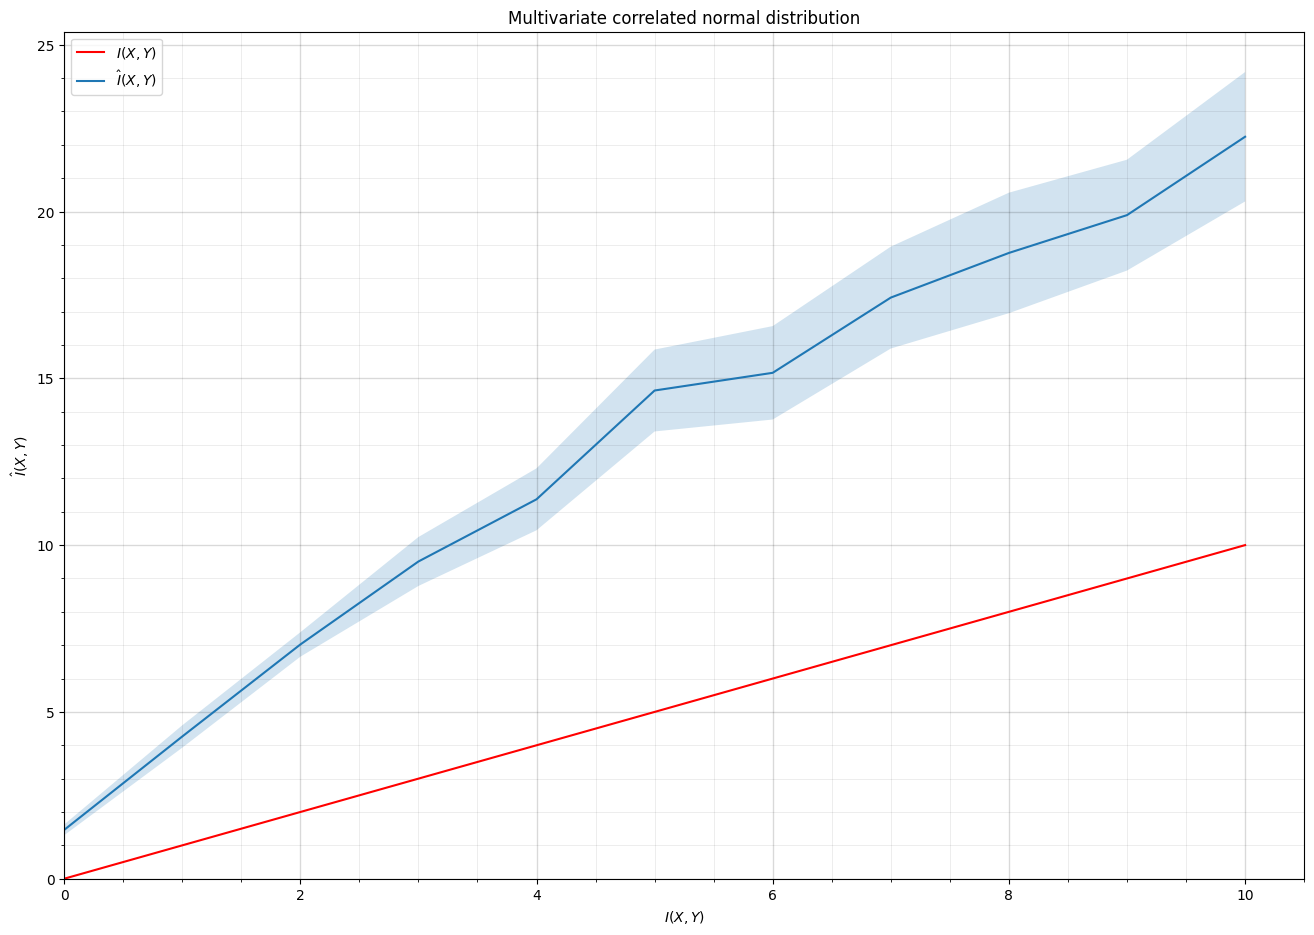

In [6]:
plot_estimated_MI(MI_grid, estimated_MI, "Multivariate correlated normal distribution")